# Importing the necessary packages

In [6]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib as mpl

# For the models
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import r2_score
import ast
from sklearn.model_selection import GridSearchCV
from itertools import permutations
from sklearn.model_selection import RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.layers import Dropout
from tpot import TPOTRegressor
import random

# Data preparation based on year 2050

In [7]:
df_raw = pd.read_csv(r"C:\Users\Imanam\Desktop\AR6_Scenarios_Database_World_v1.1.csv")
df_raw

,Model,Scenario,Region,Variable,Unit,1995,1996,1997,1998,1999,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,World,AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|33.0th Percentile,W/m^2,1.606191,1.706876,1.668030,1.762945,1.963232,...,1.976137,1.994174,1.980347,1.957527,1.938977,1.910443,1.893993,1.879013,1.878013,1.889258
1,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,World,AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|5.0th Percentile,W/m^2,1.310639,1.416508,1.273504,1.369464,1.653079,...,1.774826,1.801188,1.787406,1.762791,1.742435,1.713050,1.697114,1.679779,1.681700,1.696405
2,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,World,AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|50.0th Percentile,W/m^2,1.726261,1.829280,1.810633,1.908043,2.083303,...,2.046819,2.066905,2.050494,2.024065,2.004448,1.973908,1.957375,1.941416,1.940207,1.951514
3,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,World,AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|67.0th Percentile,W/m^2,1.862109,1.961965,1.968039,2.053398,2.218931,...,2.116304,2.135642,2.120652,2.094222,2.073362,2.041366,2.024292,2.007639,2.007148,2.019429
4,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,World,AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|95.0th Percentile,W/m^2,2.242113,2.331290,2.370420,2.454901,2.584046,...,2.327459,2.342879,2.322864,2.292776,2.270133,2.237653,2.220305,2.203234,2.199014,2.210547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693294,WITCH-GLOBIOM 4.4,CD-LINKS_NoPolicy,World,Final Energy|Geothermal,EJ/yr,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
693295,WITCH-GLOBIOM 4.4,CD-LINKS_NoPolicy,World,Final Energy|Hydrogen,EJ/yr,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
693296,WITCH-GLOBIOM 4.4,CD-LINKS_NoPolicy,World,Final Energy|Solar,EJ/yr,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
693297,WITCH-GLOBIOM 4.4,CD-LINKS_NoPolicy,World,Capacity|Electricity|Solar|CSP,GW,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1022.604407


In [8]:
df_raw["Model"].nunique()

109

In [9]:
df_raw1 = df_raw.loc[:, ['Model', 'Scenario', 'Variable', '2020','2025','2030','2035','2040','2045','2050','2055','2060','2065','2070','2075','2080','2085','2090','2095','2100']]
df_raw1

,Model,Scenario,Variable,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|33.0th Percentile,2.739332,2.967479,2.830737,2.850196,2.716747,2.653580,2.604978,2.486033,2.408889,2.297964,2.269559,2.140386,2.112119,2.001393,1.961411,1.938977,1.889258
1,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|5.0th Percentile,2.373218,2.635983,2.504397,2.536750,2.406405,2.349546,2.340373,2.231887,2.160222,2.061785,2.041955,1.918338,1.896403,1.793787,1.759476,1.742435,1.696405
2,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|50.0th Percentile,2.876150,3.100634,2.950698,2.967214,2.827834,2.760842,2.697309,2.578908,2.495315,2.377924,2.352196,2.213269,2.188516,2.072906,2.032708,2.004448,1.951514
3,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|67.0th Percentile,3.026901,3.228850,3.072229,3.084584,2.940928,2.872046,2.792838,2.667280,2.583077,2.465040,2.431651,2.293545,2.263132,2.146519,2.104948,2.073362,2.019429
4,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|95.0th Percentile,3.396955,3.579640,3.401024,3.404799,3.248263,3.171125,3.066408,2.934176,2.839639,2.711413,2.670584,2.523075,2.487906,2.365794,2.318051,2.270133,2.210547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693294,WITCH-GLOBIOM 4.4,CD-LINKS_NoPolicy,Final Energy|Geothermal,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000
693295,WITCH-GLOBIOM 4.4,CD-LINKS_NoPolicy,Final Energy|Hydrogen,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000
693296,WITCH-GLOBIOM 4.4,CD-LINKS_NoPolicy,Final Energy|Solar,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000
693297,WITCH-GLOBIOM 4.4,CD-LINKS_NoPolicy,Capacity|Electricity|Solar|CSP,18.030343,33.536155,53.539354,79.926783,117.644850,167.605258,212.824859,NaN,300.300148,NaN,419.001640,NaN,585.143180,NaN,769.813658,NaN,1022.604407


In [10]:
df_raw2=df_raw1.copy()
# merge the two columns into a single column
df_raw2['Model-Scenario'] = df_raw2['Model'] + '|' + df_raw2['Scenario']
df_raw2.drop('Model', axis=1, inplace=True)
df_raw2.drop('Scenario', axis=1, inplace=True)
last_col = df_raw2.pop('Model-Scenario')
df_raw2.insert(0, 'Model-Scenario', last_col)
df_raw3 = df_raw2.reset_index().drop('index', axis=1)
df_raw3

,Model-Scenario,Variable,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,AIM/CGE 2.0|ADVANCE_2020_1.5C-2100,AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|33.0th Percentile,2.739332,2.967479,2.830737,2.850196,2.716747,2.653580,2.604978,2.486033,2.408889,2.297964,2.269559,2.140386,2.112119,2.001393,1.961411,1.938977,1.889258
1,AIM/CGE 2.0|ADVANCE_2020_1.5C-2100,AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|5.0th Percentile,2.373218,2.635983,2.504397,2.536750,2.406405,2.349546,2.340373,2.231887,2.160222,2.061785,2.041955,1.918338,1.896403,1.793787,1.759476,1.742435,1.696405
2,AIM/CGE 2.0|ADVANCE_2020_1.5C-2100,AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|50.0th Percentile,2.876150,3.100634,2.950698,2.967214,2.827834,2.760842,2.697309,2.578908,2.495315,2.377924,2.352196,2.213269,2.188516,2.072906,2.032708,2.004448,1.951514
3,AIM/CGE 2.0|ADVANCE_2020_1.5C-2100,AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|67.0th Percentile,3.026901,3.228850,3.072229,3.084584,2.940928,2.872046,2.792838,2.667280,2.583077,2.465040,2.431651,2.293545,2.263132,2.146519,2.104948,2.073362,2.019429
4,AIM/CGE 2.0|ADVANCE_2020_1.5C-2100,AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|95.0th Percentile,3.396955,3.579640,3.401024,3.404799,3.248263,3.171125,3.066408,2.934176,2.839639,2.711413,2.670584,2.523075,2.487906,2.365794,2.318051,2.270133,2.210547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693294,WITCH-GLOBIOM 4.4|CD-LINKS_NoPolicy,Final Energy|Geothermal,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000
693295,WITCH-GLOBIOM 4.4|CD-LINKS_NoPolicy,Final Energy|Hydrogen,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000
693296,WITCH-GLOBIOM 4.4|CD-LINKS_NoPolicy,Final Energy|Solar,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000
693297,WITCH-GLOBIOM 4.4|CD-LINKS_NoPolicy,Capacity|Electricity|Solar|CSP,18.030343,33.536155,53.539354,79.926783,117.644850,167.605258,212.824859,NaN,300.300148,NaN,419.001640,NaN,585.143180,NaN,769.813658,NaN,1022.604407


In [11]:
df_raw3.isna().sum()

Model-Scenario         0
Variable               0
2020                2186
2025               83586
2030                 356
2035               91132
2040                4293
2045               91218
2050                3833
2055              203232
2060               23403
2065              464317
2070               26113
2075              464720
2080               26751
2085              470689
2090               32635
2095              470689
2100               32729
dtype: int64

In [12]:
df_raw3.iloc[:,2:] = df_raw3.iloc[:,2:].interpolate(axis=1)
df_raw3

,Model-Scenario,Variable,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,AIM/CGE 2.0|ADVANCE_2020_1.5C-2100,AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|33.0th Percentile,2.739332,2.967479,2.830737,2.850196,2.716747,2.653580,2.604978,2.486033,2.408889,2.297964,2.269559,2.140386,2.112119,2.001393,1.961411,1.938977,1.889258
1,AIM/CGE 2.0|ADVANCE_2020_1.5C-2100,AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|5.0th Percentile,2.373218,2.635983,2.504397,2.536750,2.406405,2.349546,2.340373,2.231887,2.160222,2.061785,2.041955,1.918338,1.896403,1.793787,1.759476,1.742435,1.696405
2,AIM/CGE 2.0|ADVANCE_2020_1.5C-2100,AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|50.0th Percentile,2.876150,3.100634,2.950698,2.967214,2.827834,2.760842,2.697309,2.578908,2.495315,2.377924,2.352196,2.213269,2.188516,2.072906,2.032708,2.004448,1.951514
3,AIM/CGE 2.0|ADVANCE_2020_1.5C-2100,AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|67.0th Percentile,3.026901,3.228850,3.072229,3.084584,2.940928,2.872046,2.792838,2.667280,2.583077,2.465040,2.431651,2.293545,2.263132,2.146519,2.104948,2.073362,2.019429
4,AIM/CGE 2.0|ADVANCE_2020_1.5C-2100,AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|95.0th Percentile,3.396955,3.579640,3.401024,3.404799,3.248263,3.171125,3.066408,2.934176,2.839639,2.711413,2.670584,2.523075,2.487906,2.365794,2.318051,2.270133,2.210547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693294,WITCH-GLOBIOM 4.4|CD-LINKS_NoPolicy,Final Energy|Geothermal,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
693295,WITCH-GLOBIOM 4.4|CD-LINKS_NoPolicy,Final Energy|Hydrogen,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
693296,WITCH-GLOBIOM 4.4|CD-LINKS_NoPolicy,Final Energy|Solar,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
693297,WITCH-GLOBIOM 4.4|CD-LINKS_NoPolicy,Capacity|Electricity|Solar|CSP,18.030343,33.536155,53.539354,79.926783,117.644850,167.605258,212.824859,256.562504,300.300148,359.650894,419.001640,502.072410,585.143180,677.478419,769.813658,896.209032,1022.604407


In [13]:
df_raw3.isna().sum()

Model-Scenario       0
Variable             0
2020              2186
2025              2085
2030               266
2035               261
2040               234
2045               231
2050               218
2055               212
2060               199
2065               196
2070               189
2075               189
2080               187
2085               181
2090               179
2095               179
2100               170
dtype: int64

In [14]:
# I want to do comulative (2020-2050):  'Carbon Sequestration|CCS', 'Carbon Sequestration|Land Use',
#'Carbon Sequestration|Direct Air Capture', 'Carbon Sequestration|Enhanced Weathering', 'Carbon Sequestration|Feedstocks',
# 'Carbon Sequestration|Other'

# AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile for 2100

#other Variables=2050

In [15]:
#columns_to_sum = ['2020', '2025', '2030', '2035', '2040', '2045', '2050','2055','2060','2065','2070','2075','2080','2085','2090','2095','2100']
#df_raw3['CUM2050'] = df_raw3[columns_to_sum].sum(axis=1)
#df_raw3

In [16]:
CDR_list = ['Carbon Sequestration|CCS', 'Carbon Sequestration|Land Use', 'Carbon Sequestration|Direct Air Capture', 
            'Carbon Sequestration|Enhanced Weathering', 'Carbon Sequestration|Feedstocks',
            'Carbon Sequestration|Other']

for index, row in df_raw3.iterrows():
    if row['Variable'] in CDR_list:
        #df_raw3.at[index, 'Values of T2100, Cum CSs, and other variables2050'] = row['CUM2050']
        df_raw3.at[index, 'Values of T2100, Cum CSs, and other variables2050'] = row['2050']
    elif row['Variable'] == 'AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile':
        df_raw3.at[index, 'Values of T2100, Cum CSs, and other variables2050'] = row['2100']
    else:
        df_raw3.at[index, 'Values of T2100, Cum CSs, and other variables2050'] = row['2050']
df_raw3

,Model-Scenario,Variable,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,"Values of T2100, Cum CSs, and other variables2050"
0,AIM/CGE 2.0|ADVANCE_2020_1.5C-2100,AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|33.0th Percentile,2.739332,2.967479,2.830737,2.850196,2.716747,2.653580,2.604978,2.486033,2.408889,2.297964,2.269559,2.140386,2.112119,2.001393,1.961411,1.938977,1.889258,2.604978
1,AIM/CGE 2.0|ADVANCE_2020_1.5C-2100,AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|5.0th Percentile,2.373218,2.635983,2.504397,2.536750,2.406405,2.349546,2.340373,2.231887,2.160222,2.061785,2.041955,1.918338,1.896403,1.793787,1.759476,1.742435,1.696405,2.340373
2,AIM/CGE 2.0|ADVANCE_2020_1.5C-2100,AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|50.0th Percentile,2.876150,3.100634,2.950698,2.967214,2.827834,2.760842,2.697309,2.578908,2.495315,2.377924,2.352196,2.213269,2.188516,2.072906,2.032708,2.004448,1.951514,2.697309
3,AIM/CGE 2.0|ADVANCE_2020_1.5C-2100,AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|67.0th Percentile,3.026901,3.228850,3.072229,3.084584,2.940928,2.872046,2.792838,2.667280,2.583077,2.465040,2.431651,2.293545,2.263132,2.146519,2.104948,2.073362,2.019429,2.792838
4,AIM/CGE 2.0|ADVANCE_2020_1.5C-2100,AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|95.0th Percentile,3.396955,3.579640,3.401024,3.404799,3.248263,3.171125,3.066408,2.934176,2.839639,2.711413,2.670584,2.523075,2.487906,2.365794,2.318051,2.270133,2.210547,3.066408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693294,WITCH-GLOBIOM 4.4|CD-LINKS_NoPolicy,Final Energy|Geothermal,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
693295,WITCH-GLOBIOM 4.4|CD-LINKS_NoPolicy,Final Energy|Hydrogen,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
693296,WITCH-GLOBIOM 4.4|CD-LINKS_NoPolicy,Final Energy|Solar,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
693297,WITCH-GLOBIOM 4.4|CD-LINKS_NoPolicy,Capacity|Electricity|Solar|CSP,18.030343,33.536155,53.539354,79.926783,117.644850,167.605258,212.824859,256.562504,300.300148,359.650894,419.001640,502.072410,585.143180,677.478419,769.813658,896.209032,1022.604407,212.824859


In [17]:
df_raw3.to_csv('test820230817.csv')

In [18]:
df_raw4=df_raw3.copy()
df_raw4 = df_raw4[['Model-Scenario','Variable', 'Values of T2100, Cum CSs, and other variables2050']]
df_raw4

,Model-Scenario,Variable,"Values of T2100, Cum CSs, and other variables2050"
0,AIM/CGE 2.0|ADVANCE_2020_1.5C-2100,AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|33.0th Percentile,2.604978
1,AIM/CGE 2.0|ADVANCE_2020_1.5C-2100,AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|5.0th Percentile,2.340373
2,AIM/CGE 2.0|ADVANCE_2020_1.5C-2100,AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|50.0th Percentile,2.697309
3,AIM/CGE 2.0|ADVANCE_2020_1.5C-2100,AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|67.0th Percentile,2.792838
4,AIM/CGE 2.0|ADVANCE_2020_1.5C-2100,AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|95.0th Percentile,3.066408
...,...,...,...
693294,WITCH-GLOBIOM 4.4|CD-LINKS_NoPolicy,Final Energy|Geothermal,0.000000
693295,WITCH-GLOBIOM 4.4|CD-LINKS_NoPolicy,Final Energy|Hydrogen,0.000000
693296,WITCH-GLOBIOM 4.4|CD-LINKS_NoPolicy,Final Energy|Solar,0.000000
693297,WITCH-GLOBIOM 4.4|CD-LINKS_NoPolicy,Capacity|Electricity|Solar|CSP,212.824859


In [19]:
df_raw4.isna().sum()

Model-Scenario                                         0
Variable                                               0
Values of T2100, Cum CSs, and other variables2050    218
dtype: int64

In [20]:
df_raw5=df_raw4.dropna()
df_raw5

,Model-Scenario,Variable,"Values of T2100, Cum CSs, and other variables2050"
0,AIM/CGE 2.0|ADVANCE_2020_1.5C-2100,AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|33.0th Percentile,2.604978
1,AIM/CGE 2.0|ADVANCE_2020_1.5C-2100,AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|5.0th Percentile,2.340373
2,AIM/CGE 2.0|ADVANCE_2020_1.5C-2100,AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|50.0th Percentile,2.697309
3,AIM/CGE 2.0|ADVANCE_2020_1.5C-2100,AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|67.0th Percentile,2.792838
4,AIM/CGE 2.0|ADVANCE_2020_1.5C-2100,AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|95.0th Percentile,3.066408
...,...,...,...
693294,WITCH-GLOBIOM 4.4|CD-LINKS_NoPolicy,Final Energy|Geothermal,0.000000
693295,WITCH-GLOBIOM 4.4|CD-LINKS_NoPolicy,Final Energy|Hydrogen,0.000000
693296,WITCH-GLOBIOM 4.4|CD-LINKS_NoPolicy,Final Energy|Solar,0.000000
693297,WITCH-GLOBIOM 4.4|CD-LINKS_NoPolicy,Capacity|Electricity|Solar|CSP,212.824859


In [21]:
df_raw5.isna().sum()

Model-Scenario                                       0
Variable                                             0
Values of T2100, Cum CSs, and other variables2050    0
dtype: int64

In [22]:
# use pivot function to reshape the data
df_raw6 = df_raw5.pivot(index='Model-Scenario', columns='Variable', values='Values of T2100, Cum CSs, and other variables2050')
df_raw6

Variable,AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|33.0th Percentile,AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|5.0th Percentile,AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|50.0th Percentile,AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|67.0th Percentile,AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|95.0th Percentile,AR6 climate diagnostics|Effective Radiative Forcing|MAGICCv7.5.3|33.0th Percentile,AR6 climate diagnostics|Effective Radiative Forcing|MAGICCv7.5.3|5.0th Percentile,AR6 climate diagnostics|Effective Radiative Forcing|MAGICCv7.5.3|50.0th Percentile,AR6 climate diagnostics|Effective Radiative Forcing|MAGICCv7.5.3|67.0th Percentile,AR6 climate diagnostics|Effective Radiative Forcing|MAGICCv7.5.3|95.0th Percentile,...,Water Withdrawal|Liquids|Fossil|w/o CCS,Water Withdrawal|Liquids|Gas,Water Withdrawal|Liquids|Gas|w/ CCS,Water Withdrawal|Liquids|Gas|w/o CCS,Water Withdrawal|Liquids|Oil,Water Withdrawal|Municipal Water,Yield|Bioenergy|2nd generation,Yield|Cereal,Yield|Oilcrops,Yield|Sugarcrops
Model-Scenario,,,,,,,,,,,,,,,,,,,,,
AIM/CGE 2.0|ADVANCE_2020_1.5C-2100,2.604978,2.340373,2.697309,2.792838,3.066408,2.665290,2.420084,2.759433,2.869644,3.116089,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AIM/CGE 2.0|ADVANCE_2020_Med2C,3.088704,2.771957,3.198796,3.314468,3.624969,3.093841,2.802986,3.200392,3.309201,3.598389,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AIM/CGE 2.0|ADVANCE_2020_WB2C,2.825217,2.512963,2.929104,3.040259,3.337813,2.833840,2.549679,2.937760,3.042795,3.321631,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AIM/CGE 2.0|ADVANCE_2030_Med2C,3.286736,2.965317,3.400416,3.520955,3.835985,3.317784,3.022471,3.436678,3.541890,3.843087,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AIM/CGE 2.0|ADVANCE_2030_Price1.5C,2.996351,2.705867,3.103480,3.213667,3.513008,3.073593,2.803777,3.177866,3.286304,3.557936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WITCH-GLOBIOM 4.4|CD-LINKS_NPi,4.424316,4.043201,4.559952,4.689701,5.076519,4.342805,4.017258,4.474803,4.621303,5.007291,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WITCH-GLOBIOM 4.4|CD-LINKS_NPi2020_1000,2.822577,2.541250,2.918456,3.015700,3.295688,2.707169,2.466334,2.803274,2.913132,3.176684,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WITCH-GLOBIOM 4.4|CD-LINKS_NPi2020_1600,3.066121,2.768568,3.166834,3.270068,3.572208,2.957214,2.705699,3.060788,3.179684,3.451676,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# extract the column you want to move
col_to_move = df_raw6.pop("AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile")

# insert the column at the beginning of the dataframe
df_raw6.insert(0, "AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile", col_to_move)
df_raw6

C:\Users\Imanam\AppData\Local\Temp\ipykernel_2124\1106445168.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_raw6.insert(0, "AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile", col_to_move)


Variable,AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile,AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|33.0th Percentile,AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|5.0th Percentile,AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|50.0th Percentile,AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|67.0th Percentile,AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|95.0th Percentile,AR6 climate diagnostics|Effective Radiative Forcing|MAGICCv7.5.3|33.0th Percentile,AR6 climate diagnostics|Effective Radiative Forcing|MAGICCv7.5.3|5.0th Percentile,AR6 climate diagnostics|Effective Radiative Forcing|MAGICCv7.5.3|50.0th Percentile,AR6 climate diagnostics|Effective Radiative Forcing|MAGICCv7.5.3|67.0th Percentile,...,Water Withdrawal|Liquids|Fossil|w/o CCS,Water Withdrawal|Liquids|Gas,Water Withdrawal|Liquids|Gas|w/ CCS,Water Withdrawal|Liquids|Gas|w/o CCS,Water Withdrawal|Liquids|Oil,Water Withdrawal|Municipal Water,Yield|Bioenergy|2nd generation,Yield|Cereal,Yield|Oilcrops,Yield|Sugarcrops
Model-Scenario,,,,,,,,,,,,,,,,,,,,,
AIM/CGE 2.0|ADVANCE_2020_1.5C-2100,1.062380,2.604978,2.340373,2.697309,2.792838,3.066408,2.665290,2.420084,2.759433,2.869644,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AIM/CGE 2.0|ADVANCE_2020_Med2C,1.842275,3.088704,2.771957,3.198796,3.314468,3.624969,3.093841,2.802986,3.200392,3.309201,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AIM/CGE 2.0|ADVANCE_2020_WB2C,1.394684,2.825217,2.512963,2.929104,3.040259,3.337813,2.833840,2.549679,2.937760,3.042795,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AIM/CGE 2.0|ADVANCE_2030_Med2C,1.960864,3.286736,2.965317,3.400416,3.520955,3.835985,3.317784,3.022471,3.436678,3.541890,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AIM/CGE 2.0|ADVANCE_2030_Price1.5C,1.370994,2.996351,2.705867,3.103480,3.213667,3.513008,3.073593,2.803777,3.177866,3.286304,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WITCH-GLOBIOM 4.4|CD-LINKS_NPi,3.895111,4.424316,4.043201,4.559952,4.689701,5.076519,4.342805,4.017258,4.474803,4.621303,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WITCH-GLOBIOM 4.4|CD-LINKS_NPi2020_1000,1.336467,2.822577,2.541250,2.918456,3.015700,3.295688,2.707169,2.466334,2.803274,2.913132,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WITCH-GLOBIOM 4.4|CD-LINKS_NPi2020_1600,1.644057,3.066121,2.768568,3.166834,3.270068,3.572208,2.957214,2.705699,3.060788,3.179684,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df_raw6.isna().sum()

Variable
AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile     597
AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|33.0th Percentile      596
AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|5.0th Percentile       596
AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|50.0th Percentile      596
AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|67.0th Percentile      596
                                                                                     ... 
Water Withdrawal|Municipal Water                                                     2183
Yield|Bioenergy|2nd generation                                                       2267
Yield|Cereal                                                                         1829
Yield|Oilcrops                                                                       1932
Yield|Sugarcrops                                                                     1893
L

In [25]:
duplicated_rows = df_raw6.index.duplicated()
df_raw6[duplicated_rows]

Variable,AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile,AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|33.0th Percentile,AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|5.0th Percentile,AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|50.0th Percentile,AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|67.0th Percentile,AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|95.0th Percentile,AR6 climate diagnostics|Effective Radiative Forcing|MAGICCv7.5.3|33.0th Percentile,AR6 climate diagnostics|Effective Radiative Forcing|MAGICCv7.5.3|5.0th Percentile,AR6 climate diagnostics|Effective Radiative Forcing|MAGICCv7.5.3|50.0th Percentile,AR6 climate diagnostics|Effective Radiative Forcing|MAGICCv7.5.3|67.0th Percentile,...,Water Withdrawal|Liquids|Fossil|w/o CCS,Water Withdrawal|Liquids|Gas,Water Withdrawal|Liquids|Gas|w/ CCS,Water Withdrawal|Liquids|Gas|w/o CCS,Water Withdrawal|Liquids|Oil,Water Withdrawal|Municipal Water,Yield|Bioenergy|2nd generation,Yield|Cereal,Yield|Oilcrops,Yield|Sugarcrops
Model-Scenario,,,,,,,,,,,,,,,,,,,,,


In [26]:
# Drop rows with NA values in the specified column
df_raw7 = df_raw6.dropna(subset=["AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile"])
df_raw7

Variable,AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile,AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|33.0th Percentile,AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|5.0th Percentile,AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|50.0th Percentile,AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|67.0th Percentile,AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|95.0th Percentile,AR6 climate diagnostics|Effective Radiative Forcing|MAGICCv7.5.3|33.0th Percentile,AR6 climate diagnostics|Effective Radiative Forcing|MAGICCv7.5.3|5.0th Percentile,AR6 climate diagnostics|Effective Radiative Forcing|MAGICCv7.5.3|50.0th Percentile,AR6 climate diagnostics|Effective Radiative Forcing|MAGICCv7.5.3|67.0th Percentile,...,Water Withdrawal|Liquids|Fossil|w/o CCS,Water Withdrawal|Liquids|Gas,Water Withdrawal|Liquids|Gas|w/ CCS,Water Withdrawal|Liquids|Gas|w/o CCS,Water Withdrawal|Liquids|Oil,Water Withdrawal|Municipal Water,Yield|Bioenergy|2nd generation,Yield|Cereal,Yield|Oilcrops,Yield|Sugarcrops
Model-Scenario,,,,,,,,,,,,,,,,,,,,,
AIM/CGE 2.0|ADVANCE_2020_1.5C-2100,1.062380,2.604978,2.340373,2.697309,2.792838,3.066408,2.665290,2.420084,2.759433,2.869644,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AIM/CGE 2.0|ADVANCE_2020_Med2C,1.842275,3.088704,2.771957,3.198796,3.314468,3.624969,3.093841,2.802986,3.200392,3.309201,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AIM/CGE 2.0|ADVANCE_2020_WB2C,1.394684,2.825217,2.512963,2.929104,3.040259,3.337813,2.833840,2.549679,2.937760,3.042795,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AIM/CGE 2.0|ADVANCE_2030_Med2C,1.960864,3.286736,2.965317,3.400416,3.520955,3.835985,3.317784,3.022471,3.436678,3.541890,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AIM/CGE 2.0|ADVANCE_2030_Price1.5C,1.370994,2.996351,2.705867,3.103480,3.213667,3.513008,3.073593,2.803777,3.177866,3.286304,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WITCH-GLOBIOM 4.4|CD-LINKS_NPi,3.895111,4.424316,4.043201,4.559952,4.689701,5.076519,4.342805,4.017258,4.474803,4.621303,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WITCH-GLOBIOM 4.4|CD-LINKS_NPi2020_1000,1.336467,2.822577,2.541250,2.918456,3.015700,3.295688,2.707169,2.466334,2.803274,2.913132,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WITCH-GLOBIOM 4.4|CD-LINKS_NPi2020_1600,1.644057,3.066121,2.768568,3.166834,3.270068,3.572208,2.957214,2.705699,3.060788,3.179684,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df_raw7.isna().sum()

Variable
AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile       0
AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|33.0th Percentile        0
AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|5.0th Percentile         0
AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|50.0th Percentile        0
AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|67.0th Percentile        0
                                                                                     ... 
Water Withdrawal|Municipal Water                                                     1591
Yield|Bioenergy|2nd generation                                                       1673
Yield|Cereal                                                                         1240
Yield|Oilcrops                                                                       1343
Yield|Sugarcrops                                                                     1304
L

In [28]:
df_raw8=df_raw7.reset_index()
df_raw8=df_raw8.drop(columns=['Model-Scenario'])
df_raw8

Variable,AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile,AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|33.0th Percentile,AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|5.0th Percentile,AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|50.0th Percentile,AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|67.0th Percentile,AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|95.0th Percentile,AR6 climate diagnostics|Effective Radiative Forcing|MAGICCv7.5.3|33.0th Percentile,AR6 climate diagnostics|Effective Radiative Forcing|MAGICCv7.5.3|5.0th Percentile,AR6 climate diagnostics|Effective Radiative Forcing|MAGICCv7.5.3|50.0th Percentile,AR6 climate diagnostics|Effective Radiative Forcing|MAGICCv7.5.3|67.0th Percentile,...,Water Withdrawal|Liquids|Fossil|w/o CCS,Water Withdrawal|Liquids|Gas,Water Withdrawal|Liquids|Gas|w/ CCS,Water Withdrawal|Liquids|Gas|w/o CCS,Water Withdrawal|Liquids|Oil,Water Withdrawal|Municipal Water,Yield|Bioenergy|2nd generation,Yield|Cereal,Yield|Oilcrops,Yield|Sugarcrops
0,1.062380,2.604978,2.340373,2.697309,2.792838,3.066408,2.665290,2.420084,2.759433,2.869644,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.842275,3.088704,2.771957,3.198796,3.314468,3.624969,3.093841,2.802986,3.200392,3.309201,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.394684,2.825217,2.512963,2.929104,3.040259,3.337813,2.833840,2.549679,2.937760,3.042795,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.960864,3.286736,2.965317,3.400416,3.520955,3.835985,3.317784,3.022471,3.436678,3.541890,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.370994,2.996351,2.705867,3.103480,3.213667,3.513008,3.073593,2.803777,3.177866,3.286304,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,3.895111,4.424316,4.043201,4.559952,4.689701,5.076519,4.342805,4.017258,4.474803,4.621303,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1697,1.336467,2.822577,2.541250,2.918456,3.015700,3.295688,2.707169,2.466334,2.803274,2.913132,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1698,1.644057,3.066121,2.768568,3.166834,3.270068,3.572208,2.957214,2.705699,3.060788,3.179684,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1699,1.018260,2.609039,2.337389,2.696258,2.795697,3.064292,2.484146,2.237023,2.568972,2.680089,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
import warnings
warnings.filterwarnings("ignore", message="A column-vector y was passed when a 1d array was expected")
warnings.filterwarnings("ignore", message="invalid value encountered in double_scalars")
warnings.filterwarnings("ignore", message="A column-vector y was passed when a 1d array was expected")
warnings.filterwarnings("ignore", message="Some inputs do not have OOB scores")
warnings.filterwarnings("ignore", message="In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame")
warnings.filterwarnings("ignore", message="The frame.append method is deprecated and will be removed from pandas in a future version.")

In [30]:
primaries_list_selected=['Primary Energy',
 'Primary Energy|Fossil',  
 'Primary Energy|Coal',
 'Primary Energy|Gas',
 'Primary Energy|Oil',                        
 'Primary Energy|Renewables (incl. Biomass)',
 'Primary Energy|Biomass',  
 'Primary Energy|Solar',
 'Primary Energy|Wind']

In [31]:
var_list1 = ['AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile',
'Final Energy',
'Final Energy|Electricity',           
'Carbon Sequestration|CCS',
'Carbon Sequestration|Land Use',             
'Carbon Sequestration|Direct Air Capture',     
'Carbon Sequestration|Enhanced Weathering',  
'Carbon Sequestration|Feedstocks',           
'Carbon Sequestration|Other']                 

In [32]:
df_list1=var_list1 + primaries_list_selected
df_list1

['AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile',
 'Final Energy',
 'Final Energy|Electricity',
 'Carbon Sequestration|CCS',
 'Carbon Sequestration|Land Use',
 'Carbon Sequestration|Direct Air Capture',
 'Carbon Sequestration|Enhanced Weathering',
 'Carbon Sequestration|Feedstocks',
 'Carbon Sequestration|Other',
 'Primary Energy',
 'Primary Energy|Fossil',
 'Primary Energy|Coal',
 'Primary Energy|Gas',
 'Primary Energy|Oil',
 'Primary Energy|Renewables (incl. Biomass)',
 'Primary Energy|Biomass',
 'Primary Energy|Solar',
 'Primary Energy|Wind']

In [33]:
df_raw11=df_raw8[df_list1]
df_raw11

Variable,AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile,Final Energy,Final Energy|Electricity,Carbon Sequestration|CCS,Carbon Sequestration|Land Use,Carbon Sequestration|Direct Air Capture,Carbon Sequestration|Enhanced Weathering,Carbon Sequestration|Feedstocks,Carbon Sequestration|Other,Primary Energy,Primary Energy|Fossil,Primary Energy|Coal,Primary Energy|Gas,Primary Energy|Oil,Primary Energy|Renewables (incl. Biomass),Primary Energy|Biomass,Primary Energy|Solar,Primary Energy|Wind
0,1.062380,397.999900,215.149900,10298.309100,2645.271000,NaN,NaN,NaN,NaN,661.894100,133.950700,13.902000,47.520500,72.528200,311.724900,311.724900,NaN,NaN
1,1.842275,475.897900,137.708800,13708.941300,5254.808300,NaN,NaN,NaN,NaN,718.269800,443.499700,91.265200,129.770000,222.464500,167.197000,167.197000,NaN,NaN
2,1.394684,430.727700,164.596500,13317.327200,5497.938800,NaN,NaN,NaN,NaN,674.664100,332.220500,58.611400,107.977400,165.631700,201.378700,201.378700,NaN,NaN
3,1.960864,449.610000,153.911400,9105.714500,4942.085600,NaN,NaN,NaN,NaN,679.942500,348.963300,56.971800,105.671500,186.320000,195.332300,195.332300,NaN,NaN
4,1.370994,393.115400,210.527900,7455.991200,4224.847100,NaN,NaN,NaN,NaN,631.823500,121.359500,10.456600,41.294900,69.608000,291.678400,291.678400,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,3.895111,494.838911,167.135934,0.073393,1648.077775,NaN,NaN,NaN,NaN,940.001935,793.021440,242.587524,233.455885,316.978031,106.481063,39.080010,9.507924,28.227404
1697,1.336467,316.427395,132.866956,7182.852098,2294.405578,NaN,NaN,NaN,NaN,530.280932,265.962988,51.694938,70.866903,143.401148,219.525619,96.085661,30.148636,63.625597
1698,1.644057,357.936096,131.069654,7537.052331,2256.569046,NaN,NaN,NaN,NaN,606.277367,378.906022,55.883143,102.928528,220.094351,182.707124,68.611846,26.570397,57.859156
1699,1.018260,288.167501,137.211019,6857.476194,2273.780379,NaN,NaN,NaN,NaN,468.741534,135.551298,45.964438,41.807530,47.779330,286.799427,153.447660,33.953391,69.732651


In [34]:
df_raw11.isna().sum()

Variable
AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile       0
Final Energy                                                                           16
Final Energy|Electricity                                                               53
Carbon Sequestration|CCS                                                              104
Carbon Sequestration|Land Use                                                         813
Carbon Sequestration|Direct Air Capture                                              1238
Carbon Sequestration|Enhanced Weathering                                             1503
Carbon Sequestration|Feedstocks                                                      1662
Carbon Sequestration|Other                                                           1543
Primary Energy                                                                         15
Primary Energy|Fossil                                                                  15
P

In [35]:
#Dealing with CCS for CDR

columns_to_check = [
    'Carbon Sequestration|CCS',
    'Carbon Sequestration|Land Use',
    'Carbon Sequestration|Direct Air Capture',
    'Carbon Sequestration|Enhanced Weathering',
    'Carbon Sequestration|Feedstocks',
    'Carbon Sequestration|Other'
]

# Create a boolean mask to check if at least one column is not NA in each row
mask = df_raw11[columns_to_check].notna().any(axis=1)

# Filter the DataFrame using the mask
df_raw11 = df_raw11[mask]
df_raw11

Variable,AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile,Final Energy,Final Energy|Electricity,Carbon Sequestration|CCS,Carbon Sequestration|Land Use,Carbon Sequestration|Direct Air Capture,Carbon Sequestration|Enhanced Weathering,Carbon Sequestration|Feedstocks,Carbon Sequestration|Other,Primary Energy,Primary Energy|Fossil,Primary Energy|Coal,Primary Energy|Gas,Primary Energy|Oil,Primary Energy|Renewables (incl. Biomass),Primary Energy|Biomass,Primary Energy|Solar,Primary Energy|Wind
0,1.062380,397.999900,215.149900,10298.309100,2645.271000,NaN,NaN,NaN,NaN,661.894100,133.950700,13.902000,47.520500,72.528200,311.724900,311.724900,NaN,NaN
1,1.842275,475.897900,137.708800,13708.941300,5254.808300,NaN,NaN,NaN,NaN,718.269800,443.499700,91.265200,129.770000,222.464500,167.197000,167.197000,NaN,NaN
2,1.394684,430.727700,164.596500,13317.327200,5497.938800,NaN,NaN,NaN,NaN,674.664100,332.220500,58.611400,107.977400,165.631700,201.378700,201.378700,NaN,NaN
3,1.960864,449.610000,153.911400,9105.714500,4942.085600,NaN,NaN,NaN,NaN,679.942500,348.963300,56.971800,105.671500,186.320000,195.332300,195.332300,NaN,NaN
4,1.370994,393.115400,210.527900,7455.991200,4224.847100,NaN,NaN,NaN,NaN,631.823500,121.359500,10.456600,41.294900,69.608000,291.678400,291.678400,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,3.895111,494.838911,167.135934,0.073393,1648.077775,NaN,NaN,NaN,NaN,940.001935,793.021440,242.587524,233.455885,316.978031,106.481063,39.080010,9.507924,28.227404
1697,1.336467,316.427395,132.866956,7182.852098,2294.405578,NaN,NaN,NaN,NaN,530.280932,265.962988,51.694938,70.866903,143.401148,219.525619,96.085661,30.148636,63.625597
1698,1.644057,357.936096,131.069654,7537.052331,2256.569046,NaN,NaN,NaN,NaN,606.277367,378.906022,55.883143,102.928528,220.094351,182.707124,68.611846,26.570397,57.859156
1699,1.018260,288.167501,137.211019,6857.476194,2273.780379,NaN,NaN,NaN,NaN,468.741534,135.551298,45.964438,41.807530,47.779330,286.799427,153.447660,33.953391,69.732651


In [36]:
# Iterate over each column and replace NA values with 0
for column in columns_to_check:
    df_raw11[column].fillna(0, inplace=True)

df_raw11.isna().sum()

C:\Users\Imanam\AppData\Local\Temp\ipykernel_2124\2115333309.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw11[column].fillna(0, inplace=True)


Variable
AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile      0
Final Energy                                                                          16
Final Energy|Electricity                                                              49
Carbon Sequestration|CCS                                                               0
Carbon Sequestration|Land Use                                                          0
Carbon Sequestration|Direct Air Capture                                                0
Carbon Sequestration|Enhanced Weathering                                               0
Carbon Sequestration|Feedstocks                                                        0
Carbon Sequestration|Other                                                             0
Primary Energy                                                                        11
Primary Energy|Fossil                                                                 11
Primary Ener

In [37]:
df_raw11

Variable,AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile,Final Energy,Final Energy|Electricity,Carbon Sequestration|CCS,Carbon Sequestration|Land Use,Carbon Sequestration|Direct Air Capture,Carbon Sequestration|Enhanced Weathering,Carbon Sequestration|Feedstocks,Carbon Sequestration|Other,Primary Energy,Primary Energy|Fossil,Primary Energy|Coal,Primary Energy|Gas,Primary Energy|Oil,Primary Energy|Renewables (incl. Biomass),Primary Energy|Biomass,Primary Energy|Solar,Primary Energy|Wind
0,1.062380,397.999900,215.149900,10298.309100,2645.271000,0.0,0.0,0.0,0.0,661.894100,133.950700,13.902000,47.520500,72.528200,311.724900,311.724900,NaN,NaN
1,1.842275,475.897900,137.708800,13708.941300,5254.808300,0.0,0.0,0.0,0.0,718.269800,443.499700,91.265200,129.770000,222.464500,167.197000,167.197000,NaN,NaN
2,1.394684,430.727700,164.596500,13317.327200,5497.938800,0.0,0.0,0.0,0.0,674.664100,332.220500,58.611400,107.977400,165.631700,201.378700,201.378700,NaN,NaN
3,1.960864,449.610000,153.911400,9105.714500,4942.085600,0.0,0.0,0.0,0.0,679.942500,348.963300,56.971800,105.671500,186.320000,195.332300,195.332300,NaN,NaN
4,1.370994,393.115400,210.527900,7455.991200,4224.847100,0.0,0.0,0.0,0.0,631.823500,121.359500,10.456600,41.294900,69.608000,291.678400,291.678400,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,3.895111,494.838911,167.135934,0.073393,1648.077775,0.0,0.0,0.0,0.0,940.001935,793.021440,242.587524,233.455885,316.978031,106.481063,39.080010,9.507924,28.227404
1697,1.336467,316.427395,132.866956,7182.852098,2294.405578,0.0,0.0,0.0,0.0,530.280932,265.962988,51.694938,70.866903,143.401148,219.525619,96.085661,30.148636,63.625597
1698,1.644057,357.936096,131.069654,7537.052331,2256.569046,0.0,0.0,0.0,0.0,606.277367,378.906022,55.883143,102.928528,220.094351,182.707124,68.611846,26.570397,57.859156
1699,1.018260,288.167501,137.211019,6857.476194,2273.780379,0.0,0.0,0.0,0.0,468.741534,135.551298,45.964438,41.807530,47.779330,286.799427,153.447660,33.953391,69.732651


In [38]:
# Calculate the 'CDR' column by summing the specified columns
df_raw11['CDR'] = df_raw11[columns_to_check].sum(axis=1)

# Drop the individual columns
df_raw11.drop(columns=columns_to_check, inplace=True)
df_raw11

C:\Users\Imanam\AppData\Local\Temp\ipykernel_2124\675097708.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw11['CDR'] = df_raw11[columns_to_check].sum(axis=1)
C:\Users\Imanam\AppData\Local\Temp\ipykernel_2124\675097708.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw11.drop(columns=columns_to_check, inplace=True)


Variable,AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile,Final Energy,Final Energy|Electricity,Primary Energy,Primary Energy|Fossil,Primary Energy|Coal,Primary Energy|Gas,Primary Energy|Oil,Primary Energy|Renewables (incl. Biomass),Primary Energy|Biomass,Primary Energy|Solar,Primary Energy|Wind,CDR
0,1.062380,397.999900,215.149900,661.894100,133.950700,13.902000,47.520500,72.528200,311.724900,311.724900,NaN,NaN,12943.580100
1,1.842275,475.897900,137.708800,718.269800,443.499700,91.265200,129.770000,222.464500,167.197000,167.197000,NaN,NaN,18963.749600
2,1.394684,430.727700,164.596500,674.664100,332.220500,58.611400,107.977400,165.631700,201.378700,201.378700,NaN,NaN,18815.266000
3,1.960864,449.610000,153.911400,679.942500,348.963300,56.971800,105.671500,186.320000,195.332300,195.332300,NaN,NaN,14047.800100
4,1.370994,393.115400,210.527900,631.823500,121.359500,10.456600,41.294900,69.608000,291.678400,291.678400,NaN,NaN,11680.838300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,3.895111,494.838911,167.135934,940.001935,793.021440,242.587524,233.455885,316.978031,106.481063,39.080010,9.507924,28.227404,1648.151168
1697,1.336467,316.427395,132.866956,530.280932,265.962988,51.694938,70.866903,143.401148,219.525619,96.085661,30.148636,63.625597,9477.257677
1698,1.644057,357.936096,131.069654,606.277367,378.906022,55.883143,102.928528,220.094351,182.707124,68.611846,26.570397,57.859156,9793.621377
1699,1.018260,288.167501,137.211019,468.741534,135.551298,45.964438,41.807530,47.779330,286.799427,153.447660,33.953391,69.732651,9131.256573


In [39]:
# extract the column you want to move
col_to_move = df_raw11.pop("CDR")

# insert the column at the beginning of the dataframe
df_raw11.insert(3, "CDR", col_to_move)
df_raw11

Variable,AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile,Final Energy,Final Energy|Electricity,CDR,Primary Energy,Primary Energy|Fossil,Primary Energy|Coal,Primary Energy|Gas,Primary Energy|Oil,Primary Energy|Renewables (incl. Biomass),Primary Energy|Biomass,Primary Energy|Solar,Primary Energy|Wind
0,1.062380,397.999900,215.149900,12943.580100,661.894100,133.950700,13.902000,47.520500,72.528200,311.724900,311.724900,NaN,NaN
1,1.842275,475.897900,137.708800,18963.749600,718.269800,443.499700,91.265200,129.770000,222.464500,167.197000,167.197000,NaN,NaN
2,1.394684,430.727700,164.596500,18815.266000,674.664100,332.220500,58.611400,107.977400,165.631700,201.378700,201.378700,NaN,NaN
3,1.960864,449.610000,153.911400,14047.800100,679.942500,348.963300,56.971800,105.671500,186.320000,195.332300,195.332300,NaN,NaN
4,1.370994,393.115400,210.527900,11680.838300,631.823500,121.359500,10.456600,41.294900,69.608000,291.678400,291.678400,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,3.895111,494.838911,167.135934,1648.151168,940.001935,793.021440,242.587524,233.455885,316.978031,106.481063,39.080010,9.507924,28.227404
1697,1.336467,316.427395,132.866956,9477.257677,530.280932,265.962988,51.694938,70.866903,143.401148,219.525619,96.085661,30.148636,63.625597
1698,1.644057,357.936096,131.069654,9793.621377,606.277367,378.906022,55.883143,102.928528,220.094351,182.707124,68.611846,26.570397,57.859156
1699,1.018260,288.167501,137.211019,9131.256573,468.741534,135.551298,45.964438,41.807530,47.779330,286.799427,153.447660,33.953391,69.732651


In [40]:
df_raw12 = df_raw11.dropna()
df_raw12 = df_raw12.reset_index(drop=True)
df_raw12

Variable,AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile,Final Energy,Final Energy|Electricity,CDR,Primary Energy,Primary Energy|Fossil,Primary Energy|Coal,Primary Energy|Gas,Primary Energy|Oil,Primary Energy|Renewables (incl. Biomass),Primary Energy|Biomass,Primary Energy|Solar,Primary Energy|Wind
0,1.501406,461.794200,150.411000,13181.352800,663.960200,426.247400,98.777800,115.122000,212.347800,213.805600,110.274800,29.612100,54.087200
1,1.499451,465.920900,151.441600,13639.684000,669.361600,430.817700,99.496100,114.054800,217.266800,215.643500,110.646800,30.452700,55.593900
2,2.059739,439.730500,165.755000,10344.330500,623.147100,349.588000,68.494600,98.143900,182.949800,245.023700,119.408700,35.571300,65.216900
3,2.345034,505.069200,153.854500,3912.951800,714.389200,503.772000,135.956600,143.645500,224.170100,180.923900,98.097500,21.806700,37.525900
4,2.276617,502.465200,154.021600,3928.250700,708.531000,497.312900,130.657800,143.086100,223.569200,181.313400,97.203300,22.195100,38.196200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1371,3.895111,494.838911,167.135934,1648.151168,940.001935,793.021440,242.587524,233.455885,316.978031,106.481063,39.080010,9.507924,28.227404
1372,1.336467,316.427395,132.866956,9477.257677,530.280932,265.962988,51.694938,70.866903,143.401148,219.525619,96.085661,30.148636,63.625597
1373,1.644057,357.936096,131.069654,9793.621377,606.277367,378.906022,55.883143,102.928528,220.094351,182.707124,68.611846,26.570397,57.859156
1374,1.018260,288.167501,137.211019,9131.256573,468.741534,135.551298,45.964438,41.807530,47.779330,286.799427,153.447660,33.953391,69.732651


In [41]:
df_raw12['Final Energy|Electricity']=df_raw12['Final Energy|Electricity']/df_raw12['Final Energy']
df_raw12

Variable,AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile,Final Energy,Final Energy|Electricity,CDR,Primary Energy,Primary Energy|Fossil,Primary Energy|Coal,Primary Energy|Gas,Primary Energy|Oil,Primary Energy|Renewables (incl. Biomass),Primary Energy|Biomass,Primary Energy|Solar,Primary Energy|Wind
0,1.501406,461.794200,0.325710,13181.352800,663.960200,426.247400,98.777800,115.122000,212.347800,213.805600,110.274800,29.612100,54.087200
1,1.499451,465.920900,0.325037,13639.684000,669.361600,430.817700,99.496100,114.054800,217.266800,215.643500,110.646800,30.452700,55.593900
2,2.059739,439.730500,0.376947,10344.330500,623.147100,349.588000,68.494600,98.143900,182.949800,245.023700,119.408700,35.571300,65.216900
3,2.345034,505.069200,0.304621,3912.951800,714.389200,503.772000,135.956600,143.645500,224.170100,180.923900,98.097500,21.806700,37.525900
4,2.276617,502.465200,0.306532,3928.250700,708.531000,497.312900,130.657800,143.086100,223.569200,181.313400,97.203300,22.195100,38.196200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1371,3.895111,494.838911,0.337758,1648.151168,940.001935,793.021440,242.587524,233.455885,316.978031,106.481063,39.080010,9.507924,28.227404
1372,1.336467,316.427395,0.419897,9477.257677,530.280932,265.962988,51.694938,70.866903,143.401148,219.525619,96.085661,30.148636,63.625597
1373,1.644057,357.936096,0.366182,9793.621377,606.277367,378.906022,55.883143,102.928528,220.094351,182.707124,68.611846,26.570397,57.859156
1374,1.018260,288.167501,0.476150,9131.256573,468.741534,135.551298,45.964438,41.807530,47.779330,286.799427,153.447660,33.953391,69.732651


In [42]:
df_raw14=df_raw12.copy()
df_raw14

Variable,AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile,Final Energy,Final Energy|Electricity,CDR,Primary Energy,Primary Energy|Fossil,Primary Energy|Coal,Primary Energy|Gas,Primary Energy|Oil,Primary Energy|Renewables (incl. Biomass),Primary Energy|Biomass,Primary Energy|Solar,Primary Energy|Wind
0,1.501406,461.794200,0.325710,13181.352800,663.960200,426.247400,98.777800,115.122000,212.347800,213.805600,110.274800,29.612100,54.087200
1,1.499451,465.920900,0.325037,13639.684000,669.361600,430.817700,99.496100,114.054800,217.266800,215.643500,110.646800,30.452700,55.593900
2,2.059739,439.730500,0.376947,10344.330500,623.147100,349.588000,68.494600,98.143900,182.949800,245.023700,119.408700,35.571300,65.216900
3,2.345034,505.069200,0.304621,3912.951800,714.389200,503.772000,135.956600,143.645500,224.170100,180.923900,98.097500,21.806700,37.525900
4,2.276617,502.465200,0.306532,3928.250700,708.531000,497.312900,130.657800,143.086100,223.569200,181.313400,97.203300,22.195100,38.196200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1371,3.895111,494.838911,0.337758,1648.151168,940.001935,793.021440,242.587524,233.455885,316.978031,106.481063,39.080010,9.507924,28.227404
1372,1.336467,316.427395,0.419897,9477.257677,530.280932,265.962988,51.694938,70.866903,143.401148,219.525619,96.085661,30.148636,63.625597
1373,1.644057,357.936096,0.366182,9793.621377,606.277367,378.906022,55.883143,102.928528,220.094351,182.707124,68.611846,26.570397,57.859156
1374,1.018260,288.167501,0.476150,9131.256573,468.741534,135.551298,45.964438,41.807530,47.779330,286.799427,153.447660,33.953391,69.732651


In [43]:
df_raw14['Final Energy'].describe()

count    1376.000000
mean      498.792193
std        98.157365
min        42.520000
25%       436.554170
50%       496.720050
75%       554.754022
max       895.256656
Name: Final Energy, dtype: float64

In [44]:
df_raw14['Final Energy|Electricity'].describe()

count    1376.000000
mean        0.365026
std         0.120148
min         0.157468
25%         0.287470
50%         0.349313
75%         0.425608
max         2.462371
Name: Final Energy|Electricity, dtype: float64

In [45]:
df_raw14['CDR'].describe()

count     1376.000000
mean      6522.631285
std       5401.630303
min          0.000000
25%       2522.496989
50%       5721.392273
75%       8809.662653
max      35236.565374
Name: CDR, dtype: float64

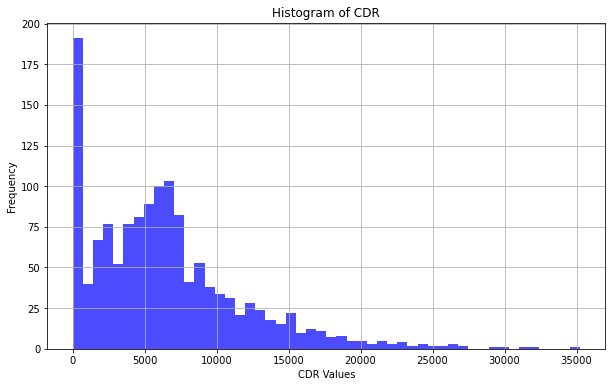

In [46]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(df_raw14['CDR'], bins=50, color='blue', alpha=0.7)  # You can adjust the number of bins
plt.title('Histogram of CDR')
plt.xlabel('CDR Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

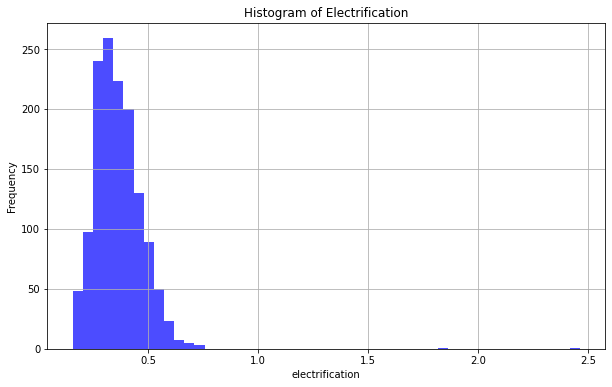

In [47]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(df_raw14['Final Energy|Electricity'], bins=50, color='blue', alpha=0.7)  # You can adjust the number of bins
plt.title('Histogram of Electrification')
plt.xlabel('electrification')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

C:\Users\Imanam\AppData\Local\Temp\ipykernel_2124\1886607834.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  axes = df_raw14[primaries_list_selected].hist(bins=20, ax=fig.gca())


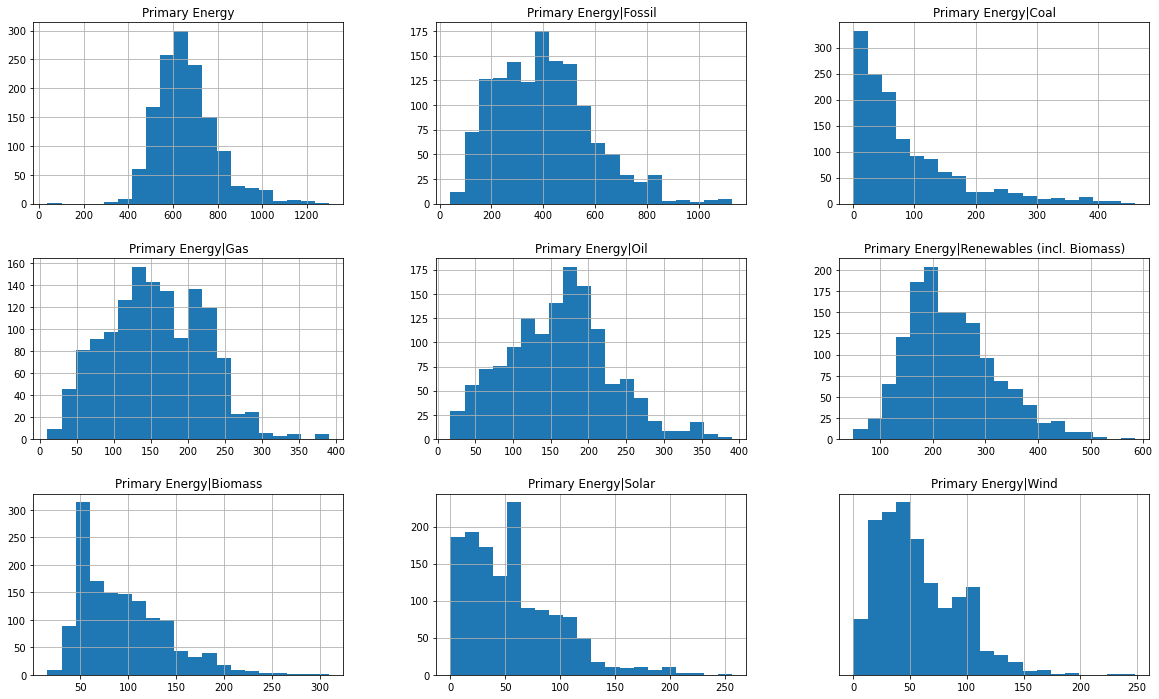

In [60]:
# Create a Figure object with custom size
fig = plt.figure(figsize=(20, 12))

# Plot histograms for each column
axes = df_raw14[primaries_list_selected].hist(bins=20, ax=fig.gca())

# Add grid to all subplots
for ax in axes.flatten():
    ax.grid(True)


plt.yticks([])
plt.show()

# RanForest (Train and Uncertainties) _nonagnostic

In [38]:
df_Uncertainty = []
df_info = []

for i in tqdm(primaries_list_selected, desc='Processing primaries', unit='primary'):
    #create X,Y,train and test 
    X=df_raw14.iloc[:, :4]
    y=df_raw14[i]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    
    #random search For RanForest
    param_ranges = {
    'n_estimators': range(50, 1000,50),
    'max_depth': range(1, 20),
    'min_samples_split': range(2, 10),
    'min_samples_leaf': range(1, 10)}
    

    # Create the random forest model
    RanForest = RandomForestRegressor(random_state=42)

    # Perform random search with cross-validation
    random_search = RandomizedSearchCV(RanForest, param_distributions=param_ranges, n_iter=100, cv=5, random_state=42)
    random_search.fit(X_train, y_train)
    Best_Parameters = random_search.best_params_
    #best_score = random_search.best_score_
        
    #Train the RanForest with best hyperparameters
    #first I should train a RanForest 
    RanForest = RandomForestRegressor(**random_search.best_params_, oob_score=True, random_state=42)
    RanForest.fit(X_train, y_train) 
    # Calculate metrics for the model     
    r_squared = RanForest.score(X_test, y_test)
    rmse = np.sqrt(mean_squared_error(y_test, RanForest.predict(X_test)))
    mbe = np.mean(y_test - RanForest.predict(X_test))
    mae = np.mean(np.abs(y_test - RanForest.predict(X_test)))
    medae = np.median(np.abs(y_test - RanForest.predict(X_test)))
    mpe = np.mean((y_test - RanForest.predict(X_test)) / y_test) * 100
    y_pred_test = RanForest.predict(X_test)
    y_pred = RanForest.predict(X)
    

    #M.C single approach (input uncertainty)
    n_samples = 100  # Number of samples to generate
    noise_level = 0.1  # Amount of noise to add to input data   
    
        
    M_C_1 = []
    for j in tqdm(range(n_samples), desc='first', unit='round'):
        # Perturb input data with noise
        X_noise = X.copy()  # Create a copy of X to perturb the data

        for col in X_noise.columns:
            # Calculate the perturbation amount for the current column
            perturbation_amount = X_noise[col].std() * noise_level
        
            # Perturb the current column based on normal distribution
            X_noise[col] += np.random.normal(loc=0, scale=perturbation_amount, size=X_noise.shape[0])
    
        # Generate prediction from perturbed input data
        y_pred_M_C_1 = RanForest.predict(X_noise)
        M_C_1.append(y_pred_M_C_1)
    
        
    
    # Parameter Uncertainty     
    # Define the standard deviations for each parameter
    param_std = {
    'n_estimators': 50,
    'max_depth': 5,
    'min_samples_split': 5,
    'min_samples_leaf': 2}

    # Set the number of samples to generate   
    num_samples = 100
    samples = []
    for _ in range(num_samples):
        sample = {}
        for key, value in Best_Parameters.items():
            std = param_std[key]
            perturbed_value = int(random.gauss(value, std))
            while perturbed_value <= 2:  # Ensure each element is more than 2
                perturbed_value = int(random.gauss(value, std))
            sample[key] = perturbed_value
        samples.append(sample)
      
    # Create an empty list to store the predictions
    M_C_P = []
    # Iterate over each row of the samples list
    for j, sample in tqdm(enumerate(samples), desc='parameter', unit='round'):
        # Set the hyperparameters of RF18 using the values in this sample
        n_estimators = sample['n_estimators']
        max_depth = sample['max_depth']
        min_samples_split = sample['min_samples_split']
        min_samples_leaf = sample['min_samples_leaf']
        RanForest.set_params(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

        # Train the model on your training data
        RanForest.fit(X_train, y_train)

        # Make predictions on X18 and append the results to the list of predictions
        y_pred_M_C_P = RanForest.predict(X)
        M_C_P.append(y_pred_M_C_P)
    
 
    
    # M.C Multi approach Uncertainty     
    n_models = 100  # Number of models to train

    M_C_2 = []
    for j in tqdm(range(n_models), desc='second', unit='round '):
        # Randomly select subset of input data
        idx = np.random.choice(X.shape[0], size=int(0.8 * X.shape[0]), replace=False)
        X_train_new = X.iloc[idx, :]
        y_train_new = y.iloc[idx]
    
        # Train model on selected subset of input data
        RanForest_new = RandomForestRegressor(random_state=100)
        RanForest_new.fit(X_train_new, y_train_new)
    
        # Generate prediction from full input data using trained model
        y_pred_M_C_2 = RanForest_new.predict(X)
        M_C_2.append(y_pred_M_C_2)
        
        
        
    #Saving Data  
    #good to know
    params_dict = {
        'Primaries': i,
        'Data size': len(X),
        'Test size': len(X_test),
        'best_RanForest_params': random_search.best_params_,
        'r_squared': r_squared,
        'mbe_RanForest':mbe,
        'mae_RanForest':mae,
        'medae_RanForest':medae,
        'mpe_RanForest':mpe,
        'rmse_RanForest': rmse}
    df_info.append(params_dict)
    
    
    #main savings
    df_y_pred = pd.DataFrame(y_pred, columns=['y_pred'])
    df_M_C_1 = pd.DataFrame(M_C_1).T
    df_M_C_P = pd.DataFrame(M_C_P).T
    df_M_C_2 = pd.DataFrame(M_C_2).T
    # Add suffix/prefix to column names of df_M_C_1, df_M_C_P, and df_M_C_2
    df_M_C_1_prefixed = df_M_C_1.add_suffix('_M_C_1')
    df_M_C_P_prefixed = df_M_C_P.add_suffix('_M_C_P')
    df_M_C_2_prefixed = df_M_C_2.add_suffix('_M_C_2')

    # Concatenate all DataFrames
    df_Uncert = pd.concat([X, y, df_y_pred, df_M_C_1_prefixed, df_M_C_P_prefixed, df_M_C_2_prefixed], axis=1)
    # Add indicators for train and test sets
    df_Uncert['test data'] = False
    df_Uncert.loc[X_test.index, 'test data'] = True
    # Append the df_Uncert from this loop iteration to the list
    df_Uncertainty.append(df_Uncert)

# Concatenate all DataFrames in df_Uncertainty list into one output DataFrame
df_Uncertainty_final = pd.concat(df_Uncertainty, axis=1)
df_info = pd.DataFrame(df_info)
df_Uncertainty_final
df_Uncertainty_final.to_csv('df_Uncertainty20230817_RanForest_nonagnostic.csv')
df_info.to_csv('df_info20230817_RanForest_nonagnostic.csv')

first: 100%|██████████████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.58round/s]

parameter: 0round [00:00, ?round/s]
parameter: 1round [00:05,  5.12s/round]
parameter: 2round [00:09,  4.72s/round]
parameter: 3round [00:14,  4.61s/round]
parameter: 4round [00:18,  4.57s/round]
parameter: 5round [00:22,  4.32s/round]
parameter: 6round [00:26,  4.36s/round]
parameter: 7round [00:31,  4.48s/round]
parameter: 8round [00:36,  4.57s/round]
parameter: 9round [00:41,  4.80s/round]
parameter: 10round [00:46,  4.72s/round]
parameter: 11round [00:50,  4.73s/round]
parameter: 12round [00:56,  4.90s/round]
parameter: 13round [01:00,  4.82s/round]
parameter: 14round [01:05,  4.91s/round]
parameter: 15round [01:10,  4.74s/round]
parameter: 16round [01:15,  4.77s/round]
parameter: 17round [01:20,  4.94s/round]
parameter: 18round [01:25,  5.05s/round]
parameter: 19round [01:30,  4.97s/round]
parameter: 20round [01:35,  4.85s/round]
parameter: 21round [01:39,  4.75

first:  51%|████████████████████████████████████▏                                  | 51/100 [00:05<00:04,  9.85round/s]


first: 100%|██████████████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.84round/s]

parameter: 0round [00:00, ?round/s]
parameter: 1round [00:03,  3.82s/round]
parameter: 2round [00:07,  3.95s/round]
parameter: 3round [00:11,  4.02s/round]
parameter: 4round [00:16,  4.25s/round]
parameter: 5round [00:21,  4.46s/round]
parameter: 6round [00:26,  4.53s/round]
parameter: 7round [00:30,  4.64s/round]
parameter: 8round [00:35,  4.71s/round]
parameter: 9round [00:40,  4.61s/round]
parameter: 10round [00:44,  4.65s/round]
parameter: 11round [00:49,  4.74s/round]
parameter: 12round [00:54,  4.82s/round]
parameter: 13round [00:59,  4.85s/round]
parameter: 14round [01:04,  4.88s/round]
parameter: 15round [01:09,  4.76s/round]
parameter: 16round [01:14,  4.82s/round]
parameter: 17round [01:18,  4.59s/round]
parameter: 18round [01:22,  4.58s/round]
parameter: 19round [01:27,  4.74s/round]
parameter: 20round [01:32,  4.59s/round]
parameter: 21round [01:36,  4.64

first: 100%|██████████████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.90round/s]

parameter: 0round [00:00, ?round/s]
parameter: 1round [00:04,  4.88s/round]
parameter: 2round [00:09,  4.71s/round]
parameter: 3round [00:13,  4.61s/round]
parameter: 4round [00:18,  4.49s/round]
parameter: 5round [00:23,  4.90s/round]
parameter: 6round [00:28,  4.85s/round]
parameter: 7round [00:33,  4.97s/round]
parameter: 8round [00:39,  5.06s/round]
parameter: 9round [00:43,  4.84s/round]
parameter: 10round [00:48,  4.78s/round]
parameter: 11round [00:52,  4.68s/round]
parameter: 12round [00:57,  4.75s/round]
parameter: 13round [01:03,  5.07s/round]
parameter: 14round [01:09,  5.38s/round]
parameter: 15round [01:13,  4.86s/round]
parameter: 16round [01:18,  4.92s/round]
parameter: 17round [01:23,  4.99s/round]


parameter: 18round [01:28,  5.17s/round]
parameter: 19round [01:33,  5.08s/round]
parameter: 20round [01:39,  5.16s/round]
parameter: 21round [01:44,  5.19s/round]
parameter: 22round [01:49,  5.23s/round]
parameter: 23round [01:54,  5.05s/round]
parameter: 24round [01:59,  5.03s/round]
parameter: 25round [02:04,  5.02s/round]
parameter: 26round [02:09,  5.01s/round]
parameter: 27round [02:14,  4.94s/round]
parameter: 28round [02:19,  5.13s/round]
parameter: 29round [02:25,  5.43s/round]
parameter: 30round [02:31,  5.45s/round]
parameter: 31round [02:35,  5.21s/round]
parameter: 32round [02:40,  4.99s/round]
parameter: 33round [02:45,  4.93s/round]
parameter: 34round [02:50,  4.95s/round]
parameter: 35round [02:55,  5.03s/round]
parameter: 36round [03:00,  5.08s/round]
parameter: 37round [03:06,  5.21s/round]
parameter: 38round [03:10,  5.01s/round]
parameter: 39round [03:15,  4.85s/round]
parameter: 40round [03:20,  5.04s/round]
parameter: 41round [03:25,  5.10s/round]
parameter: 42rou

first: 100%|██████████████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.70round/s]

parameter: 0round [00:00, ?round/s]
parameter: 1round [00:05,  5.23s/round]
parameter: 2round [00:10,  5.42s/round]
parameter: 3round [00:16,  5.48s/round]
parameter: 4round [00:21,  5.26s/round]
parameter: 5round [00:26,  5.20s/round]
parameter: 6round [00:31,  5.01s/round]
parameter: 7round [00:36,  5.12s/round]
parameter: 8round [00:41,  5.18s/round]
parameter: 9round [00:46,  5.11s/round]
parameter: 10round [00:51,  4.99s/round]
parameter: 11round [00:56,  5.00s/round]
parameter: 12round [01:01,  4.99s/round]
parameter: 13round [01:06,  5.09s/round]
parameter: 14round [01:11,  5.04s/round]
parameter: 15round [01:17,  5.20s/round]
parameter: 16round [01:22,  5.15s/round]
parameter: 17round [01:27,  5.17s/round]
parameter: 18round [01:31,  4.91s/round]
parameter: 19round [01:37,  5.07s/round]
parameter: 20round [01:41,  4.77s/round]
parameter: 21round [01:46,  4.88

first:  43%|██████████████████████████████▌                                        | 43/100 [00:04<00:05,  9.79round/s]


first: 100%|██████████████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.70round/s]

parameter: 0round [00:00, ?round/s]
parameter: 1round [00:05,  5.46s/round]
parameter: 2round [00:10,  5.30s/round]
parameter: 3round [00:15,  5.24s/round]
parameter: 4round [00:20,  5.13s/round]
parameter: 5round [00:25,  4.90s/round]
parameter: 6round [00:29,  4.56s/round]
parameter: 7round [00:33,  4.59s/round]
parameter: 8round [00:39,  4.96s/round]
parameter: 9round [00:43,  4.78s/round]
parameter: 10round [00:48,  4.62s/round]
parameter: 11round [00:52,  4.54s/round]
parameter: 12round [00:57,  4.64s/round]
parameter: 13round [01:02,  4.78s/round]
parameter: 14round [01:06,  4.51s/round]
parameter: 15round [01:11,  4.60s/round]
parameter: 16round [01:16,  4.72s/round]
parameter: 17round [01:20,  4.55s/round]
parameter: 18round [01:25,  4.70s/round]
parameter: 19round [01:29,  4.50s/round]
parameter: 20round [01:34,  4.79s/round]
parameter: 21round [01:40,  4.91

first:  77%|██████████████████████████████████████████████████████▋                | 77/100 [00:07<00:02,  9.52round/s]


first: 100%|██████████████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.70round/s]

parameter: 0round [00:00, ?round/s]
parameter: 1round [00:04,  4.80s/round]
parameter: 2round [00:09,  4.77s/round]
parameter: 3round [00:14,  4.93s/round]
parameter: 4round [00:20,  5.17s/round]
parameter: 5round [00:24,  4.83s/round]
parameter: 6round [00:29,  5.08s/round]
parameter: 7round [00:34,  4.88s/round]
parameter: 8round [00:39,  4.82s/round]
parameter: 9round [00:43,  4.74s/round]
parameter: 10round [00:48,  4.65s/round]
parameter: 11round [00:51,  4.21s/round]
parameter: 12round [00:56,  4.49s/round]
parameter: 13round [01:01,  4.75s/round]
parameter: 14round [01:06,  4.85s/round]
parameter: 15round [01:11,  4.66s/round]
parameter: 16round [01:15,  4.69s/round]
parameter: 17round [01:20,  4.65s/round]
parameter: 18round [01:24,  4.59s/round]
parameter: 19round [01:30,  4.86s/round]
parameter: 20round [01:35,  4.93s/round]
parameter: 21round [01:40,  4.86

first: 100%|██████████████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.63round/s]

parameter: 0round [00:00, ?round/s]
parameter: 1round [00:05,  5.05s/round]
parameter: 2round [00:10,  5.19s/round]
parameter: 3round [00:14,  4.78s/round]
parameter: 4round [00:19,  4.92s/round]
parameter: 5round [00:23,  4.60s/round]
parameter: 6round [00:29,  4.88s/round]
parameter: 7round [00:33,  4.78s/round]
parameter: 8round [00:38,  4.77s/round]
parameter: 9round [00:44,  4.99s/round]
parameter: 10round [00:49,  5.14s/round]
parameter: 11round [00:53,  4.95s/round]
parameter: 12round [00:59,  5.11s/round]
parameter: 13round [01:04,  4.99s/round]
parameter: 14round [01:10,  5.37s/round]
parameter: 15round [01:15,  5.34s/round]
parameter: 16round [01:20,  5.03s/round]
parameter: 17round [01:24,  4.87s/round]
parameter: 18round [01:29,  4.87s/round]
parameter: 19round [01:34,  4.93s/round]
parameter: 20round [01:39,  4.82s/round]
parameter: 21round [01:43,  4.75

parameter: 41round [03:22,  5.01s/round]
parameter: 42round [03:26,  4.79s/round]
parameter: 43round [03:32,  4.97s/round]
parameter: 44round [03:37,  4.93s/round]
parameter: 45round [03:41,  4.84s/round]
parameter: 46round [03:46,  4.71s/round]
parameter: 47round [03:51,  4.84s/round]
parameter: 48round [03:56,  4.99s/round]
parameter: 49round [04:01,  4.96s/round]
parameter: 50round [04:06,  4.93s/round]
parameter: 51round [04:11,  4.96s/round]
parameter: 52round [04:17,  5.16s/round]
parameter: 53round [04:22,  5.09s/round]
parameter: 54round [04:26,  4.91s/round]
parameter: 55round [04:32,  5.15s/round]
parameter: 56round [04:36,  4.90s/round]
parameter: 57round [04:41,  5.02s/round]
parameter: 58round [04:46,  5.01s/round]
parameter: 59round [04:52,  5.07s/round]
parameter: 60round [04:56,  4.81s/round]
parameter: 61round [05:01,  4.81s/round]
parameter: 62round [05:06,  4.89s/round]
parameter: 63round [05:10,  4.78s/round]
parameter: 64round [05:16,  4.97s/round]
parameter: 65rou

first: 100%|██████████████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.85round/s]

parameter: 0round [00:00, ?round/s]
parameter: 1round [00:05,  5.05s/round]
parameter: 2round [00:09,  4.79s/round]
parameter: 3round [00:14,  4.73s/round]
parameter: 4round [00:18,  4.67s/round]
parameter: 5round [00:23,  4.69s/round]
parameter: 6round [00:28,  4.73s/round]
parameter: 7round [00:33,  4.82s/round]
parameter: 8round [00:39,  5.12s/round]
parameter: 9round [00:44,  5.06s/round]
parameter: 10round [00:48,  4.83s/round]
parameter: 11round [00:53,  4.91s/round]
parameter: 12round [00:58,  4.88s/round]
parameter: 13round [01:03,  4.84s/round]
parameter: 14round [01:08,  4.89s/round]
parameter: 15round [01:13,  4.97s/round]
parameter: 16round [01:18,  4.99s/round]
parameter: 17round [01:22,  4.71s/round]
parameter: 18round [01:27,  4.73s/round]
parameter: 19round [01:32,  4.83s/round]
parameter: 20round [01:37,  4.87s/round]
parameter: 21round [01:41,  4.85

first:  44%|███████████████████████████████▏                                       | 44/100 [00:04<00:05,  9.78round/s]


first: 100%|██████████████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.73round/s]

parameter: 0round [00:00, ?round/s]
parameter: 1round [00:04,  4.32s/round]
parameter: 2round [00:09,  4.74s/round]
parameter: 3round [00:14,  4.78s/round]
parameter: 4round [00:18,  4.65s/round]
parameter: 5round [00:23,  4.62s/round]
parameter: 6round [00:28,  4.90s/round]
parameter: 7round [00:32,  4.70s/round]
parameter: 8round [00:37,  4.80s/round]
parameter: 9round [00:42,  4.76s/round]
parameter: 10round [00:47,  4.72s/round]
parameter: 11round [00:52,  4.74s/round]
parameter: 12round [00:56,  4.76s/round]
parameter: 13round [01:01,  4.83s/round]
parameter: 14round [01:06,  4.75s/round]
parameter: 15round [01:11,  4.97s/round]
parameter: 16round [01:16,  4.98s/round]
parameter: 17round [01:21,  5.00s/round]
parameter: 18round [01:26,  5.01s/round]
parameter: 19round [01:31,  4.88s/round]
parameter: 20round [01:36,  5.01s/round]
parameter: 21round [01:41,  4.95

Processing primaries: 100%|█████████████████████████████████████████████████████| 9/9 [3:34:08<00:00, 1427.64s/primary]


# DNN

# Grid search & Modelling of DNN (selected by Ranforest)

In [40]:
results = []

for i in tqdm(primaries_list_selected, desc='primaries', unit='primary'):
    #create X,Y,train and test 
    X=df_raw14.iloc[:, :4]
    y=df_raw14[i]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  
    # Normalize the data
    scaler_X = MinMaxScaler()
    X_train_norm = scaler_X.fit_transform(X_train)
    X_test_norm = scaler_X.transform(X_test)
    scaler_y = MinMaxScaler()
    y_train_norm = scaler_y.fit_transform(y_train.to_frame())
    y_test_norm = scaler_y.transform(y_test.to_frame())

     
    # Modeling
    param_grid = {
        'activation': ['linear','relu', 'sigmoid'],
        'neurons': [16, 32, 64, 128],
        'epochs': [50, 100, 150],
        'batch_size': [32, 64, 128],
        'optimizer': ['adam', 'sgd'],
        'learning_rate': [0.1],  # Learning rate
        'dropout_rate': [0.2],
        'loss_function': ['mean_squared_error'],
        'num_hidden_layers': range(2,6)}

    def build_model(neurons=32, activation='linear', optimizer='adam', loss_function='mean_squared_error', num_hidden_layers= 1, dropout_rate=0.0, learning_rate=0.001):
        model = Sequential()
        model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))
        for i in range(num_hidden_layers):
            model.add(Dense(neurons, activation=activation))
            model.add(Dropout(dropout_rate))
        model.add(Dense(1, activation=activation))
        model.compile(loss=loss_function, optimizer=optimizer)
        return model

    model = KerasRegressor(build_fn=build_model, verbose=0)
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train_norm, y_train_norm)
    best_params = grid_search.best_params_    


    # Step 3: Build the model using best hyperparameters
    DNN = Sequential()
    DNN.add(Dense(best_params['neurons'], input_dim=X_train_norm.shape[1], activation=best_params['activation']))
    for j in range(best_params['num_hidden_layers']):
        DNN.add(Dense(best_params['neurons'], activation=best_params['activation']))
        DNN.add(Dropout(0.2))
    DNN.add(Dense(1, activation=best_params['activation']))
    DNN.compile(loss=best_params['loss_function'], optimizer=best_params['optimizer'])

    # Step 4: Train the model
    DNN.fit(X_train_norm, y_train_norm, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=0)


    # Step 5: Evaluate the model
    y_pred_DNN = scaler_y.inverse_transform(DNN.predict(X_test_norm))
    r_squared_DNN = r2_score(y_test, y_pred_DNN)
    rmse_DNN = np.sqrt(mean_squared_error(y_test, scaler_y.inverse_transform(DNN.predict(X_test_norm))))    

       
    # Append the results to the list
    results.append({
        'Primaries': i,
        'Data size': len(X),
        'Test size': len(X_train), 
        'Used input variables': X.columns.tolist(),
        'Num input variables':X.shape[1],
        'r_squared_DNN': r_squared_DNN,
        'rmse_DNN': rmse_DNN,
        'Best hyperparameters': best_params})

# Convert the results list to a DataFrame
df_grid_DNN_9selected_nonagnostic = pd.DataFrame(results)
df_grid_DNN_9selected_nonagnostic.to_csv('df_grid_DNN_9selected_nonagnostic20230817.csv')

primaries:   0%|                                                                            | 0/9 [00:00<?, ?primary/s]C:\Users\Imanam\AppData\Local\Temp\ipykernel_3320\1414505724.py:40: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=build_model, verbose=0)
C:\Users\Imanam\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


9/9 [==============================] - 0s 0s/step


primaries:  11%|██████▉                                                       | 1/9 [1:09:57<9:19:38, 4197.31s/primary]C:\Users\Imanam\AppData\Local\Temp\ipykernel_3320\1414505724.py:40: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=build_model, verbose=0)
C:\Users\Imanam\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


9/9 [==============================] - 0s 0s/step


primaries:  22%|█████████████▊                                                | 2/9 [2:20:13<8:11:00, 4208.70s/primary]C:\Users\Imanam\AppData\Local\Temp\ipykernel_3320\1414505724.py:40: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=build_model, verbose=0)
C:\Users\Imanam\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


9/9 [==============================] - 0s 0s/step


primaries:  33%|████████████████████▋                                         | 3/9 [3:30:46<7:01:58, 4219.79s/primary]C:\Users\Imanam\AppData\Local\Temp\ipykernel_3320\1414505724.py:40: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=build_model, verbose=0)
C:\Users\Imanam\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


9/9 [==============================] - 0s 2ms/step


primaries:  44%|███████████████████████████▌                                  | 4/9 [4:41:59<5:53:23, 4240.77s/primary]C:\Users\Imanam\AppData\Local\Temp\ipykernel_3320\1414505724.py:40: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=build_model, verbose=0)
C:\Users\Imanam\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


9/9 [==============================] - 0s 2ms/step


primaries:  56%|██████████████████████████████████▍                           | 5/9 [5:52:27<4:42:24, 4236.13s/primary]C:\Users\Imanam\AppData\Local\Temp\ipykernel_3320\1414505724.py:40: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=build_model, verbose=0)
C:\Users\Imanam\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


9/9 [==============================] - 0s 2ms/step


primaries:  67%|█████████████████████████████████████████▎                    | 6/9 [7:03:23<3:32:08, 4242.84s/primary]C:\Users\Imanam\AppData\Local\Temp\ipykernel_3320\1414505724.py:40: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=build_model, verbose=0)
C:\Users\Imanam\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


9/9 [==============================] - 0s 0s/step


primaries:  78%|████████████████████████████████████████████████▏             | 7/9 [8:14:09<2:21:27, 4243.98s/primary]C:\Users\Imanam\AppData\Local\Temp\ipykernel_3320\1414505724.py:40: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=build_model, verbose=0)
C:\Users\Imanam\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


9/9 [==============================] - 0s 0s/step


primaries:  89%|███████████████████████████████████████████████████████       | 8/9 [9:25:17<1:10:51, 4251.42s/primary]C:\Users\Imanam\AppData\Local\Temp\ipykernel_3320\1414505724.py:40: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=build_model, verbose=0)
C:\Users\Imanam\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


9/9 [==============================] - 0s 0s/step


primaries: 100%|███████████████████████████████████████████████████████████████| 9/9 [10:36:01<00:00, 4240.18s/primary]


# Uncertainties of DNN

In [42]:
Best_hyperparameter

{'activation': 'relu',
 'batch_size': 32,
 'dropout_rate': 0.2,
 'epochs': 150,
 'learning_rate': 0.1,
 'loss_function': 'mean_squared_error',
 'neurons': 128,
 'num_hidden_layers': 2,
 'optimizer': 'adam'}

In [43]:
df_Uncertainty = []
df_info = []

for i in tqdm(primaries_list_selected, desc='Processing primaries', unit='primary'):  
    #create X,Y,train and test 
    X=df_raw14.iloc[:, :4]
    y=df_raw14[i]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    
    
    # Normalize the data
    scaler_X = MinMaxScaler()
    scaler_X1 = MinMaxScaler()
    
    X_train_norm = scaler_X.fit_transform(X_train)
    X_test_norm = scaler_X.transform(X_test)  
    X_norm = scaler_X1.fit_transform(X)
    
    scaler_y = MinMaxScaler()
    scaler_y1 = MinMaxScaler()
    y_train_norm = scaler_y.fit_transform(y_train.to_frame())
    y_test_norm = scaler_y.transform(y_test.to_frame())   
    y_norm = scaler_y1.fit_transform(y.to_frame())
    
   # Recalling the Best hyperparameters from Grid search for each primaries(variables are achieved by RanForest R^2)
    df2 = df_grid_DNN_9selected_nonagnostic[df_grid_DNN_9selected_nonagnostic['Primaries'] == i]
    Best_hyperparameter=df2['Best hyperparameters'].iloc[0]
    #Best_hyperparameter = ast.literal_eval(Best_hyperparameter)
    r_squared_DNN_from_variable_search= df2['r_squared_DNN']
    
    
    # Build the model using best hyperparameters
    DNN = Sequential()
    DNN.add(Dense(Best_hyperparameter['neurons'], input_dim=X_train_norm.shape[1], activation=Best_hyperparameter['activation']))
    for j in range(Best_hyperparameter['num_hidden_layers']):
        DNN.add(Dense(Best_hyperparameter['neurons'], activation=Best_hyperparameter['activation']))
        DNN.add(Dropout(0.2))
    DNN.add(Dense(1, activation=Best_hyperparameter['activation']))
    DNN.compile(loss=Best_hyperparameter['loss_function'], optimizer=Best_hyperparameter['optimizer'])

    # Train the model
    DNN.fit(X_train_norm, y_train_norm, epochs=Best_hyperparameter['epochs'], batch_size=Best_hyperparameter['batch_size'], verbose=0)

    # Calculate metrics for the model  
    y_pred_test_DNN = scaler_y.inverse_transform(DNN.predict(X_test_norm))
    y_pred_DNN = scaler_y1.inverse_transform(DNN.predict(X_norm))
    r_squared_DNN = r2_score(y_test, y_pred_test_DNN)
    rmse_DNN = np.sqrt(mean_squared_error(y_test, y_pred_test_DNN))   
    mbe_DNN = np.mean(y_test.values - y_pred_test_DNN)
    mae_DNN = np.mean(np.abs(y_test.values - y_pred_test_DNN))
    medae_DNN = np.median(np.abs(y_test.values - y_pred_test_DNN))
    mpe_DNN = np.mean((y_test.values - y_pred_test_DNN) / (y_test.values)) * 100
       
    #M.C single approach (input uncertainty)
    n_samples = 100  # Number of samples to generate
    noise_level = 0.1  # Amount of noise to add to input data            
    M_C_1 = []   
    for j in tqdm(range(n_samples), desc='M_C_1', unit='M_C_1'):
        # Perturb input data with noise
        X_norm_noise = X_norm.copy()  # Create a copy of X to perturb the data
        for col_idx in range(X_norm_noise.shape[1]):
            # Calculate the perturbation amount for the current column
            perturbation_amount = X_norm_noise[:, col_idx].std() * noise_level      
            # Perturb the current column based on normal distribution
            X_norm_noise[:, col_idx] += np.random.normal(loc=0, scale=perturbation_amount, size=X_norm_noise.shape[0])
        # Generate prediction from perturbed input data
        y_pred_M_C_1 = scaler_y1.inverse_transform(DNN.predict(X_norm_noise, verbose=0))
        M_C_1.append(y_pred_M_C_1)
     
    
    # Parameter Uncertainty  
    def generate_new_weights(weights, std):
        new_weights = []
        for w in weights:
            new_weights.append(np.random.normal(w, std, w.shape))
        return new_weights

    # Save the model weights and biases
    weights = DNN.get_weights()
    # Define Monte Carlo simulation loop
    n_iterations = 100
    std = 0.1
    M_C_P = []
    for j in tqdm(range(n_iterations), desc='M_C_P', unit='M_C_P'):
        # Generate new weights and biases using Monte Carlo simulation
        new_weights = generate_new_weights(weights, std) 
        # Create new instance of the model with new weights
        DNN_new = tf.keras.models.clone_model(DNN)
        DNN_new.set_weights(new_weights)
        # Train the new model
        DNN_new.compile(optimizer='adam', loss='mean_squared_error')
        DNN_new.fit(X_train_norm, y_train_norm, epochs=250, batch_size=128, verbose=0) 
        # Make predictions with the new model
        y_pred_M_C_P = scaler_y1.inverse_transform(DNN_new.predict(X_norm))
        # Add trained model to list of models
        M_C_P.append(y_pred_M_C_P)
        
    
    # M.C Multi approach Uncertainty   
    #DNN UNCERTAINTY 
    n_models = 100  # Number of models to train
    M_C_2 = []
    for n_m in tqdm(range(n_models), desc='M_C_2', unit='M_C_2'):

        # Randomly select subset of input data
        idx = np.random.choice(X.shape[0], size=int(0.8 * X.shape[0]), replace=False)
        X_train_norm_new = X_norm[idx, :]
        y_train_norm_new =  y_norm[idx]
        
        # Define the configuration dictionary for DNN-based models
        dnn_config = {
        'sklearn.neural_network.MLPRegressor': {
        'hidden_layer_sizes': [(n_neurons,) * n_layers for n_layers in range(2, 6) for n_neurons in [16, 32, 64, 128]],
        'activation': ['relu', 'linear', 'sigmoid'],
        'solver': ['adam', 'sgd'],
        'max_iter': [50, 100, 150],
        'batch_size': [32, 64, 128]}}

        # Create an instance of TPOTRegressor with DNN configuration
        tpot = TPOTRegressor(generations=1, population_size=20, verbosity=2, random_state=42, config_dict=dnn_config)
        # Fit the AutoML model to the training data
        tpot.fit(X_train_norm_new, y_train_norm_new)     
        # Generate prediction from full input data using trained model
        y_pred_M_C_2 = scaler_y1.inverse_transform(tpot.predict(X_norm).reshape(-1, 1))
        M_C_2.append(y_pred_M_C_2)

   
        
    #Saving Data  
    #good to know
    params_dict = {
        'Primaries': i,
        'Data size': len(X),
        'Test size': len(X_test),
        'Best hyperparameters': Best_hyperparameter,
        'r_squared_DNN': r_squared_DNN,
        'r_squared_from_variable_search': r_squared_DNN_from_variable_search,
        'mbe_DNN':mbe_DNN,
        'mae_DNN':mae_DNN,
        'medae_DNN':medae_DNN,
        'mpe_DNN':mpe_DNN,
        'rmse_DNN': rmse_DNN}       
    df_info.append(params_dict)



    
    #main savings
    df_y_pred = pd.DataFrame(y_pred_DNN, columns=['y_pred'])
    df_M_C_1 = pd.DataFrame((np.transpose(M_C_1)).reshape(1376,-1))
    df_M_C_P = pd.DataFrame((np.transpose(M_C_P)).reshape(1376,-1))
    df_M_C_2 = pd.DataFrame((np.transpose(M_C_2)).reshape(1376,-1))
    
    # Add suffix/prefix to column names of df_M_C_1, df_M_C_P, and df_M_C_2
    df_M_C_1_prefixed = df_M_C_1.add_suffix('_M_C_1')
    df_M_C_P_prefixed = df_M_C_P.add_suffix('_M_C_P')
    df_M_C_2_prefixed = df_M_C_2.add_suffix('_M_C_2')

    # Concatenate all DataFrames
    df_Uncert = pd.concat([X, y, df_y_pred, df_M_C_1_prefixed, df_M_C_P_prefixed, df_M_C_2_prefixed], axis=1)
    # Add indicators for train and test sets
    df_Uncert['test data'] = False
    df_Uncert.loc[X_test.index, 'test data'] = True
    # Append the df_Uncert from this loop iteration to the list
    df_Uncertainty.append(df_Uncert)

# Concatenate all DataFrames in df_Uncertainty list into one output DataFrame
df_Uncertainty_final = pd.concat(df_Uncertainty, axis=1)
df_info = pd.DataFrame(df_info)

df_Uncertainty_final.to_csv('df_Uncertainty20230817_DNN_nonagnostic.csv')
df_info.to_csv('df_info20230817_DNN_nonagnostic.csv')

Processing primaries:   0%|                                                                 | 0/9 [00:00<?, ?primary/s]

43/43 [==============================] - 0s 738us/step



M_C_1: 100%|██████████████████████████████████████████████████████████████████████| 100/100 [00:06<00:00, 14.67M_C_1/s]

M_C_P:   0%|                                                                                | 0/100 [00:00<?, ?M_C_P/s]

43/43 [==============================] - 0s 826us/step



M_C_P:   1%|▋                                                                       | 1/100 [00:03<05:33,  3.37s/M_C_P]

43/43 [==============================] - 0s 972us/step



M_C_P:   2%|█▍                                                                      | 2/100 [00:06<05:41,  3.49s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:   3%|██▏                                                                     | 3/100 [00:10<05:34,  3.45s/M_C_P]

43/43 [==============================] - 0s 962us/step



M_C_P:   4%|██▉                                                                     | 4/100 [00:13<05:29,  3.44s/M_C_P]

43/43 [==============================] - 0s 751us/step



M_C_P:   5%|███▌                                                                    | 5/100 [00:17<05:24,  3.42s/M_C_P]

43/43 [==============================] - 0s 722us/step



M_C_P:   6%|████▎                                                                   | 6/100 [00:20<05:22,  3.43s/M_C_P]

43/43 [==============================] - 0s 890us/step



M_C_P:   7%|█████                                                                   | 7/100 [00:24<05:27,  3.52s/M_C_P]

43/43 [==============================] - 0s 867us/step



M_C_P:   8%|█████▊                                                                  | 8/100 [00:27<05:21,  3.50s/M_C_P]

43/43 [==============================] - 0s 585us/step



M_C_P:   9%|██████▍                                                                 | 9/100 [00:31<05:27,  3.60s/M_C_P]

43/43 [==============================] - 0s 861us/step



M_C_P:  10%|███████                                                                | 10/100 [00:35<05:31,  3.69s/M_C_P]

43/43 [==============================] - 0s 879us/step



M_C_P:  11%|███████▊                                                               | 11/100 [00:39<05:32,  3.73s/M_C_P]

43/43 [==============================] - 0s 779us/step



M_C_P:  12%|████████▌                                                              | 12/100 [00:43<05:45,  3.93s/M_C_P]

43/43 [==============================] - 0s 648us/step



M_C_P:  13%|█████████▏                                                             | 13/100 [00:48<06:15,  4.32s/M_C_P]

43/43 [==============================] - 0s 885us/step



M_C_P:  14%|█████████▉                                                             | 14/100 [00:52<06:01,  4.20s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  15%|██████████▋                                                            | 15/100 [00:56<05:46,  4.07s/M_C_P]

43/43 [==============================] - 0s 649us/step



M_C_P:  16%|███████████▎                                                           | 16/100 [01:00<05:50,  4.17s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  17%|████████████                                                           | 17/100 [01:05<05:45,  4.17s/M_C_P]

43/43 [==============================] - 0s 899us/step



M_C_P:  18%|████████████▊                                                          | 18/100 [01:10<06:15,  4.57s/M_C_P]

43/43 [==============================] - 0s 899us/step



M_C_P:  19%|█████████████▍                                                         | 19/100 [01:14<06:04,  4.50s/M_C_P]

43/43 [==============================] - 0s 756us/step



M_C_P:  20%|██████████████▏                                                        | 20/100 [01:19<05:51,  4.40s/M_C_P]

43/43 [==============================] - 0s 371us/step



M_C_P:  21%|██████████████▉                                                        | 21/100 [01:23<05:49,  4.43s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  22%|███████████████▌                                                       | 22/100 [01:27<05:40,  4.36s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  23%|████████████████▎                                                      | 23/100 [01:31<05:30,  4.29s/M_C_P]

43/43 [==============================] - 0s 372us/step



M_C_P:  24%|█████████████████                                                      | 24/100 [01:36<05:26,  4.29s/M_C_P]

43/43 [==============================] - 0s 370us/step



M_C_P:  25%|█████████████████▊                                                     | 25/100 [01:40<05:18,  4.25s/M_C_P]

43/43 [==============================] - 0s 718us/step



M_C_P:  26%|██████████████████▍                                                    | 26/100 [01:45<05:21,  4.35s/M_C_P]

43/43 [==============================] - 0s 371us/step



M_C_P:  27%|███████████████████▏                                                   | 27/100 [01:48<05:01,  4.13s/M_C_P]

43/43 [==============================] - 0s 526us/step



M_C_P:  28%|███████████████████▉                                                   | 28/100 [01:52<04:41,  3.91s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  29%|████████████████████▌                                                  | 29/100 [01:55<04:25,  3.75s/M_C_P]

43/43 [==============================] - 0s 372us/step



M_C_P:  30%|█████████████████████▎                                                 | 30/100 [01:58<04:14,  3.63s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  31%|██████████████████████                                                 | 31/100 [02:02<04:11,  3.64s/M_C_P]

43/43 [==============================] - 0s 745us/step



M_C_P:  32%|██████████████████████▋                                                | 32/100 [02:05<04:03,  3.57s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  33%|███████████████████████▍                                               | 33/100 [02:09<03:55,  3.51s/M_C_P]

43/43 [==============================] - 0s 525us/step



M_C_P:  34%|████████████████████████▏                                              | 34/100 [02:12<03:49,  3.48s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  35%|████████████████████████▊                                              | 35/100 [02:16<03:59,  3.68s/M_C_P]

43/43 [==============================] - 0s 762us/step



M_C_P:  36%|█████████████████████████▌                                             | 36/100 [02:21<04:11,  3.94s/M_C_P]

43/43 [==============================] - 0s 690us/step



M_C_P:  37%|██████████████████████████▎                                            | 37/100 [02:25<04:09,  3.97s/M_C_P]

43/43 [==============================] - 0s 941us/step



M_C_P:  38%|██████████████████████████▉                                            | 38/100 [02:30<04:25,  4.29s/M_C_P]

43/43 [==============================] - 0s 576us/step



M_C_P:  39%|███████████████████████████▋                                           | 39/100 [02:34<04:12,  4.14s/M_C_P]

43/43 [==============================] - 0s 596us/step



M_C_P:  40%|████████████████████████████▍                                          | 40/100 [02:38<04:04,  4.07s/M_C_P]

43/43 [==============================] - 0s 584us/step



M_C_P:  41%|█████████████████████████████                                          | 41/100 [02:41<03:50,  3.91s/M_C_P]

43/43 [==============================] - 0s 688us/step



M_C_P:  42%|█████████████████████████████▊                                         | 42/100 [02:45<03:40,  3.80s/M_C_P]

43/43 [==============================] - 0s 781us/step



M_C_P:  43%|██████████████████████████████▌                                        | 43/100 [02:49<03:54,  4.11s/M_C_P]

43/43 [==============================] - 0s 677us/step



M_C_P:  44%|███████████████████████████████▏                                       | 44/100 [02:54<04:00,  4.30s/M_C_P]

43/43 [==============================] - 0s 805us/step



M_C_P:  45%|███████████████████████████████▉                                       | 45/100 [02:59<04:02,  4.40s/M_C_P]

43/43 [==============================] - 0s 803us/step



M_C_P:  46%|████████████████████████████████▋                                      | 46/100 [03:03<03:59,  4.44s/M_C_P]

43/43 [==============================] - 0s 803us/step



M_C_P:  47%|█████████████████████████████████▎                                     | 47/100 [03:08<03:58,  4.49s/M_C_P]

43/43 [==============================] - 0s 837us/step



M_C_P:  48%|██████████████████████████████████                                     | 48/100 [03:13<03:55,  4.53s/M_C_P]

43/43 [==============================] - 0s 722us/step



M_C_P:  49%|██████████████████████████████████▊                                    | 49/100 [03:17<03:56,  4.63s/M_C_P]

43/43 [==============================] - 0s 729us/step



M_C_P:  50%|███████████████████████████████████▌                                   | 50/100 [03:22<03:47,  4.55s/M_C_P]

43/43 [==============================] - 0s 755us/step



M_C_P:  51%|████████████████████████████████████▏                                  | 51/100 [03:26<03:34,  4.39s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  52%|████████████████████████████████████▉                                  | 52/100 [03:30<03:24,  4.27s/M_C_P]

43/43 [==============================] - 0s 625us/step



M_C_P:  53%|█████████████████████████████████████▋                                 | 53/100 [03:34<03:21,  4.28s/M_C_P]

43/43 [==============================] - 0s 700us/step



M_C_P:  54%|██████████████████████████████████████▎                                | 54/100 [03:39<03:30,  4.58s/M_C_P]

43/43 [==============================] - 0s 683us/step



M_C_P:  55%|███████████████████████████████████████                                | 55/100 [03:44<03:22,  4.51s/M_C_P]

43/43 [==============================] - 0s 657us/step



M_C_P:  56%|███████████████████████████████████████▊                               | 56/100 [03:48<03:15,  4.44s/M_C_P]

43/43 [==============================] - 0s 667us/step



M_C_P:  57%|████████████████████████████████████████▍                              | 57/100 [03:53<03:12,  4.48s/M_C_P]

43/43 [==============================] - 0s 652us/step



M_C_P:  58%|█████████████████████████████████████████▏                             | 58/100 [03:57<03:05,  4.43s/M_C_P]

43/43 [==============================] - 0s 769us/step



M_C_P:  59%|█████████████████████████████████████████▉                             | 59/100 [04:02<03:06,  4.55s/M_C_P]

43/43 [==============================] - 0s 667us/step



M_C_P:  60%|██████████████████████████████████████████▌                            | 60/100 [04:06<02:59,  4.49s/M_C_P]

43/43 [==============================] - 0s 677us/step



M_C_P:  61%|███████████████████████████████████████████▎                           | 61/100 [04:10<02:53,  4.45s/M_C_P]

43/43 [==============================] - 0s 641us/step



M_C_P:  62%|████████████████████████████████████████████                           | 62/100 [04:15<02:47,  4.42s/M_C_P]

43/43 [==============================] - 0s 682us/step



M_C_P:  63%|████████████████████████████████████████████▋                          | 63/100 [04:19<02:42,  4.39s/M_C_P]

43/43 [==============================] - 0s 824us/step



M_C_P:  64%|█████████████████████████████████████████████▍                         | 64/100 [04:24<02:40,  4.47s/M_C_P]

43/43 [==============================] - 0s 759us/step



M_C_P:  65%|██████████████████████████████████████████████▏                        | 65/100 [04:28<02:36,  4.47s/M_C_P]

43/43 [==============================] - 0s 684us/step



M_C_P:  66%|██████████████████████████████████████████████▊                        | 66/100 [04:33<02:30,  4.41s/M_C_P]

43/43 [==============================] - 0s 681us/step



M_C_P:  67%|███████████████████████████████████████████████▌                       | 67/100 [04:37<02:23,  4.35s/M_C_P]

43/43 [==============================] - 0s 670us/step



M_C_P:  68%|████████████████████████████████████████████████▎                      | 68/100 [04:41<02:18,  4.33s/M_C_P]

43/43 [==============================] - 0s 694us/step



M_C_P:  69%|████████████████████████████████████████████████▉                      | 69/100 [04:46<02:15,  4.37s/M_C_P]

43/43 [==============================] - 0s 723us/step



M_C_P:  70%|█████████████████████████████████████████████████▋                     | 70/100 [04:50<02:10,  4.35s/M_C_P]

43/43 [==============================] - 0s 665us/step



M_C_P:  71%|██████████████████████████████████████████████████▍                    | 71/100 [04:54<02:07,  4.39s/M_C_P]

43/43 [==============================] - 0s 7ms/step



M_C_P:  72%|███████████████████████████████████████████████████                    | 72/100 [04:59<02:06,  4.52s/M_C_P]

43/43 [==============================] - 0s 679us/step



M_C_P:  73%|███████████████████████████████████████████████████▊                   | 73/100 [05:04<02:02,  4.52s/M_C_P]

43/43 [==============================] - 0s 686us/step



M_C_P:  74%|████████████████████████████████████████████████████▌                  | 74/100 [05:08<01:56,  4.47s/M_C_P]

43/43 [==============================] - 0s 671us/step



M_C_P:  75%|█████████████████████████████████████████████████████▎                 | 75/100 [05:12<01:50,  4.40s/M_C_P]

43/43 [==============================] - 0s 706us/step



M_C_P:  76%|█████████████████████████████████████████████████████▉                 | 76/100 [05:17<01:45,  4.38s/M_C_P]

43/43 [==============================] - 0s 693us/step



M_C_P:  77%|██████████████████████████████████████████████████████▋                | 77/100 [05:21<01:42,  4.45s/M_C_P]

43/43 [==============================] - 0s 700us/step



M_C_P:  78%|███████████████████████████████████████████████████████▍               | 78/100 [05:26<01:38,  4.47s/M_C_P]

43/43 [==============================] - 0s 671us/step



M_C_P:  79%|████████████████████████████████████████████████████████               | 79/100 [05:30<01:34,  4.48s/M_C_P]

43/43 [==============================] - 0s 679us/step



M_C_P:  80%|████████████████████████████████████████████████████████▊              | 80/100 [05:35<01:30,  4.50s/M_C_P]

43/43 [==============================] - 0s 643us/step



M_C_P:  81%|█████████████████████████████████████████████████████████▌             | 81/100 [05:39<01:25,  4.48s/M_C_P]

43/43 [==============================] - 0s 647us/step



M_C_P:  82%|██████████████████████████████████████████████████████████▏            | 82/100 [05:44<01:21,  4.52s/M_C_P]

43/43 [==============================] - 0s 920us/step



M_C_P:  83%|██████████████████████████████████████████████████████████▉            | 83/100 [05:48<01:16,  4.51s/M_C_P]

43/43 [==============================] - 0s 655us/step



M_C_P:  84%|███████████████████████████████████████████████████████████▋           | 84/100 [05:53<01:11,  4.48s/M_C_P]

43/43 [==============================] - 0s 671us/step



M_C_P:  85%|████████████████████████████████████████████████████████████▎          | 85/100 [05:57<01:06,  4.40s/M_C_P]

43/43 [==============================] - 0s 656us/step



M_C_P:  86%|█████████████████████████████████████████████████████████████          | 86/100 [06:01<01:01,  4.36s/M_C_P]

43/43 [==============================] - 0s 781us/step



M_C_P:  87%|█████████████████████████████████████████████████████████████▊         | 87/100 [06:06<00:57,  4.44s/M_C_P]

43/43 [==============================] - 0s 702us/step



M_C_P:  88%|██████████████████████████████████████████████████████████████▍        | 88/100 [06:10<00:53,  4.47s/M_C_P]

43/43 [==============================] - 0s 652us/step



M_C_P:  89%|███████████████████████████████████████████████████████████████▏       | 89/100 [06:15<00:49,  4.50s/M_C_P]

43/43 [==============================] - 0s 738us/step



M_C_P:  90%|███████████████████████████████████████████████████████████████▉       | 90/100 [06:19<00:44,  4.45s/M_C_P]

43/43 [==============================] - 0s 699us/step



M_C_P:  91%|████████████████████████████████████████████████████████████████▌      | 91/100 [06:24<00:39,  4.42s/M_C_P]

43/43 [==============================] - 0s 670us/step



M_C_P:  92%|█████████████████████████████████████████████████████████████████▎     | 92/100 [06:28<00:36,  4.55s/M_C_P]

43/43 [==============================] - 0s 662us/step



M_C_P:  93%|██████████████████████████████████████████████████████████████████     | 93/100 [06:33<00:32,  4.59s/M_C_P]

43/43 [==============================] - 0s 712us/step



M_C_P:  94%|██████████████████████████████████████████████████████████████████▋    | 94/100 [06:38<00:27,  4.64s/M_C_P]

43/43 [==============================] - 0s 833us/step



M_C_P:  95%|███████████████████████████████████████████████████████████████████▍   | 95/100 [06:43<00:23,  4.72s/M_C_P]

43/43 [==============================] - 0s 675us/step



M_C_P:  96%|████████████████████████████████████████████████████████████████████▏  | 96/100 [06:48<00:19,  4.87s/M_C_P]

43/43 [==============================] - 0s 668us/step



M_C_P:  97%|████████████████████████████████████████████████████████████████████▊  | 97/100 [06:53<00:14,  4.76s/M_C_P]

43/43 [==============================] - 0s 648us/step



M_C_P:  98%|█████████████████████████████████████████████████████████████████████▌ | 98/100 [06:57<00:09,  4.71s/M_C_P]

43/43 [==============================] - 0s 646us/step



M_C_P:  99%|██████████████████████████████████████████████████████████████████████▎| 99/100 [07:01<00:04,  4.58s/M_C_P]

43/43 [==============================] - 0s 665us/step



M_C_P: 100%|██████████████████████████████████████████████████████████████████████| 100/100 [07:06<00:00,  4.26s/M_C_P]

M_C_2:   0%|                                                                                | 0/100 [00:00<?, ?M_C_2/s]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   0%|                                                                                | 0/100 [00:40<?, ?M_C_2/s]


Generation 1 - Current best internal CV score: -0.0007389111521738639

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128), max_iter=100, solver=adam)



M_C_2:   1%|▋                                                                     | 1/100 [00:40<1:07:35, 40.96s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   1%|▋                                                                     | 1/100 [01:16<1:07:35, 40.96s/M_C_2]


Generation 1 - Current best internal CV score: -0.0008584788657142312

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:   2%|█▍                                                                    | 2/100 [01:17<1:02:32, 38.29s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   2%|█▍                                                                    | 2/100 [01:59<1:02:32, 38.29s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007040659383660342

Best pipeline: MLPRegressor(MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128), max_iter=50, solver=adam)



M_C_2:   3%|██                                                                    | 3/100 [02:01<1:05:54, 40.77s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   3%|██                                                                    | 3/100 [02:33<1:05:54, 40.77s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007576363356680124

Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=50, solver=adam), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128), max_iter=150, solver=adam)



M_C_2:   4%|██▊                                                                   | 4/100 [02:35<1:01:28, 38.43s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   4%|██▊                                                                   | 4/100 [03:13<1:01:28, 38.43s/M_C_2]


Generation 1 - Current best internal CV score: -0.0008955552557337543

Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(32, 32, 32, 32, 32), max_iter=150, solver=sgd), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128), max_iter=100, solver=adam)



M_C_2:   5%|███▌                                                                  | 5/100 [03:14<1:00:40, 38.32s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   5%|███▌                                                                  | 5/100 [03:55<1:00:40, 38.32s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007537373140517941

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:   6%|████▏                                                                 | 6/100 [03:56<1:02:08, 39.66s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   6%|████▏                                                                 | 6/100 [04:31<1:02:08, 39.66s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007755716216902849

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:   7%|█████                                                                   | 7/100 [04:33<59:58, 38.69s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   7%|█████                                                                   | 7/100 [05:02<59:58, 38.69s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007468724546273387

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128), max_iter=150, solver=adam)



M_C_2:   8%|█████▊                                                                  | 8/100 [05:03<55:18, 36.07s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   8%|█████▊                                                                  | 8/100 [05:36<55:18, 36.07s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007740956575666201

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:   9%|██████▍                                                                 | 9/100 [05:37<53:42, 35.42s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   9%|██████▍                                                                 | 9/100 [06:05<53:42, 35.42s/M_C_2]


Generation 1 - Current best internal CV score: -0.0008741647876762146

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  10%|███████                                                                | 10/100 [06:06<50:13, 33.49s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=150, solver=adam)



M_C_2:  11%|███████▊                                                               | 11/100 [06:45<52:06, 35.13s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  11%|███████▊                                                               | 11/100 [07:27<52:06, 35.13s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007218895845090492

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128), max_iter=150, solver=adam)



M_C_2:  12%|████████▌                                                              | 12/100 [07:28<55:02, 37.53s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  12%|████████▌                                                              | 12/100 [08:01<55:02, 37.53s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007669199635376019

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(32, 32, 32), max_iter=100, solver=adam)



M_C_2:  13%|█████████▏                                                             | 13/100 [08:01<52:21, 36.11s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  13%|█████████▏                                                             | 13/100 [08:30<52:21, 36.11s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007989102770339977

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  14%|█████████▉                                                             | 14/100 [08:31<49:13, 34.34s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  14%|█████████▉                                                             | 14/100 [09:08<49:13, 34.34s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007812576596168318

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128), max_iter=50, solver=adam)



M_C_2:  15%|██████████▋                                                            | 15/100 [09:08<49:53, 35.22s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  15%|██████████▋                                                            | 15/100 [09:47<49:53, 35.22s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007501159108581374

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128), max_iter=100, solver=adam)



M_C_2:  16%|███████████▎                                                           | 16/100 [09:48<51:09, 36.54s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  16%|███████████▎                                                           | 16/100 [10:38<51:09, 36.54s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007616593662612735

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128), max_iter=150, solver=adam)



M_C_2:  17%|████████████                                                           | 17/100 [10:38<56:16, 40.68s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  17%|████████████                                                           | 17/100 [11:13<56:16, 40.68s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007844038841556177

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  18%|████████████▊                                                          | 18/100 [11:13<53:15, 38.97s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  18%|████████████▊                                                          | 18/100 [11:41<53:15, 38.97s/M_C_2]


Generation 1 - Current best internal CV score: -0.0008410072647835066

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128), max_iter=100, solver=adam)



M_C_2:  19%|█████████████▍                                                         | 19/100 [11:41<48:03, 35.60s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  19%|█████████████▍                                                         | 19/100 [12:14<48:03, 35.60s/M_C_2]


Generation 1 - Current best internal CV score: -0.0008607479235737696

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  20%|██████████████▏                                                        | 20/100 [12:16<47:05, 35.32s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  20%|██████████████▏                                                        | 20/100 [12:53<47:05, 35.32s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007961640241764654

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128), max_iter=100, solver=adam)



M_C_2:  21%|██████████████▉                                                        | 21/100 [12:53<47:28, 36.06s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  21%|██████████████▉                                                        | 21/100 [13:26<47:28, 36.06s/M_C_2]


Generation 1 - Current best internal CV score: -0.0008509736840932589

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  22%|███████████████▌                                                       | 22/100 [13:27<45:56, 35.34s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  23%|████████████████▎                                                      | 23/100 [13:56<42:49, 33.38s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.



Generation 1 - Current best internal CV score: -0.0008515719754724985

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=128, hidden_layer_sizes=(32, 32), max_iter=100, solver=adam)


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  23%|████████████████▎                                                      | 23/100 [14:25<42:49, 33.38s/M_C_2]


Generation 1 - Current best internal CV score: -0.0008585973276147324

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  24%|█████████████████                                                      | 24/100 [14:26<41:09, 32.49s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  24%|█████████████████                                                      | 24/100 [14:54<41:09, 32.49s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007991925629578147

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64), max_iter=150, solver=adam)



M_C_2:  25%|█████████████████▊                                                     | 25/100 [14:54<38:55, 31.14s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  25%|█████████████████▊                                                     | 25/100 [15:27<38:55, 31.14s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007681949817239703

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  26%|██████████████████▍                                                    | 26/100 [15:27<38:57, 31.59s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


M_C_2:  27%|███████████████████▏                                                   | 27/100 [16:00<38:50, 31.92s/M_C_2]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)


Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  27%|███████████████████▏                                                   | 27/100 [16:37<38:50, 31.92s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007726616144417348

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128), max_iter=150, solver=adam)



M_C_2:  28%|███████████████████▉                                                   | 28/100 [16:38<40:37, 33.85s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  28%|███████████████████▉                                                   | 28/100 [17:11<40:37, 33.85s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007574453455203167

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  29%|████████████████████▌                                                  | 29/100 [17:12<40:00, 33.80s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  30%|█████████████████████▎                                                 | 30/100 [17:44<38:53, 33.33s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  30%|█████████████████████▎                                                 | 30/100 [18:18<38:53, 33.33s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007449563954521732

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=150, solver=adam)



M_C_2:  31%|██████████████████████                                                 | 31/100 [18:18<38:38, 33.60s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  31%|██████████████████████                                                 | 31/100 [18:55<38:38, 33.60s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007938986162160669

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64), max_iter=100, solver=adam)



M_C_2:  32%|██████████████████████▋                                                | 32/100 [18:55<39:20, 34.72s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  32%|██████████████████████▋                                                | 32/100 [19:39<39:20, 34.72s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007648711256438476

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  33%|███████████████████████▍                                               | 33/100 [19:40<41:53, 37.52s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  33%|███████████████████████▍                                               | 33/100 [20:12<41:53, 37.52s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007457117309805277

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64), max_iter=150, solver=adam)



M_C_2:  34%|████████████████████████▏                                              | 34/100 [20:12<39:39, 36.05s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  34%|████████████████████████▏                                              | 34/100 [20:45<39:39, 36.05s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007681949817239703



Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)


M_C_2:  35%|████████████████████████▊                                              | 35/100 [20:45<38:07, 35.20s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)


M_C_2:  36%|█████████████████████████▌                                             | 36/100 [21:19<36:56, 34.64s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  36%|█████████████████████████▌                                             | 36/100 [21:57<36:56, 34.64s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007726616144417348

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128), max_iter=150, solver=adam)



M_C_2:  37%|██████████████████████████▎                                            | 37/100 [21:58<37:44, 35.95s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  37%|██████████████████████████▎                                            | 37/100 [22:31<37:44, 35.95s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007574453455203167

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  38%|██████████████████████████▉                                            | 38/100 [22:32<36:35, 35.41s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  39%|███████████████████████████▋                                           | 39/100 [23:05<35:09, 34.58s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  39%|███████████████████████████▋                                           | 39/100 [23:39<35:09, 34.58s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007449563954521732

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=150, solver=adam)



M_C_2:  40%|████████████████████████████▍                                          | 40/100 [23:40<34:44, 34.74s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  40%|████████████████████████████▍                                          | 40/100 [24:17<34:44, 34.74s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007938986162160669

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64), max_iter=100, solver=adam)



M_C_2:  41%|█████████████████████████████                                          | 41/100 [24:17<35:04, 35.68s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  41%|█████████████████████████████                                          | 41/100 [25:01<35:04, 35.68s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007648711256438476

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  42%|█████████████████████████████▊                                         | 42/100 [25:01<36:53, 38.16s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  42%|█████████████████████████████▊                                         | 42/100 [25:34<36:53, 38.16s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007457117309805277

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64), max_iter=150, solver=adam)



M_C_2:  43%|██████████████████████████████▌                                        | 43/100 [25:34<34:43, 36.56s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  43%|██████████████████████████████▌                                        | 43/100 [26:08<34:43, 36.56s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007681949817239703



Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)


M_C_2:  44%|███████████████████████████████▏                                       | 44/100 [26:08<33:24, 35.79s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


M_C_2:  45%|███████████████████████████████▉                                       | 45/100 [26:42<32:10, 35.11s/M_C_2]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)


Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  45%|███████████████████████████████▉                                       | 45/100 [27:20<32:10, 35.11s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007726616144417348

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128), max_iter=150, solver=adam)



M_C_2:  46%|████████████████████████████████▋                                      | 46/100 [27:21<32:44, 36.38s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  46%|████████████████████████████████▋                                      | 46/100 [27:55<32:44, 36.38s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007574453455203167

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  47%|█████████████████████████████████▎                                     | 47/100 [27:56<31:36, 35.79s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  48%|██████████████████████████████████                                     | 48/100 [28:29<30:16, 34.94s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  48%|██████████████████████████████████                                     | 48/100 [29:03<30:16, 34.94s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007449563954521732

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=150, solver=adam)



M_C_2:  49%|██████████████████████████████████▊                                    | 49/100 [29:03<29:39, 34.89s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  49%|██████████████████████████████████▊                                    | 49/100 [29:41<29:39, 34.89s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007938986162160669

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64), max_iter=100, solver=adam)



M_C_2:  50%|███████████████████████████████████▌                                   | 50/100 [29:41<29:53, 35.86s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  50%|███████████████████████████████████▌                                   | 50/100 [30:25<29:53, 35.86s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007648711256438476

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  51%|████████████████████████████████████▏                                  | 51/100 [30:26<31:24, 38.46s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  51%|████████████████████████████████████▏                                  | 51/100 [30:59<31:24, 38.46s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007457117309805277



Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64), max_iter=150, solver=adam)


M_C_2:  52%|████████████████████████████████████▉                                  | 52/100 [30:59<29:31, 36.91s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  52%|████████████████████████████████████▉                                  | 52/100 [31:33<29:31, 36.91s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007681949817239703

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  53%|█████████████████████████████████████▋                                 | 53/100 [31:33<28:13, 36.03s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)


M_C_2:  54%|██████████████████████████████████████▎                                | 54/100 [32:07<27:09, 35.43s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  54%|██████████████████████████████████████▎                                | 54/100 [32:46<27:09, 35.43s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007726616144417348

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128), max_iter=150, solver=adam)



M_C_2:  55%|███████████████████████████████████████                                | 55/100 [32:47<27:33, 36.74s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  55%|███████████████████████████████████████                                | 55/100 [33:21<27:33, 36.74s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007574453455203167

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  56%|███████████████████████████████████████▊                               | 56/100 [33:22<26:31, 36.17s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  57%|████████████████████████████████████████▍                              | 57/100 [33:55<25:18, 35.32s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  57%|████████████████████████████████████████▍                              | 57/100 [34:30<25:18, 35.32s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007449563954521732

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=150, solver=adam)



M_C_2:  58%|█████████████████████████████████████████▏                             | 58/100 [34:31<24:47, 35.42s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  58%|█████████████████████████████████████████▏                             | 58/100 [35:09<24:47, 35.42s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007938986162160669

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64), max_iter=100, solver=adam)



M_C_2:  59%|█████████████████████████████████████████▉                             | 59/100 [35:09<24:51, 36.37s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  59%|█████████████████████████████████████████▉                             | 59/100 [35:54<24:51, 36.37s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007648711256438476

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  60%|██████████████████████████████████████████▌                            | 60/100 [35:54<25:56, 38.92s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  60%|██████████████████████████████████████████▌                            | 60/100 [36:28<25:56, 38.92s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007457117309805277

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64), max_iter=150, solver=adam)



M_C_2:  61%|███████████████████████████████████████████▎                           | 61/100 [36:28<24:16, 37.35s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  61%|███████████████████████████████████████████▎                           | 61/100 [37:02<24:16, 37.35s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007681949817239703

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  62%|████████████████████████████████████████████                           | 62/100 [37:03<23:06, 36.50s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  63%|████████████████████████████████████████████▋                          | 63/100 [37:37<22:07, 35.87s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  63%|████████████████████████████████████████████▋                          | 63/100 [38:16<22:07, 35.87s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007726616144417348

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128), max_iter=150, solver=adam)



M_C_2:  64%|█████████████████████████████████████████████▍                         | 64/100 [38:17<22:17, 37.16s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  64%|█████████████████████████████████████████████▍                         | 64/100 [38:51<22:17, 37.16s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007574453455203167

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  65%|██████████████████████████████████████████████▏                        | 65/100 [38:52<21:16, 36.47s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  66%|██████████████████████████████████████████████▊                        | 66/100 [39:26<20:12, 35.67s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  66%|██████████████████████████████████████████████▊                        | 66/100 [40:01<20:12, 35.67s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007449563954521732

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=150, solver=adam)



M_C_2:  67%|███████████████████████████████████████████████▌                       | 67/100 [40:02<19:38, 35.72s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  67%|███████████████████████████████████████████████▌                       | 67/100 [40:40<19:38, 35.72s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007938986162160669

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64), max_iter=100, solver=adam)



M_C_2:  68%|████████████████████████████████████████████████▎                      | 68/100 [40:40<19:31, 36.61s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  68%|████████████████████████████████████████████████▎                      | 68/100 [41:25<19:31, 36.61s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007648711256438476

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  69%|████████████████████████████████████████████████▉                      | 69/100 [41:26<20:14, 39.19s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  69%|████████████████████████████████████████████████▉                      | 69/100 [41:59<20:14, 39.19s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007457117309805277

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64), max_iter=150, solver=adam)



M_C_2:  70%|█████████████████████████████████████████████████▋                     | 70/100 [41:59<18:46, 37.56s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  70%|█████████████████████████████████████████████████▋                     | 70/100 [42:33<18:46, 37.56s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007681949817239703

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  71%|██████████████████████████████████████████████████▍                    | 71/100 [42:34<17:41, 36.61s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  72%|███████████████████████████████████████████████████                    | 72/100 [43:08<16:50, 36.07s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  72%|███████████████████████████████████████████████████                    | 72/100 [43:48<16:50, 36.07s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007726616144417348

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128), max_iter=150, solver=adam)



M_C_2:  73%|███████████████████████████████████████████████████▊                   | 73/100 [43:49<16:47, 37.32s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  73%|███████████████████████████████████████████████████▊                   | 73/100 [44:23<16:47, 37.32s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007574453455203167

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  74%|████████████████████████████████████████████████████▌                  | 74/100 [44:24<15:55, 36.74s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  75%|█████████████████████████████████████████████████████▎                 | 75/100 [44:58<14:57, 35.90s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  75%|█████████████████████████████████████████████████████▎                 | 75/100 [45:34<14:57, 35.90s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007449563954521732

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=150, solver=adam)



M_C_2:  76%|█████████████████████████████████████████████████████▉                 | 76/100 [45:34<14:23, 35.96s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  76%|█████████████████████████████████████████████████████▉                 | 76/100 [46:13<14:23, 35.96s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007938986162160669

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64), max_iter=100, solver=adam)



M_C_2:  77%|██████████████████████████████████████████████████████▋                | 77/100 [46:13<14:09, 36.92s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  77%|██████████████████████████████████████████████████████▋                | 77/100 [46:58<14:09, 36.92s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007648711256438476

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  78%|███████████████████████████████████████████████████████▍               | 78/100 [46:59<14:29, 39.54s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  78%|███████████████████████████████████████████████████████▍               | 78/100 [47:33<14:29, 39.54s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007457117309805277

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64), max_iter=150, solver=adam)



M_C_2:  79%|████████████████████████████████████████████████████████               | 79/100 [47:33<13:17, 37.96s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  79%|████████████████████████████████████████████████████████               | 79/100 [48:08<13:17, 37.96s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007681949817239703

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  80%|████████████████████████████████████████████████████████▊              | 80/100 [48:08<12:21, 37.07s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  81%|█████████████████████████████████████████████████████████▌             | 81/100 [48:43<11:32, 36.43s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  81%|█████████████████████████████████████████████████████████▌             | 81/100 [49:23<11:32, 36.43s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007726616144417348

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128), max_iter=150, solver=adam)



M_C_2:  82%|██████████████████████████████████████████████████████████▏            | 82/100 [49:24<11:17, 37.67s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  82%|██████████████████████████████████████████████████████████▏            | 82/100 [49:58<11:17, 37.67s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007574453455203167

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  83%|██████████████████████████████████████████████████████████▉            | 83/100 [49:59<10:29, 37.05s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  84%|███████████████████████████████████████████████████████████▋           | 84/100 [50:33<09:39, 36.19s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  84%|███████████████████████████████████████████████████████████▋           | 84/100 [51:09<09:39, 36.19s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007449563954521732

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=150, solver=adam)



M_C_2:  85%|████████████████████████████████████████████████████████████▎          | 85/100 [51:10<09:04, 36.28s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  85%|████████████████████████████████████████████████████████████▎          | 85/100 [51:49<09:04, 36.28s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007938986162160669

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64), max_iter=100, solver=adam)



M_C_2:  86%|█████████████████████████████████████████████████████████████          | 86/100 [51:49<08:41, 37.21s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  86%|█████████████████████████████████████████████████████████████          | 86/100 [52:35<08:41, 37.21s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007648711256438476

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  87%|█████████████████████████████████████████████████████████████▊         | 87/100 [52:35<08:38, 39.87s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  87%|█████████████████████████████████████████████████████████████▊         | 87/100 [53:10<08:38, 39.87s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007457117309805277

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64), max_iter=150, solver=adam)



M_C_2:  88%|██████████████████████████████████████████████████████████████▍        | 88/100 [53:10<07:38, 38.25s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  88%|██████████████████████████████████████████████████████████████▍        | 88/100 [53:45<07:38, 38.25s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007681949817239703

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  89%|███████████████████████████████████████████████████████████████▏       | 89/100 [53:45<06:50, 37.34s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  90%|███████████████████████████████████████████████████████████████▉       | 90/100 [54:21<06:07, 36.75s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  90%|███████████████████████████████████████████████████████████████▉       | 90/100 [55:01<06:07, 36.75s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007726616144417348

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128), max_iter=150, solver=adam)



M_C_2:  91%|████████████████████████████████████████████████████████████████▌      | 91/100 [55:02<05:42, 38.07s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  91%|████████████████████████████████████████████████████████████████▌      | 91/100 [55:37<05:42, 38.07s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007574453455203167

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  92%|█████████████████████████████████████████████████████████████████▎     | 92/100 [55:37<04:59, 37.40s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  93%|██████████████████████████████████████████████████████████████████     | 93/100 [56:12<04:15, 36.49s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  93%|██████████████████████████████████████████████████████████████████     | 93/100 [56:48<04:15, 36.49s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007449563954521732

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=150, solver=adam)



M_C_2:  94%|██████████████████████████████████████████████████████████████████▋    | 94/100 [56:49<03:39, 36.65s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  94%|██████████████████████████████████████████████████████████████████▋    | 94/100 [57:28<03:39, 36.65s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007938986162160669

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64), max_iter=100, solver=adam)



M_C_2:  95%|███████████████████████████████████████████████████████████████████▍   | 95/100 [57:29<03:08, 37.60s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  95%|███████████████████████████████████████████████████████████████████▍   | 95/100 [58:15<03:08, 37.60s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007648711256438476

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  96%|████████████████████████████████████████████████████████████████████▏  | 96/100 [58:15<02:41, 40.31s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  96%|████████████████████████████████████████████████████████████████████▏  | 96/100 [58:50<02:41, 40.31s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007457117309805277

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64), max_iter=150, solver=adam)



M_C_2:  97%|████████████████████████████████████████████████████████████████████▊  | 97/100 [58:50<01:55, 38.63s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  97%|████████████████████████████████████████████████████████████████████▊  | 97/100 [59:25<01:55, 38.63s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007681949817239703

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  98%|█████████████████████████████████████████████████████████████████████▌ | 98/100 [59:26<01:15, 37.73s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)


M_C_2:  99%|████████████████████████████████████████████████████████████████████▎| 99/100 [1:00:01<00:36, 36.97s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  99%|████████████████████████████████████████████████████████████████████▎| 99/100 [1:00:41<00:36, 36.97s/M_C_2]


Generation 1 - Current best internal CV score: -0.0007726616144417348

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128), max_iter=150, solver=adam)



Processing primaries:  11%|█████▋                                             | 1/9 [1:08:01<9:04:10, 4081.26s/primary]

43/43 [==============================] - 0s 831us/step



M_C_1: 100%|██████████████████████████████████████████████████████████████████████| 100/100 [00:06<00:00, 15.29M_C_1/s]

M_C_P:   0%|                                                                                | 0/100 [00:00<?, ?M_C_P/s]

43/43 [==============================] - 0s 527us/step



M_C_P:   1%|▋                                                                       | 1/100 [00:03<06:06,  3.70s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:   2%|█▍                                                                      | 2/100 [00:07<06:21,  3.90s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:   3%|██▏                                                                     | 3/100 [00:11<06:08,  3.80s/M_C_P]

43/43 [==============================] - 0s 610us/step



M_C_P:   4%|██▉                                                                     | 4/100 [00:15<06:01,  3.77s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:   5%|███▌                                                                    | 5/100 [00:18<05:54,  3.73s/M_C_P]

43/43 [==============================] - 0s 743us/step



M_C_P:   6%|████▎                                                                   | 6/100 [00:22<05:48,  3.71s/M_C_P]

43/43 [==============================] - 0s 526us/step



M_C_P:   7%|█████                                                                   | 7/100 [00:26<05:57,  3.85s/M_C_P]

43/43 [==============================] - 0s 372us/step



M_C_P:   8%|█████▊                                                                  | 8/100 [00:30<05:54,  3.85s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:   9%|██████▍                                                                 | 9/100 [00:34<05:48,  3.83s/M_C_P]

43/43 [==============================] - 0s 456us/step



M_C_P:  10%|███████                                                                | 10/100 [00:37<05:41,  3.80s/M_C_P]

43/43 [==============================] - 0s 897us/step



M_C_P:  11%|███████▊                                                               | 11/100 [00:41<05:40,  3.82s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  12%|████████▌                                                              | 12/100 [00:45<05:36,  3.83s/M_C_P]

43/43 [==============================] - 0s 897us/step



M_C_P:  13%|█████████▏                                                             | 13/100 [00:49<05:32,  3.82s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  14%|█████████▉                                                             | 14/100 [00:53<05:26,  3.80s/M_C_P]

43/43 [==============================] - 0s 743us/step



M_C_P:  15%|██████████▋                                                            | 15/100 [00:56<05:20,  3.77s/M_C_P]

43/43 [==============================] - 0s 372us/step



M_C_P:  16%|███████████▎                                                           | 16/100 [01:01<05:24,  3.86s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  17%|████████████                                                           | 17/100 [01:04<05:20,  3.87s/M_C_P]

43/43 [==============================] - 0s 526us/step



M_C_P:  18%|████████████▊                                                          | 18/100 [01:08<05:15,  3.85s/M_C_P]

43/43 [==============================] - 0s 516us/step



M_C_P:  19%|█████████████▍                                                         | 19/100 [01:12<05:08,  3.81s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  20%|██████████████▏                                                        | 20/100 [01:16<05:02,  3.78s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  21%|██████████████▉                                                        | 21/100 [01:20<05:06,  3.88s/M_C_P]

43/43 [==============================] - 0s 372us/step



M_C_P:  22%|███████████████▌                                                       | 22/100 [01:24<05:03,  3.89s/M_C_P]

43/43 [==============================] - 0s 373us/step



M_C_P:  23%|████████████████▎                                                      | 23/100 [01:27<04:58,  3.87s/M_C_P]

43/43 [==============================] - 0s 370us/step



M_C_P:  24%|█████████████████                                                      | 24/100 [01:31<04:51,  3.84s/M_C_P]

43/43 [==============================] - 0s 372us/step



M_C_P:  25%|█████████████████▊                                                     | 25/100 [01:35<04:44,  3.80s/M_C_P]

43/43 [==============================] - 0s 372us/step



M_C_P:  26%|██████████████████▍                                                    | 26/100 [01:39<04:48,  3.90s/M_C_P]

43/43 [==============================] - 0s 371us/step



M_C_P:  27%|███████████████████▏                                                   | 27/100 [01:43<04:44,  3.89s/M_C_P]

43/43 [==============================] - 0s 897us/step



M_C_P:  28%|███████████████████▉                                                   | 28/100 [01:47<04:38,  3.87s/M_C_P]

43/43 [==============================] - 0s 372us/step



M_C_P:  29%|████████████████████▌                                                  | 29/100 [01:51<04:33,  3.85s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  30%|█████████████████████▎                                                 | 30/100 [01:54<04:30,  3.86s/M_C_P]

43/43 [==============================] - 0s 897us/step



M_C_P:  31%|██████████████████████                                                 | 31/100 [01:59<04:35,  3.99s/M_C_P]

43/43 [==============================] - 0s 897us/step



M_C_P:  32%|██████████████████████▋                                                | 32/100 [02:03<04:34,  4.04s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  33%|███████████████████████▍                                               | 33/100 [02:07<04:29,  4.03s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  34%|████████████████████████▏                                              | 34/100 [02:11<04:21,  3.95s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  35%|████████████████████████▊                                              | 35/100 [02:14<04:13,  3.89s/M_C_P]

43/43 [==============================] - 0s 899us/step



M_C_P:  36%|█████████████████████████▌                                             | 36/100 [02:19<04:13,  3.96s/M_C_P]

43/43 [==============================] - 0s 526us/step



M_C_P:  37%|██████████████████████████▎                                            | 37/100 [02:22<04:08,  3.95s/M_C_P]

43/43 [==============================] - 0s 898us/step



M_C_P:  38%|██████████████████████████▉                                            | 38/100 [02:26<04:02,  3.90s/M_C_P]

43/43 [==============================] - 0s 370us/step



M_C_P:  39%|███████████████████████████▋                                           | 39/100 [02:30<03:56,  3.87s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  40%|████████████████████████████▍                                          | 40/100 [02:34<03:48,  3.81s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  41%|█████████████████████████████                                          | 41/100 [02:38<03:51,  3.92s/M_C_P]

43/43 [==============================] - 0s 527us/step



M_C_P:  42%|█████████████████████████████▊                                         | 42/100 [02:42<03:47,  3.92s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  43%|██████████████████████████████▌                                        | 43/100 [02:46<03:42,  3.90s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  44%|███████████████████████████████▏                                       | 44/100 [02:49<03:36,  3.87s/M_C_P]

43/43 [==============================] - 0s 5ms/step



M_C_P:  45%|███████████████████████████████▉                                       | 45/100 [02:53<03:33,  3.87s/M_C_P]

43/43 [==============================] - 0s 372us/step



M_C_P:  46%|████████████████████████████████▋                                      | 46/100 [02:57<03:29,  3.88s/M_C_P]

43/43 [==============================] - 0s 743us/step



M_C_P:  47%|█████████████████████████████████▎                                     | 47/100 [03:01<03:24,  3.85s/M_C_P]

43/43 [==============================] - 0s 370us/step



M_C_P:  48%|██████████████████████████████████                                     | 48/100 [03:05<03:19,  3.83s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  49%|██████████████████████████████████▊                                    | 49/100 [03:09<03:13,  3.79s/M_C_P]

43/43 [==============================] - 0s 528us/step



M_C_P:  50%|███████████████████████████████████▌                                   | 50/100 [03:12<03:08,  3.77s/M_C_P]

43/43 [==============================] - 0s 527us/step



M_C_P:  51%|████████████████████████████████████▏                                  | 51/100 [03:16<03:10,  3.90s/M_C_P]

43/43 [==============================] - 0s 372us/step



M_C_P:  52%|████████████████████████████████████▉                                  | 52/100 [03:20<03:07,  3.90s/M_C_P]

43/43 [==============================] - 0s 372us/step



M_C_P:  53%|█████████████████████████████████████▋                                 | 53/100 [03:24<03:04,  3.92s/M_C_P]

43/43 [==============================] - 0s 899us/step



M_C_P:  54%|██████████████████████████████████████▎                                | 54/100 [03:28<03:01,  3.95s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  55%|███████████████████████████████████████                                | 55/100 [03:32<02:57,  3.94s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  56%|███████████████████████████████████████▊                               | 56/100 [03:37<02:59,  4.08s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  57%|████████████████████████████████████████▍                              | 57/100 [03:41<02:56,  4.11s/M_C_P]

43/43 [==============================] - 0s 745us/step



M_C_P:  58%|█████████████████████████████████████████▏                             | 58/100 [03:45<02:51,  4.09s/M_C_P]

43/43 [==============================] - 0s 372us/step



M_C_P:  59%|█████████████████████████████████████████▉                             | 59/100 [03:49<02:46,  4.06s/M_C_P]

43/43 [==============================] - 0s 503us/step



M_C_P:  60%|██████████████████████████████████████████▌                            | 60/100 [03:53<02:40,  4.02s/M_C_P]

43/43 [==============================] - 0s 372us/step



M_C_P:  61%|███████████████████████████████████████████▎                           | 61/100 [03:57<02:40,  4.13s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  62%|████████████████████████████████████████████                           | 62/100 [04:01<02:36,  4.12s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  63%|████████████████████████████████████████████▋                          | 63/100 [04:05<02:31,  4.10s/M_C_P]

43/43 [==============================] - 0s 526us/step



M_C_P:  64%|█████████████████████████████████████████████▍                         | 64/100 [04:09<02:26,  4.08s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  65%|██████████████████████████████████████████████▏                        | 65/100 [04:13<02:21,  4.03s/M_C_P]

43/43 [==============================] - 0s 874us/step



M_C_P:  66%|██████████████████████████████████████████████▊                        | 66/100 [04:18<02:21,  4.15s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  67%|███████████████████████████████████████████████▌                       | 67/100 [04:22<02:17,  4.16s/M_C_P]

43/43 [==============================] - 0s 611us/step



M_C_P:  68%|████████████████████████████████████████████████▎                      | 68/100 [04:26<02:12,  4.15s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  69%|████████████████████████████████████████████████▉                      | 69/100 [04:30<02:07,  4.11s/M_C_P]

43/43 [==============================] - 0s 370us/step



M_C_P:  70%|█████████████████████████████████████████████████▋                     | 70/100 [04:35<02:06,  4.21s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  71%|██████████████████████████████████████████████████▍                    | 71/100 [04:39<02:01,  4.19s/M_C_P]

43/43 [==============================] - 0s 386us/step



M_C_P:  72%|███████████████████████████████████████████████████                    | 72/100 [04:43<01:55,  4.13s/M_C_P]

43/43 [==============================] - 0s 743us/step



M_C_P:  73%|███████████████████████████████████████████████████▊                   | 73/100 [04:47<01:49,  4.05s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  74%|████████████████████████████████████████████████████▌                  | 74/100 [04:50<01:43,  4.00s/M_C_P]

43/43 [==============================] - 0s 610us/step



M_C_P:  75%|█████████████████████████████████████████████████████▎                 | 75/100 [04:55<01:41,  4.07s/M_C_P]

43/43 [==============================] - 0s 370us/step



M_C_P:  76%|█████████████████████████████████████████████████████▉                 | 76/100 [04:59<01:38,  4.10s/M_C_P]

43/43 [==============================] - 0s 897us/step



M_C_P:  77%|██████████████████████████████████████████████████████▋                | 77/100 [05:03<01:34,  4.10s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  78%|███████████████████████████████████████████████████████▍               | 78/100 [05:07<01:29,  4.06s/M_C_P]

43/43 [==============================] - 0s 968us/step



M_C_P:  79%|████████████████████████████████████████████████████████               | 79/100 [05:11<01:23,  3.98s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  80%|████████████████████████████████████████████████████████▊              | 80/100 [05:15<01:21,  4.09s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  81%|█████████████████████████████████████████████████████████▌             | 81/100 [05:19<01:18,  4.12s/M_C_P]

43/43 [==============================] - 0s 372us/step



M_C_P:  82%|██████████████████████████████████████████████████████████▏            | 82/100 [05:23<01:13,  4.11s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  83%|██████████████████████████████████████████████████████████▉            | 83/100 [05:27<01:09,  4.09s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  84%|███████████████████████████████████████████████████████████▋           | 84/100 [05:31<01:03,  3.99s/M_C_P]

43/43 [==============================] - 0s 370us/step



M_C_P:  85%|████████████████████████████████████████████████████████████▎          | 85/100 [05:35<00:58,  3.91s/M_C_P]

43/43 [==============================] - 0s 696us/step



M_C_P:  86%|█████████████████████████████████████████████████████████████          | 86/100 [05:39<00:56,  4.03s/M_C_P]

43/43 [==============================] - 0s 636us/step



M_C_P:  87%|█████████████████████████████████████████████████████████████▊         | 87/100 [05:43<00:52,  4.04s/M_C_P]

43/43 [==============================] - 0s 661us/step



M_C_P:  88%|██████████████████████████████████████████████████████████████▍        | 88/100 [05:47<00:48,  4.03s/M_C_P]

43/43 [==============================] - 0s 602us/step



M_C_P:  89%|███████████████████████████████████████████████████████████████▏       | 89/100 [05:51<00:44,  4.01s/M_C_P]

43/43 [==============================] - 0s 593us/step



M_C_P:  90%|███████████████████████████████████████████████████████████████▉       | 90/100 [05:55<00:39,  3.97s/M_C_P]

43/43 [==============================] - 0s 640us/step



M_C_P:  91%|████████████████████████████████████████████████████████████████▌      | 91/100 [06:00<00:37,  4.14s/M_C_P]

43/43 [==============================] - 0s 667us/step



M_C_P:  92%|█████████████████████████████████████████████████████████████████▎     | 92/100 [06:04<00:33,  4.21s/M_C_P]

43/43 [==============================] - 0s 610us/step



M_C_P:  93%|██████████████████████████████████████████████████████████████████     | 93/100 [06:08<00:29,  4.24s/M_C_P]

43/43 [==============================] - 0s 650us/step



M_C_P:  94%|██████████████████████████████████████████████████████████████████▋    | 94/100 [06:12<00:25,  4.23s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  95%|███████████████████████████████████████████████████████████████████▍   | 95/100 [06:17<00:20,  4.18s/M_C_P]

43/43 [==============================] - 0s 527us/step



M_C_P:  96%|████████████████████████████████████████████████████████████████████▏  | 96/100 [06:21<00:17,  4.32s/M_C_P]

43/43 [==============================] - 0s 542us/step



M_C_P:  97%|████████████████████████████████████████████████████████████████████▊  | 97/100 [06:25<00:12,  4.32s/M_C_P]

43/43 [==============================] - 0s 529us/step



M_C_P:  98%|█████████████████████████████████████████████████████████████████████▌ | 98/100 [06:30<00:08,  4.26s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  99%|██████████████████████████████████████████████████████████████████████▎| 99/100 [06:34<00:04,  4.17s/M_C_P]

43/43 [==============================] - 0s 371us/step



M_C_P: 100%|██████████████████████████████████████████████████████████████████████| 100/100 [06:38<00:00,  3.98s/M_C_P]

M_C_2:   0%|                                                                                | 0/100 [00:00<?, ?M_C_2/s]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   0%|                                                                                | 0/100 [00:38<?, ?M_C_2/s]


Generation 1 - Current best internal CV score: -0.002004221971864939

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:   1%|▋                                                                     | 1/100 [00:41<1:08:24, 41.46s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   1%|▋                                                                     | 1/100 [01:30<1:08:24, 41.46s/M_C_2]


Generation 1 - Current best internal CV score: -0.001993005220068545

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:   2%|█▍                                                                    | 2/100 [01:32<1:17:01, 47.16s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   2%|█▍                                                                    | 2/100 [02:41<1:17:01, 47.16s/M_C_2]


Generation 1 - Current best internal CV score: -0.0021813362539621307

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=150, solver=adam)



M_C_2:   3%|██                                                                    | 3/100 [02:42<1:33:19, 57.73s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:   4%|██▊                                                                   | 4/100 [03:34<1:28:39, 55.41s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   4%|██▊                                                                   | 4/100 [04:16<1:28:39, 55.41s/M_C_2]


Generation 1 - Current best internal CV score: -0.0019485560504132744

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=150, solver=adam)



M_C_2:   5%|███▌                                                                  | 5/100 [04:17<1:20:31, 50.86s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   5%|███▌                                                                  | 5/100 [05:22<1:20:31, 50.86s/M_C_2]


Generation 1 - Current best internal CV score: -0.001977220663342606

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:   6%|████▏                                                                 | 6/100 [05:24<1:28:07, 56.25s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128), max_iter=50, solver=adam), activation=relu, batch_size=64, hidden_layer_sizes=(16, 16, 16, 16, 16), max_iter=50, solver=adam)



M_C_2:   7%|████▉                                                                 | 7/100 [06:22<1:27:58, 56.76s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   7%|████▉                                                                 | 7/100 [06:58<1:27:58, 56.76s/M_C_2]


Generation 1 - Current best internal CV score: -0.0021254364572831906

Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128), max_iter=50, solver=adam), activation=relu, batch_size=64, hidden_layer_sizes=(64, 64, 64, 64), max_iter=100, solver=adam)



M_C_2:   8%|█████▌                                                                | 8/100 [07:00<1:18:01, 50.89s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   8%|█████▌                                                                | 8/100 [07:37<1:18:01, 50.89s/M_C_2]


Generation 1 - Current best internal CV score: -0.002219263233334574

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:   9%|██████▎                                                               | 9/100 [07:38<1:10:56, 46.78s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   9%|██████▎                                                               | 9/100 [08:29<1:10:56, 46.78s/M_C_2]


Generation 1 - Current best internal CV score: -0.002120590889815386

Best pipeline: MLPRegressor(MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(16, 16, 16, 16, 16), max_iter=100, solver=adam), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  10%|██████▉                                                              | 10/100 [08:31<1:13:17, 48.86s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  10%|██████▉                                                              | 10/100 [09:17<1:13:17, 48.86s/M_C_2]


Generation 1 - Current best internal CV score: -0.0021808460058460404

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  11%|███████▌                                                             | 11/100 [09:17<1:11:13, 48.02s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  11%|███████▌                                                             | 11/100 [10:35<1:11:13, 48.02s/M_C_2]


Generation 1 - Current best internal CV score: -0.0021243881465777123

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128), max_iter=100, solver=adam)



M_C_2:  12%|████████▎                                                            | 12/100 [10:35<1:23:46, 57.12s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  12%|████████▎                                                            | 12/100 [11:23<1:23:46, 57.12s/M_C_2]


Generation 1 - Current best internal CV score: -0.00192087747226269

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  13%|████████▉                                                            | 13/100 [11:26<1:19:50, 55.06s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  13%|████████▉                                                            | 13/100 [12:23<1:19:50, 55.06s/M_C_2]


Generation 1 - Current best internal CV score: -0.002171802689700011

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  14%|█████████▋                                                           | 14/100 [12:24<1:20:16, 56.00s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  14%|█████████▋                                                           | 14/100 [13:13<1:20:16, 56.00s/M_C_2]


Generation 1 - Current best internal CV score: -0.0021090074483463895

Best pipeline: MLPRegressor(MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=sgd), activation=relu, batch_size=32, hidden_layer_sizes=(32, 32, 32, 32, 32), max_iter=50, solver=adam)



M_C_2:  15%|██████████▎                                                          | 15/100 [13:16<1:17:53, 54.99s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  15%|██████████▎                                                          | 15/100 [14:27<1:17:53, 54.99s/M_C_2]


Generation 1 - Current best internal CV score: -0.0018177701239242294

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  16%|███████████                                                          | 16/100 [14:29<1:24:32, 60.39s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(16, 16, 16, 16, 16), max_iter=100, solver=adam), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64), max_iter=100, solver=adam)



M_C_2:  17%|███████████▋                                                         | 17/100 [15:09<1:15:04, 54.27s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  17%|███████████▋                                                         | 17/100 [16:30<1:15:04, 54.27s/M_C_2]


Generation 1 - Current best internal CV score: -0.002188147173604145

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=150, solver=adam)



M_C_2:  18%|████████████▍                                                        | 18/100 [16:31<1:25:23, 62.48s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  18%|████████████▍                                                        | 18/100 [17:14<1:25:23, 62.48s/M_C_2]


Generation 1 - Current best internal CV score: -0.0020869675372557827

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  19%|█████████████                                                        | 19/100 [17:16<1:17:13, 57.20s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  19%|█████████████                                                        | 19/100 [18:20<1:17:13, 57.20s/M_C_2]


Generation 1 - Current best internal CV score: -0.002094233791259196

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  20%|█████████████▊                                                       | 20/100 [18:22<1:19:40, 59.75s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  20%|█████████████▊                                                       | 20/100 [19:16<1:19:40, 59.75s/M_C_2]


Generation 1 - Current best internal CV score: -0.0021134134557094578

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  21%|██████████████▍                                                      | 21/100 [19:17<1:16:54, 58.41s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  21%|██████████████▍                                                      | 21/100 [20:16<1:16:54, 58.41s/M_C_2]


Generation 1 - Current best internal CV score: -0.0020585552763267446

Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128), max_iter=50, solver=adam), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64), max_iter=100, solver=adam)



M_C_2:  22%|███████████████▏                                                     | 22/100 [20:17<1:16:36, 58.93s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  22%|███████████████▏                                                     | 22/100 [20:59<1:16:36, 58.93s/M_C_2]


Generation 1 - Current best internal CV score: -0.0021286071299895714

Best pipeline: MLPRegressor(CombineDFs(input_matrix, CombineDFs(input_matrix, input_matrix)), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  23%|███████████████▊                                                     | 23/100 [21:00<1:09:21, 54.05s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  23%|███████████████▊                                                     | 23/100 [21:55<1:09:21, 54.05s/M_C_2]


Generation 1 - Current best internal CV score: -0.0022128872677273813

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  24%|████████████████▌                                                    | 24/100 [21:56<1:09:22, 54.78s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  24%|████████████████▌                                                    | 24/100 [22:42<1:09:22, 54.78s/M_C_2]


Generation 1 - Current best internal CV score: -0.0021221412720057323

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128), max_iter=100, solver=adam)



M_C_2:  25%|█████████████████▎                                                   | 25/100 [22:43<1:05:25, 52.34s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  25%|█████████████████▎                                                   | 25/100 [23:15<1:05:25, 52.34s/M_C_2]


Generation 1 - Current best internal CV score: -0.001881988830954668

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=150, solver=adam)



M_C_2:  26%|██████████████████▍                                                    | 26/100 [23:16<57:26, 46.57s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  26%|██████████████████▍                                                    | 26/100 [24:08<57:26, 46.57s/M_C_2]


Generation 1 - Current best internal CV score: -0.002151542316379347

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(64, 64), max_iter=50, solver=adam)



M_C_2:  27%|███████████████████▏                                                   | 27/100 [24:08<58:39, 48.22s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  27%|███████████████████▏                                                   | 27/100 [25:00<58:39, 48.22s/M_C_2]


Generation 1 - Current best internal CV score: -0.0022941386171309763

Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(32, 32, 32), max_iter=150, solver=adam), activation=relu, batch_size=64, hidden_layer_sizes=(64, 64, 64, 64), max_iter=150, solver=adam)



M_C_2:  28%|███████████████████▉                                                   | 28/100 [25:02<59:53, 49.90s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=150, solver=adam)



M_C_2:  29%|████████████████████                                                 | 29/100 [26:04<1:03:27, 53.62s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64), max_iter=100, solver=adam)



M_C_2:  30%|████████████████████▋                                                | 30/100 [26:58<1:02:46, 53.81s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(16, 16, 16, 16), max_iter=100, solver=sgd), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  31%|█████████████████████▍                                               | 31/100 [28:16<1:09:59, 60.87s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  31%|█████████████████████▍                                               | 31/100 [28:54<1:09:59, 60.87s/M_C_2]


Generation 1 - Current best internal CV score: -0.002114775089544261

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  32%|██████████████████████                                               | 32/100 [28:55<1:01:41, 54.43s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  32%|██████████████████████                                               | 32/100 [29:48<1:01:41, 54.43s/M_C_2]


Generation 1 - Current best internal CV score: -0.002175790073175092

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  33%|██████████████████████▊                                              | 33/100 [29:49<1:00:45, 54.40s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  33%|██████████████████████▊                                              | 33/100 [30:43<1:00:45, 54.40s/M_C_2]


Generation 1 - Current best internal CV score: -0.0022875705740306998

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=100, solver=adam)



M_C_2:  34%|████████████████████████▏                                              | 34/100 [30:44<59:51, 54.41s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  34%|████████████████████████▏                                              | 34/100 [31:35<59:51, 54.41s/M_C_2]


Generation 1 - Current best internal CV score: -0.0020651214636684067

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  35%|████████████████████████▊                                              | 35/100 [31:36<58:21, 53.87s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  35%|████████████████████████▊                                              | 35/100 [32:32<58:21, 53.87s/M_C_2]


Generation 1 - Current best internal CV score: -0.002049708993127133

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  36%|█████████████████████████▌                                             | 36/100 [32:33<58:21, 54.72s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  37%|█████████████████████████▌                                           | 37/100 [34:14<1:11:59, 68.57s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  37%|█████████████████████████▌                                           | 37/100 [35:12<1:11:59, 68.57s/M_C_2]


Generation 1 - Current best internal CV score: -0.0020453136701252504

Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=128, hidden_layer_sizes=(32, 32, 32, 32), max_iter=50, solver=sgd), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  38%|██████████████████████████▏                                          | 38/100 [35:14<1:08:20, 66.14s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  38%|██████████████████████████▏                                          | 38/100 [36:00<1:08:20, 66.14s/M_C_2]


Generation 1 - Current best internal CV score: -0.0021431532609612154

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(128, 128), max_iter=100, solver=adam)



M_C_2:  39%|██████████████████████████▉                                          | 39/100 [36:01<1:01:10, 60.17s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  39%|██████████████████████████▉                                          | 39/100 [37:34<1:01:10, 60.17s/M_C_2]


Generation 1 - Current best internal CV score: -0.0024762037822410542

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64), max_iter=100, solver=adam)



M_C_2:  40%|███████████████████████████▌                                         | 40/100 [37:34<1:10:11, 70.20s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  40%|███████████████████████████▌                                         | 40/100 [38:28<1:10:11, 70.20s/M_C_2]


Generation 1 - Current best internal CV score: -0.0020708886181109486

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  41%|████████████████████████████▎                                        | 41/100 [38:29<1:04:24, 65.51s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  41%|████████████████████████████▎                                        | 41/100 [39:33<1:04:24, 65.51s/M_C_2]


Generation 1 - Current best internal CV score: -0.0020382992166024794

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  42%|████████████████████████████▉                                        | 42/100 [39:35<1:03:22, 65.56s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  42%|████████████████████████████▉                                        | 42/100 [40:30<1:03:22, 65.56s/M_C_2]


Generation 1 - Current best internal CV score: -0.0021312142727021406

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  43%|█████████████████████████████▋                                       | 43/100 [40:33<1:00:11, 63.37s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  44%|███████████████████████████████▏                                       | 44/100 [41:26<56:18, 60.33s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  44%|███████████████████████████████▏                                       | 44/100 [42:22<56:18, 60.33s/M_C_2]


Generation 1 - Current best internal CV score: -0.0025485674320194

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64), max_iter=50, solver=adam)



M_C_2:  45%|███████████████████████████████▉                                       | 45/100 [42:22<54:08, 59.07s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  45%|███████████████████████████████▉                                       | 45/100 [43:56<54:08, 59.07s/M_C_2]


Generation 1 - Current best internal CV score: -0.002189153953611706

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  46%|███████████████████████████████▋                                     | 46/100 [43:57<1:02:57, 69.95s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  46%|███████████████████████████████▋                                     | 46/100 [44:41<1:02:57, 69.95s/M_C_2]


Generation 1 - Current best internal CV score: -0.00195864855631762

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  47%|█████████████████████████████████▎                                     | 47/100 [44:42<55:05, 62.37s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  47%|█████████████████████████████████▎                                     | 47/100 [45:30<55:05, 62.37s/M_C_2]


Generation 1 - Current best internal CV score: -0.002222583614739597

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  48%|██████████████████████████████████                                     | 48/100 [45:31<50:38, 58.44s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  48%|██████████████████████████████████                                     | 48/100 [46:34<50:38, 58.44s/M_C_2]


Generation 1 - Current best internal CV score: -0.002096668173712345

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=150, solver=adam)



M_C_2:  49%|██████████████████████████████████▊                                    | 49/100 [46:35<50:56, 59.93s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  49%|██████████████████████████████████▊                                    | 49/100 [47:48<50:56, 59.93s/M_C_2]


Generation 1 - Current best internal CV score: -0.0023724066730954644

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  50%|███████████████████████████████████▌                                   | 50/100 [47:50<53:40, 64.41s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  50%|███████████████████████████████████▌                                   | 50/100 [48:52<53:40, 64.41s/M_C_2]


Generation 1 - Current best internal CV score: -0.0021862739248335672

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(16, 16, 16, 16, 16), max_iter=50, solver=adam)



M_C_2:  51%|████████████████████████████████████▏                                  | 51/100 [48:53<52:12, 63.93s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  51%|████████████████████████████████████▏                                  | 51/100 [50:24<52:12, 63.93s/M_C_2]


Generation 1 - Current best internal CV score: -0.0021900371978560733

Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128), max_iter=50, solver=adam), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  52%|████████████████████████████████████▉                                  | 52/100 [50:26<58:10, 72.72s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  52%|████████████████████████████████████▉                                  | 52/100 [51:03<58:10, 72.72s/M_C_2]


Generation 1 - Current best internal CV score: -0.0020527892888866127

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128), max_iter=100, solver=adam)



M_C_2:  53%|█████████████████████████████████████▋                                 | 53/100 [51:03<48:43, 62.20s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  53%|█████████████████████████████████████▋                                 | 53/100 [51:41<48:43, 62.20s/M_C_2]


Generation 1 - Current best internal CV score: -0.0023292300038855384

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  54%|██████████████████████████████████████▎                                | 54/100 [51:41<42:08, 54.97s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  54%|██████████████████████████████████████▎                                | 54/100 [52:47<42:08, 54.97s/M_C_2]


Generation 1 - Current best internal CV score: -0.002135324620647342

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  55%|███████████████████████████████████████                                | 55/100 [52:48<43:43, 58.29s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  55%|███████████████████████████████████████                                | 55/100 [53:18<43:43, 58.29s/M_C_2]


Generation 1 - Current best internal CV score: -0.002095999204721988

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  56%|███████████████████████████████████████▊                               | 56/100 [53:18<36:40, 50.01s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  57%|████████████████████████████████████████▍                              | 57/100 [54:32<40:50, 56.99s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


M_C_2:  58%|█████████████████████████████████████████▏                             | 58/100 [55:27<39:29, 56.41s/M_C_2]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(64, 64), max_iter=50, solver=adam)


Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  58%|█████████████████████████████████████████▏                             | 58/100 [56:30<39:29, 56.41s/M_C_2]


Generation 1 - Current best internal CV score: -0.0020151034514407544

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=50, solver=adam)



M_C_2:  59%|█████████████████████████████████████████▉                             | 59/100 [56:31<40:11, 58.81s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  59%|█████████████████████████████████████████▉                             | 59/100 [57:23<40:11, 58.81s/M_C_2]


Generation 1 - Current best internal CV score: -0.002223166517375331

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  60%|██████████████████████████████████████████▌                            | 60/100 [57:24<37:57, 56.93s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


M_C_2:  61%|███████████████████████████████████████████▎                           | 61/100 [58:13<35:37, 54.80s/M_C_2]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64), max_iter=100, solver=adam)


Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  61%|███████████████████████████████████████████▎                           | 61/100 [58:57<35:37, 54.80s/M_C_2]


Generation 1 - Current best internal CV score: -0.0021031554481586246

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  62%|████████████████████████████████████████████                           | 62/100 [58:59<32:53, 51.92s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  62%|████████████████████████████████████████████                           | 62/100 [59:46<32:53, 51.92s/M_C_2]


Generation 1 - Current best internal CV score: -0.002103291836228302

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  63%|████████████████████████████████████████████▋                          | 63/100 [59:46<31:14, 50.67s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  63%|███████████████████████████████████████████▍                         | 63/100 [1:00:47<31:14, 50.67s/M_C_2]


Generation 1 - Current best internal CV score: -0.0022710914567045087

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  64%|████████████████████████████████████████████▏                        | 64/100 [1:00:48<32:26, 54.06s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  64%|████████████████████████████████████████████▏                        | 64/100 [1:01:41<32:26, 54.06s/M_C_2]


Generation 1 - Current best internal CV score: -0.002114568994282732

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128), max_iter=150, solver=adam)



M_C_2:  65%|████████████████████████████████████████████▊                        | 65/100 [1:01:41<31:21, 53.77s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  66%|█████████████████████████████████████████████▌                       | 66/100 [1:02:38<30:59, 54.69s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  66%|█████████████████████████████████████████████▌                       | 66/100 [1:03:19<30:59, 54.69s/M_C_2]


Generation 1 - Current best internal CV score: -0.0025719553311665177

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(16, 16), max_iter=100, solver=adam)



M_C_2:  67%|██████████████████████████████████████████████▏                      | 67/100 [1:03:19<27:51, 50.65s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  68%|██████████████████████████████████████████████▉                      | 68/100 [1:04:18<28:17, 53.06s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  68%|██████████████████████████████████████████████▉                      | 68/100 [1:05:19<28:17, 53.06s/M_C_2]


Generation 1 - Current best internal CV score: -0.002018740752847684

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=150, solver=adam)



M_C_2:  69%|███████████████████████████████████████████████▌                     | 69/100 [1:05:20<28:45, 55.65s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  69%|███████████████████████████████████████████████▌                     | 69/100 [1:06:09<28:45, 55.65s/M_C_2]


Generation 1 - Current best internal CV score: -0.002037870012783682

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=150, solver=adam)



M_C_2:  70%|████████████████████████████████████████████████▎                    | 70/100 [1:06:10<26:59, 53.99s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  70%|████████████████████████████████████████████████▎                    | 70/100 [1:06:58<26:59, 53.99s/M_C_2]


Generation 1 - Current best internal CV score: -0.002084663361081632

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=100, solver=adam)



M_C_2:  71%|████████████████████████████████████████████████▉                    | 71/100 [1:06:59<25:20, 52.44s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  72%|█████████████████████████████████████████████████▋                   | 72/100 [1:08:08<26:45, 57.33s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  72%|█████████████████████████████████████████████████▋                   | 72/100 [1:08:51<26:45, 57.33s/M_C_2]


Generation 1 - Current best internal CV score: -0.0020488891468471724

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=100, solver=adam)



M_C_2:  73%|██████████████████████████████████████████████████▎                  | 73/100 [1:08:52<24:03, 53.46s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=150, solver=adam), activation=relu, batch_size=64, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  74%|███████████████████████████████████████████████████                  | 74/100 [1:09:59<24:59, 57.67s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=150, solver=adam)



M_C_2:  75%|███████████████████████████████████████████████████▊                 | 75/100 [1:11:03<24:49, 59.58s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64), max_iter=100, solver=adam)



M_C_2:  76%|████████████████████████████████████████████████████▍                | 76/100 [1:11:59<23:24, 58.51s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(16, 16, 16, 16), max_iter=100, solver=sgd), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  77%|█████████████████████████████████████████████████████▏               | 77/100 [1:13:20<25:01, 65.27s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  77%|█████████████████████████████████████████████████████▏               | 77/100 [1:14:01<25:01, 65.27s/M_C_2]


Generation 1 - Current best internal CV score: -0.002114775089544261

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  78%|█████████████████████████████████████████████████████▊               | 78/100 [1:14:02<21:16, 58.00s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  78%|█████████████████████████████████████████████████████▊               | 78/100 [1:14:56<21:16, 58.00s/M_C_2]


Generation 1 - Current best internal CV score: -0.002175790073175092

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  79%|██████████████████████████████████████████████████████▌              | 79/100 [1:14:57<20:04, 57.38s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  79%|██████████████████████████████████████████████████████▌              | 79/100 [1:15:53<20:04, 57.38s/M_C_2]


Generation 1 - Current best internal CV score: -0.0022875705740306998

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=100, solver=adam)



M_C_2:  80%|███████████████████████████████████████████████████████▏             | 80/100 [1:15:54<19:03, 57.16s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  80%|███████████████████████████████████████████████████████▏             | 80/100 [1:16:48<19:03, 57.16s/M_C_2]


Generation 1 - Current best internal CV score: -0.0020651214636684067

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  81%|███████████████████████████████████████████████████████▉             | 81/100 [1:16:49<17:54, 56.56s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  81%|███████████████████████████████████████████████████████▉             | 81/100 [1:17:47<17:54, 56.56s/M_C_2]


Generation 1 - Current best internal CV score: -0.002049708993127133

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  82%|████████████████████████████████████████████████████████▌            | 82/100 [1:17:48<17:11, 57.29s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  83%|█████████████████████████████████████████████████████████▎           | 83/100 [1:19:30<19:59, 70.54s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  83%|█████████████████████████████████████████████████████████▎           | 83/100 [1:20:27<19:59, 70.54s/M_C_2]


Generation 1 - Current best internal CV score: -0.0020453136701252504

Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=128, hidden_layer_sizes=(32, 32, 32, 32), max_iter=50, solver=sgd), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  84%|█████████████████████████████████████████████████████████▉           | 84/100 [1:20:30<17:57, 67.34s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  84%|█████████████████████████████████████████████████████████▉           | 84/100 [1:21:17<17:57, 67.34s/M_C_2]


Generation 1 - Current best internal CV score: -0.0021431532609612154

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(128, 128), max_iter=100, solver=adam)



M_C_2:  85%|██████████████████████████████████████████████████████████▋          | 85/100 [1:21:17<15:22, 61.50s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  85%|██████████████████████████████████████████████████████████▋          | 85/100 [1:22:54<15:22, 61.50s/M_C_2]


Generation 1 - Current best internal CV score: -0.0024762037822410542

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64), max_iter=100, solver=adam)



M_C_2:  86%|███████████████████████████████████████████████████████████▎         | 86/100 [1:22:55<16:52, 72.29s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  86%|███████████████████████████████████████████████████████████▎         | 86/100 [1:23:51<16:52, 72.29s/M_C_2]


Generation 1 - Current best internal CV score: -0.0020708886181109486

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  87%|████████████████████████████████████████████████████████████         | 87/100 [1:23:52<14:40, 67.71s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  87%|████████████████████████████████████████████████████████████         | 87/100 [1:24:59<14:40, 67.71s/M_C_2]


Generation 1 - Current best internal CV score: -0.0020382992166024794

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  88%|████████████████████████████████████████████████████████████▋        | 88/100 [1:25:01<13:36, 68.07s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  88%|████████████████████████████████████████████████████████████▋        | 88/100 [1:25:59<13:36, 68.07s/M_C_2]


Generation 1 - Current best internal CV score: -0.0021312142727021406

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  89%|█████████████████████████████████████████████████████████████▍       | 89/100 [1:26:03<12:07, 66.15s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  90%|██████████████████████████████████████████████████████████████       | 90/100 [1:26:57<10:27, 62.74s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  90%|██████████████████████████████████████████████████████████████       | 90/100 [1:27:55<10:27, 62.74s/M_C_2]


Generation 1 - Current best internal CV score: -0.0025485674320194

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64), max_iter=50, solver=adam)



M_C_2:  91%|██████████████████████████████████████████████████████████████▊      | 91/100 [1:27:56<09:12, 61.43s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  91%|██████████████████████████████████████████████████████████████▊      | 91/100 [1:29:34<09:12, 61.43s/M_C_2]


Generation 1 - Current best internal CV score: -0.002189153953611706

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  92%|███████████████████████████████████████████████████████████████▍     | 92/100 [1:29:36<09:43, 72.95s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  92%|███████████████████████████████████████████████████████████████▍     | 92/100 [1:30:20<09:43, 72.95s/M_C_2]


Generation 1 - Current best internal CV score: -0.00195864855631762

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  93%|████████████████████████████████████████████████████████████████▏    | 93/100 [1:30:22<07:34, 64.93s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  93%|████████████████████████████████████████████████████████████████▏    | 93/100 [1:31:11<07:34, 64.93s/M_C_2]


Generation 1 - Current best internal CV score: -0.002222583614739597

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  94%|████████████████████████████████████████████████████████████████▊    | 94/100 [1:31:13<06:05, 60.88s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  94%|████████████████████████████████████████████████████████████████▊    | 94/100 [1:32:18<06:05, 60.88s/M_C_2]


Generation 1 - Current best internal CV score: -0.002096668173712345

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=150, solver=adam)



M_C_2:  95%|█████████████████████████████████████████████████████████████████▌   | 95/100 [1:32:19<05:11, 62.25s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  95%|█████████████████████████████████████████████████████████████████▌   | 95/100 [1:33:35<05:11, 62.25s/M_C_2]


Generation 1 - Current best internal CV score: -0.0023724066730954644

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  96%|██████████████████████████████████████████████████████████████████▏  | 96/100 [1:33:36<04:27, 66.94s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  96%|██████████████████████████████████████████████████████████████████▏  | 96/100 [1:34:41<04:27, 66.94s/M_C_2]


Generation 1 - Current best internal CV score: -0.0021862739248335672

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(16, 16, 16, 16, 16), max_iter=50, solver=adam)



M_C_2:  97%|██████████████████████████████████████████████████████████████████▉  | 97/100 [1:34:42<03:19, 66.44s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  97%|██████████████████████████████████████████████████████████████████▉  | 97/100 [1:36:17<03:19, 66.44s/M_C_2]


Generation 1 - Current best internal CV score: -0.0021900371978560733

Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128), max_iter=50, solver=adam), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  98%|███████████████████████████████████████████████████████████████████▌ | 98/100 [1:36:19<02:31, 75.79s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  98%|███████████████████████████████████████████████████████████████████▌ | 98/100 [1:36:58<02:31, 75.79s/M_C_2]


Generation 1 - Current best internal CV score: -0.0020527892888866127

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128), max_iter=100, solver=adam)



M_C_2:  99%|████████████████████████████████████████████████████████████████████▎| 99/100 [1:36:58<01:04, 64.79s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  99%|████████████████████████████████████████████████████████████████████▎| 99/100 [1:37:38<01:04, 64.79s/M_C_2]


Generation 1 - Current best internal CV score: -0.0023292300038855384

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



Processing primaries:  22%|███████████                                       | 2/9 [2:52:30<10:26:18, 5368.29s/primary]

43/43 [==============================] - 0s 742us/step



M_C_1: 100%|██████████████████████████████████████████████████████████████████████| 100/100 [00:06<00:00, 15.35M_C_1/s]

M_C_P:   0%|                                                                                | 0/100 [00:00<?, ?M_C_P/s]

43/43 [==============================] - 0s 742us/step



M_C_P:   1%|▋                                                                       | 1/100 [00:05<09:23,  5.69s/M_C_P]

43/43 [==============================] - 0s 525us/step



M_C_P:   2%|█▍                                                                      | 2/100 [00:11<09:01,  5.53s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:   3%|██▏                                                                     | 3/100 [00:16<08:56,  5.53s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:   4%|██▉                                                                     | 4/100 [00:22<08:48,  5.51s/M_C_P]

43/43 [==============================] - 0s 611us/step



M_C_P:   5%|███▌                                                                    | 5/100 [00:28<09:12,  5.81s/M_C_P]

43/43 [==============================] - 0s 767us/step



M_C_P:   6%|████▎                                                                   | 6/100 [00:34<09:12,  5.88s/M_C_P]

43/43 [==============================] - 0s 371us/step



M_C_P:   7%|█████                                                                   | 7/100 [00:40<09:01,  5.82s/M_C_P]

43/43 [==============================] - 0s 515us/step



M_C_P:   8%|█████▊                                                                  | 8/100 [00:45<08:47,  5.73s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:   9%|██████▍                                                                 | 9/100 [00:52<09:07,  6.02s/M_C_P]

43/43 [==============================] - 0s 609us/step



M_C_P:  10%|███████                                                                | 10/100 [00:58<09:04,  6.05s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  11%|███████▊                                                               | 11/100 [01:04<08:51,  5.97s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  12%|████████▌                                                              | 12/100 [01:09<08:34,  5.85s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  13%|█████████▏                                                             | 13/100 [01:15<08:18,  5.73s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  14%|█████████▉                                                             | 14/100 [01:22<08:43,  6.09s/M_C_P]

43/43 [==============================] - 0s 372us/step



M_C_P:  15%|██████████▋                                                            | 15/100 [01:28<08:43,  6.15s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  16%|███████████▎                                                           | 16/100 [01:34<08:32,  6.10s/M_C_P]

43/43 [==============================] - 0s 372us/step



M_C_P:  17%|████████████                                                           | 17/100 [01:40<08:23,  6.07s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  18%|████████████▊                                                          | 18/100 [01:47<08:40,  6.35s/M_C_P]

43/43 [==============================] - 0s 370us/step



M_C_P:  19%|█████████████▍                                                         | 19/100 [01:54<08:40,  6.43s/M_C_P]

43/43 [==============================] - 0s 539us/step



M_C_P:  20%|██████████████▏                                                        | 20/100 [02:00<08:27,  6.35s/M_C_P]

43/43 [==============================] - 0s 515us/step



M_C_P:  21%|██████████████▉                                                        | 21/100 [02:06<08:07,  6.17s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  22%|███████████████▌                                                       | 22/100 [02:12<08:10,  6.28s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  23%|████████████████▎                                                      | 23/100 [02:18<07:59,  6.22s/M_C_P]

43/43 [==============================] - 0s 658us/step



M_C_P:  24%|█████████████████                                                      | 24/100 [02:24<07:41,  6.07s/M_C_P]

43/43 [==============================] - 0s 372us/step



M_C_P:  25%|█████████████████▊                                                     | 25/100 [02:29<07:22,  5.90s/M_C_P]

43/43 [==============================] - 0s 743us/step



M_C_P:  26%|██████████████████▍                                                    | 26/100 [02:35<07:07,  5.78s/M_C_P]

43/43 [==============================] - 0s 526us/step



M_C_P:  27%|███████████████████▏                                                   | 27/100 [02:42<07:23,  6.07s/M_C_P]

43/43 [==============================] - 0s 372us/step



M_C_P:  28%|███████████████████▉                                                   | 28/100 [02:48<07:18,  6.09s/M_C_P]

43/43 [==============================] - 0s 887us/step



M_C_P:  29%|████████████████████▌                                                  | 29/100 [02:54<07:07,  6.02s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  30%|█████████████████████▎                                                 | 30/100 [02:59<06:52,  5.89s/M_C_P]

43/43 [==============================] - 0s 369us/step



M_C_P:  31%|██████████████████████                                                 | 31/100 [03:07<07:15,  6.31s/M_C_P]

43/43 [==============================] - 0s 371us/step



M_C_P:  32%|██████████████████████▋                                                | 32/100 [03:13<07:17,  6.43s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  33%|███████████████████████▍                                               | 33/100 [03:20<07:13,  6.47s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  34%|████████████████████████▏                                              | 34/100 [03:26<07:05,  6.44s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  35%|████████████████████████▊                                              | 35/100 [03:34<07:17,  6.72s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  36%|█████████████████████████▌                                             | 36/100 [03:41<07:15,  6.81s/M_C_P]

43/43 [==============================] - 0s 527us/step



M_C_P:  37%|██████████████████████████▎                                            | 37/100 [03:47<07:04,  6.73s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  38%|██████████████████████████▉                                            | 38/100 [03:53<06:46,  6.56s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  39%|███████████████████████████▋                                           | 39/100 [04:00<06:52,  6.76s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  40%|████████████████████████████▍                                          | 40/100 [04:07<06:45,  6.77s/M_C_P]

43/43 [==============================] - 0s 899us/step



M_C_P:  41%|█████████████████████████████                                          | 41/100 [04:14<06:33,  6.66s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  42%|█████████████████████████████▊                                         | 42/100 [04:20<06:17,  6.51s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  43%|██████████████████████████████▌                                        | 43/100 [04:26<06:01,  6.33s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  44%|███████████████████████████████▏                                       | 44/100 [04:33<06:09,  6.60s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  45%|███████████████████████████████▉                                       | 45/100 [04:40<06:09,  6.72s/M_C_P]

43/43 [==============================] - 0s 370us/step



M_C_P:  46%|████████████████████████████████▋                                      | 46/100 [04:47<06:01,  6.69s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  47%|█████████████████████████████████▎                                     | 47/100 [04:53<05:48,  6.58s/M_C_P]

43/43 [==============================] - 0s 756us/step



M_C_P:  48%|██████████████████████████████████                                     | 48/100 [05:00<05:54,  6.82s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  49%|██████████████████████████████████▊                                    | 49/100 [05:07<05:48,  6.83s/M_C_P]

43/43 [==============================] - 0s 887us/step



M_C_P:  50%|███████████████████████████████████▌                                   | 50/100 [05:14<05:37,  6.74s/M_C_P]

43/43 [==============================] - 0s 346us/step



M_C_P:  51%|████████████████████████████████████▏                                  | 51/100 [05:20<05:18,  6.50s/M_C_P]

43/43 [==============================] - 0s 525us/step



M_C_P:  52%|████████████████████████████████████▉                                  | 52/100 [05:27<05:23,  6.74s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  53%|█████████████████████████████████████▋                                 | 53/100 [05:34<05:16,  6.73s/M_C_P]

43/43 [==============================] - 0s 527us/step



M_C_P:  54%|██████████████████████████████████████▎                                | 54/100 [05:40<05:03,  6.59s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  55%|███████████████████████████████████████                                | 55/100 [05:46<04:46,  6.38s/M_C_P]

43/43 [==============================] - 0s 898us/step



M_C_P:  56%|███████████████████████████████████████▊                               | 56/100 [05:52<04:32,  6.19s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  57%|████████████████████████████████████████▍                              | 57/100 [05:59<04:47,  6.68s/M_C_P]

43/43 [==============================] - 0s 370us/step



M_C_P:  58%|█████████████████████████████████████████▏                             | 58/100 [06:06<04:44,  6.76s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  59%|█████████████████████████████████████████▉                             | 59/100 [06:13<04:36,  6.74s/M_C_P]

43/43 [==============================] - 0s 898us/step



M_C_P:  60%|██████████████████████████████████████████▌                            | 60/100 [06:19<04:25,  6.65s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  61%|███████████████████████████████████████████▎                           | 61/100 [06:27<04:34,  7.03s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  62%|████████████████████████████████████████████                           | 62/100 [06:35<04:32,  7.17s/M_C_P]

43/43 [==============================] - 0s 640us/step



M_C_P:  63%|████████████████████████████████████████████▋                          | 63/100 [06:42<04:24,  7.14s/M_C_P]

43/43 [==============================] - 0s 745us/step



M_C_P:  64%|█████████████████████████████████████████████▍                         | 64/100 [06:48<04:10,  6.96s/M_C_P]

43/43 [==============================] - 0s 518us/step



M_C_P:  65%|██████████████████████████████████████████████▏                        | 65/100 [06:56<04:12,  7.21s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  66%|██████████████████████████████████████████████▊                        | 66/100 [07:03<04:02,  7.13s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  67%|███████████████████████████████████████████████▌                       | 67/100 [07:10<03:49,  6.95s/M_C_P]

43/43 [==============================] - 0s 745us/step



M_C_P:  68%|████████████████████████████████████████████████▎                      | 68/100 [07:16<03:34,  6.71s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  69%|████████████████████████████████████████████████▉                      | 69/100 [07:23<03:32,  6.85s/M_C_P]

43/43 [==============================] - 0s 888us/step



M_C_P:  70%|█████████████████████████████████████████████████▋                     | 70/100 [07:30<03:27,  6.91s/M_C_P]

43/43 [==============================] - 0s 529us/step



M_C_P:  71%|██████████████████████████████████████████████████▍                    | 71/100 [07:37<03:16,  6.77s/M_C_P]

43/43 [==============================] - 0s 898us/step



M_C_P:  72%|███████████████████████████████████████████████████                    | 72/100 [07:43<03:05,  6.62s/M_C_P]

43/43 [==============================] - 0s 898us/step



M_C_P:  73%|███████████████████████████████████████████████████▊                   | 73/100 [07:49<02:55,  6.51s/M_C_P]

43/43 [==============================] - 0s 589us/step



M_C_P:  74%|████████████████████████████████████████████████████▌                  | 74/100 [07:58<03:05,  7.13s/M_C_P]

43/43 [==============================] - 0s 897us/step



M_C_P:  75%|█████████████████████████████████████████████████████▎                 | 75/100 [08:05<03:03,  7.34s/M_C_P]

43/43 [==============================] - 0s 525us/step



M_C_P:  76%|█████████████████████████████████████████████████████▉                 | 76/100 [08:13<02:54,  7.25s/M_C_P]

43/43 [==============================] - 0s 525us/step



M_C_P:  77%|██████████████████████████████████████████████████████▋                | 77/100 [08:19<02:41,  7.04s/M_C_P]

43/43 [==============================] - 0s 756us/step



M_C_P:  78%|███████████████████████████████████████████████████████▍               | 78/100 [08:27<02:40,  7.29s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  79%|████████████████████████████████████████████████████████               | 79/100 [08:34<02:32,  7.26s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  80%|████████████████████████████████████████████████████████▊              | 80/100 [08:41<02:21,  7.08s/M_C_P]

43/43 [==============================] - 0s 874us/step



M_C_P:  81%|█████████████████████████████████████████████████████████▌             | 81/100 [08:47<02:09,  6.82s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  82%|██████████████████████████████████████████████████████████▏            | 82/100 [08:55<02:08,  7.12s/M_C_P]

43/43 [==============================] - 0s 897us/step



M_C_P:  83%|██████████████████████████████████████████████████████████▉            | 83/100 [09:02<02:03,  7.27s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  84%|███████████████████████████████████████████████████████████▋           | 84/100 [09:10<01:55,  7.23s/M_C_P]

43/43 [==============================] - 0s 743us/step



M_C_P:  85%|████████████████████████████████████████████████████████████▎          | 85/100 [09:16<01:44,  6.94s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  86%|█████████████████████████████████████████████████████████████          | 86/100 [09:23<01:39,  7.11s/M_C_P]

43/43 [==============================] - 0s 778us/step



M_C_P:  87%|█████████████████████████████████████████████████████████████▊         | 87/100 [09:31<01:33,  7.20s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  88%|██████████████████████████████████████████████████████████████▍        | 88/100 [09:38<01:25,  7.11s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  89%|███████████████████████████████████████████████████████████████▏       | 89/100 [09:44<01:15,  6.85s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  90%|███████████████████████████████████████████████████████████████▉       | 90/100 [09:50<01:06,  6.68s/M_C_P]

43/43 [==============================] - 0s 898us/step



M_C_P:  91%|████████████████████████████████████████████████████████████████▌      | 91/100 [09:58<01:03,  7.06s/M_C_P]

43/43 [==============================] - 0s 372us/step



M_C_P:  92%|█████████████████████████████████████████████████████████████████▎     | 92/100 [10:06<00:57,  7.22s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  93%|██████████████████████████████████████████████████████████████████     | 93/100 [10:13<00:50,  7.21s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  94%|██████████████████████████████████████████████████████████████████▋    | 94/100 [10:20<00:42,  7.09s/M_C_P]

43/43 [==============================] - 0s 372us/step



M_C_P:  95%|███████████████████████████████████████████████████████████████████▍   | 95/100 [10:27<00:36,  7.24s/M_C_P]

43/43 [==============================] - 0s 515us/step



M_C_P:  96%|████████████████████████████████████████████████████████████████████▏  | 96/100 [10:35<00:29,  7.33s/M_C_P]

43/43 [==============================] - 0s 743us/step



M_C_P:  97%|████████████████████████████████████████████████████████████████████▊  | 97/100 [10:42<00:21,  7.24s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  98%|█████████████████████████████████████████████████████████████████████▌ | 98/100 [10:49<00:14,  7.17s/M_C_P]

43/43 [==============================] - 0s 898us/step



M_C_P:  99%|██████████████████████████████████████████████████████████████████████▎| 99/100 [10:57<00:07,  7.36s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P: 100%|██████████████████████████████████████████████████████████████████████| 100/100 [11:04<00:00,  6.65s/M_C_P]

M_C_2:   0%|                                                                                | 0/100 [00:00<?, ?M_C_2/s]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   0%|                                                                                | 0/100 [01:06<?, ?M_C_2/s]


Generation 1 - Current best internal CV score: -0.005715000240697076

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:   1%|▋                                                                     | 1/100 [01:08<1:52:44, 68.33s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=50, solver=adam)



M_C_2:   2%|█▍                                                                    | 2/100 [02:39<2:13:22, 81.65s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   2%|█▍                                                                    | 2/100 [03:33<2:13:22, 81.65s/M_C_2]


Generation 1 - Current best internal CV score: -0.005260274221739874

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:   3%|██                                                                    | 3/100 [03:36<1:53:38, 70.29s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   3%|██                                                                    | 3/100 [04:53<1:53:38, 70.29s/M_C_2]


Generation 1 - Current best internal CV score: -0.0051114376849666285

Best pipeline: MLPRegressor(MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(16, 16, 16), max_iter=150, solver=adam), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128), max_iter=100, solver=adam)



M_C_2:   4%|██▊                                                                   | 4/100 [04:55<1:58:12, 73.88s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   4%|██▊                                                                   | 4/100 [06:12<1:58:12, 73.88s/M_C_2]


Generation 1 - Current best internal CV score: -0.005196314674830669

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:   5%|███▌                                                                  | 5/100 [06:14<2:00:04, 75.84s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   5%|███▌                                                                  | 5/100 [07:15<2:00:04, 75.84s/M_C_2]


Generation 1 - Current best internal CV score: -0.005126167298062599

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:   6%|████▏                                                                 | 6/100 [07:16<1:51:32, 71.20s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   6%|████▏                                                                 | 6/100 [08:13<1:51:32, 71.20s/M_C_2]


Generation 1 - Current best internal CV score: -0.004651115973247257

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:   7%|████▉                                                                 | 7/100 [08:17<1:44:47, 67.61s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   7%|████▉                                                                 | 7/100 [09:46<1:44:47, 67.61s/M_C_2]


Generation 1 - Current best internal CV score: -0.0049513607024432825

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=150, solver=adam)



M_C_2:   8%|█████▌                                                                | 8/100 [09:48<1:55:06, 75.07s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=50, solver=adam), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:   9%|██████▎                                                               | 9/100 [10:50<1:47:56, 71.17s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   9%|██████▎                                                               | 9/100 [11:44<1:47:56, 71.17s/M_C_2]


Generation 1 - Current best internal CV score: -0.004982398022538796

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  10%|██████▉                                                              | 10/100 [11:46<1:39:36, 66.40s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  10%|██████▉                                                              | 10/100 [12:42<1:39:36, 66.40s/M_C_2]


Generation 1 - Current best internal CV score: -0.005551174348294563

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  11%|███████▌                                                             | 11/100 [12:44<1:34:33, 63.74s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  11%|███████▌                                                             | 11/100 [13:41<1:34:33, 63.74s/M_C_2]


Generation 1 - Current best internal CV score: -0.005121098431119098

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  12%|████████▎                                                            | 12/100 [13:42<1:31:09, 62.15s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  12%|████████▎                                                            | 12/100 [14:43<1:31:09, 62.15s/M_C_2]


Generation 1 - Current best internal CV score: -0.004980953176571989

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  13%|████████▉                                                            | 13/100 [14:45<1:30:31, 62.43s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  13%|████████▉                                                            | 13/100 [16:05<1:30:31, 62.43s/M_C_2]


Generation 1 - Current best internal CV score: -0.00486960475617393

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=150, solver=adam)



M_C_2:  14%|█████████▋                                                           | 14/100 [16:07<1:37:54, 68.30s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  14%|█████████▋                                                           | 14/100 [17:36<1:37:54, 68.30s/M_C_2]


Generation 1 - Current best internal CV score: -0.005376040740704812

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  15%|██████████▎                                                          | 15/100 [17:37<1:46:02, 74.85s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  15%|██████████▎                                                          | 15/100 [19:02<1:46:02, 74.85s/M_C_2]


Generation 1 - Current best internal CV score: -0.0052565133192862806

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=150, solver=adam)



M_C_2:  16%|███████████                                                          | 16/100 [19:04<1:49:57, 78.54s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  16%|███████████                                                          | 16/100 [20:01<1:49:57, 78.54s/M_C_2]


Generation 1 - Current best internal CV score: -0.005588792342468441

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  17%|███████████▋                                                         | 17/100 [20:01<1:39:36, 72.01s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  17%|███████████▋                                                         | 17/100 [21:28<1:39:36, 72.01s/M_C_2]


Generation 1 - Current best internal CV score: -0.005607173554344797

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(32, 32, 32, 32), max_iter=150, solver=adam)



M_C_2:  18%|████████████▍                                                        | 18/100 [21:28<1:44:34, 76.52s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  18%|████████████▍                                                        | 18/100 [22:36<1:44:34, 76.52s/M_C_2]


Generation 1 - Current best internal CV score: -0.00565778570102245

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64), max_iter=50, solver=adam)



M_C_2:  19%|█████████████                                                        | 19/100 [22:36<1:39:48, 73.93s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  19%|█████████████                                                        | 19/100 [24:02<1:39:48, 73.93s/M_C_2]


Generation 1 - Current best internal CV score: -0.005069529497461979

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(64, 64, 64, 64), max_iter=150, solver=adam)



M_C_2:  20%|█████████████▊                                                       | 20/100 [24:02<1:43:32, 77.66s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  20%|█████████████▊                                                       | 20/100 [25:07<1:43:32, 77.66s/M_C_2]


Generation 1 - Current best internal CV score: -0.005263004014556118

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  21%|██████████████▍                                                      | 21/100 [25:09<1:37:56, 74.39s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  22%|███████████████▏                                                     | 22/100 [26:06<1:29:54, 69.16s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=150, solver=adam)



M_C_2:  23%|███████████████▊                                                     | 23/100 [27:10<1:26:40, 67.54s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  24%|████████████████▌                                                    | 24/100 [28:47<1:36:38, 76.29s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  24%|████████████████▌                                                    | 24/100 [29:44<1:36:38, 76.29s/M_C_2]


Generation 1 - Current best internal CV score: -0.005808052120182808

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  25%|█████████████████▎                                                   | 25/100 [29:45<1:28:37, 70.90s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  25%|█████████████████▎                                                   | 25/100 [30:27<1:28:37, 70.90s/M_C_2]


Generation 1 - Current best internal CV score: -0.005358617214312096

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  26%|█████████████████▉                                                   | 26/100 [30:29<1:17:36, 62.93s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  26%|█████████████████▉                                                   | 26/100 [31:43<1:17:36, 62.93s/M_C_2]


Generation 1 - Current best internal CV score: -0.005345880818084086

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=100, solver=adam)



M_C_2:  27%|██████████████████▋                                                  | 27/100 [31:45<1:21:04, 66.63s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64), max_iter=150, solver=adam)


M_C_2:  28%|███████████████████▎                                                 | 28/100 [32:34<1:13:37, 61.36s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  28%|███████████████████▎                                                 | 28/100 [33:34<1:13:37, 61.36s/M_C_2]


Generation 1 - Current best internal CV score: -0.005428684143067968

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  29%|████████████████████                                                 | 29/100 [33:37<1:13:13, 61.88s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  29%|████████████████████                                                 | 29/100 [34:32<1:13:13, 61.88s/M_C_2]


Generation 1 - Current best internal CV score: -0.005317134977666068

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  30%|████████████████████▋                                                | 30/100 [34:34<1:10:28, 60.41s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  30%|████████████████████▋                                                | 30/100 [35:35<1:10:28, 60.41s/M_C_2]


Generation 1 - Current best internal CV score: -0.004945707042590129

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  31%|█████████████████████▍                                               | 31/100 [35:36<1:10:07, 60.98s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  31%|█████████████████████▍                                               | 31/100 [36:46<1:10:07, 60.98s/M_C_2]


Generation 1 - Current best internal CV score: -0.004862769192904135

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  32%|██████████████████████                                               | 32/100 [36:47<1:12:32, 64.01s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  32%|██████████████████████                                               | 32/100 [37:53<1:12:32, 64.01s/M_C_2]


Generation 1 - Current best internal CV score: -0.005539872428018111

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  33%|██████████████████████▊                                              | 33/100 [37:55<1:12:46, 65.17s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  33%|██████████████████████▊                                              | 33/100 [39:15<1:12:46, 65.17s/M_C_2]


Generation 1 - Current best internal CV score: -0.005310450677369644

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=100, solver=adam)



M_C_2:  34%|███████████████████████▍                                             | 34/100 [39:16<1:16:54, 69.92s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  34%|███████████████████████▍                                             | 34/100 [40:12<1:16:54, 69.92s/M_C_2]


Generation 1 - Current best internal CV score: -0.005768902751109902

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64), max_iter=150, solver=adam)



M_C_2:  35%|████████████████████████▏                                            | 35/100 [40:12<1:11:22, 65.88s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  35%|████████████████████████▏                                            | 35/100 [41:31<1:11:22, 65.88s/M_C_2]


Generation 1 - Current best internal CV score: -0.005124337881625111

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  36%|████████████████████████▊                                            | 36/100 [41:33<1:14:53, 70.21s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  36%|████████████████████████▊                                            | 36/100 [42:33<1:14:53, 70.21s/M_C_2]


Generation 1 - Current best internal CV score: -0.005101652383689934

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  37%|█████████████████████████▌                                           | 37/100 [42:37<1:11:43, 68.31s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  37%|█████████████████████████▌                                           | 37/100 [43:52<1:11:43, 68.31s/M_C_2]


Generation 1 - Current best internal CV score: -0.0053447168632455395

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  38%|██████████████████████████▏                                          | 38/100 [43:53<1:13:10, 70.81s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  38%|██████████████████████████▏                                          | 38/100 [44:57<1:13:10, 70.81s/M_C_2]


Generation 1 - Current best internal CV score: -0.004873037059463474

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  39%|██████████████████████████▉                                          | 39/100 [44:59<1:10:20, 69.19s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  40%|███████████████████████████▌                                         | 40/100 [46:02<1:07:29, 67.49s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.



Generation 1 - Current best internal CV score: -0.005934382323329046

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(32, 32, 32, 32), max_iter=50, solver=adam)


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  40%|███████████████████████████▌                                         | 40/100 [47:17<1:07:29, 67.49s/M_C_2]


Generation 1 - Current best internal CV score: -0.005180422014919738

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=50, solver=adam)



M_C_2:  41%|████████████████████████████▎                                        | 41/100 [47:19<1:09:05, 70.26s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  41%|████████████████████████████▎                                        | 41/100 [48:50<1:09:05, 70.26s/M_C_2]


Generation 1 - Current best internal CV score: -0.00470566147039294

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  42%|████████████████████████████▉                                        | 42/100 [48:53<1:14:53, 77.48s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  42%|████████████████████████████▉                                        | 42/100 [49:46<1:14:53, 77.48s/M_C_2]


Generation 1 - Current best internal CV score: -0.005121578928210896

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  43%|█████████████████████████████▋                                       | 43/100 [49:48<1:07:13, 70.77s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  43%|█████████████████████████████▋                                       | 43/100 [51:16<1:07:13, 70.77s/M_C_2]


Generation 1 - Current best internal CV score: -0.005028534643384553

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64), max_iter=100, solver=adam)



M_C_2:  44%|██████████████████████████████▎                                      | 44/100 [51:17<1:10:59, 76.06s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  44%|██████████████████████████████▎                                      | 44/100 [52:11<1:10:59, 76.06s/M_C_2]


Generation 1 - Current best internal CV score: -0.0051134351416340235

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64), max_iter=150, solver=adam)



M_C_2:  45%|███████████████████████████████                                      | 45/100 [52:12<1:04:03, 69.88s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  45%|███████████████████████████████                                      | 45/100 [52:57<1:04:03, 69.88s/M_C_2]


Generation 1 - Current best internal CV score: -0.005037013945549264

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  46%|████████████████████████████████▋                                      | 46/100 [52:58<56:28, 62.75s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  46%|████████████████████████████████▋                                      | 46/100 [54:26<56:28, 62.75s/M_C_2]


Generation 1 - Current best internal CV score: -0.004881198915721383

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  47%|████████████████████████████████▍                                    | 47/100 [54:27<1:02:22, 70.61s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  47%|████████████████████████████████▍                                    | 47/100 [55:52<1:02:22, 70.61s/M_C_2]


Generation 1 - Current best internal CV score: -0.004840275494174885

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=100, solver=adam)



M_C_2:  48%|█████████████████████████████████                                    | 48/100 [55:54<1:05:27, 75.53s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  49%|█████████████████████████████████▊                                   | 49/100 [56:58<1:01:04, 71.86s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  49%|█████████████████████████████████▊                                   | 49/100 [58:11<1:01:04, 71.86s/M_C_2]


Generation 1 - Current best internal CV score: -0.00515044606640293

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  50%|██████████████████████████████████▌                                  | 50/100 [58:15<1:01:15, 73.51s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  50%|██████████████████████████████████▌                                  | 50/100 [59:21<1:01:15, 73.51s/M_C_2]


Generation 1 - Current best internal CV score: -0.00517620478370262

Best pipeline: MLPRegressor(CombineDFs(MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(16, 16, 16, 16, 16), max_iter=50, solver=sgd), input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128), max_iter=100, solver=adam)



M_C_2:  51%|████████████████████████████████████▏                                  | 51/100 [59:23<58:38, 71.81s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  51%|███████████████████████████████████▏                                 | 51/100 [1:00:40<58:38, 71.81s/M_C_2]


Generation 1 - Current best internal CV score: -0.005472411000927481

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  52%|███████████████████████████████████▉                                 | 52/100 [1:00:44<59:37, 74.52s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  52%|███████████████████████████████████▉                                 | 52/100 [1:01:51<59:37, 74.52s/M_C_2]


Generation 1 - Current best internal CV score: -0.005411431671900622

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  53%|████████████████████████████████████▌                                | 53/100 [1:01:53<57:05, 72.89s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  53%|████████████████████████████████████▌                                | 53/100 [1:02:46<57:05, 72.89s/M_C_2]


Generation 1 - Current best internal CV score: -0.005141742375475123

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  54%|█████████████████████████████████████▎                               | 54/100 [1:02:51<52:32, 68.53s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  54%|█████████████████████████████████████▎                               | 54/100 [1:03:36<52:32, 68.53s/M_C_2]


Generation 1 - Current best internal CV score: -0.005435340115793544

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  55%|█████████████████████████████████████▉                               | 55/100 [1:03:37<46:19, 61.77s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  55%|█████████████████████████████████████▉                               | 55/100 [1:04:28<46:19, 61.77s/M_C_2]


Generation 1 - Current best internal CV score: -0.005615682310830206

Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=50, solver=adam), activation=relu, batch_size=64, hidden_layer_sizes=(16, 16, 16), max_iter=150, solver=adam)



M_C_2:  56%|██████████████████████████████████████▋                              | 56/100 [1:04:31<43:29, 59.31s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  56%|██████████████████████████████████████▋                              | 56/100 [1:06:06<43:29, 59.31s/M_C_2]


Generation 1 - Current best internal CV score: -0.005058857922895685

Best pipeline: MLPRegressor(MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=50, solver=adam), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=sgd), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  57%|███████████████████████████████████████▎                             | 57/100 [1:06:10<51:07, 71.34s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  57%|███████████████████████████████████████▎                             | 57/100 [1:07:09<51:07, 71.34s/M_C_2]


Generation 1 - Current best internal CV score: -0.005308214814238323

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  58%|████████████████████████████████████████                             | 58/100 [1:07:11<47:48, 68.30s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  58%|████████████████████████████████████████                             | 58/100 [1:08:26<47:48, 68.30s/M_C_2]


Generation 1 - Current best internal CV score: -0.005502867285458821

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  59%|████████████████████████████████████████▋                            | 59/100 [1:08:30<48:47, 71.41s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  59%|████████████████████████████████████████▋                            | 59/100 [1:09:55<48:47, 71.41s/M_C_2]


Generation 1 - Current best internal CV score: -0.005498844711481679

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(32, 32, 32, 32, 32), max_iter=150, solver=adam)



M_C_2:  60%|█████████████████████████████████████████▍                           | 60/100 [1:09:55<50:19, 75.50s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  60%|█████████████████████████████████████████▍                           | 60/100 [1:10:52<50:19, 75.50s/M_C_2]


Generation 1 - Current best internal CV score: -0.005079302637158547

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128), max_iter=150, solver=adam)



M_C_2:  61%|██████████████████████████████████████████                           | 61/100 [1:10:53<45:42, 70.32s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  62%|██████████████████████████████████████████▊                          | 62/100 [1:12:15<46:46, 73.86s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  63%|███████████████████████████████████████████▍                         | 63/100 [1:13:10<41:56, 68.01s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  63%|███████████████████████████████████████████▍                         | 63/100 [1:14:42<41:56, 68.01s/M_C_2]


Generation 1 - Current best internal CV score: -0.005152581960252377

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128), max_iter=100, solver=adam)



M_C_2:  64%|████████████████████████████████████████████▏                        | 64/100 [1:14:43<45:23, 75.66s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  64%|████████████████████████████████████████████▏                        | 64/100 [1:15:46<45:23, 75.66s/M_C_2]


Generation 1 - Current best internal CV score: -0.005053949254723444

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  65%|████████████████████████████████████████████▊                        | 65/100 [1:15:48<42:09, 72.27s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  65%|████████████████████████████████████████████▊                        | 65/100 [1:17:01<42:09, 72.27s/M_C_2]


Generation 1 - Current best internal CV score: -0.005525617100947578

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128), max_iter=150, solver=adam)



M_C_2:  66%|█████████████████████████████████████████████▌                       | 66/100 [1:17:02<41:19, 72.92s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128), max_iter=50, solver=adam)



M_C_2:  67%|██████████████████████████████████████████████▏                      | 67/100 [1:18:03<38:08, 69.35s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  67%|██████████████████████████████████████████████▏                      | 67/100 [1:19:09<38:08, 69.35s/M_C_2]


Generation 1 - Current best internal CV score: -0.005173736866096592

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  68%|██████████████████████████████████████████████▉                      | 68/100 [1:19:11<36:43, 68.86s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  68%|██████████████████████████████████████████████▉                      | 68/100 [1:20:46<36:43, 68.86s/M_C_2]


Generation 1 - Current best internal CV score: -0.005729580106291846

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  69%|███████████████████████████████████████████████▌                     | 69/100 [1:20:47<39:52, 77.16s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  69%|███████████████████████████████████████████████▌                     | 69/100 [1:21:44<39:52, 77.16s/M_C_2]


Generation 1 - Current best internal CV score: -0.005070288407038416

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  70%|████████████████████████████████████████████████▎                    | 70/100 [1:21:46<35:46, 71.56s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  70%|████████████████████████████████████████████████▎                    | 70/100 [1:22:33<35:46, 71.56s/M_C_2]


Generation 1 - Current best internal CV score: -0.005148466393590044

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64), max_iter=100, solver=adam)



M_C_2:  71%|████████████████████████████████████████████████▉                    | 71/100 [1:22:35<31:18, 64.76s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  71%|████████████████████████████████████████████████▉                    | 71/100 [1:23:32<31:18, 64.76s/M_C_2]


Generation 1 - Current best internal CV score: -0.005363083637003427

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  72%|█████████████████████████████████████████████████▋                   | 72/100 [1:23:34<29:27, 63.14s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  72%|█████████████████████████████████████████████████▋                   | 72/100 [1:24:58<29:27, 63.14s/M_C_2]


Generation 1 - Current best internal CV score: -0.005241678921979071

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128), max_iter=100, solver=adam)



M_C_2:  73%|██████████████████████████████████████████████████▎                  | 73/100 [1:24:59<31:17, 69.55s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  74%|███████████████████████████████████████████████████                  | 74/100 [1:26:13<30:46, 71.03s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  74%|███████████████████████████████████████████████████                  | 74/100 [1:27:40<30:46, 71.03s/M_C_2]


Generation 1 - Current best internal CV score: -0.004919573845977518

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  75%|███████████████████████████████████████████████████▊                 | 75/100 [1:27:41<31:45, 76.22s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


M_C_2:  76%|████████████████████████████████████████████████████▍                | 76/100 [1:28:36<27:51, 69.65s/M_C_2]


Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(32, 32, 32), max_iter=100, solver=adam)


Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  76%|████████████████████████████████████████████████████▍                | 76/100 [1:29:13<27:51, 69.65s/M_C_2]


Generation 1 - Current best internal CV score: -0.00531463329991296

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128), max_iter=100, solver=adam)



M_C_2:  77%|█████████████████████████████████████████████████████▏               | 77/100 [1:29:14<23:07, 60.32s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  77%|█████████████████████████████████████████████████████▏               | 77/100 [1:30:17<23:07, 60.32s/M_C_2]


Generation 1 - Current best internal CV score: -0.004911249061578957

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  78%|█████████████████████████████████████████████████████▊               | 78/100 [1:30:18<22:26, 61.22s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  78%|█████████████████████████████████████████████████████▊               | 78/100 [1:31:09<22:26, 61.22s/M_C_2]


Generation 1 - Current best internal CV score: -0.0051706694505466244

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64), max_iter=100, solver=adam)



M_C_2:  79%|██████████████████████████████████████████████████████▌              | 79/100 [1:31:10<20:30, 58.59s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  79%|██████████████████████████████████████████████████████▌              | 79/100 [1:32:17<20:30, 58.59s/M_C_2]


Generation 1 - Current best internal CV score: -0.004885724166907088

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  80%|███████████████████████████████████████████████████████▏             | 80/100 [1:32:20<20:41, 62.06s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  80%|███████████████████████████████████████████████████████▏             | 80/100 [1:32:54<20:41, 62.06s/M_C_2]


Generation 1 - Current best internal CV score: -0.00544030902909522

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(32, 32, 32, 32), max_iter=50, solver=adam)



M_C_2:  81%|███████████████████████████████████████████████████████▉             | 81/100 [1:32:54<16:57, 53.57s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  81%|███████████████████████████████████████████████████████▉             | 81/100 [1:33:55<16:57, 53.57s/M_C_2]


Generation 1 - Current best internal CV score: -0.005285960168188516

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=100, solver=adam)



M_C_2:  82%|████████████████████████████████████████████████████████▌            | 82/100 [1:33:57<16:53, 56.29s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  82%|████████████████████████████████████████████████████████▌            | 82/100 [1:34:36<16:53, 56.29s/M_C_2]


Generation 1 - Current best internal CV score: -0.0057930300055823985

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128), max_iter=100, solver=adam)



M_C_2:  83%|█████████████████████████████████████████████████████████▎           | 83/100 [1:34:37<14:38, 51.68s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(32, 32, 32, 32), max_iter=100, solver=adam)



M_C_2:  84%|█████████████████████████████████████████████████████████▉           | 84/100 [1:35:36<14:18, 53.66s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  84%|█████████████████████████████████████████████████████████▉           | 84/100 [1:36:46<14:18, 53.66s/M_C_2]


Generation 1 - Current best internal CV score: -0.005474956442694282

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64), max_iter=50, solver=adam)



M_C_2:  85%|██████████████████████████████████████████████████████████▋          | 85/100 [1:36:47<14:44, 58.96s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  85%|██████████████████████████████████████████████████████████▋          | 85/100 [1:37:49<14:44, 58.96s/M_C_2]


Generation 1 - Current best internal CV score: -0.005428684143067968

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  86%|███████████████████████████████████████████████████████████▎         | 86/100 [1:37:51<14:06, 60.48s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  86%|███████████████████████████████████████████████████████████▎         | 86/100 [1:38:48<14:06, 60.48s/M_C_2]


Generation 1 - Current best internal CV score: -0.005317134977666068

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  87%|████████████████████████████████████████████████████████████         | 87/100 [1:38:49<12:56, 59.74s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  87%|████████████████████████████████████████████████████████████         | 87/100 [1:39:51<12:56, 59.74s/M_C_2]


Generation 1 - Current best internal CV score: -0.004945707042590129

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  88%|████████████████████████████████████████████████████████████▋        | 88/100 [1:39:52<12:08, 60.73s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  88%|████████████████████████████████████████████████████████████▋        | 88/100 [1:41:09<12:08, 60.73s/M_C_2]


Generation 1 - Current best internal CV score: -0.004862769192904135

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  89%|█████████████████████████████████████████████████████████████▍       | 89/100 [1:41:10<12:06, 66.01s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  89%|█████████████████████████████████████████████████████████████▍       | 89/100 [1:42:18<12:06, 66.01s/M_C_2]


Generation 1 - Current best internal CV score: -0.005539872428018111

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  90%|██████████████████████████████████████████████████████████████       | 90/100 [1:42:20<11:09, 66.97s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  90%|██████████████████████████████████████████████████████████████       | 90/100 [1:43:42<11:09, 66.97s/M_C_2]


Generation 1 - Current best internal CV score: -0.005310450677369644

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=100, solver=adam)



M_C_2:  91%|██████████████████████████████████████████████████████████████▊      | 91/100 [1:43:43<10:47, 71.93s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  91%|██████████████████████████████████████████████████████████████▊      | 91/100 [1:44:40<10:47, 71.93s/M_C_2]


Generation 1 - Current best internal CV score: -0.005768902751109902

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64), max_iter=150, solver=adam)



M_C_2:  92%|███████████████████████████████████████████████████████████████▍     | 92/100 [1:44:41<09:00, 67.62s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  92%|███████████████████████████████████████████████████████████████▍     | 92/100 [1:45:59<09:00, 67.62s/M_C_2]


Generation 1 - Current best internal CV score: -0.005124337881625111

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  93%|████████████████████████████████████████████████████████████████▏    | 93/100 [1:46:01<08:19, 71.37s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  93%|████████████████████████████████████████████████████████████████▏    | 93/100 [1:47:02<08:19, 71.37s/M_C_2]


Generation 1 - Current best internal CV score: -0.005101652383689934

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  94%|████████████████████████████████████████████████████████████████▊    | 94/100 [1:47:05<06:55, 69.22s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  94%|████████████████████████████████████████████████████████████████▊    | 94/100 [1:48:20<06:55, 69.22s/M_C_2]


Generation 1 - Current best internal CV score: -0.0053447168632455395

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  95%|█████████████████████████████████████████████████████████████████▌   | 95/100 [1:48:21<05:56, 71.34s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  95%|█████████████████████████████████████████████████████████████████▌   | 95/100 [1:49:25<05:56, 71.34s/M_C_2]


Generation 1 - Current best internal CV score: -0.004873037059463474

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  96%|██████████████████████████████████████████████████████████████████▏  | 96/100 [1:49:27<04:38, 69.67s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  96%|██████████████████████████████████████████████████████████████████▏  | 96/100 [1:50:32<04:38, 69.67s/M_C_2]



Generation 1 - Current best internal CV score: -0.005934382323329046

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(32, 32, 32, 32), max_iter=50, solver=adam)


M_C_2:  97%|██████████████████████████████████████████████████████████████████▉  | 97/100 [1:50:32<03:24, 68.29s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  97%|██████████████████████████████████████████████████████████████████▉  | 97/100 [1:51:49<03:24, 68.29s/M_C_2]


Generation 1 - Current best internal CV score: -0.005180422014919738

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=50, solver=adam)



M_C_2:  98%|███████████████████████████████████████████████████████████████████▌ | 98/100 [1:51:50<02:22, 71.19s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  98%|███████████████████████████████████████████████████████████████████▌ | 98/100 [1:53:22<02:22, 71.19s/M_C_2]


Generation 1 - Current best internal CV score: -0.00470566147039294

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  99%|████████████████████████████████████████████████████████████████████▎| 99/100 [1:53:26<01:18, 78.51s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  99%|████████████████████████████████████████████████████████████████████▎| 99/100 [1:54:20<01:18, 78.51s/M_C_2]


Generation 1 - Current best internal CV score: -0.005121578928210896

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



Processing primaries:  33%|████████████████▋                                 | 3/9 [4:58:10<10:36:00, 6360.07s/primary]

43/43 [==============================] - 0s 765us/step



M_C_1: 100%|██████████████████████████████████████████████████████████████████████| 100/100 [00:06<00:00, 14.35M_C_1/s]

M_C_P:   0%|                                                                                | 0/100 [00:00<?, ?M_C_P/s]

43/43 [==============================] - 0s 744us/step



M_C_P:   1%|▋                                                                       | 1/100 [00:07<11:53,  7.21s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:   2%|█▍                                                                      | 2/100 [00:14<12:11,  7.47s/M_C_P]

43/43 [==============================] - 0s 516us/step



M_C_P:   3%|██▏                                                                     | 3/100 [00:23<12:39,  7.83s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:   4%|██▉                                                                     | 4/100 [00:31<12:41,  7.94s/M_C_P]

43/43 [==============================] - 0s 743us/step



M_C_P:   5%|███▌                                                                    | 5/100 [00:42<14:17,  9.02s/M_C_P]

43/43 [==============================] - 0s 526us/step



M_C_P:   6%|████▎                                                                   | 6/100 [00:52<14:53,  9.51s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:   7%|█████                                                                   | 7/100 [01:02<14:58,  9.66s/M_C_P]

43/43 [==============================] - 0s 897us/step



M_C_P:   8%|█████▊                                                                  | 8/100 [01:12<14:47,  9.64s/M_C_P]

43/43 [==============================] - 0s 897us/step



M_C_P:   9%|██████▍                                                                 | 9/100 [01:22<15:06,  9.96s/M_C_P]

43/43 [==============================] - 0s 372us/step



M_C_P:  10%|███████                                                                | 10/100 [01:33<15:07, 10.09s/M_C_P]

43/43 [==============================] - 0s 516us/step



M_C_P:  11%|███████▊                                                               | 11/100 [01:42<14:48,  9.99s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  12%|████████▌                                                              | 12/100 [01:52<14:22,  9.80s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  13%|█████████▏                                                             | 13/100 [02:03<14:41, 10.13s/M_C_P]

43/43 [==============================] - 0s 898us/step



M_C_P:  14%|█████████▉                                                             | 14/100 [02:13<14:35, 10.18s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  15%|██████████▋                                                            | 15/100 [02:23<14:18, 10.10s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  16%|███████████▎                                                           | 16/100 [02:33<14:01, 10.02s/M_C_P]

43/43 [==============================] - 0s 516us/step



M_C_P:  17%|████████████                                                           | 17/100 [02:43<13:49, 10.00s/M_C_P]

43/43 [==============================] - 0s 758us/step



M_C_P:  18%|████████████▊                                                          | 18/100 [02:54<14:12, 10.39s/M_C_P]

43/43 [==============================] - 0s 743us/step



M_C_P:  19%|█████████████▍                                                         | 19/100 [03:05<14:06, 10.45s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  20%|██████████████▏                                                        | 20/100 [03:15<13:53, 10.41s/M_C_P]

43/43 [==============================] - 0s 741us/step



M_C_P:  21%|██████████████▉                                                        | 21/100 [03:25<13:27, 10.23s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  22%|███████████████▌                                                       | 22/100 [03:36<13:39, 10.51s/M_C_P]

43/43 [==============================] - 0s 527us/step



M_C_P:  23%|████████████████▎                                                      | 23/100 [03:46<13:30, 10.52s/M_C_P]

43/43 [==============================] - 0s 681us/step



M_C_P:  24%|█████████████████                                                      | 24/100 [03:57<13:10, 10.41s/M_C_P]

43/43 [==============================] - 0s 873us/step



M_C_P:  25%|█████████████████▊                                                     | 25/100 [04:06<12:45, 10.21s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  26%|██████████████████▍                                                    | 26/100 [04:15<12:03,  9.77s/M_C_P]

43/43 [==============================] - 0s 769us/step



M_C_P:  27%|███████████████████▏                                                   | 27/100 [04:25<12:02,  9.90s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  28%|███████████████████▉                                                   | 28/100 [04:35<11:54,  9.93s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  29%|████████████████████▌                                                  | 29/100 [04:45<11:35,  9.80s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  30%|█████████████████████▎                                                 | 30/100 [04:54<11:14,  9.64s/M_C_P]

43/43 [==============================] - 0s 371us/step



M_C_P:  31%|██████████████████████                                                 | 31/100 [05:05<11:22,  9.90s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  32%|██████████████████████▋                                                | 32/100 [05:15<11:16,  9.95s/M_C_P]

43/43 [==============================] - 0s 747us/step



M_C_P:  33%|███████████████████████▍                                               | 33/100 [05:24<10:57,  9.81s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  34%|████████████████████████▏                                              | 34/100 [05:33<10:36,  9.64s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  35%|████████████████████████▊                                              | 35/100 [05:42<10:11,  9.41s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  36%|█████████████████████████▌                                             | 36/100 [05:52<10:17,  9.64s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  37%|██████████████████████████▎                                            | 37/100 [06:02<10:09,  9.67s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  38%|██████████████████████████▉                                            | 38/100 [06:12<09:56,  9.63s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  39%|███████████████████████████▋                                           | 39/100 [06:21<09:44,  9.58s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  40%|████████████████████████████▍                                          | 40/100 [06:30<09:24,  9.41s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  41%|█████████████████████████████                                          | 41/100 [06:41<09:32,  9.71s/M_C_P]

43/43 [==============================] - 0s 527us/step



M_C_P:  42%|█████████████████████████████▊                                         | 42/100 [06:51<09:29,  9.81s/M_C_P]

43/43 [==============================] - 0s 743us/step



M_C_P:  43%|██████████████████████████████▌                                        | 43/100 [07:00<09:16,  9.77s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  44%|███████████████████████████████▏                                       | 44/100 [07:09<08:57,  9.59s/M_C_P]

43/43 [==============================] - 0s 527us/step



M_C_P:  45%|███████████████████████████████▉                                       | 45/100 [07:20<09:07,  9.95s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  46%|████████████████████████████████▋                                      | 46/100 [07:31<09:02, 10.05s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  47%|█████████████████████████████████▎                                     | 47/100 [07:41<08:51, 10.03s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  48%|██████████████████████████████████                                     | 48/100 [07:50<08:33,  9.87s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  49%|██████████████████████████████████▊                                    | 49/100 [08:01<08:40, 10.21s/M_C_P]

43/43 [==============================] - 0s 899us/step



M_C_P:  50%|███████████████████████████████████▌                                   | 50/100 [08:12<08:40, 10.41s/M_C_P]

43/43 [==============================] - 0s 899us/step



M_C_P:  51%|████████████████████████████████████▏                                  | 51/100 [08:22<08:26, 10.33s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  52%|████████████████████████████████████▉                                  | 52/100 [08:32<08:10, 10.23s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  53%|█████████████████████████████████████▋                                 | 53/100 [08:41<07:46,  9.92s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  54%|██████████████████████████████████████▎                                | 54/100 [08:52<07:44, 10.10s/M_C_P]

43/43 [==============================] - 0s 743us/step



M_C_P:  55%|███████████████████████████████████████                                | 55/100 [09:02<07:33, 10.08s/M_C_P]

43/43 [==============================] - 0s 581us/step



M_C_P:  56%|███████████████████████████████████████▊                               | 56/100 [09:11<07:16,  9.92s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  57%|████████████████████████████████████████▍                              | 57/100 [09:21<07:02,  9.82s/M_C_P]

43/43 [==============================] - 0s 743us/step



M_C_P:  58%|█████████████████████████████████████████▏                             | 58/100 [09:32<07:06, 10.16s/M_C_P]

43/43 [==============================] - 0s 897us/step



M_C_P:  59%|█████████████████████████████████████████▉                             | 59/100 [09:43<07:02, 10.31s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  60%|██████████████████████████████████████████▌                            | 60/100 [09:52<06:46, 10.17s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  61%|███████████████████████████████████████████▎                           | 61/100 [10:01<06:22,  9.81s/M_C_P]

43/43 [==============================] - 0s 897us/step



M_C_P:  62%|████████████████████████████████████████████                           | 62/100 [10:11<06:07,  9.68s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  63%|████████████████████████████████████████████▋                          | 63/100 [10:21<06:07,  9.94s/M_C_P]

43/43 [==============================] - 0s 610us/step



M_C_P:  64%|█████████████████████████████████████████████▍                         | 64/100 [10:31<05:56,  9.91s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  65%|██████████████████████████████████████████████▏                        | 65/100 [10:41<05:48,  9.95s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  66%|██████████████████████████████████████████████▊                        | 66/100 [10:51<05:32,  9.78s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  67%|███████████████████████████████████████████████▌                       | 67/100 [11:01<05:31, 10.04s/M_C_P]

43/43 [==============================] - 0s 875us/step



M_C_P:  68%|████████████████████████████████████████████████▎                      | 68/100 [11:11<05:21, 10.06s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  69%|████████████████████████████████████████████████▉                      | 69/100 [11:21<05:11, 10.04s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  70%|█████████████████████████████████████████████████▋                     | 70/100 [11:31<04:59, 10.00s/M_C_P]

43/43 [==============================] - 0s 899us/step



M_C_P:  71%|██████████████████████████████████████████████████▍                    | 71/100 [11:41<04:44,  9.81s/M_C_P]

43/43 [==============================] - 0s 729us/step



M_C_P:  72%|███████████████████████████████████████████████████                    | 72/100 [11:51<04:40, 10.01s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  73%|███████████████████████████████████████████████████▊                   | 73/100 [12:01<04:32, 10.10s/M_C_P]

43/43 [==============================] - 0s 898us/step



M_C_P:  74%|████████████████████████████████████████████████████▌                  | 74/100 [12:11<04:21, 10.07s/M_C_P]

43/43 [==============================] - 0s 515us/step



M_C_P:  75%|█████████████████████████████████████████████████████▎                 | 75/100 [12:21<04:07,  9.89s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  76%|█████████████████████████████████████████████████████▉                 | 76/100 [12:32<04:04, 10.18s/M_C_P]

43/43 [==============================] - 0s 897us/step



M_C_P:  77%|██████████████████████████████████████████████████████▋                | 77/100 [12:42<03:56, 10.30s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  78%|███████████████████████████████████████████████████████▍               | 78/100 [12:52<03:44, 10.21s/M_C_P]

43/43 [==============================] - 0s 527us/step



M_C_P:  79%|████████████████████████████████████████████████████████               | 79/100 [13:02<03:28,  9.95s/M_C_P]

43/43 [==============================] - 0s 743us/step



M_C_P:  80%|████████████████████████████████████████████████████████▊              | 80/100 [13:11<03:16,  9.80s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  81%|█████████████████████████████████████████████████████████▌             | 81/100 [13:22<03:12, 10.15s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  82%|██████████████████████████████████████████████████████████▏            | 82/100 [13:32<03:02, 10.14s/M_C_P]

43/43 [==============================] - 0s 897us/step



M_C_P:  83%|██████████████████████████████████████████████████████████▉            | 83/100 [13:42<02:50, 10.05s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  84%|███████████████████████████████████████████████████████████▋           | 84/100 [13:51<02:35,  9.74s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  85%|████████████████████████████████████████████████████████████▎          | 85/100 [14:01<02:27,  9.83s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  86%|█████████████████████████████████████████████████████████████          | 86/100 [14:11<02:19,  9.95s/M_C_P]

43/43 [==============================] - 0s 899us/step



M_C_P:  87%|█████████████████████████████████████████████████████████████▊         | 87/100 [14:21<02:07,  9.80s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  88%|██████████████████████████████████████████████████████████████▍        | 88/100 [14:30<01:55,  9.59s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  89%|███████████████████████████████████████████████████████████████▏       | 89/100 [14:39<01:45,  9.57s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  90%|███████████████████████████████████████████████████████████████▉       | 90/100 [14:50<01:37,  9.76s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  91%|████████████████████████████████████████████████████████████████▌      | 91/100 [15:00<01:28,  9.87s/M_C_P]

43/43 [==============================] - 0s 899us/step



M_C_P:  92%|█████████████████████████████████████████████████████████████████▎     | 92/100 [15:09<01:18,  9.80s/M_C_P]

43/43 [==============================] - 0s 887us/step



M_C_P:  93%|██████████████████████████████████████████████████████████████████     | 93/100 [15:19<01:07,  9.69s/M_C_P]

43/43 [==============================] - 0s 899us/step



M_C_P:  94%|██████████████████████████████████████████████████████████████████▋    | 94/100 [15:30<01:01, 10.20s/M_C_P]

43/43 [==============================] - 0s 745us/step



M_C_P:  95%|███████████████████████████████████████████████████████████████████▍   | 95/100 [15:41<00:51, 10.29s/M_C_P]

43/43 [==============================] - 0s 909us/step



M_C_P:  96%|████████████████████████████████████████████████████████████████████▏  | 96/100 [15:51<00:41, 10.30s/M_C_P]

43/43 [==============================] - 0s 543us/step



M_C_P:  97%|████████████████████████████████████████████████████████████████████▊  | 97/100 [16:01<00:30, 10.18s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  98%|█████████████████████████████████████████████████████████████████████▌ | 98/100 [16:11<00:20, 10.06s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  99%|██████████████████████████████████████████████████████████████████████▎| 99/100 [16:21<00:10, 10.17s/M_C_P]

43/43 [==============================] - 0s 898us/step



M_C_P: 100%|██████████████████████████████████████████████████████████████████████| 100/100 [16:32<00:00,  9.92s/M_C_P]

M_C_2:   0%|                                                                                | 0/100 [00:00<?, ?M_C_2/s]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   0%|                                                                                | 0/100 [01:17<?, ?M_C_2/s]


Generation 1 - Current best internal CV score: -0.006674640617804364

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:   1%|▋                                                                     | 1/100 [01:21<2:14:15, 81.37s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   1%|▋                                                                     | 1/100 [02:23<2:14:15, 81.37s/M_C_2]


Generation 1 - Current best internal CV score: -0.007089096655409732

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:   2%|█▍                                                                    | 2/100 [02:26<1:57:15, 71.79s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=150, solver=adam)



M_C_2:   3%|██                                                                    | 3/100 [03:38<1:56:07, 71.83s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   3%|██                                                                    | 3/100 [04:43<1:56:07, 71.83s/M_C_2]


Generation 1 - Current best internal CV score: -0.007451616526574315

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:   4%|██▊                                                                   | 4/100 [04:45<1:51:44, 69.83s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   4%|██▊                                                                   | 4/100 [05:59<1:51:44, 69.83s/M_C_2]


Generation 1 - Current best internal CV score: -0.007377099265730136

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:   5%|███▌                                                                  | 5/100 [06:01<1:54:18, 72.20s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:   6%|████▏                                                                 | 6/100 [07:42<2:08:16, 81.88s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   6%|████▏                                                                 | 6/100 [09:00<2:08:16, 81.88s/M_C_2]


Generation 1 - Current best internal CV score: -0.0073862260493498715

Best pipeline: MLPRegressor(CombineDFs(input_matrix, MLPRegressor(input_matrix, activation=relu, batch_size=128, hidden_layer_sizes=(32, 32, 32, 32, 32), max_iter=100, solver=sgd)), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:   7%|████▉                                                                 | 7/100 [09:03<2:06:39, 81.72s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   7%|████▉                                                                 | 7/100 [10:17<2:06:39, 81.72s/M_C_2]


Generation 1 - Current best internal CV score: -0.007840614222352858

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:   8%|█████▌                                                                | 8/100 [10:19<2:02:15, 79.74s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128), max_iter=100, solver=adam)



M_C_2:   9%|██████▎                                                               | 9/100 [11:18<1:51:22, 73.44s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  10%|██████▉                                                              | 10/100 [12:11<1:40:38, 67.10s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  10%|██████▉                                                              | 10/100 [13:23<1:40:38, 67.10s/M_C_2]


Generation 1 - Current best internal CV score: -0.007339958007854974

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64), max_iter=100, solver=adam)



M_C_2:  11%|███████▌                                                             | 11/100 [13:24<1:42:24, 69.03s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  11%|███████▌                                                             | 11/100 [14:24<1:42:24, 69.03s/M_C_2]


Generation 1 - Current best internal CV score: -0.0073257173309644805

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  12%|████████▎                                                            | 12/100 [14:27<1:38:09, 66.93s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64), max_iter=100, solver=adam)



M_C_2:  13%|████████▉                                                            | 13/100 [15:42<1:40:35, 69.38s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  14%|█████████▋                                                           | 14/100 [17:31<1:56:43, 81.44s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  14%|█████████▋                                                           | 14/100 [18:46<1:56:43, 81.44s/M_C_2]


Generation 1 - Current best internal CV score: -0.006994727980602217

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  15%|██████████▎                                                          | 15/100 [18:49<1:53:50, 80.35s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  16%|███████████                                                          | 16/100 [19:49<1:43:53, 74.21s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(32, 32, 32), max_iter=50, solver=sgd)), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  17%|███████████▋                                                         | 17/100 [20:50<1:37:28, 70.46s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  17%|███████████▋                                                         | 17/100 [21:33<1:37:28, 70.46s/M_C_2]


Generation 1 - Current best internal CV score: -0.007554238929490105

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128), max_iter=150, solver=adam)



M_C_2:  18%|████████████▍                                                        | 18/100 [21:33<1:24:59, 62.19s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  18%|████████████▍                                                        | 18/100 [22:56<1:24:59, 62.19s/M_C_2]


Generation 1 - Current best internal CV score: -0.007426882414858058

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  19%|█████████████                                                        | 19/100 [23:04<1:35:17, 70.59s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  19%|█████████████                                                        | 19/100 [23:59<1:35:17, 70.59s/M_C_2]


Generation 1 - Current best internal CV score: -0.006679379946233433

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  20%|█████████████▊                                                       | 20/100 [24:02<1:29:19, 66.99s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  20%|█████████████▊                                                       | 20/100 [24:49<1:29:19, 66.99s/M_C_2]


Generation 1 - Current best internal CV score: -0.007742665637481087

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  21%|██████████████▍                                                      | 21/100 [24:50<1:20:45, 61.33s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  21%|██████████████▍                                                      | 21/100 [26:30<1:20:45, 61.33s/M_C_2]


Generation 1 - Current best internal CV score: -0.007366066693907802

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=150, solver=adam)



M_C_2:  22%|███████████████▏                                                     | 22/100 [26:32<1:35:20, 73.34s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  22%|███████████████▏                                                     | 22/100 [27:26<1:35:20, 73.34s/M_C_2]


Generation 1 - Current best internal CV score: -0.007505720000577294

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(32, 32, 32), max_iter=50, solver=adam)



M_C_2:  23%|███████████████▊                                                     | 23/100 [27:26<1:27:00, 67.79s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  23%|███████████████▊                                                     | 23/100 [28:19<1:27:00, 67.79s/M_C_2]


Generation 1 - Current best internal CV score: -0.007548555745416438

Best pipeline: MLPRegressor(CombineDFs(input_matrix, CombineDFs(input_matrix, input_matrix)), activation=relu, batch_size=64, hidden_layer_sizes=(64, 64, 64, 64), max_iter=100, solver=adam)



M_C_2:  24%|████████████████▌                                                    | 24/100 [28:19<1:20:04, 63.21s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  24%|████████████████▌                                                    | 24/100 [29:35<1:20:04, 63.21s/M_C_2]


Generation 1 - Current best internal CV score: -0.007581762166578343

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=150, solver=adam)



M_C_2:  25%|█████████████████▎                                                   | 25/100 [29:38<1:24:49, 67.86s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  25%|█████████████████▎                                                   | 25/100 [30:17<1:24:49, 67.86s/M_C_2]


Generation 1 - Current best internal CV score: -0.007450040857759065

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  26%|█████████████████▉                                                   | 26/100 [30:19<1:13:55, 59.94s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  26%|█████████████████▉                                                   | 26/100 [31:10<1:13:55, 59.94s/M_C_2]


Generation 1 - Current best internal CV score: -0.007426047761655773

Best pipeline: MLPRegressor(MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(16, 16, 16, 16, 16), max_iter=100, solver=adam), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  27%|██████████████████▋                                                  | 27/100 [31:12<1:10:19, 57.79s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  27%|██████████████████▋                                                  | 27/100 [32:00<1:10:19, 57.79s/M_C_2]


Generation 1 - Current best internal CV score: -0.007068079989290879

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64), max_iter=150, solver=adam)



M_C_2:  28%|███████████████████▎                                                 | 28/100 [32:01<1:06:20, 55.29s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  28%|███████████████████▎                                                 | 28/100 [33:36<1:06:20, 55.29s/M_C_2]


Generation 1 - Current best internal CV score: -0.00781727667453464

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  29%|████████████████████                                                 | 29/100 [33:43<1:21:43, 69.07s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  29%|████████████████████                                                 | 29/100 [35:04<1:21:43, 69.07s/M_C_2]


Generation 1 - Current best internal CV score: -0.0074733781087128

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  30%|████████████████████▋                                                | 30/100 [35:05<1:25:10, 73.00s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(32, 32, 32, 32, 32), max_iter=50, solver=adam)



M_C_2:  31%|█████████████████████▍                                               | 31/100 [36:06<1:19:59, 69.56s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  31%|█████████████████████▍                                               | 31/100 [37:36<1:19:59, 69.56s/M_C_2]


Generation 1 - Current best internal CV score: -0.007425103039509061

Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=50, solver=adam), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  32%|██████████████████████                                               | 32/100 [37:41<1:27:23, 77.11s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  32%|██████████████████████                                               | 32/100 [38:35<1:27:23, 77.11s/M_C_2]


Generation 1 - Current best internal CV score: -0.007885317004374228

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(64, 64, 64, 64), max_iter=150, solver=adam)



M_C_2:  33%|██████████████████████▊                                              | 33/100 [38:36<1:18:33, 70.36s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  33%|██████████████████████▊                                              | 33/100 [39:33<1:18:33, 70.36s/M_C_2]


Generation 1 - Current best internal CV score: -0.006943133140602837

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  34%|███████████████████████▍                                             | 34/100 [39:35<1:13:49, 67.11s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=150, solver=adam)



M_C_2:  35%|████████████████████████▏                                            | 35/100 [40:38<1:11:18, 65.82s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  35%|████████████████████████▏                                            | 35/100 [41:53<1:11:18, 65.82s/M_C_2]


Generation 1 - Current best internal CV score: -0.007563400246177765

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  36%|████████████████████████▊                                            | 36/100 [41:58<1:14:40, 70.01s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  36%|████████████████████████▊                                            | 36/100 [43:05<1:14:40, 70.01s/M_C_2]


Generation 1 - Current best internal CV score: -0.007996604859253811

Best pipeline: MLPRegressor(MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(32, 32, 32, 32, 32), max_iter=50, solver=adam), activation=relu, batch_size=128, hidden_layer_sizes=(32, 32, 32, 32, 32), max_iter=150, solver=adam)



M_C_2:  37%|█████████████████████████▌                                           | 37/100 [43:06<1:12:49, 69.36s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  37%|█████████████████████████▌                                           | 37/100 [44:19<1:12:49, 69.36s/M_C_2]


Generation 1 - Current best internal CV score: -0.006905045234641213

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  38%|██████████████████████████▏                                          | 38/100 [44:27<1:15:33, 73.11s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  38%|██████████████████████████▏                                          | 38/100 [45:13<1:15:33, 73.11s/M_C_2]


Generation 1 - Current best internal CV score: -0.008070904339237583

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(32, 32, 32, 32), max_iter=150, solver=adam)



M_C_2:  39%|██████████████████████████▉                                          | 39/100 [45:14<1:06:16, 65.19s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  39%|██████████████████████████▉                                          | 39/100 [46:17<1:06:16, 65.19s/M_C_2]


Generation 1 - Current best internal CV score: -0.007745135085131192

Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=sgd), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  40%|███████████████████████████▌                                         | 40/100 [46:19<1:05:13, 65.22s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  40%|███████████████████████████▌                                         | 40/100 [47:30<1:05:13, 65.22s/M_C_2]


Generation 1 - Current best internal CV score: -0.007673989924783487

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  41%|████████████████████████████▎                                        | 41/100 [47:31<1:06:00, 67.12s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  41%|████████████████████████████▎                                        | 41/100 [48:18<1:06:00, 67.12s/M_C_2]


Generation 1 - Current best internal CV score: -0.007534659510644718

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128), max_iter=100, solver=adam)



M_C_2:  42%|█████████████████████████████▊                                         | 42/100 [48:19<59:15, 61.30s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  42%|█████████████████████████████▊                                         | 42/100 [49:47<59:15, 61.30s/M_C_2]


Generation 1 - Current best internal CV score: -0.006626621566532614

Best pipeline: MLPRegressor(CombineDFs(CombineDFs(input_matrix, input_matrix), input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64), max_iter=100, solver=adam)



M_C_2:  43%|█████████████████████████████▋                                       | 43/100 [49:48<1:06:12, 69.69s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  43%|█████████████████████████████▋                                       | 43/100 [50:45<1:06:12, 69.69s/M_C_2]


Generation 1 - Current best internal CV score: -0.007765352580081699

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  44%|██████████████████████████████▎                                      | 44/100 [50:49<1:02:28, 66.94s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  44%|██████████████████████████████▎                                      | 44/100 [51:53<1:02:28, 66.94s/M_C_2]


Generation 1 - Current best internal CV score: -0.007206758385742941

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  45%|███████████████████████████████                                      | 45/100 [52:00<1:02:36, 68.29s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=150, solver=adam), activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  46%|████████████████████████████████▋                                      | 46/100 [52:51<56:42, 63.02s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=50, solver=adam)



M_C_2:  47%|█████████████████████████████████▎                                     | 47/100 [53:48<54:02, 61.17s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  47%|█████████████████████████████████▎                                     | 47/100 [54:56<54:02, 61.17s/M_C_2]


Generation 1 - Current best internal CV score: -0.007976783326354087

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64), max_iter=150, solver=adam)



M_C_2:  48%|██████████████████████████████████                                     | 48/100 [54:57<55:11, 63.67s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  48%|██████████████████████████████████                                     | 48/100 [56:22<55:11, 63.67s/M_C_2]


Generation 1 - Current best internal CV score: -0.007112850684731477

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  49%|██████████████████████████████████▊                                    | 49/100 [56:24<59:57, 70.53s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  49%|██████████████████████████████████▊                                    | 49/100 [57:35<59:57, 70.53s/M_C_2]


Generation 1 - Current best internal CV score: -0.007536635791828013

Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64), max_iter=100, solver=adam), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  50%|███████████████████████████████████▌                                   | 50/100 [57:38<59:37, 71.55s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  50%|███████████████████████████████████▌                                   | 50/100 [58:40<59:37, 71.55s/M_C_2]


Generation 1 - Current best internal CV score: -0.007403806595025178

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128), max_iter=100, solver=adam)



M_C_2:  51%|████████████████████████████████████▏                                  | 51/100 [58:41<56:29, 69.18s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  51%|████████████████████████████████████▏                                  | 51/100 [59:16<56:29, 69.18s/M_C_2]


Generation 1 - Current best internal CV score: -0.007626876709268757

Best pipeline: MLPRegressor(CombineDFs(CombineDFs(input_matrix, input_matrix), input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(32, 32, 32), max_iter=150, solver=adam)



M_C_2:  52%|████████████████████████████████████▉                                  | 52/100 [59:16<47:03, 58.82s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  52%|███████████████████████████████████▉                                 | 52/100 [1:00:13<47:03, 58.82s/M_C_2]


Generation 1 - Current best internal CV score: -0.008092594152184487

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  53%|████████████████████████████████████▌                                | 53/100 [1:00:17<46:44, 59.67s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  53%|████████████████████████████████████▌                                | 53/100 [1:01:02<46:44, 59.67s/M_C_2]


Generation 1 - Current best internal CV score: -0.007297465488193438

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  54%|█████████████████████████████████████▎                               | 54/100 [1:01:04<42:36, 55.58s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  55%|█████████████████████████████████████▉                               | 55/100 [1:02:44<51:53, 69.19s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  55%|█████████████████████████████████████▉                               | 55/100 [1:04:04<51:53, 69.19s/M_C_2]


Generation 1 - Current best internal CV score: -0.006817890874850149

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  56%|██████████████████████████████████████▋                              | 56/100 [1:04:07<53:42, 73.24s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  56%|██████████████████████████████████████▋                              | 56/100 [1:05:33<53:42, 73.24s/M_C_2]


Generation 1 - Current best internal CV score: -0.0065511043581957295

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  57%|███████████████████████████████████████▎                             | 57/100 [1:05:35<55:35, 77.56s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  57%|███████████████████████████████████████▎                             | 57/100 [1:06:33<55:35, 77.56s/M_C_2]


Generation 1 - Current best internal CV score: -0.007463482753176827

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=150, solver=adam)



M_C_2:  58%|████████████████████████████████████████                             | 58/100 [1:06:36<50:53, 72.70s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  58%|████████████████████████████████████████                             | 58/100 [1:07:48<50:53, 72.70s/M_C_2]


Generation 1 - Current best internal CV score: -0.007630028659273735

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  59%|████████████████████████████████████████▋                            | 59/100 [1:07:50<49:55, 73.06s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  59%|████████████████████████████████████████▋                            | 59/100 [1:08:36<49:55, 73.06s/M_C_2]


Generation 1 - Current best internal CV score: -0.007395120800943944

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  60%|█████████████████████████████████████████▍                           | 60/100 [1:08:37<43:28, 65.22s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  60%|█████████████████████████████████████████▍                           | 60/100 [1:09:52<43:28, 65.22s/M_C_2]


Generation 1 - Current best internal CV score: -0.007622769263161068

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=100, solver=adam)



M_C_2:  61%|██████████████████████████████████████████                           | 61/100 [1:09:55<44:49, 68.96s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  61%|██████████████████████████████████████████                           | 61/100 [1:11:28<44:49, 68.96s/M_C_2]


Generation 1 - Current best internal CV score: -0.007582002798260939

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=50, solver=adam)



M_C_2:  62%|██████████████████████████████████████████▊                          | 62/100 [1:11:31<48:50, 77.12s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  62%|██████████████████████████████████████████▊                          | 62/100 [1:12:49<48:50, 77.12s/M_C_2]


Generation 1 - Current best internal CV score: -0.006721636174209006

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  63%|███████████████████████████████████████████▍                         | 63/100 [1:12:50<47:56, 77.75s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  63%|███████████████████████████████████████████▍                         | 63/100 [1:14:02<47:56, 77.75s/M_C_2]


Generation 1 - Current best internal CV score: -0.007704303568099133

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  64%|████████████████████████████████████████████▏                        | 64/100 [1:14:11<47:15, 78.76s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  64%|████████████████████████████████████████████▏                        | 64/100 [1:15:05<47:15, 78.76s/M_C_2]


Generation 1 - Current best internal CV score: -0.007821325706760363

Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128), max_iter=50, solver=adam), activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  65%|████████████████████████████████████████████▊                        | 65/100 [1:15:07<41:55, 71.88s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  65%|████████████████████████████████████████████▊                        | 65/100 [1:16:18<41:55, 71.88s/M_C_2]


Generation 1 - Current best internal CV score: -0.00614976644330192

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=150, solver=adam)



M_C_2:  66%|█████████████████████████████████████████████▌                       | 66/100 [1:16:22<41:12, 72.72s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  66%|█████████████████████████████████████████████▌                       | 66/100 [1:17:39<41:12, 72.72s/M_C_2]


Generation 1 - Current best internal CV score: -0.0075337588494178865

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=50, solver=adam)



M_C_2:  67%|██████████████████████████████████████████████▏                      | 67/100 [1:17:42<41:12, 74.92s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  68%|██████████████████████████████████████████████▉                      | 68/100 [1:18:47<38:23, 71.98s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  68%|██████████████████████████████████████████████▉                      | 68/100 [1:19:49<38:23, 71.98s/M_C_2]


Generation 1 - Current best internal CV score: -0.006331540535467285

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  69%|███████████████████████████████████████████████▌                     | 69/100 [1:19:50<35:53, 69.46s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  69%|███████████████████████████████████████████████▌                     | 69/100 [1:20:41<35:53, 69.46s/M_C_2]


Generation 1 - Current best internal CV score: -0.007367277621433481

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  70%|████████████████████████████████████████████████▎                    | 70/100 [1:20:44<32:25, 64.83s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  70%|████████████████████████████████████████████████▎                    | 70/100 [1:21:36<32:25, 64.83s/M_C_2]


Generation 1 - Current best internal CV score: -0.007625459252740071

Best pipeline: MLPRegressor(MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(16, 16, 16, 16, 16), max_iter=100, solver=adam), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128), max_iter=100, solver=adam)



M_C_2:  71%|████████████████████████████████████████████████▉                    | 71/100 [1:21:37<29:30, 61.05s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  71%|████████████████████████████████████████████████▉                    | 71/100 [1:22:47<29:30, 61.05s/M_C_2]


Generation 1 - Current best internal CV score: -0.00791111789730061

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(32, 32, 32, 32, 32), max_iter=100, solver=adam)



M_C_2:  72%|█████████████████████████████████████████████████▋                   | 72/100 [1:22:48<29:54, 64.09s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  72%|█████████████████████████████████████████████████▋                   | 72/100 [1:23:40<29:54, 64.09s/M_C_2]


Generation 1 - Current best internal CV score: -0.007924112188113699

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=150, solver=adam)



M_C_2:  73%|██████████████████████████████████████████████████▎                  | 73/100 [1:23:42<27:25, 60.96s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  73%|██████████████████████████████████████████████████▎                  | 73/100 [1:24:29<27:25, 60.96s/M_C_2]


Generation 1 - Current best internal CV score: -0.00771490354623397

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  74%|███████████████████████████████████████████████████                  | 74/100 [1:24:31<24:57, 57.58s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  74%|███████████████████████████████████████████████████                  | 74/100 [1:25:24<24:57, 57.58s/M_C_2]


Generation 1 - Current best internal CV score: -0.007222666654724483

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128), max_iter=50, solver=adam)



M_C_2:  75%|███████████████████████████████████████████████████▊                 | 75/100 [1:25:25<23:31, 56.45s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  75%|███████████████████████████████████████████████████▊                 | 75/100 [1:26:05<23:31, 56.45s/M_C_2]


Generation 1 - Current best internal CV score: -0.008050642328023272

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  76%|████████████████████████████████████████████████████▍                | 76/100 [1:26:06<20:45, 51.91s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  76%|████████████████████████████████████████████████████▍                | 76/100 [1:27:06<20:45, 51.91s/M_C_2]


Generation 1 - Current best internal CV score: -0.0075319135992976405

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  77%|█████████████████████████████████████████████████████▏               | 77/100 [1:27:09<21:05, 55.01s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  77%|█████████████████████████████████████████████████████▏               | 77/100 [1:28:41<21:05, 55.01s/M_C_2]


Generation 1 - Current best internal CV score: -0.0074571971548264586

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  78%|█████████████████████████████████████████████████████▊               | 78/100 [1:28:47<24:56, 68.03s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  78%|█████████████████████████████████████████████████████▊               | 78/100 [1:29:31<24:56, 68.03s/M_C_2]


Generation 1 - Current best internal CV score: -0.006826531242502505

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=100, solver=adam)



M_C_2:  79%|██████████████████████████████████████████████████████▌              | 79/100 [1:29:36<21:46, 62.20s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  80%|███████████████████████████████████████████████████████▏             | 80/100 [1:31:04<23:19, 69.99s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  80%|███████████████████████████████████████████████████████▏             | 80/100 [1:32:13<23:19, 69.99s/M_C_2]


Generation 1 - Current best internal CV score: -0.0070617621064456085

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=150, solver=adam)



M_C_2:  81%|███████████████████████████████████████████████████████▉             | 81/100 [1:32:15<22:16, 70.34s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  81%|███████████████████████████████████████████████████████▉             | 81/100 [1:33:08<22:16, 70.34s/M_C_2]


Generation 1 - Current best internal CV score: -0.007811865167845197

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=50, solver=adam)



M_C_2:  82%|████████████████████████████████████████████████████████▌            | 82/100 [1:33:09<19:39, 65.55s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  82%|████████████████████████████████████████████████████████▌            | 82/100 [1:34:33<19:39, 65.55s/M_C_2]


Generation 1 - Current best internal CV score: -0.0077739934997009515

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  83%|█████████████████████████████████████████████████████████▎           | 83/100 [1:34:35<20:15, 71.51s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  83%|█████████████████████████████████████████████████████████▎           | 83/100 [1:35:30<20:15, 71.51s/M_C_2]


Generation 1 - Current best internal CV score: -0.007407804982120611

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  84%|█████████████████████████████████████████████████████████▉           | 84/100 [1:35:34<18:07, 67.98s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  84%|█████████████████████████████████████████████████████████▉           | 84/100 [1:37:00<18:07, 67.98s/M_C_2]


Generation 1 - Current best internal CV score: -0.006369380132043192

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=150, solver=adam)



M_C_2:  85%|██████████████████████████████████████████████████████████▋          | 85/100 [1:37:03<18:30, 74.02s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  85%|██████████████████████████████████████████████████████████▋          | 85/100 [1:38:14<18:30, 74.02s/M_C_2]


Generation 1 - Current best internal CV score: -0.006822218340863112

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  86%|███████████████████████████████████████████████████████████▎         | 86/100 [1:38:16<17:15, 73.96s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  86%|███████████████████████████████████████████████████████████▎         | 86/100 [1:39:08<17:15, 73.96s/M_C_2]


Generation 1 - Current best internal CV score: -0.007327675282230587

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128), max_iter=100, solver=adam)



M_C_2:  87%|████████████████████████████████████████████████████████████         | 87/100 [1:39:09<14:38, 67.60s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  87%|████████████████████████████████████████████████████████████         | 87/100 [1:39:50<14:38, 67.60s/M_C_2]


Generation 1 - Current best internal CV score: -0.007625525283208102

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  88%|████████████████████████████████████████████████████████████▋        | 88/100 [1:39:50<11:55, 59.66s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  88%|████████████████████████████████████████████████████████████▋        | 88/100 [1:40:47<11:55, 59.66s/M_C_2]


Generation 1 - Current best internal CV score: -0.007791692209561668

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  89%|█████████████████████████████████████████████████████████████▍       | 89/100 [1:40:51<10:58, 59.88s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  89%|█████████████████████████████████████████████████████████████▍       | 89/100 [1:42:13<10:58, 59.88s/M_C_2]


Generation 1 - Current best internal CV score: -0.006879637976291403

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  90%|██████████████████████████████████████████████████████████████       | 90/100 [1:42:14<11:09, 66.99s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  90%|██████████████████████████████████████████████████████████████       | 90/100 [1:43:23<11:09, 66.99s/M_C_2]


Generation 1 - Current best internal CV score: -0.007258831803730425

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  91%|██████████████████████████████████████████████████████████████▊      | 91/100 [1:43:26<10:16, 68.55s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  91%|██████████████████████████████████████████████████████████████▊      | 91/100 [1:44:50<10:16, 68.55s/M_C_2]


Generation 1 - Current best internal CV score: -0.006495886182569889

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  92%|███████████████████████████████████████████████████████████████▍     | 92/100 [1:45:00<10:09, 76.13s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  92%|███████████████████████████████████████████████████████████████▍     | 92/100 [1:46:31<10:09, 76.13s/M_C_2]


Generation 1 - Current best internal CV score: -0.008071867109124057

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  93%|████████████████████████████████████████████████████████████████▏    | 93/100 [1:46:32<09:26, 80.87s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  93%|████████████████████████████████████████████████████████████████▏    | 93/100 [1:47:23<09:26, 80.87s/M_C_2]


Generation 1 - Current best internal CV score: -0.0070518279629113115

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  94%|████████████████████████████████████████████████████████████████▊    | 94/100 [1:47:25<07:14, 72.39s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  94%|████████████████████████████████████████████████████████████████▊    | 94/100 [1:48:31<07:14, 72.39s/M_C_2]


Generation 1 - Current best internal CV score: -0.0060632855620939945

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  95%|█████████████████████████████████████████████████████████████████▌   | 95/100 [1:48:34<05:56, 71.39s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  95%|█████████████████████████████████████████████████████████████████▌   | 95/100 [1:49:40<05:56, 71.39s/M_C_2]


Generation 1 - Current best internal CV score: -0.007568889746222879

Best pipeline: MLPRegressor(MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(32, 32, 32, 32), max_iter=150, solver=adam), activation=relu, batch_size=64, hidden_layer_sizes=(16, 16), max_iter=150, solver=adam), activation=relu, batch_size=32, hidden_layer_sizes=(32, 32, 32, 32), max_iter=150, solver=adam)



M_C_2:  96%|██████████████████████████████████████████████████████████████████▏  | 96/100 [1:49:42<04:42, 70.51s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  96%|██████████████████████████████████████████████████████████████████▏  | 96/100 [1:50:56<04:42, 70.51s/M_C_2]


Generation 1 - Current best internal CV score: -0.00680394032646138

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  97%|██████████████████████████████████████████████████████████████████▉  | 97/100 [1:50:59<03:36, 72.28s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  97%|██████████████████████████████████████████████████████████████████▉  | 97/100 [1:51:40<03:36, 72.28s/M_C_2]


Generation 1 - Current best internal CV score: -0.007603309581113266

Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128), max_iter=50, solver=adam), activation=relu, batch_size=64, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  98%|███████████████████████████████████████████████████████████████████▌ | 98/100 [1:51:42<02:07, 63.56s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  98%|███████████████████████████████████████████████████████████████████▌ | 98/100 [1:52:45<02:07, 63.56s/M_C_2]


Generation 1 - Current best internal CV score: -0.006077271939816849

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  99%|████████████████████████████████████████████████████████████████████▎| 99/100 [1:52:50<01:05, 65.03s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  99%|████████████████████████████████████████████████████████████████████▎| 99/100 [1:54:11<01:05, 65.03s/M_C_2]


Generation 1 - Current best internal CV score: -0.006757291102507106

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



Processing primaries:  44%|██████████████████████▋                            | 4/9 [7:09:12<9:39:25, 6953.01s/primary]

43/43 [==============================] - 0s 525us/step



M_C_1: 100%|██████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.95M_C_1/s]

M_C_P:   0%|                                                                                | 0/100 [00:00<?, ?M_C_P/s]

43/43 [==============================] - 0s 760us/step



M_C_P:   1%|▋                                                                       | 1/100 [00:07<13:01,  7.90s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:   2%|█▍                                                                      | 2/100 [00:15<12:43,  7.79s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:   3%|██▏                                                                     | 3/100 [00:23<12:43,  7.87s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:   4%|██▉                                                                     | 4/100 [00:32<12:58,  8.10s/M_C_P]

43/43 [==============================] - 0s 899us/step



M_C_P:   5%|███▌                                                                    | 5/100 [00:41<13:40,  8.64s/M_C_P]

43/43 [==============================] - 0s 527us/step



M_C_P:   6%|████▎                                                                   | 6/100 [00:50<13:51,  8.85s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:   7%|█████                                                                   | 7/100 [00:59<13:49,  8.92s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:   8%|█████▊                                                                  | 8/100 [01:08<13:39,  8.91s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:   9%|██████▍                                                                 | 9/100 [01:17<13:29,  8.90s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  10%|███████                                                                | 10/100 [01:27<13:39,  9.11s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  11%|███████▊                                                               | 11/100 [01:36<13:38,  9.20s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  12%|████████▌                                                              | 12/100 [01:45<13:28,  9.19s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  13%|█████████▏                                                             | 13/100 [01:54<13:13,  9.13s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  14%|█████████▉                                                             | 14/100 [02:03<12:53,  9.00s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  15%|██████████▋                                                            | 15/100 [02:12<12:32,  8.85s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  16%|███████████▎                                                           | 16/100 [02:21<12:40,  9.05s/M_C_P]

43/43 [==============================] - 0s 897us/step



M_C_P:  17%|████████████                                                           | 17/100 [02:30<12:33,  9.08s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  18%|████████████▊                                                          | 18/100 [02:39<12:22,  9.05s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  19%|█████████████▍                                                         | 19/100 [02:48<12:07,  8.98s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  20%|██████████████▏                                                        | 20/100 [02:57<11:48,  8.85s/M_C_P]

43/43 [==============================] - 0s 897us/step



M_C_P:  21%|██████████████▉                                                        | 21/100 [03:04<11:07,  8.45s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  22%|███████████████▌                                                       | 22/100 [03:12<10:54,  8.39s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  23%|████████████████▎                                                      | 23/100 [03:20<10:36,  8.26s/M_C_P]

43/43 [==============================] - 0s 902us/step



M_C_P:  24%|█████████████████                                                      | 24/100 [03:28<10:20,  8.17s/M_C_P]

43/43 [==============================] - 0s 899us/step



M_C_P:  25%|█████████████████▊                                                     | 25/100 [03:36<10:02,  8.03s/M_C_P]

43/43 [==============================] - 0s 682us/step



M_C_P:  26%|██████████████████▍                                                    | 26/100 [03:44<10:00,  8.11s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  27%|███████████████████▏                                                   | 27/100 [03:53<10:09,  8.35s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  28%|███████████████████▉                                                   | 28/100 [04:02<10:08,  8.45s/M_C_P]

43/43 [==============================] - 0s 899us/step



M_C_P:  29%|████████████████████▌                                                  | 29/100 [04:10<10:03,  8.50s/M_C_P]

43/43 [==============================] - 0s 899us/step



M_C_P:  30%|█████████████████████▎                                                 | 30/100 [04:19<09:51,  8.45s/M_C_P]

43/43 [==============================] - 0s 902us/step



M_C_P:  31%|██████████████████████                                                 | 31/100 [04:26<09:22,  8.15s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  32%|██████████████████████▋                                                | 32/100 [04:34<09:15,  8.17s/M_C_P]

43/43 [==============================] - 0s 900us/step



M_C_P:  33%|███████████████████████▍                                               | 33/100 [04:42<09:04,  8.12s/M_C_P]

43/43 [==============================] - 0s 515us/step



M_C_P:  34%|████████████████████████▏                                              | 34/100 [04:51<08:55,  8.11s/M_C_P]

43/43 [==============================] - 0s 743us/step



M_C_P:  35%|████████████████████████▊                                              | 35/100 [04:58<08:42,  8.04s/M_C_P]

43/43 [==============================] - 0s 525us/step



M_C_P:  36%|█████████████████████████▌                                             | 36/100 [05:06<08:30,  7.98s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  37%|██████████████████████████▎                                            | 37/100 [05:14<08:19,  7.93s/M_C_P]

43/43 [==============================] - 0s 899us/step



M_C_P:  38%|██████████████████████████▉                                            | 38/100 [05:22<08:07,  7.87s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  39%|███████████████████████████▋                                           | 39/100 [05:30<08:07,  7.98s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  40%|████████████████████████████▍                                          | 40/100 [05:38<07:56,  7.95s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  41%|█████████████████████████████                                          | 41/100 [05:46<07:49,  7.96s/M_C_P]

43/43 [==============================] - 0s 743us/step



M_C_P:  42%|█████████████████████████████▊                                         | 42/100 [05:54<07:39,  7.92s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  43%|██████████████████████████████▌                                        | 43/100 [06:01<07:28,  7.86s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  44%|███████████████████████████████▏                                       | 44/100 [06:10<07:32,  8.09s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  45%|███████████████████████████████▉                                       | 45/100 [06:18<07:28,  8.15s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  46%|████████████████████████████████▋                                      | 46/100 [06:27<07:21,  8.17s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  47%|█████████████████████████████████▎                                     | 47/100 [06:34<07:07,  8.06s/M_C_P]

43/43 [==============================] - 0s 898us/step



M_C_P:  48%|██████████████████████████████████                                     | 48/100 [06:42<06:52,  7.93s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  49%|██████████████████████████████████▊                                    | 49/100 [06:50<06:49,  8.02s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  50%|███████████████████████████████████▌                                   | 50/100 [06:58<06:40,  8.02s/M_C_P]

43/43 [==============================] - 0s 517us/step



M_C_P:  51%|████████████████████████████████████▏                                  | 51/100 [07:06<06:30,  7.97s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  52%|████████████████████████████████████▉                                  | 52/100 [07:14<06:24,  8.01s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  53%|█████████████████████████████████████▋                                 | 53/100 [07:23<06:20,  8.10s/M_C_P]

43/43 [==============================] - 0s 7ms/step



M_C_P:  54%|██████████████████████████████████████▎                                | 54/100 [07:31<06:15,  8.16s/M_C_P]

43/43 [==============================] - 0s 899us/step



M_C_P:  55%|███████████████████████████████████████                                | 55/100 [07:40<06:14,  8.33s/M_C_P]

43/43 [==============================] - 0s 743us/step



M_C_P:  56%|███████████████████████████████████████▊                               | 56/100 [07:48<06:09,  8.39s/M_C_P]

43/43 [==============================] - 0s 898us/step



M_C_P:  57%|████████████████████████████████████████▍                              | 57/100 [07:56<06:00,  8.39s/M_C_P]

43/43 [==============================] - 0s 525us/step



M_C_P:  58%|█████████████████████████████████████████▏                             | 58/100 [08:04<05:44,  8.20s/M_C_P]

43/43 [==============================] - 0s 372us/step



M_C_P:  59%|█████████████████████████████████████████▉                             | 59/100 [08:12<05:32,  8.11s/M_C_P]

43/43 [==============================] - 0s 792us/step



M_C_P:  60%|██████████████████████████████████████████▌                            | 60/100 [08:21<05:28,  8.21s/M_C_P]

43/43 [==============================] - 0s 898us/step



M_C_P:  61%|███████████████████████████████████████████▎                           | 61/100 [08:29<05:18,  8.18s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  62%|████████████████████████████████████████████                           | 62/100 [08:37<05:08,  8.13s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  63%|████████████████████████████████████████████▋                          | 63/100 [08:45<04:57,  8.05s/M_C_P]

43/43 [==============================] - 0s 897us/step



M_C_P:  64%|█████████████████████████████████████████████▍                         | 64/100 [08:52<04:48,  8.01s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  65%|██████████████████████████████████████████████▏                        | 65/100 [09:00<04:40,  8.01s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  66%|██████████████████████████████████████████████▊                        | 66/100 [09:09<04:33,  8.04s/M_C_P]

43/43 [==============================] - 0s 525us/step



M_C_P:  67%|███████████████████████████████████████████████▌                       | 67/100 [09:17<04:25,  8.04s/M_C_P]

43/43 [==============================] - 0s 743us/step



M_C_P:  68%|████████████████████████████████████████████████▎                      | 68/100 [09:25<04:15,  8.00s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  69%|████████████████████████████████████████████████▉                      | 69/100 [09:32<04:05,  7.93s/M_C_P]

43/43 [==============================] - 0s 898us/step



M_C_P:  70%|█████████████████████████████████████████████████▋                     | 70/100 [09:40<03:54,  7.81s/M_C_P]

43/43 [==============================] - 0s 758us/step



M_C_P:  71%|██████████████████████████████████████████████████▍                    | 71/100 [09:48<03:45,  7.77s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  72%|███████████████████████████████████████████████████                    | 72/100 [09:56<03:45,  8.06s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  73%|███████████████████████████████████████████████████▊                   | 73/100 [10:05<03:40,  8.16s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  74%|████████████████████████████████████████████████████▌                  | 74/100 [10:13<03:31,  8.13s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  75%|█████████████████████████████████████████████████████▎                 | 75/100 [10:21<03:22,  8.09s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  76%|█████████████████████████████████████████████████████▉                 | 76/100 [10:29<03:13,  8.08s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  77%|██████████████████████████████████████████████████████▋                | 77/100 [10:38<03:10,  8.29s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  78%|███████████████████████████████████████████████████████▍               | 78/100 [10:46<03:03,  8.35s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  79%|████████████████████████████████████████████████████████               | 79/100 [10:54<02:55,  8.36s/M_C_P]

43/43 [==============================] - 0s 743us/step



M_C_P:  80%|████████████████████████████████████████████████████████▊              | 80/100 [11:02<02:44,  8.24s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  81%|█████████████████████████████████████████████████████████▌             | 81/100 [11:10<02:33,  8.08s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  82%|██████████████████████████████████████████████████████████▏            | 82/100 [11:18<02:25,  8.08s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  83%|██████████████████████████████████████████████████████████▉            | 83/100 [11:27<02:21,  8.31s/M_C_P]

43/43 [==============================] - 0s 897us/step



M_C_P:  84%|███████████████████████████████████████████████████████████▋           | 84/100 [11:36<02:13,  8.37s/M_C_P]

43/43 [==============================] - 0s 899us/step



M_C_P:  85%|████████████████████████████████████████████████████████████▎          | 85/100 [11:44<02:04,  8.30s/M_C_P]

43/43 [==============================] - 0s 888us/step



M_C_P:  86%|█████████████████████████████████████████████████████████████          | 86/100 [11:52<01:54,  8.19s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  87%|█████████████████████████████████████████████████████████████▊         | 87/100 [12:00<01:46,  8.16s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  88%|██████████████████████████████████████████████████████████████▍        | 88/100 [12:09<01:40,  8.38s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  89%|███████████████████████████████████████████████████████████████▏       | 89/100 [12:17<01:33,  8.49s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  90%|███████████████████████████████████████████████████████████████▉       | 90/100 [12:26<01:25,  8.51s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  91%|████████████████████████████████████████████████████████████████▌      | 91/100 [12:34<01:16,  8.50s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  92%|█████████████████████████████████████████████████████████████████▎     | 92/100 [12:43<01:07,  8.40s/M_C_P]

43/43 [==============================] - 0s 372us/step



M_C_P:  93%|██████████████████████████████████████████████████████████████████     | 93/100 [12:51<00:58,  8.41s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  94%|██████████████████████████████████████████████████████████████████▋    | 94/100 [13:00<00:51,  8.59s/M_C_P]

43/43 [==============================] - 0s 959us/step



M_C_P:  95%|███████████████████████████████████████████████████████████████████▍   | 95/100 [13:09<00:43,  8.69s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  96%|████████████████████████████████████████████████████████████████████▏  | 96/100 [13:17<00:34,  8.60s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  97%|████████████████████████████████████████████████████████████████████▊  | 97/100 [13:25<00:25,  8.36s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  98%|█████████████████████████████████████████████████████████████████████▌ | 98/100 [13:33<00:16,  8.30s/M_C_P]

43/43 [==============================] - 0s 516us/step



M_C_P:  99%|██████████████████████████████████████████████████████████████████████▎| 99/100 [13:42<00:08,  8.51s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P: 100%|██████████████████████████████████████████████████████████████████████| 100/100 [13:51<00:00,  8.31s/M_C_P]

M_C_2:   0%|                                                                                | 0/100 [00:00<?, ?M_C_2/s]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   0%|                                                                                | 0/100 [01:40<?, ?M_C_2/s]


Generation 1 - Current best internal CV score: -0.009916430904407372

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(64, 64, 64, 64), max_iter=150, solver=adam)



M_C_2:   1%|▋                                                                    | 1/100 [01:41<2:47:44, 101.66s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   1%|▋                                                                    | 1/100 [04:39<2:47:44, 101.66s/M_C_2]


Generation 1 - Current best internal CV score: -0.009866158539622414

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:   2%|█▍                                                                   | 2/100 [04:43<4:03:14, 148.92s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   2%|█▍                                                                   | 2/100 [07:30<4:03:14, 148.92s/M_C_2]


Generation 1 - Current best internal CV score: -0.009473611163934062

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:   3%|██                                                                   | 3/100 [07:39<4:20:50, 161.34s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   3%|██                                                                   | 3/100 [09:40<4:20:50, 161.34s/M_C_2]


Generation 1 - Current best internal CV score: -0.010471621279004074

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:   4%|██▊                                                                  | 4/100 [09:47<3:56:47, 147.99s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   4%|██▊                                                                  | 4/100 [10:49<3:56:47, 147.99s/M_C_2]


Generation 1 - Current best internal CV score: -0.009994722473253347

Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128), max_iter=50, solver=adam), activation=relu, batch_size=64, hidden_layer_sizes=(64, 64, 64), max_iter=50, solver=adam)



M_C_2:   5%|███▍                                                                 | 5/100 [10:51<3:06:41, 117.91s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   5%|███▍                                                                 | 5/100 [11:51<3:06:41, 117.91s/M_C_2]


Generation 1 - Current best internal CV score: -0.011294087415087781

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:   6%|████▏                                                                 | 6/100 [11:52<2:34:26, 98.58s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   6%|████▏                                                                 | 6/100 [12:47<2:34:26, 98.58s/M_C_2]


Generation 1 - Current best internal CV score: -0.010697075749636228

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128), max_iter=100, solver=adam)



M_C_2:   7%|████▉                                                                 | 7/100 [12:48<2:11:04, 84.56s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   7%|████▉                                                                 | 7/100 [13:35<2:11:04, 84.56s/M_C_2]


Generation 1 - Current best internal CV score: -0.010682404384688173

Best pipeline: MLPRegressor(CombineDFs(CombineDFs(input_matrix, input_matrix), input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64), max_iter=100, solver=adam)



M_C_2:   8%|█████▌                                                                | 8/100 [13:36<1:51:38, 72.81s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   8%|█████▌                                                                | 8/100 [14:32<1:51:38, 72.81s/M_C_2]


Generation 1 - Current best internal CV score: -0.009966568970876225

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=100, solver=adam)



M_C_2:   9%|██████▎                                                               | 9/100 [14:33<1:42:58, 67.90s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   9%|██████▎                                                               | 9/100 [16:16<1:42:58, 67.90s/M_C_2]


Generation 1 - Current best internal CV score: -0.00913029856833122

Best pipeline: MLPRegressor(MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=50, solver=adam), activation=relu, batch_size=32, hidden_layer_sizes=(16, 16, 16, 16), max_iter=150, solver=adam)



M_C_2:  10%|██████▉                                                              | 10/100 [16:23<2:01:19, 80.88s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  10%|██████▉                                                              | 10/100 [17:37<2:01:19, 80.88s/M_C_2]


Generation 1 - Current best internal CV score: -0.010732771645051412

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64), max_iter=100, solver=adam)



M_C_2:  11%|███████▌                                                             | 11/100 [17:38<1:57:09, 78.99s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  11%|███████▌                                                             | 11/100 [18:46<1:57:09, 78.99s/M_C_2]


Generation 1 - Current best internal CV score: -0.010586417117875021

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  12%|████████▎                                                            | 12/100 [18:51<1:53:34, 77.44s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  12%|████████▎                                                            | 12/100 [20:10<1:53:34, 77.44s/M_C_2]


Generation 1 - Current best internal CV score: -0.010587146604263256

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=100, solver=adam)



M_C_2:  13%|████████▉                                                            | 13/100 [20:12<1:53:40, 78.40s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  13%|████████▉                                                            | 13/100 [21:33<1:53:40, 78.40s/M_C_2]


Generation 1 - Current best internal CV score: -0.010413600737309788

Best pipeline: MLPRegressor(MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(16, 16, 16), max_iter=150, solver=adam), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  14%|█████████▋                                                           | 14/100 [21:36<1:54:38, 79.99s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  14%|█████████▋                                                           | 14/100 [22:46<1:54:38, 79.99s/M_C_2]


Generation 1 - Current best internal CV score: -0.010021515339945171

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128), max_iter=150, solver=adam)



M_C_2:  15%|██████████▎                                                          | 15/100 [22:47<1:49:45, 77.48s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  15%|██████████▎                                                          | 15/100 [24:08<1:49:45, 77.48s/M_C_2]


Generation 1 - Current best internal CV score: -0.010069203571799457

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  16%|███████████                                                          | 16/100 [24:10<1:50:38, 79.04s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  16%|███████████                                                          | 16/100 [25:07<1:50:38, 79.04s/M_C_2]


Generation 1 - Current best internal CV score: -0.01071278207462031

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(32, 32), max_iter=50, solver=adam)



M_C_2:  17%|███████████▋                                                         | 17/100 [25:07<1:40:16, 72.49s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  17%|███████████▋                                                         | 17/100 [26:28<1:40:16, 72.49s/M_C_2]


Generation 1 - Current best internal CV score: -0.00920474071459979

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  18%|████████████▍                                                        | 18/100 [26:34<1:45:01, 76.85s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=50, solver=sgd), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  19%|█████████████                                                        | 19/100 [27:55<1:45:21, 78.05s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  19%|█████████████                                                        | 19/100 [28:43<1:45:21, 78.05s/M_C_2]


Generation 1 - Current best internal CV score: -0.010282089719889222

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  20%|█████████████▊                                                       | 20/100 [28:43<1:32:07, 69.10s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  20%|█████████████▊                                                       | 20/100 [29:45<1:32:07, 69.10s/M_C_2]


Generation 1 - Current best internal CV score: -0.010749309234653944

Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128), max_iter=50, solver=adam), activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  21%|██████████████▍                                                      | 21/100 [29:47<1:28:59, 67.58s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  21%|██████████████▍                                                      | 21/100 [32:13<1:28:59, 67.58s/M_C_2]


Generation 1 - Current best internal CV score: -0.00898560140712589

Best pipeline: MLPRegressor(CombineDFs(CombineDFs(input_matrix, input_matrix), input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  22%|███████████████▏                                                     | 22/100 [32:21<2:01:32, 93.49s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  22%|███████████████▏                                                     | 22/100 [33:14<2:01:32, 93.49s/M_C_2]


Generation 1 - Current best internal CV score: -0.009726739734414515

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=150, solver=adam)



M_C_2:  23%|███████████████▊                                                     | 23/100 [33:16<1:45:10, 81.95s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  23%|███████████████▊                                                     | 23/100 [34:50<1:45:10, 81.95s/M_C_2]


Generation 1 - Current best internal CV score: -0.008862804690590056

Best pipeline: MLPRegressor(CombineDFs(CombineDFs(input_matrix, input_matrix), input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  24%|████████████████▌                                                    | 24/100 [34:59<1:51:51, 88.31s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  24%|████████████████▌                                                    | 24/100 [36:33<1:51:51, 88.31s/M_C_2]


Generation 1 - Current best internal CV score: -0.009632201855522474

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  25%|█████████████████▎                                                   | 25/100 [36:44<1:56:29, 93.20s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  25%|█████████████████▎                                                   | 25/100 [38:05<1:56:29, 93.20s/M_C_2]


Generation 1 - Current best internal CV score: -0.01038407474970104

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  26%|█████████████████▉                                                   | 26/100 [38:07<1:51:12, 90.17s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  27%|██████████████████▋                                                  | 27/100 [39:40<1:50:33, 90.87s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  27%|██████████████████▋                                                  | 27/100 [41:11<1:50:33, 90.87s/M_C_2]


Generation 1 - Current best internal CV score: -0.010180283985313595

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  28%|███████████████████▎                                                 | 28/100 [41:15<1:50:38, 92.20s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  28%|███████████████████▎                                                 | 28/100 [42:47<1:50:38, 92.20s/M_C_2]


Generation 1 - Current best internal CV score: -0.010717745486043723

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128), max_iter=50, solver=adam)



M_C_2:  29%|████████████████████                                                 | 29/100 [42:50<1:50:05, 93.04s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(16, 16), max_iter=50, solver=adam), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128), max_iter=50, solver=adam)



M_C_2:  30%|████████████████████▋                                                | 30/100 [43:54<1:38:13, 84.19s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  30%|████████████████████▋                                                | 30/100 [44:46<1:38:13, 84.19s/M_C_2]


Generation 1 - Current best internal CV score: -0.010203857236602961

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=100, solver=adam)



M_C_2:  31%|█████████████████████▍                                               | 31/100 [44:49<1:26:48, 75.48s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  31%|█████████████████████▍                                               | 31/100 [46:24<1:26:48, 75.48s/M_C_2]


Generation 1 - Current best internal CV score: -0.010329330069903083

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  32%|██████████████████████                                               | 32/100 [46:25<1:32:47, 81.87s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  32%|██████████████████████                                               | 32/100 [48:03<1:32:47, 81.87s/M_C_2]


Generation 1 - Current best internal CV score: -0.009935211310434823

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64), max_iter=100, solver=adam)



M_C_2:  33%|██████████████████████▊                                              | 33/100 [48:05<1:37:12, 87.04s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  33%|██████████████████████▊                                              | 33/100 [48:56<1:37:12, 87.04s/M_C_2]


Generation 1 - Current best internal CV score: -0.010185100954116526

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128), max_iter=50, solver=adam)



M_C_2:  34%|███████████████████████▍                                             | 34/100 [48:59<1:24:49, 77.12s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  34%|███████████████████████▍                                             | 34/100 [50:19<1:24:49, 77.12s/M_C_2]


Generation 1 - Current best internal CV score: -0.01007968134044071

Best pipeline: MLPRegressor(CombineDFs(input_matrix, MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128), max_iter=50, solver=adam)), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  35%|████████████████████████▏                                            | 35/100 [50:25<1:26:27, 79.81s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  35%|████████████████████████▏                                            | 35/100 [51:32<1:26:27, 79.81s/M_C_2]


Generation 1 - Current best internal CV score: -0.010382094543619583

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  36%|████████████████████████▊                                            | 36/100 [51:35<1:21:59, 76.87s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  37%|█████████████████████████▌                                           | 37/100 [52:50<1:20:23, 76.56s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  37%|█████████████████████████▌                                           | 37/100 [54:18<1:20:23, 76.56s/M_C_2]


Generation 1 - Current best internal CV score: -0.010203772074074064

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=150, solver=adam)



M_C_2:  38%|██████████████████████████▏                                          | 38/100 [54:19<1:22:54, 80.23s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  38%|██████████████████████████▏                                          | 38/100 [55:45<1:22:54, 80.23s/M_C_2]


Generation 1 - Current best internal CV score: -0.00988156393032994

Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128), max_iter=50, solver=adam), activation=relu, batch_size=64, hidden_layer_sizes=(64, 64, 64, 64), max_iter=100, solver=adam)



M_C_2:  39%|██████████████████████████▉                                          | 39/100 [55:48<1:24:08, 82.77s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  39%|██████████████████████████▉                                          | 39/100 [56:45<1:24:08, 82.77s/M_C_2]


Generation 1 - Current best internal CV score: -0.010183611854438078

Best pipeline: MLPRegressor(MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(32, 32, 32, 32, 32), max_iter=100, solver=adam), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=50, solver=adam)



M_C_2:  40%|███████████████████████████▌                                         | 40/100 [56:50<1:16:24, 76.42s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  40%|███████████████████████████▌                                         | 40/100 [57:55<1:16:24, 76.42s/M_C_2]


Generation 1 - Current best internal CV score: -0.010500723645834854

Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128), max_iter=50, solver=adam), activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  41%|████████████████████████████▎                                        | 41/100 [58:00<1:13:19, 74.56s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  41%|████████████████████████████▎                                        | 41/100 [59:18<1:13:19, 74.56s/M_C_2]


Generation 1 - Current best internal CV score: -0.009818898665735027

Best pipeline: MLPRegressor(CombineDFs(input_matrix, CombineDFs(input_matrix, input_matrix)), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128), max_iter=100, solver=adam)



M_C_2:  42%|████████████████████████████▉                                        | 42/100 [59:19<1:13:33, 76.10s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  42%|████████████████████████████▏                                      | 42/100 [1:00:56<1:13:33, 76.10s/M_C_2]


Generation 1 - Current best internal CV score: -0.01074720812821449

Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128), max_iter=50, solver=adam), activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  43%|████████████████████████████▊                                      | 43/100 [1:01:00<1:19:09, 83.33s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  43%|████████████████████████████▊                                      | 43/100 [1:02:23<1:19:09, 83.33s/M_C_2]


Generation 1 - Current best internal CV score: -0.01049223255331155

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  44%|█████████████████████████████▍                                     | 44/100 [1:02:25<1:18:22, 83.97s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  44%|█████████████████████████████▍                                     | 44/100 [1:03:58<1:18:22, 83.97s/M_C_2]


Generation 1 - Current best internal CV score: -0.00977547734921048

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128), max_iter=150, solver=adam)



M_C_2:  45%|██████████████████████████████▏                                    | 45/100 [1:04:00<1:19:59, 87.26s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  45%|██████████████████████████████▏                                    | 45/100 [1:05:03<1:19:59, 87.26s/M_C_2]


Generation 1 - Current best internal CV score: -0.010307189040179987

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  46%|██████████████████████████████▊                                    | 46/100 [1:05:04<1:12:08, 80.16s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  46%|██████████████████████████████▊                                    | 46/100 [1:06:10<1:12:08, 80.16s/M_C_2]


Generation 1 - Current best internal CV score: -0.009921428916032801

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  47%|███████████████████████████████▍                                   | 47/100 [1:06:14<1:08:05, 77.08s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  47%|███████████████████████████████▍                                   | 47/100 [1:07:15<1:08:05, 77.08s/M_C_2]


Generation 1 - Current best internal CV score: -0.010200338223495826

Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam), activation=relu, batch_size=128, hidden_layer_sizes=(16, 16, 16, 16, 16), max_iter=150, solver=adam)



M_C_2:  48%|████████████████████████████████▏                                  | 48/100 [1:07:31<1:06:57, 77.26s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  48%|████████████████████████████████▏                                  | 48/100 [1:09:00<1:06:57, 77.26s/M_C_2]


Generation 1 - Current best internal CV score: -0.010319401128762482

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  49%|████████████████████████████████▊                                  | 49/100 [1:09:02<1:09:08, 81.33s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  49%|████████████████████████████████▊                                  | 49/100 [1:10:22<1:09:08, 81.33s/M_C_2]


Generation 1 - Current best internal CV score: -0.009779443361928852

Best pipeline: MLPRegressor(CombineDFs(MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(16, 16, 16, 16, 16), max_iter=50, solver=sgd), input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128), max_iter=50, solver=adam)



M_C_2:  50%|█████████████████████████████████▌                                 | 50/100 [1:10:27<1:08:47, 82.55s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  50%|█████████████████████████████████▌                                 | 50/100 [1:12:05<1:08:47, 82.55s/M_C_2]


Generation 1 - Current best internal CV score: -0.008696927943339861

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  51%|██████████████████████████████████▏                                | 51/100 [1:12:19<1:14:24, 91.11s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  51%|██████████████████████████████████▏                                | 51/100 [1:13:14<1:14:24, 91.11s/M_C_2]


Generation 1 - Current best internal CV score: -0.009910596582003665

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  52%|██████████████████████████████████▊                                | 52/100 [1:13:23<1:06:25, 83.04s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  52%|██████████████████████████████████▊                                | 52/100 [1:14:48<1:06:25, 83.04s/M_C_2]


Generation 1 - Current best internal CV score: -0.010106278525179091

Best pipeline: MLPRegressor(CombineDFs(input_matrix, CombineDFs(input_matrix, input_matrix)), activation=relu, batch_size=32, hidden_layer_sizes=(32, 32, 32, 32, 32), max_iter=50, solver=adam)



M_C_2:  53%|███████████████████████████████████▌                               | 53/100 [1:14:50<1:05:56, 84.18s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  53%|███████████████████████████████████▌                               | 53/100 [1:15:50<1:05:56, 84.18s/M_C_2]


Generation 1 - Current best internal CV score: -0.010578047138363744

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128), max_iter=50, solver=adam)



M_C_2:  54%|█████████████████████████████████████▎                               | 54/100 [1:15:51<59:20, 77.40s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  54%|█████████████████████████████████████▎                               | 54/100 [1:17:36<59:20, 77.40s/M_C_2]


Generation 1 - Current best internal CV score: -0.009850449230658828

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  55%|████████████████████████████████████▊                              | 55/100 [1:17:40<1:05:10, 86.90s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  55%|████████████████████████████████████▊                              | 55/100 [1:18:44<1:05:10, 86.90s/M_C_2]


Generation 1 - Current best internal CV score: -0.010504314626567233

Best pipeline: MLPRegressor(MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(16, 16, 16, 16, 16), max_iter=100, solver=adam), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64), max_iter=150, solver=adam)



M_C_2:  56%|██████████████████████████████████████▋                              | 56/100 [1:18:46<59:09, 80.68s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  56%|██████████████████████████████████████▋                              | 56/100 [1:20:53<59:09, 80.68s/M_C_2]


Generation 1 - Current best internal CV score: -0.009281592667276465

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=100, solver=adam)



M_C_2:  57%|██████████████████████████████████████▏                            | 57/100 [1:21:02<1:09:38, 97.19s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  57%|██████████████████████████████████████▏                            | 57/100 [1:22:41<1:09:38, 97.19s/M_C_2]


Generation 1 - Current best internal CV score: -0.009022610438537169

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=100, solver=adam)



M_C_2:  58%|██████████████████████████████████████▊                            | 58/100 [1:22:46<1:09:29, 99.27s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  58%|██████████████████████████████████████▊                            | 58/100 [1:23:57<1:09:29, 99.27s/M_C_2]


Generation 1 - Current best internal CV score: -0.01012456000736708

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(64, 64, 64, 64), max_iter=100, solver=adam)



M_C_2:  59%|███████████████████████████████████████▌                           | 59/100 [1:23:58<1:02:09, 90.97s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  59%|███████████████████████████████████████▌                           | 59/100 [1:24:55<1:02:09, 90.97s/M_C_2]


Generation 1 - Current best internal CV score: -0.010510812926660727

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128), max_iter=150, solver=adam)



M_C_2:  60%|█████████████████████████████████████████▍                           | 60/100 [1:24:57<54:14, 81.37s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  60%|█████████████████████████████████████████▍                           | 60/100 [1:26:03<54:14, 81.37s/M_C_2]


Generation 1 - Current best internal CV score: -0.010123775085728917

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128), max_iter=50, solver=adam)



M_C_2:  61%|██████████████████████████████████████████                           | 61/100 [1:26:05<50:22, 77.50s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  61%|██████████████████████████████████████████                           | 61/100 [1:27:15<50:22, 77.50s/M_C_2]


Generation 1 - Current best internal CV score: -0.01025251287029724

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  62%|██████████████████████████████████████████▊                          | 62/100 [1:27:17<48:00, 75.80s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  62%|██████████████████████████████████████████▊                          | 62/100 [1:28:08<48:00, 75.80s/M_C_2]


Generation 1 - Current best internal CV score: -0.010588374478023136

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  63%|███████████████████████████████████████████▍                         | 63/100 [1:28:10<42:25, 68.78s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  63%|███████████████████████████████████████████▍                         | 63/100 [1:30:02<42:25, 68.78s/M_C_2]


Generation 1 - Current best internal CV score: -0.009679609001998057

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  64%|████████████████████████████████████████████▏                        | 64/100 [1:30:09<50:26, 84.08s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  64%|████████████████████████████████████████████▏                        | 64/100 [1:31:17<50:26, 84.08s/M_C_2]


Generation 1 - Current best internal CV score: -0.010413522492011554

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128), max_iter=50, solver=adam)



M_C_2:  65%|████████████████████████████████████████████▊                        | 65/100 [1:31:19<46:33, 79.82s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  65%|████████████████████████████████████████████▊                        | 65/100 [1:32:38<46:33, 79.82s/M_C_2]


Generation 1 - Current best internal CV score: -0.008897160438247311

Best pipeline: MLPRegressor(CombineDFs(CombineDFs(input_matrix, input_matrix), input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  66%|█████████████████████████████████████████████▌                       | 66/100 [1:32:40<45:27, 80.21s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  66%|█████████████████████████████████████████████▌                       | 66/100 [1:33:53<45:27, 80.21s/M_C_2]


Generation 1 - Current best internal CV score: -0.010134299774756713

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  67%|██████████████████████████████████████████████▏                      | 67/100 [1:33:58<43:44, 79.54s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  67%|██████████████████████████████████████████████▏                      | 67/100 [1:35:02<43:44, 79.54s/M_C_2]


Generation 1 - Current best internal CV score: -0.009773066085416438

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  68%|██████████████████████████████████████████████▉                      | 68/100 [1:35:04<40:11, 75.35s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  68%|██████████████████████████████████████████████▉                      | 68/100 [1:36:18<40:11, 75.35s/M_C_2]


Generation 1 - Current best internal CV score: -0.010302201672573322

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  69%|███████████████████████████████████████████████▌                     | 69/100 [1:36:19<38:57, 75.40s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  70%|████████████████████████████████████████████████▎                    | 70/100 [1:37:43<38:51, 77.72s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  70%|████████████████████████████████████████████████▎                    | 70/100 [1:38:35<38:51, 77.72s/M_C_2]


Generation 1 - Current best internal CV score: -0.010404532036199518

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=50, solver=adam)



M_C_2:  71%|████████████████████████████████████████████████▉                    | 71/100 [1:38:38<34:24, 71.19s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  71%|████████████████████████████████████████████████▉                    | 71/100 [1:40:06<34:24, 71.19s/M_C_2]


Generation 1 - Current best internal CV score: -0.010121907994120438

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  72%|█████████████████████████████████████████████████▋                   | 72/100 [1:40:09<35:57, 77.05s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  72%|█████████████████████████████████████████████████▋                   | 72/100 [1:41:01<35:57, 77.05s/M_C_2]


Generation 1 - Current best internal CV score: -0.01022395036694354

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128), max_iter=50, solver=adam)



M_C_2:  73%|██████████████████████████████████████████████████▎                  | 73/100 [1:41:02<31:26, 69.89s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  73%|██████████████████████████████████████████████████▎                  | 73/100 [1:42:32<31:26, 69.89s/M_C_2]


Generation 1 - Current best internal CV score: -0.009760659522011583

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=150, solver=adam)



M_C_2:  74%|███████████████████████████████████████████████████                  | 74/100 [1:42:33<33:01, 76.21s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  74%|███████████████████████████████████████████████████                  | 74/100 [1:43:29<33:01, 76.21s/M_C_2]


Generation 1 - Current best internal CV score: -0.009839354951271627

Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128), max_iter=50, solver=adam), activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64, 64), max_iter=150, solver=adam)



M_C_2:  75%|███████████████████████████████████████████████████▊                 | 75/100 [1:43:33<29:42, 71.29s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64, 64), max_iter=150, solver=adam)



M_C_2:  76%|████████████████████████████████████████████████████▍                | 76/100 [1:44:28<26:31, 66.32s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  76%|████████████████████████████████████████████████████▍                | 76/100 [1:45:45<26:31, 66.32s/M_C_2]


Generation 1 - Current best internal CV score: -0.010116391772181061

Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128), max_iter=50, solver=adam), activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  77%|█████████████████████████████████████████████████████▏               | 77/100 [1:45:50<27:14, 71.09s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  77%|█████████████████████████████████████████████████████▏               | 77/100 [1:48:01<27:14, 71.09s/M_C_2]


Generation 1 - Current best internal CV score: -0.009004129032637817

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  78%|█████████████████████████████████████████████████████▊               | 78/100 [1:48:11<33:41, 91.90s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  78%|█████████████████████████████████████████████████████▊               | 78/100 [1:49:35<33:41, 91.90s/M_C_2]


Generation 1 - Current best internal CV score: -0.010038490117711204

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  79%|██████████████████████████████████████████████████████▌              | 79/100 [1:49:40<31:53, 91.14s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  79%|██████████████████████████████████████████████████████▌              | 79/100 [1:50:28<31:53, 91.14s/M_C_2]


Generation 1 - Current best internal CV score: -0.010348222484267408

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  80%|███████████████████████████████████████████████████████▏             | 80/100 [1:50:29<26:09, 78.48s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  80%|███████████████████████████████████████████████████████▏             | 80/100 [1:51:34<26:09, 78.48s/M_C_2]


Generation 1 - Current best internal CV score: -0.010051392842054111

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  81%|███████████████████████████████████████████████████████▉             | 81/100 [1:51:39<24:01, 75.86s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  81%|███████████████████████████████████████████████████████▉             | 81/100 [1:52:49<24:01, 75.86s/M_C_2]


Generation 1 - Current best internal CV score: -0.00928123086659067

Best pipeline: MLPRegressor(CombineDFs(CombineDFs(input_matrix, input_matrix), input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  82%|████████████████████████████████████████████████████████▌            | 82/100 [1:52:50<22:21, 74.53s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  83%|█████████████████████████████████████████████████████████▎           | 83/100 [1:54:10<21:33, 76.11s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64, 64), max_iter=150, solver=adam)



M_C_2:  84%|█████████████████████████████████████████████████████████▉           | 84/100 [1:54:53<17:41, 66.35s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  84%|█████████████████████████████████████████████████████████▉           | 84/100 [1:56:07<17:41, 66.35s/M_C_2]


Generation 1 - Current best internal CV score: -0.009802228623647496

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=150, solver=adam)



M_C_2:  85%|██████████████████████████████████████████████████████████▋          | 85/100 [1:56:10<17:20, 69.33s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  85%|██████████████████████████████████████████████████████████▋          | 85/100 [1:58:42<17:20, 69.33s/M_C_2]


Generation 1 - Current best internal CV score: -0.008798100933150723

Best pipeline: MLPRegressor(MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(32, 32, 32, 32, 32), max_iter=100, solver=sgd), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  86%|██████████████████████████████████████████████████████████▍         | 86/100 [1:59:07<23:42, 101.60s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  86%|██████████████████████████████████████████████████████████▍         | 86/100 [2:00:27<23:42, 101.60s/M_C_2]


Generation 1 - Current best internal CV score: -0.009405316888837723

Best pipeline: MLPRegressor(CombineDFs(CombineDFs(input_matrix, input_matrix), input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(32, 32, 32, 32, 32), max_iter=50, solver=adam)



M_C_2:  87%|████████████████████████████████████████████████████████████         | 87/100 [2:00:28<20:43, 95.62s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  87%|████████████████████████████████████████████████████████████         | 87/100 [2:01:34<20:43, 95.62s/M_C_2]


Generation 1 - Current best internal CV score: -0.010289139967538052

Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128), max_iter=50, solver=adam), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  88%|████████████████████████████████████████████████████████████▋        | 88/100 [2:01:40<17:40, 88.34s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  88%|████████████████████████████████████████████████████████████▋        | 88/100 [2:03:20<17:40, 88.34s/M_C_2]


Generation 1 - Current best internal CV score: -0.010113665496897448

Best pipeline: MLPRegressor(CombineDFs(CombineDFs(input_matrix, input_matrix), input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(32, 32, 32, 32), max_iter=50, solver=adam)



M_C_2:  89%|█████████████████████████████████████████████████████████████▍       | 89/100 [2:03:20<16:52, 92.09s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  89%|█████████████████████████████████████████████████████████████▍       | 89/100 [2:04:49<16:52, 92.09s/M_C_2]


Generation 1 - Current best internal CV score: -0.01065367885034461

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  90%|██████████████████████████████████████████████████████████████       | 90/100 [2:04:52<15:20, 92.06s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  90%|██████████████████████████████████████████████████████████████       | 90/100 [2:06:10<15:20, 92.06s/M_C_2]


Generation 1 - Current best internal CV score: -0.009867815270928896

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=50, solver=adam)



M_C_2:  91%|██████████████████████████████████████████████████████████████▊      | 91/100 [2:06:12<13:15, 88.40s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  91%|██████████████████████████████████████████████████████████████▊      | 91/100 [2:07:44<13:15, 88.40s/M_C_2]


Generation 1 - Current best internal CV score: -0.010342107115808925

Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(16, 16, 16, 16, 16), max_iter=50, solver=sgd), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128), max_iter=100, solver=adam)



M_C_2:  92%|███████████████████████████████████████████████████████████████▍     | 92/100 [2:07:48<12:03, 90.45s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  92%|███████████████████████████████████████████████████████████████▍     | 92/100 [2:09:27<12:03, 90.45s/M_C_2]


Generation 1 - Current best internal CV score: -0.009097883198927903

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  93%|████████████████████████████████████████████████████████████████▏    | 93/100 [2:09:34<11:07, 95.40s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  93%|████████████████████████████████████████████████████████████████▏    | 93/100 [2:10:50<11:07, 95.40s/M_C_2]


Generation 1 - Current best internal CV score: -0.010336654570400096

Best pipeline: MLPRegressor(MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64), max_iter=100, solver=adam)



M_C_2:  94%|████████████████████████████████████████████████████████████████▊    | 94/100 [2:10:54<09:03, 90.66s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  94%|████████████████████████████████████████████████████████████████▊    | 94/100 [2:11:51<09:03, 90.66s/M_C_2]


Generation 1 - Current best internal CV score: -0.009562172135916215

Best pipeline: MLPRegressor(CombineDFs(input_matrix, CombineDFs(input_matrix, input_matrix)), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  95%|█████████████████████████████████████████████████████████████████▌   | 95/100 [2:11:53<06:45, 81.10s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  95%|█████████████████████████████████████████████████████████████████▌   | 95/100 [2:13:32<06:45, 81.10s/M_C_2]


Generation 1 - Current best internal CV score: -0.009678911573592663

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  96%|██████████████████████████████████████████████████████████████████▏  | 96/100 [2:13:36<05:51, 87.84s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  96%|██████████████████████████████████████████████████████████████████▏  | 96/100 [2:14:41<05:51, 87.84s/M_C_2]


Generation 1 - Current best internal CV score: -0.009687063398139925

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=150, solver=adam)



M_C_2:  97%|██████████████████████████████████████████████████████████████████▉  | 97/100 [2:14:42<04:03, 81.11s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  97%|██████████████████████████████████████████████████████████████████▉  | 97/100 [2:16:05<04:03, 81.11s/M_C_2]


Generation 1 - Current best internal CV score: -0.010064828964124764

Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(128, 128), max_iter=150, solver=sgd), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  98%|███████████████████████████████████████████████████████████████████▌ | 98/100 [2:16:11<02:47, 83.57s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  98%|███████████████████████████████████████████████████████████████████▌ | 98/100 [2:17:34<02:47, 83.57s/M_C_2]


Generation 1 - Current best internal CV score: -0.010950815121187379

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128), max_iter=100, solver=adam)



M_C_2:  99%|████████████████████████████████████████████████████████████████████▎| 99/100 [2:17:35<01:23, 83.63s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  99%|████████████████████████████████████████████████████████████████████▎| 99/100 [2:18:56<01:23, 83.63s/M_C_2]


Generation 1 - Current best internal CV score: -0.010207577582060874

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128), max_iter=50, solver=adam)



Processing primaries:  56%|████████████████████████████▎                      | 5/9 [9:42:17<8:37:10, 7757.74s/primary]

43/43 [==============================] - 0s 744us/step



M_C_1: 100%|██████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 12.82M_C_1/s]

M_C_P:   0%|                                                                                | 0/100 [00:00<?, ?M_C_P/s]

43/43 [==============================] - 0s 1ms/step



M_C_P:   1%|▋                                                                       | 1/100 [00:18<31:12, 18.91s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:   2%|█▍                                                                      | 2/100 [00:40<33:42, 20.64s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:   3%|██▏                                                                     | 3/100 [01:03<35:03, 21.68s/M_C_P]

43/43 [==============================] - 0s 897us/step



M_C_P:   4%|██▉                                                                     | 4/100 [01:25<34:30, 21.57s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:   5%|███▌                                                                    | 5/100 [01:47<34:37, 21.87s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:   6%|████▎                                                                   | 6/100 [02:09<34:28, 22.01s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:   7%|█████                                                                   | 7/100 [02:31<34:13, 22.08s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:   8%|█████▊                                                                  | 8/100 [02:53<33:35, 21.90s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:   9%|██████▍                                                                 | 9/100 [03:14<32:54, 21.70s/M_C_P]

43/43 [==============================] - 0s 743us/step



M_C_P:  10%|███████                                                                | 10/100 [03:37<32:49, 21.88s/M_C_P]

43/43 [==============================] - 0s 898us/step



M_C_P:  11%|███████▊                                                               | 11/100 [03:59<32:29, 21.90s/M_C_P]

43/43 [==============================] - 0s 971us/step



M_C_P:  12%|████████▌                                                              | 12/100 [04:21<32:26, 22.11s/M_C_P]

43/43 [==============================] - 0s 899us/step



M_C_P:  13%|█████████▏                                                             | 13/100 [04:43<32:03, 22.11s/M_C_P]

43/43 [==============================] - 0s 899us/step



M_C_P:  14%|█████████▉                                                             | 14/100 [05:05<31:38, 22.07s/M_C_P]

43/43 [==============================] - 0s 899us/step



M_C_P:  15%|██████████▋                                                            | 15/100 [05:26<30:49, 21.76s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  16%|███████████▎                                                           | 16/100 [05:47<30:02, 21.46s/M_C_P]

43/43 [==============================] - 0s 903us/step



M_C_P:  17%|████████████                                                           | 17/100 [06:06<28:52, 20.87s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  18%|████████████▊                                                          | 18/100 [06:29<29:04, 21.27s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  19%|█████████████▍                                                         | 19/100 [06:50<28:52, 21.39s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  20%|██████████████▏                                                        | 20/100 [07:11<28:20, 21.26s/M_C_P]

43/43 [==============================] - 0s 899us/step



M_C_P:  21%|██████████████▉                                                        | 21/100 [07:34<28:23, 21.57s/M_C_P]

43/43 [==============================] - 0s 900us/step



M_C_P:  22%|███████████████▌                                                       | 22/100 [07:55<28:00, 21.55s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  23%|████████████████▎                                                      | 23/100 [08:16<27:21, 21.31s/M_C_P]

43/43 [==============================] - 0s 928us/step



M_C_P:  24%|█████████████████                                                      | 24/100 [08:36<26:34, 20.98s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  25%|█████████████████▊                                                     | 25/100 [08:58<26:30, 21.21s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  26%|██████████████████▍                                                    | 26/100 [09:19<26:10, 21.23s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  27%|███████████████████▏                                                   | 27/100 [09:40<25:41, 21.12s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  28%|███████████████████▉                                                   | 28/100 [10:00<24:56, 20.79s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  29%|████████████████████▌                                                  | 29/100 [10:22<25:08, 21.24s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  30%|█████████████████████▎                                                 | 30/100 [10:44<24:53, 21.33s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  31%|██████████████████████                                                 | 31/100 [11:05<24:38, 21.42s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  32%|██████████████████████▋                                                | 32/100 [11:28<24:45, 21.84s/M_C_P]

43/43 [==============================] - 0s 897us/step



M_C_P:  33%|███████████████████████▍                                               | 33/100 [11:50<24:14, 21.71s/M_C_P]

43/43 [==============================] - 0s 900us/step



M_C_P:  34%|████████████████████████▏                                              | 34/100 [12:09<23:11, 21.08s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  35%|████████████████████████▊                                              | 35/100 [12:32<23:12, 21.43s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  36%|█████████████████████████▌                                             | 36/100 [12:53<22:55, 21.49s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  37%|██████████████████████████▎                                            | 37/100 [13:15<22:37, 21.55s/M_C_P]

43/43 [==============================] - 0s 899us/step



M_C_P:  38%|██████████████████████████▉                                            | 38/100 [13:35<21:42, 21.00s/M_C_P]

43/43 [==============================] - 0s 726us/step



M_C_P:  39%|███████████████████████████▋                                           | 39/100 [13:57<21:42, 21.35s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  40%|████████████████████████████▍                                          | 40/100 [14:18<21:25, 21.43s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  41%|█████████████████████████████                                          | 41/100 [14:39<20:48, 21.16s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  42%|█████████████████████████████▊                                         | 42/100 [14:59<20:04, 20.77s/M_C_P]

43/43 [==============================] - 0s 898us/step



M_C_P:  43%|██████████████████████████████▌                                        | 43/100 [15:22<20:28, 21.55s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  44%|███████████████████████████████▏                                       | 44/100 [15:45<20:31, 22.00s/M_C_P]

43/43 [==============================] - 0s 899us/step



M_C_P:  45%|███████████████████████████████▉                                       | 45/100 [16:08<20:16, 22.12s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  46%|████████████████████████████████▋                                      | 46/100 [16:31<20:12, 22.45s/M_C_P]

43/43 [==============================] - 0s 900us/step



M_C_P:  47%|█████████████████████████████████▎                                     | 47/100 [16:53<19:51, 22.47s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  48%|██████████████████████████████████                                     | 48/100 [17:16<19:25, 22.42s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  49%|██████████████████████████████████▊                                    | 49/100 [17:36<18:30, 21.77s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  50%|███████████████████████████████████▌                                   | 50/100 [17:58<18:15, 21.91s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  51%|████████████████████████████████████▏                                  | 51/100 [18:20<17:57, 21.99s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  52%|████████████████████████████████████▉                                  | 52/100 [18:41<17:14, 21.56s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  53%|█████████████████████████████████████▋                                 | 53/100 [19:01<16:37, 21.22s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  54%|██████████████████████████████████████▎                                | 54/100 [19:24<16:44, 21.83s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  55%|███████████████████████████████████████                                | 55/100 [19:47<16:33, 22.07s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  56%|███████████████████████████████████████▊                               | 56/100 [20:10<16:22, 22.32s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  57%|████████████████████████████████████████▍                              | 57/100 [20:34<16:21, 22.83s/M_C_P]

43/43 [==============================] - 0s 899us/step



M_C_P:  58%|█████████████████████████████████████████▏                             | 58/100 [20:57<16:02, 22.91s/M_C_P]

43/43 [==============================] - 0s 898us/step



M_C_P:  59%|█████████████████████████████████████████▉                             | 59/100 [21:19<15:31, 22.73s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  60%|██████████████████████████████████████████▌                            | 60/100 [21:40<14:37, 21.93s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  61%|███████████████████████████████████████████▎                           | 61/100 [22:02<14:20, 22.05s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  62%|████████████████████████████████████████████                           | 62/100 [22:24<14:01, 22.14s/M_C_P]

43/43 [==============================] - 0s 741us/step



M_C_P:  63%|████████████████████████████████████████████▋                          | 63/100 [22:46<13:34, 22.02s/M_C_P]

43/43 [==============================] - 0s 887us/step



M_C_P:  64%|█████████████████████████████████████████████▍                         | 64/100 [23:10<13:33, 22.60s/M_C_P]

43/43 [==============================] - 0s 899us/step



M_C_P:  65%|██████████████████████████████████████████████▏                        | 65/100 [23:33<13:17, 22.78s/M_C_P]

43/43 [==============================] - 0s 897us/step



M_C_P:  66%|██████████████████████████████████████████████▊                        | 66/100 [23:56<12:51, 22.69s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  67%|███████████████████████████████████████████████▌                       | 67/100 [24:16<12:05, 21.97s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  68%|████████████████████████████████████████████████▎                      | 68/100 [24:39<11:50, 22.20s/M_C_P]

43/43 [==============================] - 0s 899us/step



M_C_P:  69%|████████████████████████████████████████████████▉                      | 69/100 [25:01<11:29, 22.23s/M_C_P]

43/43 [==============================] - 0s 970us/step



M_C_P:  70%|█████████████████████████████████████████████████▋                     | 70/100 [25:23<11:01, 22.04s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  71%|██████████████████████████████████████████████████▍                    | 71/100 [25:43<10:22, 21.46s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  72%|███████████████████████████████████████████████████                    | 72/100 [26:06<10:12, 21.88s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  73%|███████████████████████████████████████████████████▊                   | 73/100 [26:28<09:54, 22.03s/M_C_P]

43/43 [==============================] - 0s 888us/step



M_C_P:  74%|████████████████████████████████████████████████████▌                  | 74/100 [26:48<09:20, 21.58s/M_C_P]

43/43 [==============================] - 0s 889us/step



M_C_P:  75%|█████████████████████████████████████████████████████▎                 | 75/100 [27:11<09:04, 21.79s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  76%|█████████████████████████████████████████████████████▉                 | 76/100 [27:33<08:45, 21.88s/M_C_P]

43/43 [==============================] - 0s 898us/step



M_C_P:  77%|██████████████████████████████████████████████████████▋                | 77/100 [27:54<08:17, 21.62s/M_C_P]

43/43 [==============================] - 0s 898us/step



M_C_P:  78%|███████████████████████████████████████████████████████▍               | 78/100 [28:14<07:45, 21.16s/M_C_P]

43/43 [==============================] - 0s 900us/step



M_C_P:  79%|████████████████████████████████████████████████████████               | 79/100 [28:37<07:33, 21.61s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  80%|████████████████████████████████████████████████████████▊              | 80/100 [28:59<07:16, 21.84s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  81%|█████████████████████████████████████████████████████████▌             | 81/100 [29:21<06:55, 21.85s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  82%|██████████████████████████████████████████████████████████▏            | 82/100 [29:42<06:28, 21.60s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  83%|██████████████████████████████████████████████████████████▉            | 83/100 [30:05<06:14, 22.02s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  84%|███████████████████████████████████████████████████████████▋           | 84/100 [30:28<05:55, 22.25s/M_C_P]

43/43 [==============================] - 0s 718us/step



M_C_P:  85%|████████████████████████████████████████████████████████████▎          | 85/100 [30:48<05:26, 21.75s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  86%|█████████████████████████████████████████████████████████████          | 86/100 [31:11<05:07, 21.98s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  87%|█████████████████████████████████████████████████████████████▊         | 87/100 [31:34<04:49, 22.25s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  88%|██████████████████████████████████████████████████████████████▍        | 88/100 [31:55<04:24, 22.08s/M_C_P]

43/43 [==============================] - 0s 901us/step



M_C_P:  89%|███████████████████████████████████████████████████████████████▏       | 89/100 [32:16<03:58, 21.67s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  90%|███████████████████████████████████████████████████████████████▉       | 90/100 [32:38<03:39, 21.93s/M_C_P]

43/43 [==============================] - 0s 899us/step



M_C_P:  91%|████████████████████████████████████████████████████████████████▌      | 91/100 [32:59<03:14, 21.63s/M_C_P]

43/43 [==============================] - 0s 894us/step



M_C_P:  92%|█████████████████████████████████████████████████████████████████▎     | 92/100 [33:21<02:52, 21.53s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  93%|██████████████████████████████████████████████████████████████████     | 93/100 [33:44<02:35, 22.16s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  94%|██████████████████████████████████████████████████████████████████▋    | 94/100 [34:08<02:15, 22.57s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  95%|███████████████████████████████████████████████████████████████████▍   | 95/100 [34:30<01:52, 22.56s/M_C_P]

43/43 [==============================] - 0s 899us/step



M_C_P:  96%|████████████████████████████████████████████████████████████████████▏  | 96/100 [34:51<01:28, 22.08s/M_C_P]

43/43 [==============================] - 0s 897us/step



M_C_P:  97%|████████████████████████████████████████████████████████████████████▊  | 97/100 [35:14<01:06, 22.25s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  98%|█████████████████████████████████████████████████████████████████████▌ | 98/100 [35:37<00:44, 22.36s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  99%|██████████████████████████████████████████████████████████████████████▎| 99/100 [35:57<00:21, 21.88s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P: 100%|██████████████████████████████████████████████████████████████████████| 100/100 [36:18<00:00, 21.79s/M_C_P]

M_C_2:   0%|                                                                                | 0/100 [00:00<?, ?M_C_2/s]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   0%|                                                                                | 0/100 [01:19<?, ?M_C_2/s]


Generation 1 - Current best internal CV score: -0.005148920480993776

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:   1%|▋                                                                     | 1/100 [01:20<2:12:44, 80.45s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   1%|▋                                                                     | 1/100 [02:36<2:12:44, 80.45s/M_C_2]


Generation 1 - Current best internal CV score: -0.005126878178102991

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128), max_iter=100, solver=adam)



M_C_2:   2%|█▍                                                                    | 2/100 [02:38<2:09:22, 79.21s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   2%|█▍                                                                    | 2/100 [03:53<2:09:22, 79.21s/M_C_2]


Generation 1 - Current best internal CV score: -0.005608504334606757

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128), max_iter=100, solver=adam)



M_C_2:   3%|██                                                                    | 3/100 [03:54<2:05:11, 77.44s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   3%|██                                                                    | 3/100 [04:53<2:05:11, 77.44s/M_C_2]


Generation 1 - Current best internal CV score: -0.005157380475469442

Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128), max_iter=150, solver=adam)



M_C_2:   4%|██▊                                                                   | 4/100 [04:57<1:54:56, 71.83s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam), activation=relu, batch_size=32, hidden_layer_sizes=(16, 16, 16), max_iter=50, solver=adam)



M_C_2:   5%|███▌                                                                  | 5/100 [05:48<1:41:40, 64.21s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   5%|███▌                                                                  | 5/100 [07:05<1:41:40, 64.21s/M_C_2]


Generation 1 - Current best internal CV score: -0.005055567954954508

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=50, solver=adam)



M_C_2:   6%|████▏                                                                 | 6/100 [07:10<1:50:08, 70.30s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   6%|████▏                                                                 | 6/100 [08:40<1:50:08, 70.30s/M_C_2]


Generation 1 - Current best internal CV score: -0.004659850427205013

Best pipeline: MLPRegressor(CombineDFs(CombineDFs(input_matrix, input_matrix), input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:   7%|████▉                                                                 | 7/100 [08:43<2:00:45, 77.91s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128), max_iter=100, solver=adam)



M_C_2:   8%|█████▌                                                                | 8/100 [09:53<1:55:43, 75.47s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   8%|█████▌                                                                | 8/100 [11:43<1:55:43, 75.47s/M_C_2]


Generation 1 - Current best internal CV score: -0.0046853969010181165

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:   9%|██████▎                                                               | 9/100 [11:47<2:12:39, 87.46s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128), max_iter=150, solver=adam)



M_C_2:  10%|██████▉                                                              | 10/100 [13:00<2:04:26, 82.96s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  10%|██████▉                                                              | 10/100 [14:29<2:04:26, 82.96s/M_C_2]


Generation 1 - Current best internal CV score: -0.005163604575761429

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=150, solver=adam)



M_C_2:  11%|███████▌                                                             | 11/100 [14:33<2:07:29, 85.95s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  11%|███████▌                                                             | 11/100 [15:51<2:07:29, 85.95s/M_C_2]


Generation 1 - Current best internal CV score: -0.005051689171933558

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  12%|████████▎                                                            | 12/100 [15:53<2:03:13, 84.02s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  12%|████████▎                                                            | 12/100 [18:28<2:03:13, 84.02s/M_C_2]


Generation 1 - Current best internal CV score: -0.0048761390763297306

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  13%|████████▊                                                           | 13/100 [18:36<2:36:31, 107.95s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  13%|████████▊                                                           | 13/100 [20:06<2:36:31, 107.95s/M_C_2]


Generation 1 - Current best internal CV score: -0.004949488545040176

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  14%|█████████▌                                                          | 14/100 [20:11<2:29:10, 104.08s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  14%|█████████▌                                                          | 14/100 [21:31<2:29:10, 104.08s/M_C_2]


Generation 1 - Current best internal CV score: -0.004991171030901304

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  15%|██████████▎                                                          | 15/100 [21:35<2:18:57, 98.09s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  15%|██████████▎                                                          | 15/100 [22:42<2:18:57, 98.09s/M_C_2]


Generation 1 - Current best internal CV score: -0.004845914336159038

Best pipeline: MLPRegressor(CombineDFs(input_matrix, CombineDFs(input_matrix, input_matrix)), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  16%|███████████                                                          | 16/100 [22:46<2:06:08, 90.10s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=150, solver=adam)



M_C_2:  17%|███████████▋                                                         | 17/100 [24:26<2:08:38, 93.00s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  17%|███████████▋                                                         | 17/100 [25:38<2:08:38, 93.00s/M_C_2]


Generation 1 - Current best internal CV score: -0.005347644973551005

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  18%|████████████▍                                                        | 18/100 [25:41<1:59:31, 87.46s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  18%|████████████▍                                                        | 18/100 [27:40<1:59:31, 87.46s/M_C_2]


Generation 1 - Current best internal CV score: -0.0055584187513911055

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  19%|█████████████                                                        | 19/100 [27:44<2:12:40, 98.27s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  19%|█████████████                                                        | 19/100 [29:10<2:12:40, 98.27s/M_C_2]


Generation 1 - Current best internal CV score: -0.004838016806247561

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=150, solver=adam)



M_C_2:  20%|█████████████▊                                                       | 20/100 [29:15<2:08:01, 96.02s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  20%|█████████████▊                                                       | 20/100 [30:42<2:08:01, 96.02s/M_C_2]


Generation 1 - Current best internal CV score: -0.004763953587578948

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  21%|██████████████▍                                                      | 21/100 [30:48<2:05:12, 95.10s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  21%|██████████████▍                                                      | 21/100 [31:41<2:05:12, 95.10s/M_C_2]


Generation 1 - Current best internal CV score: -0.0050717815388835324

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=100, solver=adam)



M_C_2:  22%|███████████████▏                                                     | 22/100 [31:44<1:48:18, 83.31s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  22%|███████████████▏                                                     | 22/100 [32:54<1:48:18, 83.31s/M_C_2]


Generation 1 - Current best internal CV score: -0.005558973972797137



Best pipeline: MLPRegressor(CombineDFs(input_matrix, CombineDFs(input_matrix, input_matrix)), activation=relu, batch_size=64, hidden_layer_sizes=(32, 32, 32, 32, 32), max_iter=100, solver=adam)


M_C_2:  23%|███████████████▊                                                     | 23/100 [32:54<1:42:03, 79.53s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  23%|███████████████▊                                                     | 23/100 [34:03<1:42:03, 79.53s/M_C_2]


Generation 1 - Current best internal CV score: -0.005255757238839865

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=100, solver=adam)



M_C_2:  24%|████████████████▌                                                    | 24/100 [34:07<1:38:13, 77.55s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  24%|████████████████▌                                                    | 24/100 [35:28<1:38:13, 77.55s/M_C_2]


Generation 1 - Current best internal CV score: -0.0051237115287080855

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128), max_iter=100, solver=adam)



M_C_2:  25%|█████████████████▎                                                   | 25/100 [35:30<1:38:57, 79.17s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  25%|█████████████████▎                                                   | 25/100 [37:08<1:38:57, 79.17s/M_C_2]


Generation 1 - Current best internal CV score: -0.004644317087628979

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  26%|█████████████████▉                                                   | 26/100 [37:11<1:45:36, 85.63s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  26%|█████████████████▉                                                   | 26/100 [38:13<1:45:36, 85.63s/M_C_2]


Generation 1 - Current best internal CV score: -0.00512635963697815

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=150, solver=adam)



M_C_2:  27%|██████████████████▋                                                  | 27/100 [38:15<1:36:19, 79.18s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  27%|██████████████████▋                                                  | 27/100 [39:42<1:36:19, 79.18s/M_C_2]


Generation 1 - Current best internal CV score: -0.0052164199168892615

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  28%|███████████████████▎                                                 | 28/100 [39:46<1:39:05, 82.57s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  28%|███████████████████▎                                                 | 28/100 [41:47<1:39:05, 82.57s/M_C_2]


Generation 1 - Current best internal CV score: -0.0048031576295559505

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=100, solver=adam)



M_C_2:  29%|████████████████████                                                 | 29/100 [41:51<1:52:59, 95.49s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  29%|████████████████████                                                 | 29/100 [43:04<1:52:59, 95.49s/M_C_2]


Generation 1 - Current best internal CV score: -0.005186110853268361

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  30%|████████████████████▋                                                | 30/100 [43:05<1:43:55, 89.07s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  30%|████████████████████▋                                                | 30/100 [44:08<1:43:55, 89.07s/M_C_2]


Generation 1 - Current best internal CV score: -0.005218588381110746

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  31%|█████████████████████▍                                               | 31/100 [44:10<1:33:56, 81.68s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  31%|█████████████████████▍                                               | 31/100 [46:07<1:33:56, 81.68s/M_C_2]


Generation 1 - Current best internal CV score: -0.0049715644410378585

Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam), activation=relu, batch_size=32, hidden_layer_sizes=(16, 16, 16, 16, 16), max_iter=100, solver=adam)



M_C_2:  32%|██████████████████████                                               | 32/100 [46:16<1:47:33, 94.90s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  32%|██████████████████████                                               | 32/100 [47:34<1:47:33, 94.90s/M_C_2]


Generation 1 - Current best internal CV score: -0.005096980686475343

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  33%|██████████████████████▊                                              | 33/100 [47:36<1:40:58, 90.43s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  33%|██████████████████████▊                                              | 33/100 [49:45<1:40:58, 90.43s/M_C_2]


Generation 1 - Current best internal CV score: -0.004715533140751666

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=150, solver=adam)



M_C_2:  34%|███████████████████████                                             | 34/100 [49:47<1:53:07, 102.85s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  34%|███████████████████████                                             | 34/100 [51:09<1:53:07, 102.85s/M_C_2]


Generation 1 - Current best internal CV score: -0.005043601938442671

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(64, 64, 64, 64), max_iter=100, solver=adam)



M_C_2:  35%|████████████████████████▏                                            | 35/100 [51:10<1:44:43, 96.67s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  35%|████████████████████████▏                                            | 35/100 [52:44<1:44:43, 96.67s/M_C_2]


Generation 1 - Current best internal CV score: -0.005015983433732241

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  36%|████████████████████████▊                                            | 36/100 [52:48<1:43:46, 97.29s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  36%|████████████████████████▊                                            | 36/100 [54:04<1:43:46, 97.29s/M_C_2]


Generation 1 - Current best internal CV score: -0.005715823172839496

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=100, solver=adam)



M_C_2:  37%|█████████████████████████▌                                           | 37/100 [54:07<1:36:23, 91.81s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  37%|█████████████████████████▌                                           | 37/100 [55:00<1:36:23, 91.81s/M_C_2]


Generation 1 - Current best internal CV score: -0.005042846118415659

Best pipeline: MLPRegressor(CombineDFs(CombineDFs(input_matrix, input_matrix), input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(32, 32, 32, 32), max_iter=50, solver=adam)



M_C_2:  38%|██████████████████████████▏                                          | 38/100 [55:01<1:23:04, 80.39s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  38%|██████████████████████████▏                                          | 38/100 [56:38<1:23:04, 80.39s/M_C_2]


Generation 1 - Current best internal CV score: -0.005354284289463455

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  39%|██████████████████████████▉                                          | 39/100 [56:42<1:27:59, 86.54s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  39%|██████████████████████████▉                                          | 39/100 [57:51<1:27:59, 86.54s/M_C_2]


Generation 1 - Current best internal CV score: -0.0055090874409599935

Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128), max_iter=100, solver=adam), activation=relu, batch_size=64, hidden_layer_sizes=(32, 32, 32, 32, 32), max_iter=100, solver=adam)



M_C_2:  40%|███████████████████████████▌                                         | 40/100 [57:54<1:22:05, 82.09s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  41%|████████████████████████████▎                                        | 41/100 [58:58<1:15:33, 76.84s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  42%|████████████████████████████▏                                      | 42/100 [1:00:31<1:18:54, 81.63s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  42%|████████████████████████████▏                                      | 42/100 [1:02:24<1:18:54, 81.63s/M_C_2]


Generation 1 - Current best internal CV score: -0.00481636053623304

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  43%|████████████████████████████▊                                      | 43/100 [1:02:28<1:27:42, 92.33s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=100, solver=adam)



M_C_2:  44%|█████████████████████████████▍                                     | 44/100 [1:03:27<1:16:41, 82.17s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  44%|█████████████████████████████▍                                     | 44/100 [1:04:58<1:16:41, 82.17s/M_C_2]


Generation 1 - Current best internal CV score: -0.005225105307010084

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128), max_iter=150, solver=adam)



M_C_2:  45%|██████████████████████████████▏                                    | 45/100 [1:04:59<1:17:56, 85.03s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  45%|██████████████████████████████▏                                    | 45/100 [1:06:25<1:17:56, 85.03s/M_C_2]


Generation 1 - Current best internal CV score: -0.005058336040447244

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  46%|██████████████████████████████▊                                    | 46/100 [1:06:33<1:19:11, 87.98s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  46%|██████████████████████████████▊                                    | 46/100 [1:08:02<1:19:11, 87.98s/M_C_2]


Generation 1 - Current best internal CV score: -0.004786731065247641

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  47%|███████████████████████████████▍                                   | 47/100 [1:08:11<1:20:07, 90.70s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  47%|███████████████████████████████▍                                   | 47/100 [1:09:32<1:20:07, 90.70s/M_C_2]


Generation 1 - Current best internal CV score: -0.005614277806903867

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  48%|████████████████████████████████▏                                  | 48/100 [1:09:36<1:17:10, 89.05s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  48%|████████████████████████████████▏                                  | 48/100 [1:11:07<1:17:10, 89.05s/M_C_2]


Generation 1 - Current best internal CV score: -0.0053062838902970776

Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(32, 32, 32, 32), max_iter=100, solver=sgd), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128), max_iter=100, solver=adam)



M_C_2:  49%|████████████████████████████████▊                                  | 49/100 [1:11:10<1:17:02, 90.64s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  49%|████████████████████████████████▊                                  | 49/100 [1:13:09<1:17:02, 90.64s/M_C_2]


Generation 1 - Current best internal CV score: -0.0045842104619780505

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=150, solver=adam)



M_C_2:  50%|█████████████████████████████████                                 | 50/100 [1:13:12<1:23:24, 100.09s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  50%|█████████████████████████████████                                 | 50/100 [1:14:05<1:23:24, 100.09s/M_C_2]


Generation 1 - Current best internal CV score: -0.005128226514837858

Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(16, 16, 16, 16, 16), max_iter=50, solver=sgd), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=50, solver=adam)



M_C_2:  51%|██████████████████████████████████▏                                | 51/100 [1:14:09<1:11:06, 87.07s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  51%|██████████████████████████████████▏                                | 51/100 [1:14:57<1:11:06, 87.07s/M_C_2]


Generation 1 - Current best internal CV score: -0.0054784401724435865

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  52%|██████████████████████████████████▊                                | 52/100 [1:14:58<1:00:39, 75.83s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  52%|██████████████████████████████████▊                                | 52/100 [1:16:45<1:00:39, 75.83s/M_C_2]


Generation 1 - Current best internal CV score: -0.00490216949134236

Best pipeline: MLPRegressor(CombineDFs(CombineDFs(input_matrix, input_matrix), input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  53%|███████████████████████████████████▌                               | 53/100 [1:16:51<1:08:03, 86.89s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  53%|███████████████████████████████████▌                               | 53/100 [1:18:12<1:08:03, 86.89s/M_C_2]


Generation 1 - Current best internal CV score: -0.004676104659559864

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  54%|████████████████████████████████████▏                              | 54/100 [1:18:17<1:06:24, 86.62s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  54%|████████████████████████████████████▏                              | 54/100 [1:19:16<1:06:24, 86.62s/M_C_2]


Generation 1 - Current best internal CV score: -0.005109063034756061

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=50, solver=adam)



M_C_2:  55%|█████████████████████████████████████▉                               | 55/100 [1:19:21<59:44, 79.65s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  55%|█████████████████████████████████████▉                               | 55/100 [1:21:38<59:44, 79.65s/M_C_2]


Generation 1 - Current best internal CV score: -0.005281009594081473

Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=50, solver=adam), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  56%|████████████████████████████████████▉                             | 56/100 [1:21:49<1:13:27, 100.17s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  56%|████████████████████████████████████▉                             | 56/100 [1:22:33<1:13:27, 100.17s/M_C_2]


Generation 1 - Current best internal CV score: -0.00517975040394786

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  57%|██████████████████████████████████████▏                            | 57/100 [1:22:35<1:00:10, 83.97s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  57%|██████████████████████████████████████▏                            | 57/100 [1:23:47<1:00:10, 83.97s/M_C_2]


Generation 1 - Current best internal CV score: -0.00567888266389748

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  58%|████████████████████████████████████████                             | 58/100 [1:23:48<56:33, 80.80s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  58%|████████████████████████████████████████                             | 58/100 [1:24:48<56:33, 80.80s/M_C_2]


Generation 1 - Current best internal CV score: -0.005481229579003017

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128), max_iter=150, solver=adam)



M_C_2:  59%|████████████████████████████████████████▋                            | 59/100 [1:24:51<51:26, 75.28s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  59%|████████████████████████████████████████▋                            | 59/100 [1:26:35<51:26, 75.28s/M_C_2]


Generation 1 - Current best internal CV score: -0.004959791432297614

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  60%|█████████████████████████████████████████▍                           | 60/100 [1:26:37<56:19, 84.48s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  60%|█████████████████████████████████████████▍                           | 60/100 [1:27:42<56:19, 84.48s/M_C_2]


Generation 1 - Current best internal CV score: -0.006081805906120766

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=150, solver=adam)



M_C_2:  61%|██████████████████████████████████████████                           | 61/100 [1:27:43<51:25, 79.11s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  61%|██████████████████████████████████████████                           | 61/100 [1:28:51<51:25, 79.11s/M_C_2]


Generation 1 - Current best internal CV score: -0.005589332431282429

Best pipeline: MLPRegressor(CombineDFs(CombineDFs(input_matrix, input_matrix), input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=150, solver=adam)



M_C_2:  62%|██████████████████████████████████████████▊                          | 62/100 [1:28:52<48:07, 75.98s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  62%|██████████████████████████████████████████▊                          | 62/100 [1:30:12<48:07, 75.98s/M_C_2]


Generation 1 - Current best internal CV score: -0.0053213917660430154

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  63%|███████████████████████████████████████████▍                         | 63/100 [1:30:15<48:11, 78.16s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  63%|███████████████████████████████████████████▍                         | 63/100 [1:31:15<48:11, 78.16s/M_C_2]


Generation 1 - Current best internal CV score: -0.0054780211793346535

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  64%|████████████████████████████████████████████▏                        | 64/100 [1:31:17<43:59, 73.32s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  64%|████████████████████████████████████████████▏                        | 64/100 [1:32:29<43:59, 73.32s/M_C_2]


Generation 1 - Current best internal CV score: -0.005619245856604048

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=100, solver=adam)



M_C_2:  65%|████████████████████████████████████████████▊                        | 65/100 [1:32:31<42:55, 73.58s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  65%|████████████████████████████████████████████▊                        | 65/100 [1:33:30<42:55, 73.58s/M_C_2]


Generation 1 - Current best internal CV score: -0.0056577182090172895

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64), max_iter=50, solver=adam)



M_C_2:  66%|█████████████████████████████████████████████▌                       | 66/100 [1:33:31<39:19, 69.41s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  66%|█████████████████████████████████████████████▌                       | 66/100 [1:34:31<39:19, 69.41s/M_C_2]


Generation 1 - Current best internal CV score: -0.005299038310411617

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128), max_iter=100, solver=adam)



M_C_2:  67%|██████████████████████████████████████████████▏                      | 67/100 [1:34:32<36:50, 67.00s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  67%|██████████████████████████████████████████████▏                      | 67/100 [1:35:53<36:50, 67.00s/M_C_2]


Generation 1 - Current best internal CV score: -0.00513958144028615

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128), max_iter=50, solver=adam)



M_C_2:  68%|██████████████████████████████████████████████▉                      | 68/100 [1:35:56<38:20, 71.90s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=sgd), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=150, solver=adam)



M_C_2:  69%|███████████████████████████████████████████████▌                     | 69/100 [1:38:15<47:32, 92.03s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  69%|███████████████████████████████████████████████▌                     | 69/100 [1:39:29<47:32, 92.03s/M_C_2]


Generation 1 - Current best internal CV score: -0.004583468822469789

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  70%|████████████████████████████████████████████████▎                    | 70/100 [1:39:32<43:50, 87.69s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  71%|████████████████████████████████████████████████▉                    | 71/100 [1:41:26<46:08, 95.45s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  71%|████████████████████████████████████████████████▉                    | 71/100 [1:42:54<46:08, 95.45s/M_C_2]


Generation 1 - Current best internal CV score: -0.005128862927279962

Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=50, solver=adam), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  72%|█████████████████████████████████████████████████▋                   | 72/100 [1:43:02<44:37, 95.62s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  72%|█████████████████████████████████████████████████▋                   | 72/100 [1:45:03<44:37, 95.62s/M_C_2]


Generation 1 - Current best internal CV score: -0.004945973828630125

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  73%|█████████████████████████████████████████████████▋                  | 73/100 [1:45:10<47:22, 105.29s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  73%|█████████████████████████████████████████████████▋                  | 73/100 [1:46:37<47:22, 105.29s/M_C_2]


Generation 1 - Current best internal CV score: -0.005012558772469572

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  74%|██████████████████████████████████████████████████▎                 | 74/100 [1:46:43<44:02, 101.63s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  74%|██████████████████████████████████████████████████▎                 | 74/100 [1:48:31<44:02, 101.63s/M_C_2]


Generation 1 - Current best internal CV score: -0.005110701172869704

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  75%|███████████████████████████████████████████████████                 | 75/100 [1:48:36<43:51, 105.26s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  75%|███████████████████████████████████████████████████                 | 75/100 [1:49:56<43:51, 105.26s/M_C_2]


Generation 1 - Current best internal CV score: -0.005128961581316701

Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=128, hidden_layer_sizes=(128, 128), max_iter=50, solver=sgd), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  76%|████████████████████████████████████████████████████▍                | 76/100 [1:50:03<39:54, 99.76s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  76%|████████████████████████████████████████████████████▍                | 76/100 [1:51:02<39:54, 99.76s/M_C_2]


Generation 1 - Current best internal CV score: -0.005185804683392768

Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128), max_iter=50, solver=adam), activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64, 64), max_iter=100, solver=adam)



M_C_2:  77%|█████████████████████████████████████████████████████▏               | 77/100 [1:51:06<33:55, 88.48s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  77%|█████████████████████████████████████████████████████▏               | 77/100 [1:52:55<33:55, 88.48s/M_C_2]


Generation 1 - Current best internal CV score: -0.005133454941481134

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  78%|█████████████████████████████████████████████████████▊               | 78/100 [1:53:00<35:17, 96.27s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  78%|█████████████████████████████████████████████████████▊               | 78/100 [1:53:51<35:17, 96.27s/M_C_2]


Generation 1 - Current best internal CV score: -0.004513040628481031

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=50, solver=adam)



M_C_2:  79%|██████████████████████████████████████████████████████▌              | 79/100 [1:53:54<29:17, 83.69s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128), max_iter=100, solver=adam)



M_C_2:  80%|███████████████████████████████████████████████████████▏             | 80/100 [1:55:00<26:08, 78.41s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  81%|███████████████████████████████████████████████████████▉             | 81/100 [1:56:26<25:28, 80.45s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  81%|███████████████████████████████████████████████████████▉             | 81/100 [1:58:09<25:28, 80.45s/M_C_2]


Generation 1 - Current best internal CV score: -0.004450000152070757

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  82%|████████████████████████████████████████████████████████▌            | 82/100 [1:58:17<26:53, 89.66s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  82%|████████████████████████████████████████████████████████▌            | 82/100 [1:59:12<26:53, 89.66s/M_C_2]


Generation 1 - Current best internal CV score: -0.005465400358545184

Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128), max_iter=50, solver=adam), activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  83%|█████████████████████████████████████████████████████████▎           | 83/100 [1:59:15<22:42, 80.16s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  83%|█████████████████████████████████████████████████████████▎           | 83/100 [2:00:30<22:42, 80.16s/M_C_2]


Generation 1 - Current best internal CV score: -0.004370920696199725

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  84%|█████████████████████████████████████████████████████████▉           | 84/100 [2:00:34<21:16, 79.79s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  84%|█████████████████████████████████████████████████████████▉           | 84/100 [2:02:04<21:16, 79.79s/M_C_2]


Generation 1 - Current best internal CV score: -0.004867939065861009

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  85%|██████████████████████████████████████████████████████████▋          | 85/100 [2:02:09<21:07, 84.49s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128), max_iter=100, solver=adam)



M_C_2:  86%|███████████████████████████████████████████████████████████▎         | 86/100 [2:03:47<20:40, 88.62s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=150, solver=adam)



M_C_2:  87%|████████████████████████████████████████████████████████████         | 87/100 [2:05:28<19:57, 92.08s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  87%|████████████████████████████████████████████████████████████         | 87/100 [2:06:41<19:57, 92.08s/M_C_2]


Generation 1 - Current best internal CV score: -0.005635438362582197

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  88%|████████████████████████████████████████████████████████████▋        | 88/100 [2:06:45<17:30, 87.56s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  88%|████████████████████████████████████████████████████████████▋        | 88/100 [2:07:46<17:30, 87.56s/M_C_2]


Generation 1 - Current best internal CV score: -0.004471600830120272

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  89%|█████████████████████████████████████████████████████████████▍       | 89/100 [2:07:50<14:49, 80.88s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  89%|█████████████████████████████████████████████████████████████▍       | 89/100 [2:09:20<14:49, 80.88s/M_C_2]


Generation 1 - Current best internal CV score: -0.005074953632184226

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=150, solver=adam)



M_C_2:  90%|██████████████████████████████████████████████████████████████       | 90/100 [2:09:24<14:08, 84.81s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  90%|██████████████████████████████████████████████████████████████       | 90/100 [2:10:39<14:08, 84.81s/M_C_2]


Generation 1 - Current best internal CV score: -0.005325569007362717

Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128), max_iter=50, solver=adam), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  91%|██████████████████████████████████████████████████████████████▊      | 91/100 [2:10:44<12:29, 83.29s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  91%|██████████████████████████████████████████████████████████████▊      | 91/100 [2:11:39<12:29, 83.29s/M_C_2]


Generation 1 - Current best internal CV score: -0.004949730444007375

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  92%|███████████████████████████████████████████████████████████████▍     | 92/100 [2:11:43<10:09, 76.16s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  92%|███████████████████████████████████████████████████████████████▍     | 92/100 [2:13:31<10:09, 76.16s/M_C_2]


Generation 1 - Current best internal CV score: -0.005582083656194153

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  93%|████████████████████████████████████████████████████████████████▏    | 93/100 [2:13:36<10:09, 87.07s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  94%|████████████████████████████████████████████████████████████████▊    | 94/100 [2:15:08<08:51, 88.64s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  94%|████████████████████████████████████████████████████████████████▊    | 94/100 [2:16:35<08:51, 88.64s/M_C_2]


Generation 1 - Current best internal CV score: -0.00515932590005908

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=150, solver=adam)



M_C_2:  95%|█████████████████████████████████████████████████████████████████▌   | 95/100 [2:16:38<07:25, 89.08s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  95%|█████████████████████████████████████████████████████████████████▌   | 95/100 [2:18:36<07:25, 89.08s/M_C_2]


Generation 1 - Current best internal CV score: -0.005013431571278026

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  96%|██████████████████████████████████████████████████████████████████▏  | 96/100 [2:18:39<06:34, 98.64s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  96%|██████████████████████████████████████████████████████████████████▏  | 96/100 [2:20:25<06:34, 98.64s/M_C_2]


Generation 1 - Current best internal CV score: -0.004792359324655025

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  97%|█████████████████████████████████████████████████████████████████▉  | 97/100 [2:20:29<05:06, 102.03s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  97%|█████████████████████████████████████████████████████████████████▉  | 97/100 [2:21:32<05:06, 102.03s/M_C_2]


Generation 1 - Current best internal CV score: -0.005097839387747527

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  98%|███████████████████████████████████████████████████████████████████▌ | 98/100 [2:21:34<03:01, 90.91s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  98%|███████████████████████████████████████████████████████████████████▌ | 98/100 [2:23:43<03:01, 90.91s/M_C_2]


Generation 1 - Current best internal CV score: -0.0047037062418568715

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  99%|███████████████████████████████████████████████████████████████████▎| 99/100 [2:23:46<01:43, 103.40s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  99%|███████████████████████████████████████████████████████████████████▎| 99/100 [2:25:31<01:43, 103.40s/M_C_2]


Generation 1 - Current best internal CV score: -0.004905422368073032

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=50, solver=adam)



Processing primaries:  67%|█████████████████████████████████▎                | 6/9 [12:44:35<7:21:56, 8838.95s/primary]

43/43 [==============================] - 0s 744us/step



M_C_1: 100%|██████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.70M_C_1/s]

M_C_P:   0%|                                                                                | 0/100 [00:00<?, ?M_C_P/s]

43/43 [==============================] - 0s 742us/step



M_C_P:   1%|▋                                                                       | 1/100 [00:12<19:56, 12.09s/M_C_P]

43/43 [==============================] - 0s 743us/step



M_C_P:   2%|█▍                                                                      | 2/100 [00:27<22:58, 14.07s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:   3%|██▏                                                                     | 3/100 [00:42<23:18, 14.42s/M_C_P]

43/43 [==============================] - 0s 960us/step



M_C_P:   4%|██▉                                                                     | 4/100 [00:56<23:04, 14.42s/M_C_P]

43/43 [==============================] - 0s 746us/step



M_C_P:   5%|███▌                                                                    | 5/100 [01:12<23:20, 14.74s/M_C_P]

43/43 [==============================] - 0s 899us/step



M_C_P:   6%|████▎                                                                   | 6/100 [01:27<23:28, 14.98s/M_C_P]

43/43 [==============================] - 0s 899us/step



M_C_P:   7%|█████                                                                   | 7/100 [01:43<23:55, 15.43s/M_C_P]

43/43 [==============================] - 0s 897us/step



M_C_P:   8%|█████▊                                                                  | 8/100 [01:59<23:55, 15.60s/M_C_P]

43/43 [==============================] - 0s 897us/step



M_C_P:   9%|██████▍                                                                 | 9/100 [02:15<23:32, 15.52s/M_C_P]

43/43 [==============================] - 0s 898us/step



M_C_P:  10%|███████                                                                | 10/100 [02:30<23:07, 15.41s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  11%|███████▊                                                               | 11/100 [02:46<23:09, 15.61s/M_C_P]

43/43 [==============================] - 0s 757us/step



M_C_P:  12%|████████▌                                                              | 12/100 [03:02<23:14, 15.85s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  13%|█████████▏                                                             | 13/100 [03:18<23:02, 15.89s/M_C_P]

43/43 [==============================] - 0s 898us/step



M_C_P:  14%|█████████▉                                                             | 14/100 [03:34<22:37, 15.79s/M_C_P]

43/43 [==============================] - 0s 897us/step



M_C_P:  15%|██████████▋                                                            | 15/100 [03:49<22:03, 15.57s/M_C_P]

43/43 [==============================] - 0s 897us/step



M_C_P:  16%|███████████▎                                                           | 16/100 [04:05<22:06, 15.79s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  17%|████████████                                                           | 17/100 [04:22<22:08, 16.00s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  18%|████████████▊                                                          | 18/100 [04:38<21:55, 16.04s/M_C_P]

43/43 [==============================] - 0s 589us/step



M_C_P:  19%|█████████████▍                                                         | 19/100 [04:53<21:27, 15.90s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  20%|██████████████▏                                                        | 20/100 [05:10<21:21, 16.02s/M_C_P]

43/43 [==============================] - 0s 898us/step



M_C_P:  21%|██████████████▉                                                        | 21/100 [05:26<21:12, 16.10s/M_C_P]

43/43 [==============================] - 0s 901us/step



M_C_P:  22%|███████████████▌                                                       | 22/100 [05:43<21:15, 16.35s/M_C_P]

43/43 [==============================] - 0s 899us/step



M_C_P:  23%|████████████████▎                                                      | 23/100 [05:59<21:01, 16.39s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  24%|█████████████████                                                      | 24/100 [06:15<20:36, 16.27s/M_C_P]

43/43 [==============================] - 0s 888us/step



M_C_P:  25%|█████████████████▊                                                     | 25/100 [06:31<20:06, 16.09s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  26%|██████████████████▍                                                    | 26/100 [06:48<19:58, 16.19s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  27%|███████████████████▏                                                   | 27/100 [07:04<19:44, 16.23s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  28%|███████████████████▉                                                   | 28/100 [07:20<19:26, 16.21s/M_C_P]

43/43 [==============================] - 0s 899us/step



M_C_P:  29%|████████████████████▌                                                  | 29/100 [07:35<18:52, 15.95s/M_C_P]

43/43 [==============================] - 0s 900us/step



M_C_P:  30%|█████████████████████▎                                                 | 30/100 [07:51<18:20, 15.72s/M_C_P]

43/43 [==============================] - 0s 897us/step



M_C_P:  31%|██████████████████████                                                 | 31/100 [08:06<18:00, 15.66s/M_C_P]

43/43 [==============================] - 0s 897us/step



M_C_P:  32%|██████████████████████▋                                                | 32/100 [08:22<17:52, 15.77s/M_C_P]

43/43 [==============================] - 0s 889us/step



M_C_P:  33%|███████████████████████▍                                               | 33/100 [08:38<17:29, 15.67s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  34%|████████████████████████▏                                              | 34/100 [08:53<17:05, 15.54s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  35%|████████████████████████▊                                              | 35/100 [09:09<16:55, 15.63s/M_C_P]

43/43 [==============================] - 0s 899us/step



M_C_P:  36%|█████████████████████████▌                                             | 36/100 [09:23<16:22, 15.35s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  37%|██████████████████████████▎                                            | 37/100 [09:39<16:18, 15.53s/M_C_P]

43/43 [==============================] - 0s 898us/step



M_C_P:  38%|██████████████████████████▉                                            | 38/100 [09:55<16:05, 15.57s/M_C_P]

43/43 [==============================] - 0s 888us/step



M_C_P:  39%|███████████████████████████▋                                           | 39/100 [10:10<15:44, 15.48s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  40%|████████████████████████████▍                                          | 40/100 [10:24<15:02, 15.04s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  41%|█████████████████████████████                                          | 41/100 [10:39<14:35, 14.83s/M_C_P]

43/43 [==============================] - 0s 995us/step



M_C_P:  42%|█████████████████████████████▊                                         | 42/100 [10:55<14:41, 15.20s/M_C_P]

43/43 [==============================] - 0s 682us/step



M_C_P:  43%|██████████████████████████████▌                                        | 43/100 [11:10<14:29, 15.26s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  44%|███████████████████████████████▏                                       | 44/100 [11:25<14:18, 15.33s/M_C_P]

43/43 [==============================] - 0s 899us/step



M_C_P:  45%|███████████████████████████████▉                                       | 45/100 [11:40<13:56, 15.22s/M_C_P]

43/43 [==============================] - 0s 828us/step



M_C_P:  46%|████████████████████████████████▋                                      | 46/100 [11:55<13:26, 14.93s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  47%|█████████████████████████████████▎                                     | 47/100 [12:11<13:28, 15.25s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  48%|██████████████████████████████████                                     | 48/100 [12:26<13:18, 15.36s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  49%|██████████████████████████████████▊                                    | 49/100 [12:41<12:55, 15.20s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  50%|███████████████████████████████████▌                                   | 50/100 [12:56<12:29, 14.99s/M_C_P]

43/43 [==============================] - 0s 902us/step



M_C_P:  51%|████████████████████████████████████▏                                  | 51/100 [13:10<12:05, 14.80s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  52%|████████████████████████████████████▉                                  | 52/100 [13:27<12:18, 15.38s/M_C_P]

43/43 [==============================] - 0s 529us/step



M_C_P:  53%|█████████████████████████████████████▋                                 | 53/100 [13:43<12:16, 15.68s/M_C_P]

43/43 [==============================] - 0s 890us/step



M_C_P:  54%|██████████████████████████████████████▎                                | 54/100 [13:59<12:07, 15.83s/M_C_P]

43/43 [==============================] - 0s 527us/step



M_C_P:  55%|███████████████████████████████████████                                | 55/100 [14:15<11:50, 15.78s/M_C_P]

43/43 [==============================] - 0s 803us/step



M_C_P:  56%|███████████████████████████████████████▊                               | 56/100 [14:30<11:19, 15.43s/M_C_P]

43/43 [==============================] - 0s 528us/step



M_C_P:  57%|████████████████████████████████████████▍                              | 57/100 [14:45<11:05, 15.48s/M_C_P]

43/43 [==============================] - 0s 871us/step



M_C_P:  58%|█████████████████████████████████████████▏                             | 58/100 [15:00<10:47, 15.41s/M_C_P]

43/43 [==============================] - 0s 898us/step



M_C_P:  59%|█████████████████████████████████████████▉                             | 59/100 [15:15<10:22, 15.18s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  60%|██████████████████████████████████████████▌                            | 60/100 [15:30<10:03, 15.08s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  61%|███████████████████████████████████████████▎                           | 61/100 [15:45<09:43, 14.96s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  62%|████████████████████████████████████████████                           | 62/100 [16:01<09:49, 15.50s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  63%|████████████████████████████████████████████▋                          | 63/100 [16:18<09:43, 15.77s/M_C_P]

43/43 [==============================] - 0s 887us/step



M_C_P:  64%|█████████████████████████████████████████████▍                         | 64/100 [16:34<09:29, 15.83s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  65%|██████████████████████████████████████████████▏                        | 65/100 [16:49<09:03, 15.52s/M_C_P]

43/43 [==============================] - 0s 899us/step



M_C_P:  66%|██████████████████████████████████████████████▊                        | 66/100 [17:03<08:40, 15.30s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  67%|███████████████████████████████████████████████▌                       | 67/100 [17:20<08:37, 15.68s/M_C_P]

43/43 [==============================] - 0s 527us/step



M_C_P:  68%|████████████████████████████████████████████████▎                      | 68/100 [17:37<08:31, 15.98s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  69%|████████████████████████████████████████████████▉                      | 69/100 [17:52<08:14, 15.96s/M_C_P]

43/43 [==============================] - 0s 920us/step



M_C_P:  70%|█████████████████████████████████████████████████▋                     | 70/100 [18:08<07:57, 15.93s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  71%|██████████████████████████████████████████████████▍                    | 71/100 [18:23<07:32, 15.59s/M_C_P]

43/43 [==============================] - 0s 897us/step



M_C_P:  72%|███████████████████████████████████████████████████                    | 72/100 [18:40<07:27, 15.97s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  73%|███████████████████████████████████████████████████▊                   | 73/100 [18:56<07:14, 16.08s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  74%|████████████████████████████████████████████████████▌                  | 74/100 [19:12<06:56, 16.03s/M_C_P]

43/43 [==============================] - 0s 897us/step



M_C_P:  75%|█████████████████████████████████████████████████████▎                 | 75/100 [19:27<06:32, 15.70s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  76%|█████████████████████████████████████████████████████▉                 | 76/100 [19:42<06:08, 15.34s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  77%|██████████████████████████████████████████████████████▋                | 77/100 [19:58<05:57, 15.53s/M_C_P]

43/43 [==============================] - 0s 887us/step



M_C_P:  78%|███████████████████████████████████████████████████████▍               | 78/100 [20:13<05:37, 15.36s/M_C_P]

43/43 [==============================] - 0s 890us/step



M_C_P:  79%|████████████████████████████████████████████████████████               | 79/100 [20:27<05:16, 15.09s/M_C_P]

43/43 [==============================] - 0s 864us/step



M_C_P:  80%|████████████████████████████████████████████████████████▊              | 80/100 [20:41<04:57, 14.88s/M_C_P]

43/43 [==============================] - 0s 897us/step



M_C_P:  81%|█████████████████████████████████████████████████████████▌             | 81/100 [20:57<04:44, 14.95s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  82%|██████████████████████████████████████████████████████████▏            | 82/100 [21:13<04:36, 15.36s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  83%|██████████████████████████████████████████████████████████▉            | 83/100 [21:29<04:24, 15.56s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  84%|███████████████████████████████████████████████████████████▋           | 84/100 [21:44<04:09, 15.58s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  85%|████████████████████████████████████████████████████████████▎          | 85/100 [21:59<03:50, 15.34s/M_C_P]

43/43 [==============================] - 0s 897us/step



M_C_P:  86%|█████████████████████████████████████████████████████████████          | 86/100 [22:15<03:34, 15.35s/M_C_P]

43/43 [==============================] - 0s 898us/step



M_C_P:  87%|█████████████████████████████████████████████████████████████▊         | 87/100 [22:32<03:26, 15.87s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  88%|██████████████████████████████████████████████████████████████▍        | 88/100 [22:48<03:13, 16.10s/M_C_P]

43/43 [==============================] - 0s 900us/step



M_C_P:  89%|███████████████████████████████████████████████████████████████▏       | 89/100 [23:05<02:57, 16.18s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  90%|███████████████████████████████████████████████████████████████▉       | 90/100 [23:20<02:39, 15.95s/M_C_P]

43/43 [==============================] - 0s 804us/step



M_C_P:  91%|████████████████████████████████████████████████████████████████▌      | 91/100 [23:35<02:21, 15.75s/M_C_P]

43/43 [==============================] - 0s 966us/step



M_C_P:  92%|█████████████████████████████████████████████████████████████████▎     | 92/100 [23:52<02:07, 15.98s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  93%|██████████████████████████████████████████████████████████████████     | 93/100 [24:08<01:52, 16.14s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  94%|██████████████████████████████████████████████████████████████████▋    | 94/100 [24:24<01:36, 16.04s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  95%|███████████████████████████████████████████████████████████████████▍   | 95/100 [24:38<01:17, 15.48s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  96%|████████████████████████████████████████████████████████████████████▏  | 96/100 [24:53<01:01, 15.26s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  97%|████████████████████████████████████████████████████████████████████▊  | 97/100 [25:10<00:46, 15.66s/M_C_P]

43/43 [==============================] - 0s 900us/step



M_C_P:  98%|█████████████████████████████████████████████████████████████████████▌ | 98/100 [25:26<00:31, 15.97s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  99%|██████████████████████████████████████████████████████████████████████▎| 99/100 [25:42<00:15, 15.91s/M_C_P]

43/43 [==============================] - 0s 866us/step



M_C_P: 100%|██████████████████████████████████████████████████████████████████████| 100/100 [25:58<00:00, 15.59s/M_C_P]

M_C_2:   0%|                                                                                | 0/100 [00:00<?, ?M_C_2/s]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   0%|                                                                                | 0/100 [01:17<?, ?M_C_2/s]


Generation 1 - Current best internal CV score: -0.013165090298138022

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:   1%|▋                                                                     | 1/100 [01:24<2:18:54, 84.18s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   1%|▋                                                                     | 1/100 [02:49<2:18:54, 84.18s/M_C_2]


Generation 1 - Current best internal CV score: -0.013573311546965127

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:   2%|█▍                                                                    | 2/100 [02:56<2:25:31, 89.10s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   2%|█▍                                                                    | 2/100 [04:50<2:25:31, 89.10s/M_C_2]


Generation 1 - Current best internal CV score: -0.01276225664053782

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:   3%|██                                                                   | 3/100 [04:58<2:47:54, 103.86s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=50, solver=adam)



M_C_2:   4%|██▊                                                                   | 4/100 [06:25<2:35:43, 97.33s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   4%|██▊                                                                   | 4/100 [07:38<2:35:43, 97.33s/M_C_2]


Generation 1 - Current best internal CV score: -0.01336094840899817

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64), max_iter=100, solver=adam)



M_C_2:   5%|███▌                                                                  | 5/100 [07:40<2:21:10, 89.16s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   5%|███▌                                                                  | 5/100 [08:29<2:21:10, 89.16s/M_C_2]


Generation 1 - Current best internal CV score: -0.013192081866636757

Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(16, 16), max_iter=150, solver=sgd), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128), max_iter=50, solver=adam)



M_C_2:   6%|████▏                                                                 | 6/100 [08:31<1:59:41, 76.40s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   6%|████▏                                                                 | 6/100 [09:55<1:59:41, 76.40s/M_C_2]


Generation 1 - Current best internal CV score: -0.012342204991894664

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128), max_iter=150, solver=adam)



M_C_2:   7%|████▉                                                                 | 7/100 [09:58<2:03:35, 79.73s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   7%|████▉                                                                 | 7/100 [11:04<2:03:35, 79.73s/M_C_2]


Generation 1 - Current best internal CV score: -0.013807264848082266

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=100, solver=adam)



M_C_2:   8%|█████▌                                                                | 8/100 [11:06<1:56:34, 76.03s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:   9%|██████▎                                                               | 9/100 [13:03<2:14:42, 88.82s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  10%|██████▉                                                              | 10/100 [13:34<1:46:22, 70.92s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  10%|██████▉                                                              | 10/100 [14:51<1:46:22, 70.92s/M_C_2]


Generation 1 - Current best internal CV score: -0.013242615592009968

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128), max_iter=100, solver=adam)



M_C_2:  11%|███████▌                                                             | 11/100 [14:53<1:48:56, 73.44s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  11%|███████▌                                                             | 11/100 [16:11<1:48:56, 73.44s/M_C_2]


Generation 1 - Current best internal CV score: -0.012895934079267563

Best pipeline: MLPRegressor(CombineDFs(CombineDFs(input_matrix, input_matrix), input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(64, 64, 64, 64), max_iter=100, solver=adam)



M_C_2:  12%|████████▎                                                            | 12/100 [16:12<1:50:16, 75.19s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  12%|████████▎                                                            | 12/100 [16:55<1:50:16, 75.19s/M_C_2]


Generation 1 - Current best internal CV score: -0.014076344829909535

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(64, 64, 64, 64), max_iter=150, solver=adam)



M_C_2:  13%|████████▉                                                            | 13/100 [16:57<1:35:40, 65.99s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  13%|████████▉                                                            | 13/100 [17:39<1:35:40, 65.99s/M_C_2]


Generation 1 - Current best internal CV score: -0.012719263447006166

Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128), max_iter=50, solver=adam), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128), max_iter=50, solver=adam)



M_C_2:  14%|█████████▋                                                           | 14/100 [17:42<1:25:36, 59.73s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  14%|█████████▋                                                           | 14/100 [18:27<1:25:36, 59.73s/M_C_2]


Generation 1 - Current best internal CV score: -0.014365761686522885

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(32, 32, 32, 32, 32), max_iter=100, solver=adam)



M_C_2:  15%|██████████▎                                                          | 15/100 [18:28<1:18:39, 55.53s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  15%|██████████▎                                                          | 15/100 [19:24<1:18:39, 55.53s/M_C_2]


Generation 1 - Current best internal CV score: -0.012581471830291988

Best pipeline: MLPRegressor(CombineDFs(CombineDFs(input_matrix, input_matrix), input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  16%|███████████                                                          | 16/100 [19:30<1:20:30, 57.50s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  17%|███████████▋                                                         | 17/100 [20:57<1:31:49, 66.38s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  17%|███████████▋                                                         | 17/100 [22:35<1:31:49, 66.38s/M_C_2]


Generation 1 - Current best internal CV score: -0.012324864156128741

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  18%|████████████▍                                                        | 18/100 [22:44<1:47:26, 78.62s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  18%|████████████▍                                                        | 18/100 [23:40<1:47:26, 78.62s/M_C_2]


Generation 1 - Current best internal CV score: -0.013312727516373222

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=100, solver=adam)



M_C_2:  19%|█████████████                                                        | 19/100 [23:42<1:37:31, 72.24s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  19%|█████████████                                                        | 19/100 [25:06<1:37:31, 72.24s/M_C_2]


Generation 1 - Current best internal CV score: -0.013790530630792835

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  20%|█████████████▊                                                       | 20/100 [25:11<1:43:01, 77.27s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  20%|█████████████▊                                                       | 20/100 [26:04<1:43:01, 77.27s/M_C_2]


Generation 1 - Current best internal CV score: -0.013758147370813397

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128), max_iter=150, solver=adam)



M_C_2:  21%|██████████████▍                                                      | 21/100 [26:04<1:32:29, 70.25s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  21%|██████████████▍                                                      | 21/100 [26:58<1:32:29, 70.25s/M_C_2]


Generation 1 - Current best internal CV score: -0.013955836623156104

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128), max_iter=150, solver=adam)



M_C_2:  22%|███████████████▏                                                     | 22/100 [27:01<1:25:50, 66.03s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  22%|███████████████▏                                                     | 22/100 [27:42<1:25:50, 66.03s/M_C_2]


Generation 1 - Current best internal CV score: -0.013465855747084185

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128), max_iter=50, solver=adam)



M_C_2:  23%|███████████████▊                                                     | 23/100 [27:45<1:16:15, 59.42s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  24%|████████████████▌                                                    | 24/100 [30:51<2:03:39, 97.63s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  24%|████████████████▌                                                    | 24/100 [31:37<2:03:39, 97.63s/M_C_2]


Generation 1 - Current best internal CV score: -0.013143827587955242

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(32, 32, 32, 32), max_iter=100, solver=adam)



M_C_2:  25%|█████████████████▎                                                   | 25/100 [31:38<1:42:51, 82.29s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128), max_iter=100, solver=adam)



M_C_2:  26%|█████████████████▉                                                   | 26/100 [32:39<1:33:33, 75.86s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  26%|█████████████████▉                                                   | 26/100 [34:09<1:33:33, 75.86s/M_C_2]


Generation 1 - Current best internal CV score: -0.012511700182359803

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128), max_iter=50, solver=adam)



M_C_2:  27%|██████████████████▋                                                  | 27/100 [34:13<1:38:56, 81.32s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  27%|██████████████████▋                                                  | 27/100 [34:56<1:38:56, 81.32s/M_C_2]


Generation 1 - Current best internal CV score: -0.013672374758920105

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64), max_iter=50, solver=adam)



M_C_2:  28%|███████████████████▎                                                 | 28/100 [34:58<1:24:27, 70.39s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  28%|███████████████████▎                                                 | 28/100 [35:49<1:24:27, 70.39s/M_C_2]


Generation 1 - Current best internal CV score: -0.012491754705235902

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=150, solver=adam)



M_C_2:  29%|████████████████████                                                 | 29/100 [35:53<1:17:59, 65.91s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  29%|████████████████████                                                 | 29/100 [37:17<1:17:59, 65.91s/M_C_2]


Generation 1 - Current best internal CV score: -0.013342919059190994

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  30%|████████████████████▋                                                | 30/100 [37:22<1:24:55, 72.79s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  30%|████████████████████▋                                                | 30/100 [38:16<1:24:55, 72.79s/M_C_2]


Generation 1 - Current best internal CV score: -0.013141620597542338

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=100, solver=adam)



M_C_2:  31%|█████████████████████▍                                               | 31/100 [38:17<1:17:42, 67.57s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  31%|█████████████████████▍                                               | 31/100 [39:07<1:17:42, 67.57s/M_C_2]


Generation 1 - Current best internal CV score: -0.012851854863171367

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128), max_iter=50, solver=adam)



M_C_2:  32%|██████████████████████                                               | 32/100 [39:09<1:11:15, 62.88s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  32%|██████████████████████                                               | 32/100 [40:11<1:11:15, 62.88s/M_C_2]


Generation 1 - Current best internal CV score: -0.013096514282363822

Best pipeline: MLPRegressor(MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128), max_iter=100, solver=adam), activation=relu, batch_size=64, hidden_layer_sizes=(64, 64, 64), max_iter=50, solver=adam)



M_C_2:  33%|██████████████████████▊                                              | 33/100 [40:17<1:11:43, 64.23s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  33%|██████████████████████▊                                              | 33/100 [41:20<1:11:43, 64.23s/M_C_2]


Generation 1 - Current best internal CV score: -0.013109230752936107

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128), max_iter=50, solver=adam)



M_C_2:  34%|███████████████████████▍                                             | 34/100 [41:22<1:10:54, 64.47s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  34%|███████████████████████▍                                             | 34/100 [42:33<1:10:54, 64.47s/M_C_2]


Generation 1 - Current best internal CV score: -0.012779291180336142

Best pipeline: MLPRegressor(CombineDFs(input_matrix, MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64), max_iter=100, solver=adam)), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128), max_iter=150, solver=adam)



M_C_2:  35%|████████████████████████▏                                            | 35/100 [42:38<1:13:49, 68.14s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  35%|████████████████████████▏                                            | 35/100 [43:49<1:13:49, 68.14s/M_C_2]


Generation 1 - Current best internal CV score: -0.013596656975972943

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=100, solver=adam)



M_C_2:  36%|████████████████████████▊                                            | 36/100 [43:54<1:15:11, 70.49s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  36%|████████████████████████▊                                            | 36/100 [45:36<1:15:11, 70.49s/M_C_2]


Generation 1 - Current best internal CV score: -0.01192760757590884

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  37%|█████████████████████████▌                                           | 37/100 [45:45<1:26:38, 82.52s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  37%|█████████████████████████▌                                           | 37/100 [46:54<1:26:38, 82.52s/M_C_2]


Generation 1 - Current best internal CV score: -0.012581382064747668

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64), max_iter=50, solver=adam)



M_C_2:  38%|██████████████████████████▏                                          | 38/100 [46:55<1:21:23, 78.77s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  38%|██████████████████████████▏                                          | 38/100 [47:36<1:21:23, 78.77s/M_C_2]


Generation 1 - Current best internal CV score: -0.01392854716338911

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(64, 64, 64), max_iter=150, solver=adam)



M_C_2:  39%|██████████████████████████▉                                          | 39/100 [47:36<1:08:34, 67.45s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  39%|██████████████████████████▉                                          | 39/100 [49:18<1:08:34, 67.45s/M_C_2]


Generation 1 - Current best internal CV score: -0.013510009831495001

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  40%|███████████████████████████▌                                         | 40/100 [49:24<1:19:30, 79.51s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  40%|███████████████████████████▌                                         | 40/100 [50:25<1:19:30, 79.51s/M_C_2]


Generation 1 - Current best internal CV score: -0.01222152357408646

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64), max_iter=150, solver=adam)



M_C_2:  41%|████████████████████████████▎                                        | 41/100 [50:26<1:13:02, 74.28s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  41%|████████████████████████████▎                                        | 41/100 [51:12<1:13:02, 74.28s/M_C_2]


Generation 1 - Current best internal CV score: -0.013937818438911547

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64), max_iter=100, solver=adam)



M_C_2:  42%|████████████████████████████▉                                        | 42/100 [51:13<1:03:58, 66.18s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  42%|████████████████████████████▉                                        | 42/100 [52:30<1:03:58, 66.18s/M_C_2]


Generation 1 - Current best internal CV score: -0.013332016943438052

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  43%|█████████████████████████████▋                                       | 43/100 [52:32<1:06:32, 70.04s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  44%|██████████████████████████████▎                                      | 44/100 [53:25<1:00:41, 65.02s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  44%|██████████████████████████████▎                                      | 44/100 [54:12<1:00:41, 65.02s/M_C_2]


Generation 1 - Current best internal CV score: -0.013104325930499908

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64), max_iter=150, solver=adam)



M_C_2:  45%|███████████████████████████████▉                                       | 45/100 [54:14<55:10, 60.20s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  45%|███████████████████████████████▉                                       | 45/100 [54:56<55:10, 60.20s/M_C_2]


Generation 1 - Current best internal CV score: -0.01365416340080817

Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(16, 16, 16), max_iter=100, solver=adam), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64), max_iter=100, solver=adam)



M_C_2:  46%|████████████████████████████████▋                                      | 46/100 [54:58<49:36, 55.12s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  46%|████████████████████████████████▋                                      | 46/100 [56:24<49:36, 55.12s/M_C_2]


Generation 1 - Current best internal CV score: -0.012547866616097808

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  47%|█████████████████████████████████▎                                     | 47/100 [56:29<58:25, 66.13s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  47%|█████████████████████████████████▎                                     | 47/100 [57:37<58:25, 66.13s/M_C_2]


Generation 1 - Current best internal CV score: -0.012615011269456907

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128), max_iter=150, solver=adam)



M_C_2:  48%|██████████████████████████████████                                     | 48/100 [57:40<58:26, 67.43s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  48%|██████████████████████████████████                                     | 48/100 [59:28<58:26, 67.43s/M_C_2]


Generation 1 - Current best internal CV score: -0.011858562807630313

Best pipeline: MLPRegressor(CombineDFs(CombineDFs(input_matrix, input_matrix), input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  49%|█████████████████████████████████▊                                   | 49/100 [59:46<1:12:19, 85.09s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  49%|████████████████████████████████▊                                  | 49/100 [1:00:36<1:12:19, 85.09s/M_C_2]


Generation 1 - Current best internal CV score: -0.013315322857334805

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  50%|█████████████████████████████████▌                                 | 50/100 [1:00:39<1:02:46, 75.33s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  50%|█████████████████████████████████▌                                 | 50/100 [1:01:46<1:02:46, 75.33s/M_C_2]


Generation 1 - Current best internal CV score: -0.012953556176854213

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  51%|██████████████████████████████████▏                                | 51/100 [1:01:51<1:00:43, 74.36s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  51%|██████████████████████████████████▏                                | 51/100 [1:02:42<1:00:43, 74.36s/M_C_2]


Generation 1 - Current best internal CV score: -0.01379586476926654

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  52%|███████████████████████████████████▉                                 | 52/100 [1:02:46<54:45, 68.45s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  52%|███████████████████████████████████▉                                 | 52/100 [1:04:01<54:45, 68.45s/M_C_2]


Generation 1 - Current best internal CV score: -0.013185038706408164

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  53%|████████████████████████████████████▌                                | 53/100 [1:04:06<56:25, 72.03s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  53%|████████████████████████████████████▌                                | 53/100 [1:05:10<56:25, 72.03s/M_C_2]


Generation 1 - Current best internal CV score: -0.013203850656320926

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  54%|█████████████████████████████████████▎                               | 54/100 [1:05:14<54:17, 70.81s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  54%|█████████████████████████████████████▎                               | 54/100 [1:07:55<54:17, 70.81s/M_C_2]


Generation 1 - Current best internal CV score: -0.010669157450096028

Best pipeline: MLPRegressor(CombineDFs(input_matrix, CombineDFs(input_matrix, input_matrix)), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  55%|████████████████████████████████████▎                             | 55/100 [1:08:11<1:17:01, 102.71s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  55%|████████████████████████████████████▎                             | 55/100 [1:09:03<1:17:01, 102.71s/M_C_2]


Generation 1 - Current best internal CV score: -0.013034228314071267

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128), max_iter=50, solver=adam)



M_C_2:  56%|█████████████████████████████████████▌                             | 56/100 [1:09:04<1:04:21, 87.77s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  56%|█████████████████████████████████████▌                             | 56/100 [1:10:22<1:04:21, 87.77s/M_C_2]


Generation 1 - Current best internal CV score: -0.013634478789768584

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  57%|██████████████████████████████████████▏                            | 57/100 [1:10:25<1:01:30, 85.83s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=100, solver=adam)



M_C_2:  58%|████████████████████████████████████████                             | 58/100 [1:11:12<51:50, 74.05s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  58%|████████████████████████████████████████                             | 58/100 [1:11:51<51:50, 74.05s/M_C_2]


Generation 1 - Current best internal CV score: -0.012930029060051215

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  59%|████████████████████████████████████████▋                            | 59/100 [1:11:53<43:52, 64.20s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  59%|████████████████████████████████████████▋                            | 59/100 [1:12:25<43:52, 64.20s/M_C_2]


Generation 1 - Current best internal CV score: -0.013790098822516217

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128), max_iter=100, solver=adam)



M_C_2:  60%|█████████████████████████████████████████▍                           | 60/100 [1:12:26<36:32, 54.81s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  60%|█████████████████████████████████████████▍                           | 60/100 [1:13:35<36:32, 54.81s/M_C_2]


Generation 1 - Current best internal CV score: -0.012500108260626423

Best pipeline: MLPRegressor(CombineDFs(input_matrix, CombineDFs(input_matrix, input_matrix)), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  61%|██████████████████████████████████████████                           | 61/100 [1:13:38<38:58, 59.97s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  61%|██████████████████████████████████████████                           | 61/100 [1:14:54<38:58, 59.97s/M_C_2]


Generation 1 - Current best internal CV score: -0.013241691406032777

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  62%|██████████████████████████████████████████▊                          | 62/100 [1:15:05<43:08, 68.11s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  62%|██████████████████████████████████████████▊                          | 62/100 [1:16:06<43:08, 68.11s/M_C_2]


Generation 1 - Current best internal CV score: -0.013770229380784338

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  63%|███████████████████████████████████████████▍                         | 63/100 [1:16:09<41:11, 66.79s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  63%|███████████████████████████████████████████▍                         | 63/100 [1:17:24<41:11, 66.79s/M_C_2]


Generation 1 - Current best internal CV score: -0.0121620928752697

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  64%|████████████████████████████████████████████▏                        | 64/100 [1:17:25<41:48, 69.67s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  64%|████████████████████████████████████████████▏                        | 64/100 [1:19:43<41:48, 69.67s/M_C_2]


Generation 1 - Current best internal CV score: -0.012016698293258975

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  65%|████████████████████████████████████████████▊                        | 65/100 [1:19:51<53:58, 92.52s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  65%|████████████████████████████████████████████▊                        | 65/100 [1:20:50<53:58, 92.52s/M_C_2]


Generation 1 - Current best internal CV score: -0.011458599571872032

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  66%|█████████████████████████████████████████████▌                       | 66/100 [1:20:55<47:38, 84.07s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128), max_iter=100, solver=adam)



M_C_2:  67%|██████████████████████████████████████████████▏                      | 67/100 [1:21:45<40:31, 73.67s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  67%|██████████████████████████████████████████████▏                      | 67/100 [1:23:23<40:31, 73.67s/M_C_2]


Generation 1 - Current best internal CV score: -0.01297640956169368

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128), max_iter=150, solver=adam)



M_C_2:  68%|██████████████████████████████████████████████▉                      | 68/100 [1:23:27<43:49, 82.18s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  68%|██████████████████████████████████████████████▉                      | 68/100 [1:25:05<43:49, 82.18s/M_C_2]


Generation 1 - Current best internal CV score: -0.013529795865842364

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(32, 32, 32, 32), max_iter=50, solver=adam)



M_C_2:  69%|███████████████████████████████████████████████▌                     | 69/100 [1:25:06<45:04, 87.23s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  69%|███████████████████████████████████████████████▌                     | 69/100 [1:26:17<45:04, 87.23s/M_C_2]


Generation 1 - Current best internal CV score: -0.01130799660316886

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  70%|████████████████████████████████████████████████▎                    | 70/100 [1:26:40<44:36, 89.22s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  70%|████████████████████████████████████████████████▎                    | 70/100 [1:27:28<44:36, 89.22s/M_C_2]


Generation 1 - Current best internal CV score: -0.01267472814412424

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(32, 32, 32, 32), max_iter=50, solver=adam)



M_C_2:  71%|████████████████████████████████████████████████▉                    | 71/100 [1:27:29<37:20, 77.26s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  71%|████████████████████████████████████████████████▉                    | 71/100 [1:28:20<37:20, 77.26s/M_C_2]


Generation 1 - Current best internal CV score: -0.012673135335429223

Best pipeline: MLPRegressor(CombineDFs(input_matrix, CombineDFs(input_matrix, input_matrix)), activation=relu, batch_size=64, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  72%|█████████████████████████████████████████████████▋                   | 72/100 [1:28:21<32:29, 69.63s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  72%|█████████████████████████████████████████████████▋                   | 72/100 [1:29:17<32:29, 69.63s/M_C_2]


Generation 1 - Current best internal CV score: -0.013088617541877665

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  73%|██████████████████████████████████████████████████▎                  | 73/100 [1:29:24<30:26, 67.64s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  73%|██████████████████████████████████████████████████▎                  | 73/100 [1:30:39<30:26, 67.64s/M_C_2]


Generation 1 - Current best internal CV score: -0.01351696292944174

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  74%|███████████████████████████████████████████████████                  | 74/100 [1:30:48<31:25, 72.54s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  75%|███████████████████████████████████████████████████▊                 | 75/100 [1:32:13<31:47, 76.31s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  75%|███████████████████████████████████████████████████▊                 | 75/100 [1:33:14<31:47, 76.31s/M_C_2]


Generation 1 - Current best internal CV score: -0.012659632951023542

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64), max_iter=150, solver=adam)



M_C_2:  76%|████████████████████████████████████████████████████▍                | 76/100 [1:33:16<28:56, 72.33s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  76%|████████████████████████████████████████████████████▍                | 76/100 [1:33:55<28:56, 72.33s/M_C_2]


Generation 1 - Current best internal CV score: -0.013410786108982864

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  77%|█████████████████████████████████████████████████████▏               | 77/100 [1:33:57<24:06, 62.88s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  77%|█████████████████████████████████████████████████████▏               | 77/100 [1:35:10<24:06, 62.88s/M_C_2]


Generation 1 - Current best internal CV score: -0.012135622165506208

Best pipeline: MLPRegressor(MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(16, 16, 16), max_iter=150, solver=adam), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  78%|█████████████████████████████████████████████████████▊               | 78/100 [1:35:20<25:17, 68.99s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  78%|█████████████████████████████████████████████████████▊               | 78/100 [1:36:09<25:17, 68.99s/M_C_2]


Generation 1 - Current best internal CV score: -0.012318338571815746

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64), max_iter=50, solver=adam)



M_C_2:  79%|██████████████████████████████████████████████████████▌              | 79/100 [1:36:10<22:06, 63.15s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  79%|██████████████████████████████████████████████████████▌              | 79/100 [1:37:47<22:06, 63.15s/M_C_2]


Generation 1 - Current best internal CV score: -0.01299056679314449

Best pipeline: MLPRegressor(MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64), max_iter=150, solver=sgd), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  80%|███████████████████████████████████████████████████████▏             | 80/100 [1:38:03<26:02, 78.14s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  80%|███████████████████████████████████████████████████████▏             | 80/100 [1:38:32<26:02, 78.14s/M_C_2]


Generation 1 - Current best internal CV score: -0.014286899339321193

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  81%|███████████████████████████████████████████████████████▉             | 81/100 [1:38:34<20:16, 64.05s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  81%|███████████████████████████████████████████████████████▉             | 81/100 [1:39:15<20:16, 64.05s/M_C_2]


Generation 1 - Current best internal CV score: -0.013403139900307054

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(64, 64, 64), max_iter=100, solver=adam)



M_C_2:  82%|████████████████████████████████████████████████████████▌            | 82/100 [1:39:16<17:15, 57.52s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  82%|████████████████████████████████████████████████████████▌            | 82/100 [1:41:10<17:15, 57.52s/M_C_2]


Generation 1 - Current best internal CV score: -0.012678696613646215

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  83%|█████████████████████████████████████████████████████████▎           | 83/100 [1:41:17<21:41, 76.56s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  83%|█████████████████████████████████████████████████████████▎           | 83/100 [1:42:39<21:41, 76.56s/M_C_2]


Generation 1 - Current best internal CV score: -0.013541157835836778

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128), max_iter=150, solver=adam)



M_C_2:  84%|█████████████████████████████████████████████████████████▉           | 84/100 [1:42:41<21:00, 78.76s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  85%|██████████████████████████████████████████████████████████▋          | 85/100 [1:44:15<20:51, 83.45s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  85%|██████████████████████████████████████████████████████████▋          | 85/100 [1:45:06<20:51, 83.45s/M_C_2]


Generation 1 - Current best internal CV score: -0.014268768961901521

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(128, 128), max_iter=50, solver=adam)



M_C_2:  86%|███████████████████████████████████████████████████████████▎         | 86/100 [1:45:08<17:18, 74.17s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  87%|████████████████████████████████████████████████████████████         | 87/100 [1:46:33<16:47, 77.52s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  87%|████████████████████████████████████████████████████████████         | 87/100 [1:47:57<16:47, 77.52s/M_C_2]


Generation 1 - Current best internal CV score: -0.012210170921740749

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  88%|████████████████████████████████████████████████████████████▋        | 88/100 [1:48:04<16:18, 81.54s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  88%|████████████████████████████████████████████████████████████▋        | 88/100 [1:49:11<16:18, 81.54s/M_C_2]


Generation 1 - Current best internal CV score: -0.012203274580784447

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128), max_iter=100, solver=adam)



M_C_2:  89%|█████████████████████████████████████████████████████████████▍       | 89/100 [1:49:13<14:16, 77.82s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  89%|█████████████████████████████████████████████████████████████▍       | 89/100 [1:50:09<14:16, 77.82s/M_C_2]


Generation 1 - Current best internal CV score: -0.012575488935897865

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  90%|██████████████████████████████████████████████████████████████       | 90/100 [1:50:13<12:03, 72.37s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  90%|██████████████████████████████████████████████████████████████       | 90/100 [1:51:17<12:03, 72.37s/M_C_2]


Generation 1 - Current best internal CV score: -0.012560225827478

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  91%|██████████████████████████████████████████████████████████████▊      | 91/100 [1:51:19<10:34, 70.55s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  92%|███████████████████████████████████████████████████████████████▍     | 92/100 [1:53:26<11:39, 87.49s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  92%|███████████████████████████████████████████████████████████████▍     | 92/100 [1:54:45<11:39, 87.49s/M_C_2]


Generation 1 - Current best internal CV score: -0.012419829652859048

Best pipeline: MLPRegressor(CombineDFs(input_matrix, CombineDFs(input_matrix, input_matrix)), activation=relu, batch_size=32, hidden_layer_sizes=(32, 32, 32), max_iter=150, solver=adam)



M_C_2:  93%|████████████████████████████████████████████████████████████████▏    | 93/100 [1:54:45<09:54, 84.93s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  93%|████████████████████████████████████████████████████████████████▏    | 93/100 [1:56:14<09:54, 84.93s/M_C_2]


Generation 1 - Current best internal CV score: -0.012464998671858619

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  94%|████████████████████████████████████████████████████████████████▊    | 94/100 [1:56:19<08:45, 87.63s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  94%|████████████████████████████████████████████████████████████████▊    | 94/100 [1:57:31<08:45, 87.63s/M_C_2]


Generation 1 - Current best internal CV score: -0.013437043424227574

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  95%|█████████████████████████████████████████████████████████████████▌   | 95/100 [1:57:34<06:59, 83.94s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  95%|█████████████████████████████████████████████████████████████████▌   | 95/100 [1:58:37<06:59, 83.94s/M_C_2]


Generation 1 - Current best internal CV score: -0.012793964170164901

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128), max_iter=150, solver=adam)



M_C_2:  96%|██████████████████████████████████████████████████████████████████▏  | 96/100 [1:58:39<05:12, 78.14s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  96%|██████████████████████████████████████████████████████████████████▏  | 96/100 [1:59:41<05:12, 78.14s/M_C_2]


Generation 1 - Current best internal CV score: -0.014072928766440614

Best pipeline: MLPRegressor(CombineDFs(CombineDFs(input_matrix, input_matrix), input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(32, 32, 32, 32, 32), max_iter=50, solver=adam)



M_C_2:  97%|██████████████████████████████████████████████████████████████████▉  | 97/100 [1:59:42<03:40, 73.51s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  97%|██████████████████████████████████████████████████████████████████▉  | 97/100 [2:01:17<03:40, 73.51s/M_C_2]


Generation 1 - Current best internal CV score: -0.012083286455491287

Best pipeline: MLPRegressor(CombineDFs(CombineDFs(input_matrix, input_matrix), input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64), max_iter=150, solver=adam)



M_C_2:  98%|███████████████████████████████████████████████████████████████████▌ | 98/100 [2:01:19<02:41, 80.53s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  98%|███████████████████████████████████████████████████████████████████▌ | 98/100 [2:02:55<02:41, 80.53s/M_C_2]


Generation 1 - Current best internal CV score: -0.012790737023164614

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  99%|████████████████████████████████████████████████████████████████████▎| 99/100 [2:03:06<01:28, 88.51s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=50, solver=adam)



Processing primaries:  78%|██████████████████████████████████████▉           | 7/9 [15:15:01<4:56:40, 8900.11s/primary]

43/43 [==============================] - 0s 897us/step



M_C_1: 100%|██████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.95M_C_1/s]

M_C_P:   0%|                                                                                | 0/100 [00:00<?, ?M_C_P/s]

43/43 [==============================] - 0s 744us/step



M_C_P:   1%|▋                                                                       | 1/100 [00:12<21:13, 12.86s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:   2%|█▍                                                                      | 2/100 [00:26<21:34, 13.21s/M_C_P]

43/43 [==============================] - 0s 899us/step



M_C_P:   3%|██▏                                                                     | 3/100 [00:43<24:08, 14.93s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:   4%|██▉                                                                     | 4/100 [00:59<24:41, 15.44s/M_C_P]

43/43 [==============================] - 0s 897us/step



M_C_P:   5%|███▌                                                                    | 5/100 [01:15<24:40, 15.58s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:   6%|████▎                                                                   | 6/100 [01:32<25:03, 16.00s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:   7%|█████                                                                   | 7/100 [01:50<25:45, 16.61s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:   8%|█████▊                                                                  | 8/100 [02:07<26:00, 16.96s/M_C_P]

43/43 [==============================] - 0s 899us/step



M_C_P:   9%|██████▍                                                                 | 9/100 [02:25<25:52, 17.06s/M_C_P]

43/43 [==============================] - 0s 898us/step



M_C_P:  10%|███████                                                                | 10/100 [02:42<25:35, 17.06s/M_C_P]

43/43 [==============================] - 0s 896us/step



M_C_P:  11%|███████▊                                                               | 11/100 [02:58<25:00, 16.86s/M_C_P]

43/43 [==============================] - 0s 992us/step



M_C_P:  12%|████████▌                                                              | 12/100 [03:16<25:21, 17.28s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  13%|█████████▏                                                             | 13/100 [03:34<25:20, 17.47s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  14%|█████████▉                                                             | 14/100 [03:52<25:06, 17.52s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  15%|██████████▋                                                            | 15/100 [04:09<24:41, 17.43s/M_C_P]

43/43 [==============================] - 0s 858us/step



M_C_P:  16%|███████████▎                                                           | 16/100 [04:26<24:12, 17.29s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  17%|████████████                                                           | 17/100 [04:44<24:12, 17.50s/M_C_P]

43/43 [==============================] - 0s 887us/step



M_C_P:  18%|████████████▊                                                          | 18/100 [05:02<24:06, 17.64s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  19%|█████████████▍                                                         | 19/100 [05:19<23:41, 17.55s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  20%|██████████████▏                                                        | 20/100 [05:36<23:03, 17.29s/M_C_P]

43/43 [==============================] - 0s 847us/step



M_C_P:  21%|██████████████▉                                                        | 21/100 [05:52<22:25, 17.03s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  22%|███████████████▌                                                       | 22/100 [06:10<22:28, 17.29s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  23%|████████████████▎                                                      | 23/100 [06:29<22:50, 17.80s/M_C_P]

43/43 [==============================] - 0s 897us/step



M_C_P:  24%|█████████████████                                                      | 24/100 [06:48<22:45, 17.97s/M_C_P]

43/43 [==============================] - 0s 898us/step



M_C_P:  25%|█████████████████▊                                                     | 25/100 [07:06<22:30, 18.00s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  26%|██████████████████▍                                                    | 26/100 [07:23<22:07, 17.94s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  27%|███████████████████▏                                                   | 27/100 [07:43<22:16, 18.31s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  28%|███████████████████▉                                                   | 28/100 [08:01<22:06, 18.42s/M_C_P]

43/43 [==============================] - 0s 897us/step



M_C_P:  29%|████████████████████▌                                                  | 29/100 [08:19<21:42, 18.34s/M_C_P]

43/43 [==============================] - 0s 897us/step



M_C_P:  30%|█████████████████████▎                                                 | 30/100 [08:37<21:11, 18.17s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  31%|██████████████████████                                                 | 31/100 [08:55<20:38, 17.95s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  32%|██████████████████████▋                                                | 32/100 [09:13<20:26, 18.04s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  33%|███████████████████████▍                                               | 33/100 [09:32<20:27, 18.33s/M_C_P]

43/43 [==============================] - 0s 650us/step



M_C_P:  34%|████████████████████████▏                                              | 34/100 [09:50<20:11, 18.36s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  35%|████████████████████████▊                                              | 35/100 [10:08<19:48, 18.28s/M_C_P]

43/43 [==============================] - 0s 889us/step



M_C_P:  36%|█████████████████████████▌                                             | 36/100 [10:26<19:16, 18.07s/M_C_P]

43/43 [==============================] - 0s 897us/step



M_C_P:  37%|██████████████████████████▎                                            | 37/100 [10:43<18:46, 17.89s/M_C_P]

43/43 [==============================] - 0s 899us/step



M_C_P:  38%|██████████████████████████▉                                            | 38/100 [11:00<17:59, 17.41s/M_C_P]

43/43 [==============================] - 0s 899us/step



M_C_P:  39%|███████████████████████████▋                                           | 39/100 [11:16<17:18, 17.03s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  40%|████████████████████████████▍                                          | 40/100 [11:32<16:43, 16.73s/M_C_P]

43/43 [==============================] - 0s 745us/step



M_C_P:  41%|█████████████████████████████                                          | 41/100 [11:47<16:05, 16.36s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  42%|█████████████████████████████▊                                         | 42/100 [12:03<15:35, 16.13s/M_C_P]

43/43 [==============================] - 0s 898us/step



M_C_P:  43%|██████████████████████████████▌                                        | 43/100 [12:19<15:18, 16.11s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  44%|███████████████████████████████▏                                       | 44/100 [12:35<14:55, 16.00s/M_C_P]

43/43 [==============================] - 0s 897us/step



M_C_P:  45%|███████████████████████████████▉                                       | 45/100 [12:50<14:27, 15.77s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  46%|████████████████████████████████▋                                      | 46/100 [13:06<14:10, 15.76s/M_C_P]

43/43 [==============================] - 0s 880us/step



M_C_P:  47%|█████████████████████████████████▎                                     | 47/100 [13:21<13:52, 15.70s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  48%|██████████████████████████████████                                     | 48/100 [13:37<13:37, 15.72s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  49%|██████████████████████████████████▊                                    | 49/100 [13:55<14:01, 16.49s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  50%|███████████████████████████████████▌                                   | 50/100 [14:13<14:06, 16.92s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  51%|████████████████████████████████████▏                                  | 51/100 [14:31<13:52, 16.99s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  52%|████████████████████████████████████▉                                  | 52/100 [14:47<13:29, 16.86s/M_C_P]

43/43 [==============================] - 0s 745us/step



M_C_P:  53%|█████████████████████████████████████▋                                 | 53/100 [15:03<12:55, 16.51s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  54%|██████████████████████████████████████▎                                | 54/100 [15:21<13:05, 17.07s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  55%|███████████████████████████████████████                                | 55/100 [15:39<13:01, 17.36s/M_C_P]

43/43 [==============================] - 0s 897us/step



M_C_P:  56%|███████████████████████████████████████▊                               | 56/100 [15:56<12:30, 17.07s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  57%|████████████████████████████████████████▍                              | 57/100 [16:12<12:06, 16.91s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  58%|█████████████████████████████████████████▏                             | 58/100 [16:28<11:38, 16.64s/M_C_P]

43/43 [==============================] - 0s 792us/step



M_C_P:  59%|█████████████████████████████████████████▉                             | 59/100 [16:45<11:25, 16.73s/M_C_P]

43/43 [==============================] - 0s 897us/step



M_C_P:  60%|██████████████████████████████████████████▌                            | 60/100 [17:01<11:03, 16.59s/M_C_P]

43/43 [==============================] - 0s 898us/step



M_C_P:  61%|███████████████████████████████████████████▎                           | 61/100 [17:18<10:46, 16.59s/M_C_P]

43/43 [==============================] - 0s 935us/step



M_C_P:  62%|████████████████████████████████████████████                           | 62/100 [17:34<10:19, 16.30s/M_C_P]

43/43 [==============================] - 0s 897us/step



M_C_P:  63%|████████████████████████████████████████████▋                          | 63/100 [17:50<10:00, 16.23s/M_C_P]

43/43 [==============================] - 0s 743us/step



M_C_P:  64%|█████████████████████████████████████████████▍                         | 64/100 [18:07<09:54, 16.52s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  65%|██████████████████████████████████████████████▏                        | 65/100 [18:23<09:38, 16.53s/M_C_P]

43/43 [==============================] - 0s 887us/step



M_C_P:  66%|██████████████████████████████████████████████▊                        | 66/100 [18:40<09:23, 16.57s/M_C_P]

43/43 [==============================] - 0s 898us/step



M_C_P:  67%|███████████████████████████████████████████████▌                       | 67/100 [18:56<09:02, 16.43s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  68%|████████████████████████████████████████████████▎                      | 68/100 [19:12<08:39, 16.22s/M_C_P]

43/43 [==============================] - 0s 897us/step



M_C_P:  69%|████████████████████████████████████████████████▉                      | 69/100 [19:29<08:33, 16.56s/M_C_P]

43/43 [==============================] - 0s 900us/step



M_C_P:  70%|█████████████████████████████████████████████████▋                     | 70/100 [19:46<08:21, 16.71s/M_C_P]

43/43 [==============================] - 0s 897us/step



M_C_P:  71%|██████████████████████████████████████████████████▍                    | 71/100 [20:03<08:06, 16.78s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  72%|███████████████████████████████████████████████████                    | 72/100 [20:20<07:46, 16.66s/M_C_P]

43/43 [==============================] - 0s 897us/step



M_C_P:  73%|███████████████████████████████████████████████████▊                   | 73/100 [20:36<07:25, 16.48s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  74%|████████████████████████████████████████████████████▌                  | 74/100 [20:52<07:08, 16.50s/M_C_P]

43/43 [==============================] - 0s 637us/step



M_C_P:  75%|█████████████████████████████████████████████████████▎                 | 75/100 [21:08<06:49, 16.40s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  76%|█████████████████████████████████████████████████████▉                 | 76/100 [21:24<06:31, 16.30s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  77%|██████████████████████████████████████████████████████▋                | 77/100 [21:40<06:11, 16.16s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  78%|███████████████████████████████████████████████████████▍               | 78/100 [21:56<05:54, 16.13s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  79%|████████████████████████████████████████████████████████               | 79/100 [22:13<05:40, 16.19s/M_C_P]

43/43 [==============================] - 0s 890us/step



M_C_P:  80%|████████████████████████████████████████████████████████▊              | 80/100 [22:29<05:24, 16.21s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  81%|█████████████████████████████████████████████████████████▌             | 81/100 [22:45<05:09, 16.28s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  82%|██████████████████████████████████████████████████████████▏            | 82/100 [23:01<04:48, 16.04s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  83%|██████████████████████████████████████████████████████████▉            | 83/100 [23:17<04:32, 16.01s/M_C_P]

43/43 [==============================] - 0s 899us/step



M_C_P:  84%|███████████████████████████████████████████████████████████▋           | 84/100 [23:33<04:16, 16.02s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  85%|████████████████████████████████████████████████████████████▎          | 85/100 [23:52<04:16, 17.11s/M_C_P]

43/43 [==============================] - 0s 745us/step



M_C_P:  86%|█████████████████████████████████████████████████████████████          | 86/100 [24:11<04:07, 17.68s/M_C_P]

43/43 [==============================] - 0s 744us/step



M_C_P:  87%|█████████████████████████████████████████████████████████████▊         | 87/100 [24:30<03:53, 17.94s/M_C_P]

43/43 [==============================] - 0s 900us/step



M_C_P:  88%|██████████████████████████████████████████████████████████████▍        | 88/100 [24:48<03:37, 18.10s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  89%|███████████████████████████████████████████████████████████████▏       | 89/100 [25:05<03:13, 17.61s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  90%|███████████████████████████████████████████████████████████████▉       | 90/100 [25:23<02:55, 17.60s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  91%|████████████████████████████████████████████████████████████████▌      | 91/100 [25:39<02:36, 17.38s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  92%|█████████████████████████████████████████████████████████████████▎     | 92/100 [25:56<02:17, 17.21s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  93%|██████████████████████████████████████████████████████████████████     | 93/100 [26:13<01:59, 17.07s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  94%|██████████████████████████████████████████████████████████████████▋    | 94/100 [26:29<01:40, 16.79s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  95%|███████████████████████████████████████████████████████████████████▍   | 95/100 [26:46<01:23, 16.70s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  96%|████████████████████████████████████████████████████████████████████▏  | 96/100 [27:02<01:06, 16.71s/M_C_P]

43/43 [==============================] - 0s 889us/step



M_C_P:  97%|████████████████████████████████████████████████████████████████████▊  | 97/100 [27:18<00:49, 16.55s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  98%|█████████████████████████████████████████████████████████████████████▌ | 98/100 [27:34<00:32, 16.30s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P:  99%|██████████████████████████████████████████████████████████████████████▎| 99/100 [27:51<00:16, 16.34s/M_C_P]

43/43 [==============================] - 0s 742us/step



M_C_P: 100%|██████████████████████████████████████████████████████████████████████| 100/100 [28:08<00:00, 16.88s/M_C_P]

M_C_2:   0%|                                                                                | 0/100 [00:00<?, ?M_C_2/s]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   0%|                                                                                | 0/100 [01:21<?, ?M_C_2/s]


Generation 1 - Current best internal CV score: -0.010079217469942406

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(64, 64, 64), max_iter=50, solver=adam)



M_C_2:   1%|▋                                                                     | 1/100 [01:22<2:15:53, 82.35s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   1%|▋                                                                     | 1/100 [04:19<2:15:53, 82.35s/M_C_2]


Generation 1 - Current best internal CV score: -0.007686849271272805

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:   2%|█▍                                                                   | 2/100 [04:35<4:01:25, 147.81s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   2%|█▍                                                                   | 2/100 [06:38<4:01:25, 147.81s/M_C_2]


Generation 1 - Current best internal CV score: -0.009168660868663824

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128), max_iter=150, solver=adam)



M_C_2:   3%|██                                                                   | 3/100 [06:42<3:43:06, 138.00s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   3%|██                                                                   | 3/100 [08:04<3:43:06, 138.00s/M_C_2]


Generation 1 - Current best internal CV score: -0.009663246659102943

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=150, solver=adam)



M_C_2:   4%|██▊                                                                  | 4/100 [08:10<3:09:34, 118.48s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   4%|██▊                                                                  | 4/100 [11:08<3:09:34, 118.48s/M_C_2]


Generation 1 - Current best internal CV score: -0.009204743934459558

Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(16, 16, 16, 16, 16), max_iter=50, solver=sgd), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128), max_iter=150, solver=adam)



M_C_2:   5%|███▍                                                                 | 5/100 [11:14<3:44:37, 141.87s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   5%|███▍                                                                 | 5/100 [12:23<3:44:37, 141.87s/M_C_2]


Generation 1 - Current best internal CV score: -0.010167911707832166

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128), max_iter=100, solver=adam)



M_C_2:   6%|████▏                                                                | 6/100 [12:25<3:04:51, 118.00s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   6%|████▏                                                                | 6/100 [13:57<3:04:51, 118.00s/M_C_2]


Generation 1 - Current best internal CV score: -0.009229422528692303

Best pipeline: MLPRegressor(CombineDFs(CombineDFs(input_matrix, input_matrix), input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(32, 32, 32, 32, 32), max_iter=50, solver=adam)



M_C_2:   7%|████▊                                                                | 7/100 [13:57<2:49:43, 109.50s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   7%|████▊                                                                | 7/100 [16:06<2:49:43, 109.50s/M_C_2]


Generation 1 - Current best internal CV score: -0.009726790073332565

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:   8%|█████▌                                                               | 8/100 [16:35<3:11:20, 124.79s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   8%|█████▌                                                               | 8/100 [18:13<3:11:20, 124.79s/M_C_2]


Generation 1 - Current best internal CV score: -0.009452599058887673

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128), max_iter=100, solver=adam)



M_C_2:   9%|██████▏                                                              | 9/100 [18:16<2:58:15, 117.54s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128), max_iter=150, solver=adam)



M_C_2:  10%|██████▊                                                             | 10/100 [19:54<2:47:10, 111.45s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  10%|██████▊                                                             | 10/100 [21:46<2:47:10, 111.45s/M_C_2]


Generation 1 - Current best internal CV score: -0.009242756124268284

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128), max_iter=50, solver=adam)



M_C_2:  11%|███████▍                                                            | 11/100 [21:49<2:46:58, 112.57s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  11%|███████▍                                                            | 11/100 [24:00<2:46:58, 112.57s/M_C_2]


Generation 1 - Current best internal CV score: -0.00966264122308289

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  12%|████████▏                                                           | 12/100 [24:12<2:58:17, 121.56s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  12%|████████▏                                                           | 12/100 [26:26<2:58:17, 121.56s/M_C_2]


Generation 1 - Current best internal CV score: -0.008588090900207856

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=50, solver=adam)



M_C_2:  13%|████████▊                                                           | 13/100 [26:32<3:04:39, 127.35s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  13%|████████▊                                                           | 13/100 [27:55<3:04:39, 127.35s/M_C_2]


Generation 1 - Current best internal CV score: -0.008759671015285856

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128), max_iter=50, solver=adam)



M_C_2:  14%|█████████▌                                                          | 14/100 [27:57<2:44:02, 114.45s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  14%|█████████▌                                                          | 14/100 [30:39<2:44:02, 114.45s/M_C_2]


Generation 1 - Current best internal CV score: -0.009162918157682987

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  15%|██████████▏                                                         | 15/100 [30:44<3:04:33, 130.27s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  15%|██████████▏                                                         | 15/100 [32:44<3:04:33, 130.27s/M_C_2]


Generation 1 - Current best internal CV score: -0.008985965721746904

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  16%|██████████▉                                                         | 16/100 [33:02<3:05:48, 132.72s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  17%|███████████▌                                                        | 17/100 [34:39<2:48:31, 121.83s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  17%|███████████▌                                                        | 17/100 [36:23<2:48:31, 121.83s/M_C_2]


Generation 1 - Current best internal CV score: -0.00935118618558433

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  18%|████████████▏                                                       | 18/100 [36:27<2:40:57, 117.78s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  18%|████████████▏                                                       | 18/100 [38:26<2:40:57, 117.78s/M_C_2]


Generation 1 - Current best internal CV score: -0.009165538518426306

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=150, solver=adam)



M_C_2:  19%|████████████▉                                                       | 19/100 [38:28<2:40:27, 118.86s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  19%|████████████▉                                                       | 19/100 [40:28<2:40:27, 118.86s/M_C_2]


Generation 1 - Current best internal CV score: -0.009606855811231229

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  20%|█████████████▌                                                      | 20/100 [40:32<2:40:32, 120.40s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  20%|█████████████▌                                                      | 20/100 [42:20<2:40:32, 120.40s/M_C_2]


Generation 1 - Current best internal CV score: -0.008605240273826609

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  21%|██████████████▎                                                     | 21/100 [42:25<2:35:23, 118.02s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  21%|██████████████▎                                                     | 21/100 [44:11<2:35:23, 118.02s/M_C_2]


Generation 1 - Current best internal CV score: -0.010516587036573849

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64), max_iter=150, solver=adam)



M_C_2:  22%|██████████████▉                                                     | 22/100 [44:13<2:29:30, 115.00s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  22%|██████████████▉                                                     | 22/100 [45:58<2:29:30, 115.00s/M_C_2]


Generation 1 - Current best internal CV score: -0.008563967020228339

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  23%|███████████████▋                                                    | 23/100 [46:06<2:27:02, 114.58s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  23%|███████████████▋                                                    | 23/100 [48:01<2:27:02, 114.58s/M_C_2]


Generation 1 - Current best internal CV score: -0.00918742258236694

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  24%|████████████████▎                                                   | 24/100 [48:06<2:26:51, 115.93s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  24%|████████████████▎                                                   | 24/100 [49:24<2:26:51, 115.93s/M_C_2]


Generation 1 - Current best internal CV score: -0.009833549130546331

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=100, solver=adam)



M_C_2:  25%|█████████████████                                                   | 25/100 [49:26<2:11:39, 105.33s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  25%|█████████████████                                                   | 25/100 [50:36<2:11:39, 105.33s/M_C_2]


Generation 1 - Current best internal CV score: -0.009309038349972387

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128), max_iter=50, solver=adam)



M_C_2:  26%|█████████████████▉                                                   | 26/100 [50:39<1:57:48, 95.51s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64), max_iter=150, solver=sgd), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  27%|██████████████████▎                                                 | 27/100 [53:28<2:22:59, 117.53s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  27%|██████████████████▎                                                 | 27/100 [55:10<2:22:59, 117.53s/M_C_2]


Generation 1 - Current best internal CV score: -0.009418083756478384

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  28%|███████████████████                                                 | 28/100 [55:15<2:17:14, 114.37s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(32, 32, 32, 32, 32), max_iter=150, solver=adam)



M_C_2:  29%|███████████████████▋                                                | 29/100 [56:48<2:08:01, 108.19s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  29%|███████████████████▋                                                | 29/100 [59:13<2:08:01, 108.19s/M_C_2]


Generation 1 - Current best internal CV score: -0.009158532752341155

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  30%|████████████████████▍                                               | 30/100 [59:18<2:20:50, 120.72s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  31%|████████████████████▍                                             | 31/100 [1:01:37<2:25:04, 126.16s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  32%|█████████████████████                                             | 32/100 [1:04:10<2:32:06, 134.21s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  32%|█████████████████████                                             | 32/100 [1:05:26<2:32:06, 134.21s/M_C_2]


Generation 1 - Current best internal CV score: -0.00936142501415219

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(64, 64, 64, 64), max_iter=150, solver=adam)



M_C_2:  33%|█████████████████████▊                                            | 33/100 [1:05:28<2:10:50, 117.18s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  33%|█████████████████████▊                                            | 33/100 [1:07:00<2:10:50, 117.18s/M_C_2]


Generation 1 - Current best internal CV score: -0.008467022613101925

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=150, solver=adam)



M_C_2:  34%|██████████████████████▍                                           | 34/100 [1:07:07<2:02:50, 111.68s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  34%|██████████████████████▍                                           | 34/100 [1:08:41<2:02:50, 111.68s/M_C_2]


Generation 1 - Current best internal CV score: -0.008829483835394395

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128), max_iter=100, solver=adam)



M_C_2:  35%|███████████████████████                                           | 35/100 [1:08:44<1:56:27, 107.50s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  35%|███████████████████████                                           | 35/100 [1:10:28<1:56:27, 107.50s/M_C_2]


Generation 1 - Current best internal CV score: -0.009628391052469315

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128), max_iter=100, solver=adam)



M_C_2:  36%|███████████████████████▊                                          | 36/100 [1:10:31<1:54:19, 107.18s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  36%|███████████████████████▊                                          | 36/100 [1:12:47<1:54:19, 107.18s/M_C_2]


Generation 1 - Current best internal CV score: -0.009891164274434882

Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=50, solver=sgd), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  37%|████████████████████████▍                                         | 37/100 [1:13:00<2:05:55, 119.92s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64), max_iter=100, solver=adam)



M_C_2:  38%|█████████████████████████                                         | 38/100 [1:14:34<1:55:39, 111.93s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64), max_iter=150, solver=adam)



M_C_2:  39%|█████████████████████████▋                                        | 39/100 [1:16:50<2:01:12, 119.23s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  40%|██████████████████████████▍                                       | 40/100 [1:18:31<1:53:41, 113.69s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  40%|██████████████████████████▍                                       | 40/100 [1:21:01<1:53:41, 113.69s/M_C_2]


Generation 1 - Current best internal CV score: -0.008755653579646914

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  41%|███████████████████████████                                       | 41/100 [1:21:06<2:04:09, 126.26s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  41%|███████████████████████████                                       | 41/100 [1:23:41<2:04:09, 126.26s/M_C_2]


Generation 1 - Current best internal CV score: -0.00881950695082145

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  42%|███████████████████████████▋                                      | 42/100 [1:23:50<2:13:01, 137.62s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=50, solver=adam), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  43%|████████████████████████████▍                                     | 43/100 [1:26:51<2:22:57, 150.49s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  43%|████████████████████████████▍                                     | 43/100 [1:29:33<2:22:57, 150.49s/M_C_2]


Generation 1 - Current best internal CV score: -0.007984890695440141

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  44%|█████████████████████████████                                     | 44/100 [1:29:42<2:26:15, 156.70s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  44%|█████████████████████████████                                     | 44/100 [1:30:40<2:26:15, 156.70s/M_C_2]


Generation 1 - Current best internal CV score: -0.010272685062442378

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64), max_iter=100, solver=adam)



M_C_2:  45%|█████████████████████████████▋                                    | 45/100 [1:30:43<1:57:10, 127.82s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  45%|█████████████████████████████▋                                    | 45/100 [1:33:09<1:57:10, 127.82s/M_C_2]


Generation 1 - Current best internal CV score: -0.008788066692730915

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  46%|██████████████████████████████▎                                   | 46/100 [1:33:22<2:03:43, 137.47s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  46%|██████████████████████████████▎                                   | 46/100 [1:35:03<2:03:43, 137.47s/M_C_2]


Generation 1 - Current best internal CV score: -0.009369785408573503

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128), max_iter=100, solver=adam)



M_C_2:  47%|███████████████████████████████                                   | 47/100 [1:35:07<1:52:36, 127.47s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  47%|███████████████████████████████                                   | 47/100 [1:36:39<1:52:36, 127.47s/M_C_2]


Generation 1 - Current best internal CV score: -0.009711495015499816

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=50, solver=adam)



M_C_2:  48%|███████████████████████████████▋                                  | 48/100 [1:36:45<1:42:51, 118.69s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  48%|███████████████████████████████▋                                  | 48/100 [1:38:11<1:42:51, 118.69s/M_C_2]


Generation 1 - Current best internal CV score: -0.008749191422987471

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  49%|████████████████████████████████▎                                 | 49/100 [1:38:13<1:33:10, 109.62s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  49%|████████████████████████████████▎                                 | 49/100 [1:40:10<1:33:10, 109.62s/M_C_2]


Generation 1 - Current best internal CV score: -0.00796062714457291

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  50%|█████████████████████████████████                                 | 50/100 [1:40:21<1:35:46, 114.94s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  50%|█████████████████████████████████                                 | 50/100 [1:42:23<1:35:46, 114.94s/M_C_2]


Generation 1 - Current best internal CV score: -0.010530471415031436

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=150, solver=adam)



M_C_2:  51%|█████████████████████████████████▋                                | 51/100 [1:42:25<1:36:15, 117.86s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  51%|█████████████████████████████████▋                                | 51/100 [1:43:32<1:36:15, 117.86s/M_C_2]


Generation 1 - Current best internal CV score: -0.008936284556163996

Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(16, 16, 16, 16), max_iter=50, solver=sgd), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=100, solver=adam)



M_C_2:  52%|██████████████████████████████████▎                               | 52/100 [1:43:36<1:22:53, 103.62s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  52%|██████████████████████████████████▎                               | 52/100 [1:45:24<1:22:53, 103.62s/M_C_2]


Generation 1 - Current best internal CV score: -0.008790521224488002

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  53%|██████████████████████████████████▉                               | 53/100 [1:45:35<1:24:44, 108.19s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  53%|██████████████████████████████████▉                               | 53/100 [1:47:11<1:24:44, 108.19s/M_C_2]


Generation 1 - Current best internal CV score: -0.0085167079190044

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  54%|███████████████████████████████████▋                              | 54/100 [1:47:15<1:21:11, 105.89s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  54%|███████████████████████████████████▋                              | 54/100 [1:49:08<1:21:11, 105.89s/M_C_2]


Generation 1 - Current best internal CV score: -0.008927615376490405

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  55%|████████████████████████████████████▎                             | 55/100 [1:49:14<1:22:21, 109.81s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  55%|████████████████████████████████████▎                             | 55/100 [1:50:18<1:22:21, 109.81s/M_C_2]


Generation 1 - Current best internal CV score: -0.009073314482554353

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  56%|█████████████████████████████████████▌                             | 56/100 [1:50:21<1:11:01, 96.84s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  56%|█████████████████████████████████████▌                             | 56/100 [1:52:00<1:11:01, 96.84s/M_C_2]


Generation 1 - Current best internal CV score: -0.009741328708559371

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128), max_iter=100, solver=adam)



M_C_2:  57%|██████████████████████████████████████▏                            | 57/100 [1:52:03<1:10:33, 98.45s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  57%|██████████████████████████████████████▏                            | 57/100 [1:53:10<1:10:33, 98.45s/M_C_2]


Generation 1 - Current best internal CV score: -0.009813022581658419

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  58%|██████████████████████████████████████▊                            | 58/100 [1:53:14<1:03:07, 90.17s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  58%|██████████████████████████████████████▊                            | 58/100 [1:54:28<1:03:07, 90.17s/M_C_2]


Generation 1 - Current best internal CV score: -0.009413601888913565

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  59%|████████████████████████████████████████▋                            | 59/100 [1:54:34<59:38, 87.27s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  59%|████████████████████████████████████████▋                            | 59/100 [1:56:52<59:38, 87.27s/M_C_2]


Generation 1 - Current best internal CV score: -0.009288990730625425

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=100, solver=adam)



M_C_2:  60%|███████████████████████████████████████▌                          | 60/100 [1:56:59<1:09:38, 104.47s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  60%|███████████████████████████████████████▌                          | 60/100 [1:58:41<1:09:38, 104.47s/M_C_2]


Generation 1 - Current best internal CV score: -0.00963997980715799

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  61%|████████████████████████████████████████▎                         | 61/100 [1:58:51<1:09:19, 106.65s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  61%|████████████████████████████████████████▎                         | 61/100 [2:00:05<1:09:19, 106.65s/M_C_2]


Generation 1 - Current best internal CV score: -0.009185947081247984

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  62%|█████████████████████████████████████████▌                         | 62/100 [2:00:11<1:02:39, 98.94s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  62%|█████████████████████████████████████████▌                         | 62/100 [2:01:40<1:02:39, 98.94s/M_C_2]


Generation 1 - Current best internal CV score: -0.010092278008930632

Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128), max_iter=50, solver=adam), activation=relu, batch_size=64, hidden_layer_sizes=(32, 32, 32, 32), max_iter=50, solver=adam)



M_C_2:  63%|███████████████████████████████████████████▍                         | 63/100 [2:01:44<59:51, 97.05s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  63%|███████████████████████████████████████████▍                         | 63/100 [2:03:44<59:51, 97.05s/M_C_2]


Generation 1 - Current best internal CV score: -0.00862901529741121

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  64%|██████████████████████████████████████████▏                       | 64/100 [2:03:50<1:03:23, 105.65s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  64%|██████████████████████████████████████████▏                       | 64/100 [2:05:21<1:03:23, 105.65s/M_C_2]


Generation 1 - Current best internal CV score: -0.009244872980331092

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(64, 64, 64, 64), max_iter=100, solver=adam)



M_C_2:  65%|████████████████████████████████████████████▏                       | 65/100 [2:05:23<59:28, 101.95s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  65%|████████████████████████████████████████████▏                       | 65/100 [2:07:20<59:28, 101.95s/M_C_2]


Generation 1 - Current best internal CV score: -0.008731684024699796

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  66%|███████████████████████████████████████████▌                      | 66/100 [2:07:35<1:02:51, 110.93s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  67%|█████████████████████████████████████████████▌                      | 67/100 [2:09:18<59:38, 108.45s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  67%|█████████████████████████████████████████████▌                      | 67/100 [2:10:22<59:38, 108.45s/M_C_2]


Generation 1 - Current best internal CV score: -0.009610486653496361

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(32, 32, 32, 32, 32), max_iter=150, solver=adam)



M_C_2:  68%|██████████████████████████████████████████████▉                      | 68/100 [2:10:23<50:54, 95.46s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  68%|██████████████████████████████████████████████▉                      | 68/100 [2:12:26<50:54, 95.46s/M_C_2]


Generation 1 - Current best internal CV score: -0.0084652017762847

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  69%|██████████████████████████████████████████████▉                     | 69/100 [2:12:39<55:41, 107.78s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  69%|██████████████████████████████████████████████▉                     | 69/100 [2:14:43<55:41, 107.78s/M_C_2]


Generation 1 - Current best internal CV score: -0.00835463783734401

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  70%|███████████████████████████████████████████████▌                    | 70/100 [2:14:49<57:07, 114.24s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  70%|███████████████████████████████████████████████▌                    | 70/100 [2:16:36<57:07, 114.24s/M_C_2]


Generation 1 - Current best internal CV score: -0.009542898006786404

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=100, solver=adam)



M_C_2:  71%|████████████████████████████████████████████████▎                   | 71/100 [2:16:38<54:30, 112.79s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  71%|████████████████████████████████████████████████▎                   | 71/100 [2:18:18<54:30, 112.79s/M_C_2]


Generation 1 - Current best internal CV score: -0.008974539070039835

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  72%|████████████████████████████████████████████████▉                   | 72/100 [2:18:23<51:33, 110.50s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  72%|████████████████████████████████████████████████▉                   | 72/100 [2:19:31<51:33, 110.50s/M_C_2]


Generation 1 - Current best internal CV score: -0.009739353795949859

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64), max_iter=100, solver=adam)



M_C_2:  73%|██████████████████████████████████████████████████▎                  | 73/100 [2:19:33<44:17, 98.43s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  73%|██████████████████████████████████████████████████▎                  | 73/100 [2:20:50<44:17, 98.43s/M_C_2]


Generation 1 - Current best internal CV score: -0.009341990403161282

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64), max_iter=100, solver=adam)



M_C_2:  74%|███████████████████████████████████████████████████                  | 74/100 [2:20:52<40:04, 92.49s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  74%|███████████████████████████████████████████████████                  | 74/100 [2:22:50<40:04, 92.49s/M_C_2]


Generation 1 - Current best internal CV score: -0.009442672113165013

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  75%|███████████████████████████████████████████████████                 | 75/100 [2:23:00<42:58, 103.13s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  75%|███████████████████████████████████████████████████                 | 75/100 [2:24:07<42:58, 103.13s/M_C_2]


Generation 1 - Current best internal CV score: -0.009941483418026652

Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=150, solver=adam), activation=relu, batch_size=128, hidden_layer_sizes=(16, 16, 16, 16), max_iter=150, solver=adam)



M_C_2:  76%|████████████████████████████████████████████████████▍                | 76/100 [2:24:11<37:23, 93.48s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  76%|████████████████████████████████████████████████████▍                | 76/100 [2:26:53<37:23, 93.48s/M_C_2]


Generation 1 - Current best internal CV score: -0.007842249843102769

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  77%|████████████████████████████████████████████████████▎               | 77/100 [2:27:05<45:06, 117.69s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  77%|████████████████████████████████████████████████████▎               | 77/100 [2:28:55<45:06, 117.69s/M_C_2]


Generation 1 - Current best internal CV score: -0.009102920498328119

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=150, solver=adam)



M_C_2:  78%|█████████████████████████████████████████████████████               | 78/100 [2:29:00<42:50, 116.86s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  78%|█████████████████████████████████████████████████████               | 78/100 [2:30:25<42:50, 116.86s/M_C_2]


Generation 1 - Current best internal CV score: -0.008769124931667602

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=150, solver=adam)



M_C_2:  79%|█████████████████████████████████████████████████████▋              | 79/100 [2:30:28<37:48, 108.01s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  79%|█████████████████████████████████████████████████████▋              | 79/100 [2:32:24<37:48, 108.01s/M_C_2]


Generation 1 - Current best internal CV score: -0.008556208617547979

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  80%|██████████████████████████████████████████████████████▍             | 80/100 [2:32:29<37:20, 112.04s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  80%|██████████████████████████████████████████████████████▍             | 80/100 [2:34:10<37:20, 112.04s/M_C_2]


Generation 1 - Current best internal CV score: -0.010192631877344397

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(32, 32, 32, 32, 32), max_iter=100, solver=adam)



M_C_2:  81%|███████████████████████████████████████████████████████             | 81/100 [2:34:11<34:31, 109.05s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  81%|███████████████████████████████████████████████████████             | 81/100 [2:36:32<34:31, 109.05s/M_C_2]


Generation 1 - Current best internal CV score: -0.00868391239713784

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  82%|███████████████████████████████████████████████████████▊            | 82/100 [2:36:48<37:01, 123.39s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  82%|███████████████████████████████████████████████████████▊            | 82/100 [2:39:04<37:01, 123.39s/M_C_2]


Generation 1 - Current best internal CV score: -0.009165409064372698

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  83%|████████████████████████████████████████████████████████▍           | 83/100 [2:39:08<36:21, 128.35s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  83%|████████████████████████████████████████████████████████▍           | 83/100 [2:41:31<36:21, 128.35s/M_C_2]


Generation 1 - Current best internal CV score: -0.009478693506888724

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  84%|█████████████████████████████████████████████████████████           | 84/100 [2:41:34<35:37, 133.57s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  84%|█████████████████████████████████████████████████████████           | 84/100 [2:43:45<35:37, 133.57s/M_C_2]


Generation 1 - Current best internal CV score: -0.00976229397164532

Best pipeline: MLPRegressor(CombineDFs(MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(16, 16, 16, 16, 16), max_iter=50, solver=sgd), input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(32, 32, 32, 32), max_iter=50, solver=adam)



M_C_2:  85%|█████████████████████████████████████████████████████████▊          | 85/100 [2:43:46<33:20, 133.36s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=100, solver=adam)



M_C_2:  86%|██████████████████████████████████████████████████████████▍         | 86/100 [2:45:44<30:00, 128.60s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  86%|██████████████████████████████████████████████████████████▍         | 86/100 [2:47:35<30:00, 128.60s/M_C_2]


Generation 1 - Current best internal CV score: -0.009113600686279302

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  87%|███████████████████████████████████████████████████████████▏        | 87/100 [2:47:42<27:09, 125.37s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  87%|███████████████████████████████████████████████████████████▏        | 87/100 [2:48:36<27:09, 125.37s/M_C_2]


Generation 1 - Current best internal CV score: -0.009667960118885849

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(64, 64, 64, 64), max_iter=100, solver=adam)



M_C_2:  88%|███████████████████████████████████████████████████████████▊        | 88/100 [2:48:38<20:55, 104.60s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  88%|███████████████████████████████████████████████████████████▊        | 88/100 [2:50:37<20:55, 104.60s/M_C_2]


Generation 1 - Current best internal CV score: -0.00944617909637063

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  89%|████████████████████████████████████████████████████████████▌       | 89/100 [2:50:44<20:21, 111.03s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  89%|████████████████████████████████████████████████████████████▌       | 89/100 [2:52:21<20:21, 111.03s/M_C_2]


Generation 1 - Current best internal CV score: -0.009651849819710108

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  90%|█████████████████████████████████████████████████████████████▏      | 90/100 [2:52:25<18:00, 108.08s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  90%|█████████████████████████████████████████████████████████████▏      | 90/100 [2:54:40<18:00, 108.08s/M_C_2]


Generation 1 - Current best internal CV score: -0.008640733825753668

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  91%|█████████████████████████████████████████████████████████████▉      | 91/100 [2:54:49<17:50, 118.96s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  91%|█████████████████████████████████████████████████████████████▉      | 91/100 [2:56:26<17:50, 118.96s/M_C_2]


Generation 1 - Current best internal CV score: -0.00988894902579379

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  92%|██████████████████████████████████████████████████████████████▌     | 92/100 [2:56:31<15:09, 113.64s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  92%|██████████████████████████████████████████████████████████████▌     | 92/100 [2:58:42<15:09, 113.64s/M_C_2]


Generation 1 - Current best internal CV score: -0.008211757965934638

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  93%|███████████████████████████████████████████████████████████████▏    | 93/100 [2:58:48<14:05, 120.85s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  93%|███████████████████████████████████████████████████████████████▏    | 93/100 [3:00:52<14:05, 120.85s/M_C_2]


Generation 1 - Current best internal CV score: -0.009862447966759044

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(64, 64, 64, 64), max_iter=100, solver=adam)



M_C_2:  94%|███████████████████████████████████████████████████████████████▉    | 94/100 [3:00:54<12:14, 122.37s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  94%|███████████████████████████████████████████████████████████████▉    | 94/100 [3:02:37<12:14, 122.37s/M_C_2]


Generation 1 - Current best internal CV score: -0.00900285107437563

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=150, solver=adam)



M_C_2:  95%|████████████████████████████████████████████████████████████████▌   | 95/100 [3:02:45<09:54, 118.96s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  95%|████████████████████████████████████████████████████████████████▌   | 95/100 [3:05:03<09:54, 118.96s/M_C_2]


Generation 1 - Current best internal CV score: -0.009515273018201662

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  96%|█████████████████████████████████████████████████████████████████▎  | 96/100 [3:05:12<08:28, 127.22s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  96%|█████████████████████████████████████████████████████████████████▎  | 96/100 [3:06:24<08:28, 127.22s/M_C_2]


Generation 1 - Current best internal CV score: -0.010385630728476264

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  97%|█████████████████████████████████████████████████████████████████▉  | 97/100 [3:06:28<05:35, 111.88s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  97%|█████████████████████████████████████████████████████████████████▉  | 97/100 [3:08:13<05:35, 111.88s/M_C_2]


Generation 1 - Current best internal CV score: -0.009214771933226385

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64), max_iter=50, solver=adam)



M_C_2:  98%|██████████████████████████████████████████████████████████████████▋ | 98/100 [3:08:14<03:40, 110.18s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  98%|██████████████████████████████████████████████████████████████████▋ | 98/100 [3:10:49<03:40, 110.18s/M_C_2]


Generation 1 - Current best internal CV score: -0.009309896451725608

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  99%|███████████████████████████████████████████████████████████████████▎| 99/100 [3:10:53<02:04, 124.77s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  99%|███████████████████████████████████████████████████████████████████▎| 99/100 [3:12:08<02:04, 124.77s/M_C_2]


Generation 1 - Current best internal CV score: -0.010029922147126346

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64), max_iter=100, solver=adam)



Processing primaries:  89%|███████████████████████████████████████████▌     | 8/9 [18:55:41<2:51:21, 10281.85s/primary]

43/43 [==============================] - 0s 1ms/step



M_C_1: 100%|██████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 12.12M_C_1/s]

M_C_P:   0%|                                                                                | 0/100 [00:00<?, ?M_C_P/s]

43/43 [==============================] - 0s 1ms/step



M_C_P:   1%|▋                                                                       | 1/100 [00:14<24:33, 14.89s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:   2%|█▍                                                                      | 2/100 [00:36<30:56, 18.95s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:   3%|██▏                                                                     | 3/100 [00:59<33:30, 20.73s/M_C_P]

43/43 [==============================] - 0s 2ms/step



M_C_P:   4%|██▉                                                                     | 4/100 [01:20<33:14, 20.78s/M_C_P]

43/43 [==============================] - 0s 2ms/step



M_C_P:   5%|███▌                                                                    | 5/100 [01:42<33:34, 21.20s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:   6%|████▎                                                                   | 6/100 [02:07<35:06, 22.41s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:   7%|█████                                                                   | 7/100 [02:32<36:12, 23.36s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:   8%|█████▊                                                                  | 8/100 [02:55<35:39, 23.25s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:   9%|██████▍                                                                 | 9/100 [03:17<34:52, 22.99s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  10%|███████                                                                | 10/100 [03:40<34:11, 22.80s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  11%|███████▊                                                               | 11/100 [04:03<33:52, 22.83s/M_C_P]

43/43 [==============================] - 0s 2ms/step



M_C_P:  12%|████████▌                                                              | 12/100 [04:27<34:06, 23.26s/M_C_P]

43/43 [==============================] - 0s 2ms/step



M_C_P:  13%|█████████▏                                                             | 13/100 [04:50<33:49, 23.33s/M_C_P]

43/43 [==============================] - 0s 2ms/step



M_C_P:  14%|█████████▉                                                             | 14/100 [05:12<32:45, 22.85s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  15%|██████████▋                                                            | 15/100 [05:35<32:27, 22.91s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  16%|███████████▎                                                           | 16/100 [05:59<32:38, 23.31s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  17%|████████████                                                           | 17/100 [06:22<31:53, 23.05s/M_C_P]

43/43 [==============================] - 0s 921us/step



M_C_P:  18%|████████████▊                                                          | 18/100 [06:46<31:49, 23.29s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  19%|█████████████▍                                                         | 19/100 [07:08<31:05, 23.04s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  20%|██████████████▏                                                        | 20/100 [07:31<30:36, 22.96s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  21%|██████████████▉                                                        | 21/100 [07:54<30:07, 22.87s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  22%|███████████████▌                                                       | 22/100 [08:17<30:05, 23.15s/M_C_P]

43/43 [==============================] - 0s 2ms/step



M_C_P:  23%|████████████████▎                                                      | 23/100 [08:41<30:02, 23.41s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  24%|█████████████████                                                      | 24/100 [09:03<29:00, 22.90s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  25%|█████████████████▊                                                     | 25/100 [09:25<28:13, 22.59s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  26%|██████████████████▍                                                    | 26/100 [09:48<27:55, 22.64s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  27%|███████████████████▏                                                   | 27/100 [10:11<27:55, 22.95s/M_C_P]

43/43 [==============================] - 0s 2ms/step



M_C_P:  28%|███████████████████▉                                                   | 28/100 [10:36<28:12, 23.51s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  29%|████████████████████▌                                                  | 29/100 [11:00<27:44, 23.45s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  30%|█████████████████████▎                                                 | 30/100 [11:21<26:36, 22.80s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  31%|██████████████████████                                                 | 31/100 [11:43<26:02, 22.64s/M_C_P]

43/43 [==============================] - 0s 2ms/step



M_C_P:  32%|██████████████████████▋                                                | 32/100 [12:07<26:13, 23.15s/M_C_P]

43/43 [==============================] - 0s 2ms/step



M_C_P:  33%|███████████████████████▍                                               | 33/100 [12:32<26:25, 23.66s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  34%|████████████████████████▏                                              | 34/100 [12:57<26:19, 23.93s/M_C_P]

43/43 [==============================] - 0s 2ms/step



M_C_P:  35%|████████████████████████▊                                              | 35/100 [13:21<26:01, 24.02s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  36%|█████████████████████████▌                                             | 36/100 [13:45<25:31, 23.93s/M_C_P]

43/43 [==============================] - 0s 2ms/step



M_C_P:  37%|██████████████████████████▎                                            | 37/100 [14:13<26:37, 25.36s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  38%|██████████████████████████▉                                            | 38/100 [14:39<26:09, 25.31s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  39%|███████████████████████████▋                                           | 39/100 [15:09<27:07, 26.68s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  40%|████████████████████████████▍                                          | 40/100 [15:34<26:16, 26.28s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  41%|█████████████████████████████                                          | 41/100 [15:59<25:25, 25.86s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  42%|█████████████████████████████▊                                         | 42/100 [16:24<24:45, 25.62s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  43%|██████████████████████████████▌                                        | 43/100 [16:49<24:12, 25.48s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  44%|███████████████████████████████▏                                       | 44/100 [17:14<23:40, 25.37s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  45%|███████████████████████████████▉                                       | 45/100 [17:38<22:47, 24.87s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  46%|████████████████████████████████▋                                      | 46/100 [18:02<22:17, 24.77s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  47%|█████████████████████████████████▎                                     | 47/100 [18:26<21:29, 24.33s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  48%|██████████████████████████████████                                     | 48/100 [18:49<20:42, 23.89s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  49%|██████████████████████████████████▊                                    | 49/100 [19:12<20:13, 23.78s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  50%|███████████████████████████████████▌                                   | 50/100 [19:38<20:22, 24.44s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  51%|████████████████████████████████████▏                                  | 51/100 [20:03<20:11, 24.71s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  52%|████████████████████████████████████▉                                  | 52/100 [20:28<19:48, 24.77s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  53%|█████████████████████████████████████▋                                 | 53/100 [20:53<19:19, 24.67s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  54%|██████████████████████████████████████▎                                | 54/100 [21:16<18:35, 24.25s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  55%|███████████████████████████████████████                                | 55/100 [21:42<18:36, 24.82s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  56%|███████████████████████████████████████▊                               | 56/100 [22:09<18:44, 25.55s/M_C_P]

43/43 [==============================] - 0s 2ms/step



M_C_P:  57%|████████████████████████████████████████▍                              | 57/100 [22:41<19:43, 27.52s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  58%|█████████████████████████████████████████▏                             | 58/100 [23:09<19:12, 27.43s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  59%|█████████████████████████████████████████▉                             | 59/100 [23:38<19:02, 27.85s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  60%|██████████████████████████████████████████▌                            | 60/100 [24:06<18:36, 27.92s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  61%|███████████████████████████████████████████▎                           | 61/100 [24:32<17:52, 27.51s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  62%|████████████████████████████████████████████                           | 62/100 [24:59<17:22, 27.43s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  63%|████████████████████████████████████████████▋                          | 63/100 [25:26<16:40, 27.03s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  64%|█████████████████████████████████████████████▍                         | 64/100 [25:52<16:09, 26.92s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  65%|██████████████████████████████████████████████▏                        | 65/100 [26:18<15:27, 26.49s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  66%|██████████████████████████████████████████████▊                        | 66/100 [26:46<15:17, 26.99s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  67%|███████████████████████████████████████████████▌                       | 67/100 [27:14<15:00, 27.28s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  68%|████████████████████████████████████████████████▎                      | 68/100 [27:40<14:26, 27.08s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  69%|████████████████████████████████████████████████▉                      | 69/100 [28:07<13:56, 26.98s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  70%|█████████████████████████████████████████████████▋                     | 70/100 [28:34<13:29, 26.97s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  71%|██████████████████████████████████████████████████▍                    | 71/100 [29:02<13:07, 27.15s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  72%|███████████████████████████████████████████████████                    | 72/100 [29:29<12:43, 27.27s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  73%|███████████████████████████████████████████████████▊                   | 73/100 [29:55<12:06, 26.90s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  74%|████████████████████████████████████████████████████▌                  | 74/100 [30:22<11:41, 26.98s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  75%|█████████████████████████████████████████████████████▎                 | 75/100 [30:49<11:07, 26.72s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  76%|█████████████████████████████████████████████████████▉                 | 76/100 [31:14<10:32, 26.36s/M_C_P]

43/43 [==============================] - 0s 992us/step



M_C_P:  77%|██████████████████████████████████████████████████████▋                | 77/100 [31:48<11:00, 28.74s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  78%|███████████████████████████████████████████████████████▍               | 78/100 [32:10<09:42, 26.48s/M_C_P]

43/43 [==============================] - 0s 967us/step



M_C_P:  79%|████████████████████████████████████████████████████████               | 79/100 [32:32<08:49, 25.23s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  80%|████████████████████████████████████████████████████████▊              | 80/100 [32:51<07:49, 23.47s/M_C_P]

43/43 [==============================] - 0s 970us/step



M_C_P:  81%|█████████████████████████████████████████████████████████▌             | 81/100 [33:10<06:59, 22.08s/M_C_P]

43/43 [==============================] - 0s 2ms/step



M_C_P:  82%|██████████████████████████████████████████████████████████▏            | 82/100 [33:36<06:58, 23.26s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  83%|██████████████████████████████████████████████████████████▉            | 83/100 [34:00<06:39, 23.49s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  84%|███████████████████████████████████████████████████████████▋           | 84/100 [34:21<06:04, 22.79s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  85%|████████████████████████████████████████████████████████████▎          | 85/100 [34:43<05:36, 22.40s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  86%|█████████████████████████████████████████████████████████████          | 86/100 [35:02<04:59, 21.42s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  87%|█████████████████████████████████████████████████████████████▊         | 87/100 [35:24<04:41, 21.64s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  88%|██████████████████████████████████████████████████████████████▍        | 88/100 [35:46<04:21, 21.80s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  89%|███████████████████████████████████████████████████████████████▏       | 89/100 [36:08<04:00, 21.90s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  90%|███████████████████████████████████████████████████████████████▉       | 90/100 [36:31<03:41, 22.16s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  91%|████████████████████████████████████████████████████████████████▌      | 91/100 [36:55<03:23, 22.64s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  92%|█████████████████████████████████████████████████████████████████▎     | 92/100 [37:19<03:05, 23.16s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  93%|██████████████████████████████████████████████████████████████████     | 93/100 [37:44<02:45, 23.68s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  94%|██████████████████████████████████████████████████████████████████▋    | 94/100 [38:10<02:25, 24.20s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  95%|███████████████████████████████████████████████████████████████████▍   | 95/100 [38:36<02:04, 24.84s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  96%|████████████████████████████████████████████████████████████████████▏  | 96/100 [38:59<01:37, 24.40s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  97%|████████████████████████████████████████████████████████████████████▊  | 97/100 [39:22<01:11, 23.86s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  98%|█████████████████████████████████████████████████████████████████████▌ | 98/100 [39:49<00:49, 24.97s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P:  99%|██████████████████████████████████████████████████████████████████████▎| 99/100 [40:13<00:24, 24.63s/M_C_P]

43/43 [==============================] - 0s 1ms/step



M_C_P: 100%|██████████████████████████████████████████████████████████████████████| 100/100 [40:35<00:00, 24.36s/M_C_P]

M_C_2:   0%|                                                                                | 0/100 [00:00<?, ?M_C_2/s]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   0%|                                                                                | 0/100 [00:55<?, ?M_C_2/s]


Generation 1 - Current best internal CV score: -0.0060840645728808835

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:   1%|▋                                                                     | 1/100 [00:57<1:34:31, 57.29s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   1%|▋                                                                     | 1/100 [02:59<1:34:31, 57.29s/M_C_2]


Generation 1 - Current best internal CV score: -0.005476473818969873

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:   2%|█▍                                                                   | 2/100 [03:14<2:50:19, 104.28s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   2%|█▍                                                                   | 2/100 [05:17<2:50:19, 104.28s/M_C_2]


Generation 1 - Current best internal CV score: -0.005445923359062654

Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(16, 16, 16, 16, 16), max_iter=50, solver=sgd), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:   3%|██                                                                   | 3/100 [05:33<3:13:54, 119.94s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:   4%|██▊                                                                  | 4/100 [07:15<3:00:36, 112.88s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   4%|██▊                                                                  | 4/100 [10:03<3:00:36, 112.88s/M_C_2]


Generation 1 - Current best internal CV score: -0.005714745650627609

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:   5%|███▍                                                                 | 5/100 [10:06<3:31:54, 133.84s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   5%|███▍                                                                 | 5/100 [12:53<3:31:54, 133.84s/M_C_2]


Generation 1 - Current best internal CV score: -0.005039465518610344

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=50, solver=adam)



M_C_2:   6%|████▏                                                                | 6/100 [12:58<3:50:07, 146.89s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   6%|████▏                                                                | 6/100 [14:24<3:50:07, 146.89s/M_C_2]


Generation 1 - Current best internal CV score: -0.00704923674064767

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=100, solver=adam)



M_C_2:   7%|████▊                                                                | 7/100 [14:27<3:18:33, 128.10s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   7%|████▊                                                                | 7/100 [16:34<3:18:33, 128.10s/M_C_2]


Generation 1 - Current best internal CV score: -0.0054294702066075866

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:   8%|█████▌                                                               | 8/100 [16:41<3:19:08, 129.88s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   8%|█████▌                                                               | 8/100 [17:58<3:19:08, 129.88s/M_C_2]


Generation 1 - Current best internal CV score: -0.005895853872991552

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(64, 64, 64, 64), max_iter=100, solver=adam)



M_C_2:   9%|██████▏                                                              | 9/100 [18:01<2:53:11, 114.19s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:   9%|██████▏                                                              | 9/100 [20:13<2:53:11, 114.19s/M_C_2]


Generation 1 - Current best internal CV score: -0.005593613220210189

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  10%|██████▊                                                             | 10/100 [20:20<3:02:53, 121.93s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  10%|██████▊                                                             | 10/100 [21:33<3:02:53, 121.93s/M_C_2]


Generation 1 - Current best internal CV score: -0.007227366235630606

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(32, 32, 32, 32, 32), max_iter=50, solver=adam)



M_C_2:  11%|███████▍                                                            | 11/100 [21:33<2:38:50, 107.08s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  11%|███████▍                                                            | 11/100 [23:29<2:38:50, 107.08s/M_C_2]


Generation 1 - Current best internal CV score: -0.00538646875038096

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  12%|████████▏                                                           | 12/100 [23:40<2:45:45, 113.02s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=100, solver=adam)



M_C_2:  13%|████████▊                                                           | 13/100 [25:09<2:33:26, 105.82s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  13%|████████▊                                                           | 13/100 [27:28<2:33:26, 105.82s/M_C_2]


Generation 1 - Current best internal CV score: -0.005631799428063321

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  14%|█████████▌                                                          | 14/100 [27:36<2:49:19, 118.13s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  14%|█████████▌                                                          | 14/100 [29:22<2:49:19, 118.13s/M_C_2]


Generation 1 - Current best internal CV score: -0.005790582622971727

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  15%|██████████▏                                                         | 15/100 [29:33<2:47:00, 117.89s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  15%|██████████▏                                                         | 15/100 [31:21<2:47:00, 117.89s/M_C_2]


Generation 1 - Current best internal CV score: -0.005133797810434168

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=100, solver=adam)



M_C_2:  16%|██████████▉                                                         | 16/100 [31:26<2:43:00, 116.43s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  16%|██████████▉                                                         | 16/100 [32:51<2:43:00, 116.43s/M_C_2]


Generation 1 - Current best internal CV score: -0.006255965474031178

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=100, solver=adam)



M_C_2:  17%|███████████▌                                                        | 17/100 [32:54<2:29:02, 107.74s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(16, 16, 16, 16, 16), max_iter=100, solver=adam), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  18%|████████████▏                                                       | 18/100 [34:28<2:21:47, 103.76s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  19%|█████████████                                                        | 19/100 [35:41<2:07:33, 94.49s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 3 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  19%|█████████████                                                        | 19/100 [38:00<2:07:33, 94.49s/M_C_2]


Generation 1 - Current best internal CV score: -0.005393834032385032

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  20%|█████████████▌                                                      | 20/100 [38:08<2:27:08, 110.35s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  20%|█████████████▌                                                      | 20/100 [40:38<2:27:08, 110.35s/M_C_2]


Generation 1 - Current best internal CV score: -0.0053419965509692476

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  21%|██████████████▎                                                     | 21/100 [40:42<2:42:15, 123.24s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  21%|██████████████▎                                                     | 21/100 [41:42<2:42:15, 123.24s/M_C_2]


Generation 1 - Current best internal CV score: -0.006523900130045009

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  22%|██████████████▉                                                     | 22/100 [41:48<2:17:51, 106.05s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  22%|██████████████▉                                                     | 22/100 [43:12<2:17:51, 106.05s/M_C_2]


Generation 1 - Current best internal CV score: -0.005631737897788078

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  23%|███████████████▋                                                    | 23/100 [43:15<2:08:44, 100.31s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  23%|███████████████▋                                                    | 23/100 [44:18<2:08:44, 100.31s/M_C_2]


Generation 1 - Current best internal CV score: -0.005882684910747933

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64), max_iter=50, solver=adam)



M_C_2:  24%|████████████████▌                                                    | 24/100 [44:19<1:53:38, 89.71s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  24%|████████████████▌                                                    | 24/100 [46:14<1:53:38, 89.71s/M_C_2]


Generation 1 - Current best internal CV score: -0.005227353779584569

Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam), activation=relu, batch_size=32, hidden_layer_sizes=(32, 32), max_iter=50, solver=adam)



M_C_2:  25%|█████████████████▎                                                   | 25/100 [46:22<2:04:27, 99.56s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  25%|█████████████████▎                                                   | 25/100 [47:35<2:04:27, 99.56s/M_C_2]


Generation 1 - Current best internal CV score: -0.0055903772838795775

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  26%|█████████████████▉                                                   | 26/100 [47:41<1:55:11, 93.40s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  26%|█████████████████▉                                                   | 26/100 [48:59<1:55:11, 93.40s/M_C_2]


Generation 1 - Current best internal CV score: -0.006117023897105898

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=150, solver=adam)



M_C_2:  27%|██████████████████▋                                                  | 27/100 [49:01<1:48:40, 89.33s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=150, solver=adam)



M_C_2:  28%|███████████████████▎                                                 | 28/100 [50:22<1:44:06, 86.75s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  28%|███████████████████▎                                                 | 28/100 [52:17<1:44:06, 86.75s/M_C_2]


Generation 1 - Current best internal CV score: -0.006353466349334491

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  29%|████████████████████                                                 | 29/100 [52:22<1:54:34, 96.82s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  29%|████████████████████                                                 | 29/100 [53:35<1:54:34, 96.82s/M_C_2]


Generation 1 - Current best internal CV score: -0.005839417793674213

Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam), activation=relu, batch_size=128, hidden_layer_sizes=(32, 32, 32, 32, 32), max_iter=100, solver=adam)



M_C_2:  30%|████████████████████▋                                                | 30/100 [53:47<1:48:53, 93.33s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  30%|████████████████████▋                                                | 30/100 [56:00<1:48:53, 93.33s/M_C_2]


Generation 1 - Current best internal CV score: -0.006288223324207046

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  31%|█████████████████████                                               | 31/100 [56:06<2:03:12, 107.13s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64), max_iter=150, solver=adam)



M_C_2:  32%|██████████████████████                                               | 32/100 [57:15<1:48:18, 95.56s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  32%|██████████████████████                                               | 32/100 [59:45<1:48:18, 95.56s/M_C_2]


Generation 1 - Current best internal CV score: -0.0052394448750471955

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  33%|██████████████████████▍                                             | 33/100 [59:54<2:07:48, 114.46s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  33%|█████████████████████▊                                            | 33/100 [1:01:47<2:07:48, 114.46s/M_C_2]


Generation 1 - Current best internal CV score: -0.005448441037216333

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  34%|██████████████████████▍                                           | 34/100 [1:01:49<2:06:12, 114.74s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  34%|██████████████████████▍                                           | 34/100 [1:04:06<2:06:12, 114.74s/M_C_2]


Generation 1 - Current best internal CV score: -0.005895278381649008

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  35%|███████████████████████                                           | 35/100 [1:04:16<2:14:45, 124.40s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  35%|███████████████████████                                           | 35/100 [1:06:06<2:14:45, 124.40s/M_C_2]


Generation 1 - Current best internal CV score: -0.006013054046274889

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  36%|███████████████████████▊                                          | 36/100 [1:06:14<2:10:30, 122.36s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  36%|███████████████████████▊                                          | 36/100 [1:07:45<2:10:30, 122.36s/M_C_2]


Generation 1 - Current best internal CV score: -0.0052554196067051626

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  37%|████████████████████████▍                                         | 37/100 [1:07:53<2:01:08, 115.38s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  37%|████████████████████████▍                                         | 37/100 [1:09:18<2:01:08, 115.38s/M_C_2]


Generation 1 - Current best internal CV score: -0.006200682720676467

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  38%|█████████████████████████                                         | 38/100 [1:09:21<1:50:43, 107.15s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  38%|█████████████████████████                                         | 38/100 [1:11:28<1:50:43, 107.15s/M_C_2]


Generation 1 - Current best internal CV score: -0.005344883221521362

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  39%|█████████████████████████▋                                        | 39/100 [1:11:37<1:57:45, 115.83s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  39%|█████████████████████████▋                                        | 39/100 [1:13:53<1:57:45, 115.83s/M_C_2]


Generation 1 - Current best internal CV score: -0.005628215684498722

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=50, solver=adam)



M_C_2:  40%|██████████████████████████▍                                       | 40/100 [1:14:00<2:04:02, 124.04s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  40%|██████████████████████████▍                                       | 40/100 [1:15:46<2:04:02, 124.04s/M_C_2]


Generation 1 - Current best internal CV score: -0.006133864102583731

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=150, solver=adam)



M_C_2:  41%|███████████████████████████                                       | 41/100 [1:15:49<1:57:43, 119.71s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  41%|███████████████████████████                                       | 41/100 [1:17:37<1:57:43, 119.71s/M_C_2]


Generation 1 - Current best internal CV score: -0.007285639130472259

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=150, solver=adam)



M_C_2:  42%|███████████████████████████▋                                      | 42/100 [1:17:44<1:54:20, 118.28s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  42%|███████████████████████████▋                                      | 42/100 [1:19:37<1:54:20, 118.28s/M_C_2]


Generation 1 - Current best internal CV score: -0.005550735219888775

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  43%|████████████████████████████▍                                     | 43/100 [1:19:41<1:52:00, 117.91s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  43%|████████████████████████████▍                                     | 43/100 [1:21:38<1:52:00, 117.91s/M_C_2]


Generation 1 - Current best internal CV score: -0.0056949927332827785

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  44%|█████████████████████████████                                     | 44/100 [1:21:48<1:52:21, 120.39s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  44%|█████████████████████████████                                     | 44/100 [1:22:57<1:52:21, 120.39s/M_C_2]


Generation 1 - Current best internal CV score: -0.006258318389533908

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64), max_iter=50, solver=adam)



M_C_2:  45%|█████████████████████████████▋                                    | 45/100 [1:22:58<1:36:44, 105.53s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  45%|█████████████████████████████▋                                    | 45/100 [1:24:18<1:36:44, 105.53s/M_C_2]


Generation 1 - Current best internal CV score: -0.005677537988349055

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  46%|██████████████████████████████▊                                    | 46/100 [1:24:25<1:29:47, 99.77s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  46%|██████████████████████████████▊                                    | 46/100 [1:26:26<1:29:47, 99.77s/M_C_2]


Generation 1 - Current best internal CV score: -0.005852285324667609

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  47%|███████████████████████████████                                   | 47/100 [1:26:40<1:37:29, 110.36s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  47%|███████████████████████████████                                   | 47/100 [1:28:15<1:37:29, 110.36s/M_C_2]


Generation 1 - Current best internal CV score: -0.005710498425269275

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=150, solver=adam)



M_C_2:  48%|███████████████████████████████▋                                  | 48/100 [1:28:19<1:32:40, 106.93s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  48%|███████████████████████████████▋                                  | 48/100 [1:29:34<1:32:40, 106.93s/M_C_2]


Generation 1 - Current best internal CV score: -0.005799963227835265

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  49%|████████████████████████████████▊                                  | 49/100 [1:29:37<1:23:40, 98.44s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  49%|████████████████████████████████▊                                  | 49/100 [1:31:08<1:23:40, 98.44s/M_C_2]


Generation 1 - Current best internal CV score: -0.0057617281321092435

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=150, solver=adam)



M_C_2:  50%|█████████████████████████████████▌                                 | 50/100 [1:31:11<1:20:48, 96.98s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  50%|█████████████████████████████████▌                                 | 50/100 [1:32:44<1:20:48, 96.98s/M_C_2]


Generation 1 - Current best internal CV score: -0.005837622389461689

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=100, solver=adam)



M_C_2:  51%|██████████████████████████████████▏                                | 51/100 [1:32:46<1:18:40, 96.34s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  51%|██████████████████████████████████▏                                | 51/100 [1:34:03<1:18:40, 96.34s/M_C_2]


Generation 1 - Current best internal CV score: -0.005547935189466421

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  52%|██████████████████████████████████▊                                | 52/100 [1:34:06<1:13:08, 91.43s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  52%|██████████████████████████████████▊                                | 52/100 [1:35:45<1:13:08, 91.43s/M_C_2]


Generation 1 - Current best internal CV score: -0.006465811644991573

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(64, 64, 64, 64), max_iter=100, solver=adam)



M_C_2:  53%|███████████████████████████████████▌                               | 53/100 [1:35:47<1:13:53, 94.32s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  53%|███████████████████████████████████▌                               | 53/100 [1:37:53<1:13:53, 94.32s/M_C_2]


Generation 1 - Current best internal CV score: -0.005608962140872019

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  54%|███████████████████████████████████▋                              | 54/100 [1:37:57<1:20:35, 105.12s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  54%|███████████████████████████████████▋                              | 54/100 [1:39:28<1:20:35, 105.12s/M_C_2]


Generation 1 - Current best internal CV score: -0.005817218397927721

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64), max_iter=150, solver=adam)



M_C_2:  55%|████████████████████████████████████▎                             | 55/100 [1:39:32<1:16:25, 101.91s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(16, 16, 16, 16, 16), max_iter=50, solver=sgd), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  56%|████████████████████████████████████▉                             | 56/100 [1:41:36<1:19:36, 108.55s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  56%|████████████████████████████████████▉                             | 56/100 [1:42:56<1:19:36, 108.55s/M_C_2]


Generation 1 - Current best internal CV score: -0.00604962641865822

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  57%|█████████████████████████████████████▌                            | 57/100 [1:43:00<1:12:37, 101.34s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  57%|█████████████████████████████████████▌                            | 57/100 [1:44:50<1:12:37, 101.34s/M_C_2]


Generation 1 - Current best internal CV score: -0.005689334277728603

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(64, 64, 64, 64), max_iter=100, solver=adam)



M_C_2:  58%|██████████████████████████████████████▎                           | 58/100 [1:44:52<1:13:09, 104.50s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  58%|██████████████████████████████████████▎                           | 58/100 [1:46:54<1:13:09, 104.50s/M_C_2]


Generation 1 - Current best internal CV score: -0.00545320341598069

Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=50, solver=adam), activation=relu, batch_size=32, hidden_layer_sizes=(32, 32, 32), max_iter=150, solver=adam)



M_C_2:  59%|██████████████████████████████████████▉                           | 59/100 [1:47:06<1:17:32, 113.47s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  59%|██████████████████████████████████████▉                           | 59/100 [1:48:38<1:17:32, 113.47s/M_C_2]


Generation 1 - Current best internal CV score: -0.006299198476830238

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  60%|███████████████████████████████████████▌                          | 60/100 [1:48:47<1:13:02, 109.56s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  60%|███████████████████████████████████████▌                          | 60/100 [1:51:21<1:13:02, 109.56s/M_C_2]


Generation 1 - Current best internal CV score: -0.0051206512610218

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128), max_iter=100, solver=adam)



M_C_2:  61%|████████████████████████████████████████▎                         | 61/100 [1:51:26<1:20:49, 124.34s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  61%|████████████████████████████████████████▎                         | 61/100 [1:53:02<1:20:49, 124.34s/M_C_2]


Generation 1 - Current best internal CV score: -0.005521071620684759

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  62%|████████████████████████████████████████▉                         | 62/100 [1:53:09<1:14:47, 118.10s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  62%|████████████████████████████████████████▉                         | 62/100 [1:55:38<1:14:47, 118.10s/M_C_2]


Generation 1 - Current best internal CV score: -0.0060868511999663056

Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=50, solver=adam), activation=relu, batch_size=32, hidden_layer_sizes=(16, 16), max_iter=100, solver=adam)



M_C_2:  63%|█████████████████████████████████████████▌                        | 63/100 [1:55:53<1:21:19, 131.87s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  63%|█████████████████████████████████████████▌                        | 63/100 [1:57:10<1:21:19, 131.87s/M_C_2]


Generation 1 - Current best internal CV score: -0.006601662718364572

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64), max_iter=100, solver=adam)



M_C_2:  64%|██████████████████████████████████████████▏                       | 64/100 [1:57:13<1:09:44, 116.24s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  64%|██████████████████████████████████████████▏                       | 64/100 [1:58:37<1:09:44, 116.24s/M_C_2]


Generation 1 - Current best internal CV score: -0.0062552628391329464

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  65%|██████████████████████████████████████████▉                       | 65/100 [1:58:45<1:03:31, 108.91s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  65%|██████████████████████████████████████████▉                       | 65/100 [2:00:48<1:03:31, 108.91s/M_C_2]


Generation 1 - Current best internal CV score: -0.0052483356457830735

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  66%|███████████████████████████████████████████▌                      | 66/100 [2:00:58<1:05:50, 116.18s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  66%|███████████████████████████████████████████▌                      | 66/100 [2:02:49<1:05:50, 116.18s/M_C_2]


Generation 1 - Current best internal CV score: -0.005069529337414937

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=150, solver=adam)



M_C_2:  67%|████████████████████████████████████████████▏                     | 67/100 [2:02:53<1:03:41, 115.81s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  67%|████████████████████████████████████████████▏                     | 67/100 [2:04:16<1:03:41, 115.81s/M_C_2]


Generation 1 - Current best internal CV score: -0.0061379764971844055

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64), max_iter=100, solver=adam)



M_C_2:  68%|██████████████████████████████████████████████▏                     | 68/100 [2:04:19<57:01, 106.91s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  68%|██████████████████████████████████████████████▏                     | 68/100 [2:05:31<57:01, 106.91s/M_C_2]


Generation 1 - Current best internal CV score: -0.005770689847128098

Best pipeline: MLPRegressor(CombineDFs(CombineDFs(input_matrix, input_matrix), input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64), max_iter=150, solver=adam)



M_C_2:  69%|███████████████████████████████████████████████▌                     | 69/100 [2:05:33<50:07, 97.01s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  69%|███████████████████████████████████████████████▌                     | 69/100 [2:07:34<50:07, 97.01s/M_C_2]


Generation 1 - Current best internal CV score: -0.0061966171015511735

Best pipeline: MLPRegressor(MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(32, 32), max_iter=150, solver=sgd), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  70%|███████████████████████████████████████████████▌                    | 70/100 [2:07:44<53:38, 107.28s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  70%|███████████████████████████████████████████████▌                    | 70/100 [2:10:19<53:38, 107.28s/M_C_2]


Generation 1 - Current best internal CV score: -0.005799580288025322

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  71%|██████████████████████████████████████████████▊                   | 71/100 [2:10:32<1:00:36, 125.40s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  71%|██████████████████████████████████████████████▊                   | 71/100 [2:12:11<1:00:36, 125.40s/M_C_2]


Generation 1 - Current best internal CV score: -0.0054525330312175015

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128), max_iter=50, solver=adam)



M_C_2:  72%|████████████████████████████████████████████████▉                   | 72/100 [2:12:16<55:35, 119.11s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(32, 32, 32, 32, 32), max_iter=150, solver=sgd), activation=relu, batch_size=64, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=100, solver=adam)



M_C_2:  73%|█████████████████████████████████████████████████▋                  | 73/100 [2:14:30<55:33, 123.47s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  73%|█████████████████████████████████████████████████▋                  | 73/100 [2:16:12<55:33, 123.47s/M_C_2]


Generation 1 - Current best internal CV score: -0.005433890788760505

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=150, solver=adam)



M_C_2:  74%|██████████████████████████████████████████████████▎                 | 74/100 [2:16:17<51:21, 118.53s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  74%|██████████████████████████████████████████████████▎                 | 74/100 [2:18:00<51:21, 118.53s/M_C_2]


Generation 1 - Current best internal CV score: -0.005421832323319274

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  75%|███████████████████████████████████████████████████                 | 75/100 [2:18:09<48:37, 116.68s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  75%|███████████████████████████████████████████████████                 | 75/100 [2:20:03<48:37, 116.68s/M_C_2]


Generation 1 - Current best internal CV score: -0.00588783389617188

Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=50, solver=adam), activation=relu, batch_size=64, hidden_layer_sizes=(64, 64, 64, 64), max_iter=150, solver=adam)



M_C_2:  76%|███████████████████████████████████████████████████▋                | 76/100 [2:20:15<47:43, 119.30s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  77%|████████████████████████████████████████████████████▎               | 77/100 [2:21:27<40:16, 105.05s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  77%|████████████████████████████████████████████████████▎               | 77/100 [2:23:23<40:16, 105.05s/M_C_2]


Generation 1 - Current best internal CV score: -0.004995529152819799

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  78%|█████████████████████████████████████████████████████               | 78/100 [2:23:31<40:35, 110.71s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  78%|█████████████████████████████████████████████████████               | 78/100 [2:25:05<40:35, 110.71s/M_C_2]


Generation 1 - Current best internal CV score: -0.005762814041359113

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128), max_iter=150, solver=adam)



M_C_2:  79%|█████████████████████████████████████████████████████▋              | 79/100 [2:25:09<37:26, 106.99s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  79%|█████████████████████████████████████████████████████▋              | 79/100 [2:26:34<37:26, 106.99s/M_C_2]


Generation 1 - Current best internal CV score: -0.007334925159536064



Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(32, 32), max_iter=150, solver=adam)


M_C_2:  80%|██████████████████████████████████████████████████████▍             | 80/100 [2:26:34<33:30, 100.53s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  80%|██████████████████████████████████████████████████████▍             | 80/100 [2:28:57<33:30, 100.53s/M_C_2]


Generation 1 - Current best internal CV score: -0.00557431442759989

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  81%|███████████████████████████████████████████████████████             | 81/100 [2:29:04<36:30, 115.30s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  81%|███████████████████████████████████████████████████████             | 81/100 [2:31:00<36:30, 115.30s/M_C_2]


Generation 1 - Current best internal CV score: -0.006737644455102448

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64), max_iter=150, solver=adam)



M_C_2:  82%|███████████████████████████████████████████████████████▊            | 82/100 [2:31:03<34:54, 116.37s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  82%|███████████████████████████████████████████████████████▊            | 82/100 [2:32:23<34:54, 116.37s/M_C_2]


Generation 1 - Current best internal CV score: -0.007320138253692229

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  83%|████████████████████████████████████████████████████████▍           | 83/100 [2:32:30<30:30, 107.69s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  83%|████████████████████████████████████████████████████████▍           | 83/100 [2:35:05<30:30, 107.69s/M_C_2]


Generation 1 - Current best internal CV score: -0.0063058452255991505

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=50, solver=adam)



M_C_2:  84%|█████████████████████████████████████████████████████████           | 84/100 [2:35:10<32:50, 123.15s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  84%|█████████████████████████████████████████████████████████           | 84/100 [2:36:26<32:50, 123.15s/M_C_2]


Generation 1 - Current best internal CV score: -0.007459498988414977



M_C_2:  85%|█████████████████████████████████████████████████████████▊          | 85/100 [2:36:27<27:20, 109.37s/M_C_2]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(32, 32, 32), max_iter=100, solver=adam)


Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  85%|█████████████████████████████████████████████████████████▊          | 85/100 [2:38:13<27:20, 109.37s/M_C_2]


Generation 1 - Current best internal CV score: -0.005734569217591595

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64), max_iter=100, solver=adam)



M_C_2:  86%|██████████████████████████████████████████████████████████▍         | 86/100 [2:38:18<25:38, 109.87s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  86%|██████████████████████████████████████████████████████████▍         | 86/100 [2:40:18<25:38, 109.87s/M_C_2]


Generation 1 - Current best internal CV score: -0.005239292970158883

Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=128, hidden_layer_sizes=(32, 32, 32, 32, 32), max_iter=150, solver=sgd), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=150, solver=adam)



M_C_2:  87%|███████████████████████████████████████████████████████████▏        | 87/100 [2:40:29<25:11, 116.25s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  87%|███████████████████████████████████████████████████████████▏        | 87/100 [2:42:19<25:11, 116.25s/M_C_2]


Generation 1 - Current best internal CV score: -0.005284990446003814

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64), max_iter=150, solver=adam)



M_C_2:  88%|███████████████████████████████████████████████████████████▊        | 88/100 [2:42:23<23:07, 115.60s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  89%|████████████████████████████████████████████████████████████▌       | 89/100 [2:44:54<23:09, 126.32s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  90%|█████████████████████████████████████████████████████████████▏      | 90/100 [2:46:26<19:20, 116.05s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  90%|█████████████████████████████████████████████████████████████▏      | 90/100 [2:49:18<19:20, 116.05s/M_C_2]


Generation 1 - Current best internal CV score: -0.00629502092274169

Best pipeline: MLPRegressor(MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=sgd), activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=adam)



M_C_2:  91%|█████████████████████████████████████████████████████████████▉      | 91/100 [2:49:29<20:23, 135.91s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  91%|█████████████████████████████████████████████████████████████▉      | 91/100 [2:51:29<20:23, 135.91s/M_C_2]


Generation 1 - Current best internal CV score: -0.005974840236085194

Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam), activation=relu, batch_size=32, hidden_layer_sizes=(32, 32, 32, 32), max_iter=150, solver=adam)



M_C_2:  92%|██████████████████████████████████████████████████████████████▌     | 92/100 [2:51:37<17:50, 133.77s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=100, solver=adam)



M_C_2:  93%|███████████████████████████████████████████████████████████████▏    | 93/100 [2:53:50<15:34, 133.53s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  93%|███████████████████████████████████████████████████████████████▏    | 93/100 [2:55:31<15:34, 133.53s/M_C_2]


Generation 1 - Current best internal CV score: -0.00526204175365041

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=150, solver=adam)



M_C_2:  94%|███████████████████████████████████████████████████████████████▉    | 94/100 [2:55:39<12:36, 126.08s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  94%|███████████████████████████████████████████████████████████████▉    | 94/100 [2:57:00<12:36, 126.08s/M_C_2]


Generation 1 - Current best internal CV score: -0.006176551504308485

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  95%|████████████████████████████████████████████████████████████████▌   | 95/100 [2:57:07<09:33, 114.74s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(64, 64, 64, 64), max_iter=100, solver=adam)



M_C_2:  96%|█████████████████████████████████████████████████████████████████▎  | 96/100 [2:58:31<07:01, 105.34s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(MLPRegressor(input_matrix, activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=100, solver=adam), activation=relu, batch_size=128, hidden_layer_sizes=(32, 32, 32, 32, 32), max_iter=100, solver=adam)



M_C_2:  97%|█████████████████████████████████████████████████████████████████▉  | 97/100 [3:00:37<05:34, 111.44s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  97%|█████████████████████████████████████████████████████████████████▉  | 97/100 [3:02:02<05:34, 111.44s/M_C_2]


Generation 1 - Current best internal CV score: -0.006851808295813729

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=relu, batch_size=64, hidden_layer_sizes=(64, 64, 64), max_iter=150, solver=adam)



M_C_2:  98%|██████████████████████████████████████████████████████████████████▋ | 98/100 [3:02:04<03:28, 104.37s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]

                                                                                                                       
M_C_2:  98%|██████████████████████████████████████████████████████████████████▋ | 98/100 [3:03:19<03:28, 104.37s/M_C_2]


Generation 1 - Current best internal CV score: -0.006391716957629516

Best pipeline: MLPRegressor(input_matrix, activation=relu, batch_size=64, hidden_layer_sizes=(128, 128, 128, 128), max_iter=50, solver=adam)



M_C_2:  99%|████████████████████████████████████████████████████████████████████▎| 99/100 [3:03:25<01:37, 97.37s/M_C_2]Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 4 days ago.


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Best pipeline: MLPRegressor(CombineDFs(input_matrix, MLPRegressor(input_matrix, activation=relu, batch_size=128, hidden_layer_sizes=(128, 128, 128, 128, 128), max_iter=100, solver=sgd)), activation=relu, batch_size=32, hidden_layer_sizes=(128, 128, 128, 128), max_iter=50, solver=adam)



Processing primaries: 100%|████████████████████████████████████████████████████| 9/9 [22:43:48<00:00, 9092.03s/primary]


# Different Temperature Targets (CDR)

In [46]:
df_Uncertainty_RanForest_nonagnostic=pd.read_csv(r"C:\Users\Imanam\Desktop\df_Uncertainty20230817_RanForest_nonagnostic.csv", index_col=None)
df_Uncertainty_DNN_nonagnostic=pd.read_csv(r"C:\Users\Imanam\Desktop\df_Uncertainty20230817_DNN_nonagnostic.csv", index_col=None)

df_info_RanForest_nonagnostic=pd.read_csv(r"C:\Users\Imanam\Desktop\df_info20230817_RanForest_nonagnostic.csv", index_col=None)
df_info_DNN_nonagnostic=pd.read_csv(r"C:\Users\Imanam\Desktop\df_info20230817_DNN_nonagnostic.csv", index_col=None)

df_grid_DNN_9selected_nonagnostic=pd.read_csv(r"C:\Users\Imanam\Desktop\df_grid_DNN_9selected_nonagnostic20230805.csv", index_col=None)

In [47]:
desired_Temp=[1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0,3.2,3.4,3.6,3.8,4.0]

In [48]:
df_Uncertainty = []
df_info = []

for j in tqdm(desired_Temp, desc='Processing Temperature targets', unit='Temperature'):
    for i in tqdm(primaries_list_selected, desc='Processing primaries', unit='primary'):
        #create X,Y,train and test 
        X=df_raw14.iloc[:, :4]
        y=df_raw14[i]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        #User input data
        X_user=X.copy()
        X_user['AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile']=j
        X_user['Final Energy']=500
        X_user['Final Energy|Electricity']=0.4
        
        increment = (15000 - X['CDR'].min()) / len(X_user)
        X_user['CDR'] = X['CDR'].min() + increment * np.arange(len(X_user))

    
    
        #RanForest
        #Train with best selected parameters
        row=df_info_RanForest_nonagnostic[df_info_RanForest_nonagnostic['Primaries'] == i]
        Best_Parameters=eval(row['best_RanForest_params'].iloc[0])
        RanForest = RandomForestRegressor(**Best_Parameters, oob_score=True, random_state=42)
        RanForest.fit(X_train, y_train) 
        # Calculate metrics     
        r_squared_RanForest = RanForest.score(X_test, y_test)
        rmse_RanForest = np.sqrt(mean_squared_error(y_test, RanForest.predict(X_test)))
        y_pred_RanForest = RanForest.predict(X)
        # Convert numpy array to a pandas Series
        y_pred_RanForest = pd.Series(y_pred_RanForest, name='y_pred_RanForest')

        # Calculate output of the trained model by user's new input 
        y_pred_user_RanForest = RanForest.predict(X_user)
        # Convert numpy array to a pandas Series
        y_pred_user_RanForest = pd.Series(y_pred_user_RanForest, name='y_pred_user_RanForest')
        
        
        #good to know
        params_dict = {
            'Primaries': i,
            'Data size': len(X),
            'Test size': len(X_test),
            'best_RanForest_params': Best_Parameters,
            'r_squared': r_squared_RanForest,
            'rmse_RanForest': rmse_RanForest,
            'Users T': X_user.loc[0, 'AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile'],
            'Users FE': X_user.loc[0, 'Final Energy'],
            'Users ELEC': X_user.loc[0, 'Final Energy|Electricity'],
            'Users CC': X_user.loc[0, 'CDR']} 
            
        # Append the dictionary to the list
        df_info.append(params_dict)
        
        # Create a DataFrame for uncertainty analysis
        df_Uncert = pd.concat([X,y,y_pred_RanForest,X_user, y_pred_user_RanForest], axis=1)
        df_Uncert['test data'] = False
        df_Uncert.loc[X_test.index, 'test data'] = True
        
        # Append the DataFrame to the list
        df_Uncertainty.append(df_Uncert)

# Concatenate the list of DataFrames into a single DataFrame
df_info = pd.DataFrame(df_info)
df_Uncertainty = pd.concat(df_Uncertainty, axis=1)
df_Uncertainty.to_csv('temptarget_CDR_RanForest20230817_CDR2050.csv')
df_info.to_csv('info_temptarget_CDR_RanForest20230817_CDR2050.csv')
df_Uncertainty

Processing primaries: 100%|█████████████████████████████████████████████████████████| 9/9 [01:03<00:00,  7.03s/primary]


Processing Temperature targets: 100%|█████████████████████████████████████████| 16/16 [17:17<00:00, 64.83s/Temperature]


,AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile,Final Energy,Final Energy|Electricity,CDR,Primary Energy,y_pred_RanForest,AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile,Final Energy,Final Energy|Electricity,CDR,...,Final Energy|Electricity,CDR,Primary Energy|Wind,y_pred_RanForest,AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile,Final Energy,Final Energy|Electricity,CDR,y_pred_user_RanForest,test data
0,1.501406,461.794200,0.325710,13181.352800,663.960200,662.736421,1.0,500,0.4,0.000000,...,0.325710,13181.352800,54.087200,50.867203,4.0,500,0.4,0.000000,76.227787,False
1,1.499451,465.920900,0.325037,13639.684000,669.361600,663.609692,1.0,500,0.4,10.901163,...,0.325037,13639.684000,55.593900,50.938987,4.0,500,0.4,10.901163,76.467040,False
2,2.059739,439.730500,0.376947,10344.330500,623.147100,621.412236,1.0,500,0.4,21.802326,...,0.376947,10344.330500,65.216900,57.684035,4.0,500,0.4,21.802326,76.467040,False
3,2.345034,505.069200,0.304621,3912.951800,714.389200,701.077912,1.0,500,0.4,32.703488,...,0.304621,3912.951800,37.525900,39.498896,4.0,500,0.4,32.703488,76.467040,False
4,2.276617,502.465200,0.306532,3928.250700,708.531000,690.720617,1.0,500,0.4,43.604651,...,0.306532,3928.250700,38.196200,39.809460,4.0,500,0.4,43.604651,76.467040,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1371,3.895111,494.838911,0.337758,1648.151168,940.001935,853.408119,1.0,500,0.4,14945.494186,...,0.337758,1648.151168,28.227404,36.725132,4.0,500,0.4,14945.494186,48.563526,True
1372,1.336467,316.427395,0.419897,9477.257677,530.280932,497.491303,1.0,500,0.4,14956.395349,...,0.419897,9477.257677,63.625597,67.744582,4.0,500,0.4,14956.395349,48.549791,False
1373,1.644057,357.936096,0.366182,9793.621377,606.277367,564.997598,1.0,500,0.4,14967.296512,...,0.366182,9793.621377,57.859156,45.451371,4.0,500,0.4,14967.296512,48.549791,False
1374,1.018260,288.167501,0.476150,9131.256573,468.741534,435.495517,1.0,500,0.4,14978.197674,...,0.476150,9131.256573,69.732651,56.196898,4.0,500,0.4,14978.197674,48.361365,False


# Different Temperature Targets (DNN)

In [49]:
df_Uncertainty = []
df_info = []

for temp in tqdm(desired_Temp, desc='Processing Temperature targets', unit='Temperature'):
    for i in primaries_list_selected:
        #create X,Y,train and test 
        X=df_raw14.iloc[:, :4]
        y=df_raw14[i]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
        
        
        #User input data
        X_user=X.copy()
        X_user['AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile']=temp
        X_user['Final Energy']=500
        X_user['Final Energy|Electricity']=0.4
        
        increment = (15000 - X['CDR'].min()) / len(X_user)
        X_user['CDR'] = X['CDR'].min() + increment * np.arange(len(X_user))       
        
        
        
        # Normalize the data
        scaler_X = MinMaxScaler()
        scaler_X1 = MinMaxScaler()    
        X_train_norm = scaler_X.fit_transform(X_train)
        X_test_norm = scaler_X.transform(X_test)  
        X_norm = scaler_X1.fit_transform(X)
        X_user_norm = scaler_X.transform(X_user)
    
        scaler_y = MinMaxScaler()
        scaler_y1 = MinMaxScaler()
        y_train_norm = scaler_y.fit_transform(y_train.to_frame())
        y_test_norm = scaler_y.transform(y_test.to_frame())   
        y_norm = scaler_y1.fit_transform(y.to_frame())
        
        
      
       # Recalling the Best hyperparameters from Grid search for each primaries(variables are achieved by RanForest R^2)
        df2 = df_grid_DNN_9selected_nonagnostic[df_grid_DNN_9selected_nonagnostic['Primaries'] == i]
        Best_hyperparameter=df2['Best hyperparameters'].iloc[0]
        Best_hyperparameter = ast.literal_eval(Best_hyperparameter)
        r_squared_DNN_from_variable_search= df2['r_squared_DNN']
              
  
        # Build the model using best hyperparameters
        DNN = Sequential()
        DNN.add(Dense(Best_hyperparameter['neurons'], input_dim=X_train_norm.shape[1], activation=Best_hyperparameter['activation']))
        for j in range(Best_hyperparameter['num_hidden_layers']):
            DNN.add(Dense(Best_hyperparameter['neurons'], activation=Best_hyperparameter['activation']))
            DNN.add(Dropout(0.2))
        DNN.add(Dense(1, activation=Best_hyperparameter['activation']))
        DNN.compile(loss=Best_hyperparameter['loss_function'], optimizer=Best_hyperparameter['optimizer'])

        # Train the model
        DNN.fit(X_train_norm, y_train_norm, epochs=Best_hyperparameter['epochs'], batch_size=Best_hyperparameter['batch_size'], verbose=0)

        # Calculate metrics for the model  
        y_pred_test_DNN = scaler_y.inverse_transform(DNN.predict(X_test_norm))
        y_pred_DNN = scaler_y1.inverse_transform(DNN.predict(X_norm))
        df_y_pred_DNN = pd.DataFrame(y_pred_DNN, columns=['y_pred'])
        r_squared_DNN = r2_score(y_test, y_pred_test_DNN)
        rmse_DNN = np.sqrt(mean_squared_error(y_test, y_pred_test_DNN))  
        
        
        #prediction for user data
        y_pred_user_DNN = scaler_y.inverse_transform(DNN.predict(X_user_norm))
        df_y_pred_user_DNN = pd.DataFrame(y_pred_user_DNN, columns=['y_pred_user_DNN'])
        #good to know
        params_dict = {
            'Primaries': i,
            'Data size': len(X),
            'Test size': len(X_test),
            'best_RanForest_params': Best_hyperparameter,
            'r_squared_DNN': r_squared_DNN,
            'rmse_DNN': rmse_DNN,
            'Users T': X_user.loc[0, 'AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile'],
            'Users FE': X_user.loc[0, 'Final Energy'],
            'Users ELEC': X_user.loc[0, 'Final Energy|Electricity'],
            'Users CC': X_user.loc[0, 'CDR']} 
            
        # Append the dictionary to the list
        df_info.append(params_dict)
        
        # Create a DataFrame for uncertainty analysis
        df_Uncert = pd.concat([X,y,df_y_pred_DNN,X_user, df_y_pred_user_DNN], axis=1)
        df_Uncert['test data'] = False
        df_Uncert.loc[X_test.index, 'test data'] = True
        
        # Append the DataFrame to the list
        df_Uncertainty.append(df_Uncert)

# Concatenate the list of DataFrames into a single DataFrame
df_info = pd.DataFrame(df_info)
df_Uncertainty = pd.concat(df_Uncertainty, axis=1)
df_Uncertainty.to_csv('temptarget_CDR_DNN20230817_CDR2050.csv')
df_info.to_csv('info_temptarget_CDR_DNN20230817_CDR2050.csv')
df_Uncertainty

Processing Temperature targets:   0%|                                                  | 0/16 [00:00<?, ?Temperature/s]

43/43 [==============================] - 0s 1ms/step


Processing Temperature targets:   6%|██▌                                      | 1/16 [02:46<41:33, 166.26s/Temperature]

43/43 [==============================] - 0s 1ms/step


Processing Temperature targets:  12%|█████▏                                   | 2/16 [05:33<38:56, 166.89s/Temperature]

43/43 [==============================] - 0s 1ms/step


Processing Temperature targets:  19%|███████▋                                 | 3/16 [08:25<36:38, 169.14s/Temperature]

43/43 [==============================] - 0s 1ms/step


Processing Temperature targets:  25%|██████████▎                              | 4/16 [10:51<32:02, 160.23s/Temperature]

43/43 [==============================] - 0s 1ms/step


Processing Temperature targets:  31%|████████████▊                            | 5/16 [13:44<30:09, 164.53s/Temperature]

43/43 [==============================] - 0s 2ms/step


Processing Temperature targets:  38%|███████████████▍                         | 6/16 [16:25<27:13, 163.35s/Temperature]

43/43 [==============================] - 0s 1ms/step


Processing Temperature targets:  44%|█████████████████▉                       | 7/16 [19:13<24:45, 165.10s/Temperature]

43/43 [==============================] - 0s 1ms/step


Processing Temperature targets:  50%|████████████████████▌                    | 8/16 [21:53<21:47, 163.47s/Temperature]

43/43 [==============================] - 0s 1ms/step


Processing Temperature targets:  56%|███████████████████████                  | 9/16 [24:33<18:56, 162.29s/Temperature]

43/43 [==============================] - 0s 1ms/step


Processing Temperature targets:  62%|█████████████████████████               | 10/16 [27:03<15:50, 158.48s/Temperature]

43/43 [==============================] - 0s 1ms/step


Processing Temperature targets:  69%|███████████████████████████▌            | 11/16 [29:27<12:50, 154.05s/Temperature]

43/43 [==============================] - 0s 1ms/step


Processing Temperature targets:  75%|██████████████████████████████          | 12/16 [31:53<10:06, 151.74s/Temperature]

43/43 [==============================] - 0s 1ms/step


Processing Temperature targets:  81%|████████████████████████████████▌       | 13/16 [34:13<07:23, 147.91s/Temperature]

43/43 [==============================] - 0s 1ms/step


Processing Temperature targets:  88%|███████████████████████████████████     | 14/16 [36:33<04:51, 145.74s/Temperature]

43/43 [==============================] - 0s 1ms/step


Processing Temperature targets:  94%|█████████████████████████████████████▌  | 15/16 [38:55<02:24, 144.59s/Temperature]

43/43 [==============================] - 0s 1ms/step


Processing Temperature targets: 100%|████████████████████████████████████████| 16/16 [41:17<00:00, 154.87s/Temperature]


,AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile,Final Energy,Final Energy|Electricity,CDR,Primary Energy,y_pred,AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile,Final Energy,Final Energy|Electricity,CDR,...,Final Energy|Electricity,CDR,Primary Energy|Wind,y_pred,AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile,Final Energy,Final Energy|Electricity,CDR,y_pred_user_DNN,test data
0,1.501406,461.794200,0.325710,13181.352800,663.960200,651.351685,1.0,500,0.4,0.000000,...,0.325710,13181.352800,54.087200,47.974194,4.0,500,0.4,0.000000,31.249651,False
1,1.499451,465.920900,0.325037,13639.684000,669.361600,655.299377,1.0,500,0.4,10.901163,...,0.325037,13639.684000,55.593900,47.958435,4.0,500,0.4,10.901163,31.278273,False
2,2.059739,439.730500,0.376947,10344.330500,623.147100,629.704773,1.0,500,0.4,21.802326,...,0.376947,10344.330500,65.216900,35.603546,4.0,500,0.4,21.802326,31.306898,False
3,2.345034,505.069200,0.304621,3912.951800,714.389200,675.050415,1.0,500,0.4,32.703488,...,0.304621,3912.951800,37.525900,39.892639,4.0,500,0.4,32.703488,31.335520,False
4,2.276617,502.465200,0.306532,3928.250700,708.531000,665.104736,1.0,500,0.4,43.604651,...,0.306532,3928.250700,38.196200,42.605667,4.0,500,0.4,43.604651,31.364145,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1371,3.895111,494.838911,0.337758,1648.151168,940.001935,835.157959,1.0,500,0.4,14945.494186,...,0.337758,1648.151168,28.227404,36.391804,4.0,500,0.4,14945.494186,27.274263,True
1372,1.336467,316.427395,0.419897,9477.257677,530.280932,471.061157,1.0,500,0.4,14956.395349,...,0.419897,9477.257677,63.625597,58.537502,4.0,500,0.4,14956.395349,27.276052,False
1373,1.644057,357.936096,0.366182,9793.621377,606.277367,498.931091,1.0,500,0.4,14967.296512,...,0.366182,9793.621377,57.859156,30.630409,4.0,500,0.4,14967.296512,27.277840,False
1374,1.018260,288.167501,0.476150,9131.256573,468.741534,428.398956,1.0,500,0.4,14978.197674,...,0.476150,9131.256573,69.732651,65.916092,4.0,500,0.4,14978.197674,27.279627,False


# Different Temperature Targets RandomForest (Electrification)

In [84]:
df_Uncertainty_RanForest_nonagnostic=pd.read_csv(r"C:\Users\Imanam\Desktop\df_Uncertainty20230817_RanForest_nonagnostic.csv", index_col=None)
df_Uncertainty_DNN_nonagnostic=pd.read_csv(r"C:\Users\Imanam\Desktop\df_Uncertainty20230817_DNN_nonagnostic.csv", index_col=None)

df_info_RanForest_nonagnostic=pd.read_csv(r"C:\Users\Imanam\Desktop\df_info20230817_RanForest_nonagnostic.csv", index_col=None)
df_info_DNN_nonagnostic=pd.read_csv(r"C:\Users\Imanam\Desktop\df_info20230817_DNN_nonagnostic.csv", index_col=None)

df_grid_DNN_9selected_nonagnostic=pd.read_csv(r"C:\Users\Imanam\Desktop\df_grid_DNN_9selected_nonagnostic20230817.csv", index_col=None)

In [89]:
desired_Temp=[1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0,3.2,3.4,3.6,3.8,4.0]

In [90]:
df_Uncertainty = []
df_info = []

for j in tqdm(desired_Temp, desc='Processing Temperature targets', unit='Temperature'):
    for i in tqdm(primaries_list_selected, desc='Processing primaries', unit='primary'):
        #create X,Y,train and test 
        X=df_raw14.iloc[:, :4]
        y=df_raw14[i]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        #User input data
        X_user=X.copy()
        X_user['AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile']=j
        X_user['Final Energy']=500
        X_user['CDR']=5000

        increment = (0.6 - 0.2) / len(X_user)
        X_user['Final Energy|Electricity'] = 0.2 + increment * np.arange(len(X_user))

    
    
        #RanForest
        #Train with best selected parameters
        row=df_info_RanForest_nonagnostic[df_info_RanForest_nonagnostic['Primaries'] == i]
        Best_Parameters=eval(row['best_RanForest_params'].iloc[0])
        RanForest = RandomForestRegressor(**Best_Parameters, oob_score=True, random_state=42)
        RanForest.fit(X_train, y_train) 
        # Calculate metrics     
        r_squared_RanForest = RanForest.score(X_test, y_test)
        rmse_RanForest = np.sqrt(mean_squared_error(y_test, RanForest.predict(X_test)))
        y_pred_RanForest = RanForest.predict(X)
        # Convert numpy array to a pandas Series
        y_pred_RanForest = pd.Series(y_pred_RanForest, name='y_pred_RanForest')

        # Calculate output of the trained model by user's new input 
        y_pred_user_RanForest = RanForest.predict(X_user)
        # Convert numpy array to a pandas Series
        y_pred_user_RanForest = pd.Series(y_pred_user_RanForest, name='y_pred_user_RanForest')
        
        
        #good to know
        params_dict = {
            'Primaries': i,
            'Data size': len(X),
            'Test size': len(X_test),
            'best_RanForest_params': Best_Parameters,
            'r_squared': r_squared_RanForest,
            'rmse_RanForest': rmse_RanForest,
            'Users T': X_user.loc[0, 'AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile'],
            'Users FE': X_user.loc[0, 'Final Energy'],
            'Users ELEC': X_user.loc[0, 'Final Energy|Electricity'],
            'Users CC': X_user.loc[0, 'CDR']} 
            
        # Append the dictionary to the list
        df_info.append(params_dict)
        
        # Create a DataFrame for uncertainty analysis
        df_Uncert = pd.concat([X,y,y_pred_RanForest,X_user, y_pred_user_RanForest], axis=1)
        df_Uncert['test data'] = False
        df_Uncert.loc[X_test.index, 'test data'] = True
        
        # Append the DataFrame to the list
        df_Uncertainty.append(df_Uncert)

# Concatenate the list of DataFrames into a single DataFrame
df_info = pd.DataFrame(df_info)
df_Uncertainty = pd.concat(df_Uncertainty, axis=1)
df_Uncertainty.to_csv('temptarget_CDR_RanForest20230817_ELEC2050.csv')
df_info.to_csv('info_temptarget_CDR_RanForest20230817_ELEC2050.csv')
df_Uncertainty

Processing primaries: 100%|█████████████████████████████████████████████████████████| 9/9 [01:04<00:00,  7.11s/primary]


Processing Temperature targets: 100%|█████████████████████████████████████████| 16/16 [16:38<00:00, 62.38s/Temperature]


,AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile,Final Energy,Final Energy|Electricity,CDR,Primary Energy,y_pred_RanForest,AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile,Final Energy,Final Energy|Electricity,CDR,...,Final Energy|Electricity,CDR,Primary Energy|Wind,y_pred_RanForest,AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile,Final Energy,Final Energy|Electricity,CDR,y_pred_user_RanForest,test data
0,1.501406,461.794200,0.325710,13181.352800,663.960200,662.736421,1.0,500,0.200000,5000,...,0.325710,13181.352800,54.087200,50.867203,4.0,500,0.200000,5000,6.693488,False
1,1.499451,465.920900,0.325037,13639.684000,669.361600,663.609692,1.0,500,0.200291,5000,...,0.325037,13639.684000,55.593900,50.938987,4.0,500,0.200291,5000,6.693488,False
2,2.059739,439.730500,0.376947,10344.330500,623.147100,621.412236,1.0,500,0.200581,5000,...,0.376947,10344.330500,65.216900,57.684035,4.0,500,0.200581,5000,6.970006,False
3,2.345034,505.069200,0.304621,3912.951800,714.389200,701.077912,1.0,500,0.200872,5000,...,0.304621,3912.951800,37.525900,39.498896,4.0,500,0.200872,5000,6.970006,False
4,2.276617,502.465200,0.306532,3928.250700,708.531000,690.720617,1.0,500,0.201163,5000,...,0.306532,3928.250700,38.196200,39.809460,4.0,500,0.201163,5000,6.970006,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1371,3.895111,494.838911,0.337758,1648.151168,940.001935,853.408119,1.0,500,0.598547,5000,...,0.337758,1648.151168,28.227404,36.725132,4.0,500,0.598547,5000,21.504039,True
1372,1.336467,316.427395,0.419897,9477.257677,530.280932,497.491303,1.0,500,0.598837,5000,...,0.419897,9477.257677,63.625597,67.744582,4.0,500,0.598837,5000,21.504039,False
1373,1.644057,357.936096,0.366182,9793.621377,606.277367,564.997598,1.0,500,0.599128,5000,...,0.366182,9793.621377,57.859156,45.451371,4.0,500,0.599128,5000,21.504039,False
1374,1.018260,288.167501,0.476150,9131.256573,468.741534,435.495517,1.0,500,0.599419,5000,...,0.476150,9131.256573,69.732651,56.196898,4.0,500,0.599419,5000,21.504039,False


# Different Temperature Targets DNN (Electrification)

In [91]:
df_Uncertainty = []
df_info = []

for temp in tqdm(desired_Temp, desc='Processing Temperature targets', unit='Temperature'):
    for i in primaries_list_selected:
        #create X,Y,train and test 
        X=df_raw14.iloc[:, :4]
        y=df_raw14[i]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
        
        
        #User input data
        X_user=X.copy()
        X_user['AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile']=temp
        X_user['Final Energy']=500
        X_user['CDR']=5000

        increment = (0.6 - 0.2) / len(X_user)
        X_user['Final Energy|Electricity'] = 0.2 + increment * np.arange(len(X_user))    
        
        
        
        # Normalize the data
        scaler_X = MinMaxScaler()
        scaler_X1 = MinMaxScaler()    
        X_train_norm = scaler_X.fit_transform(X_train)
        X_test_norm = scaler_X.transform(X_test)  
        X_norm = scaler_X1.fit_transform(X)
        X_user_norm = scaler_X.transform(X_user)
    
        scaler_y = MinMaxScaler()
        scaler_y1 = MinMaxScaler()
        y_train_norm = scaler_y.fit_transform(y_train.to_frame())
        y_test_norm = scaler_y.transform(y_test.to_frame())   
        y_norm = scaler_y1.fit_transform(y.to_frame())
        
        
      
       # Recalling the Best hyperparameters from Grid search for each primaries(variables are achieved by RanForest R^2)
        df2 = df_grid_DNN_9selected_nonagnostic[df_grid_DNN_9selected_nonagnostic['Primaries'] == i]
        Best_hyperparameter=df2['Best hyperparameters'].iloc[0]
        Best_hyperparameter = ast.literal_eval(Best_hyperparameter)
        r_squared_DNN_from_variable_search= df2['r_squared_DNN']
              
  
        # Build the model using best hyperparameters
        DNN = Sequential()
        DNN.add(Dense(Best_hyperparameter['neurons'], input_dim=X_train_norm.shape[1], activation=Best_hyperparameter['activation']))
        for j in range(Best_hyperparameter['num_hidden_layers']):
            DNN.add(Dense(Best_hyperparameter['neurons'], activation=Best_hyperparameter['activation']))
            DNN.add(Dropout(0.2))
        DNN.add(Dense(1, activation=Best_hyperparameter['activation']))
        DNN.compile(loss=Best_hyperparameter['loss_function'], optimizer=Best_hyperparameter['optimizer'])

        # Train the model
        DNN.fit(X_train_norm, y_train_norm, epochs=Best_hyperparameter['epochs'], batch_size=Best_hyperparameter['batch_size'], verbose=0)

        # Calculate metrics for the model  
        y_pred_test_DNN = scaler_y.inverse_transform(DNN.predict(X_test_norm))
        y_pred_DNN = scaler_y1.inverse_transform(DNN.predict(X_norm))
        df_y_pred_DNN = pd.DataFrame(y_pred_DNN, columns=['y_pred'])
        r_squared_DNN = r2_score(y_test, y_pred_test_DNN)
        rmse_DNN = np.sqrt(mean_squared_error(y_test, y_pred_test_DNN))  
        
        
        #prediction for user data
        y_pred_user_DNN = scaler_y.inverse_transform(DNN.predict(X_user_norm))
        df_y_pred_user_DNN = pd.DataFrame(y_pred_user_DNN, columns=['y_pred_user_DNN'])
        #good to know
        params_dict = {
            'Primaries': i,
            'Data size': len(X),
            'Test size': len(X_test),
            'best_RanForest_params': Best_hyperparameter,
            'r_squared_DNN': r_squared_DNN,
            'rmse_DNN': rmse_DNN,
            'Users T': X_user.loc[0, 'AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile'],
            'Users FE': X_user.loc[0, 'Final Energy'],
            'Users ELEC': X_user.loc[0, 'Final Energy|Electricity'],
            'Users CC': X_user.loc[0, 'CDR']} 
            
        # Append the dictionary to the list
        df_info.append(params_dict)
        
        # Create a DataFrame for uncertainty analysis
        df_Uncert = pd.concat([X,y,df_y_pred_DNN,X_user, df_y_pred_user_DNN], axis=1)
        df_Uncert['test data'] = False
        df_Uncert.loc[X_test.index, 'test data'] = True
        
        # Append the DataFrame to the list
        df_Uncertainty.append(df_Uncert)

# Concatenate the list of DataFrames into a single DataFrame
df_info = pd.DataFrame(df_info)
df_Uncertainty = pd.concat(df_Uncertainty, axis=1)
df_Uncertainty.to_csv('temptarget_CDR_DNN20230817_ELEC2050.csv')
df_info.to_csv('info_temptarget_CDR_DNN20230817_ELEC2050.csv')
df_Uncertainty

Processing Temperature targets:   0%|                                                  | 0/16 [00:00<?, ?Temperature/s]

43/43 [==============================] - 0s 899us/step


Processing Temperature targets:   6%|██▋                                       | 1/16 [00:56<14:12, 56.81s/Temperature]

43/43 [==============================] - 0s 714us/step


Processing Temperature targets:  12%|█████▎                                    | 2/16 [01:52<13:07, 56.26s/Temperature]

43/43 [==============================] - 0s 742us/step


Processing Temperature targets:  19%|███████▉                                  | 3/16 [02:49<12:12, 56.37s/Temperature]

43/43 [==============================] - 0s 553us/step


Processing Temperature targets:  25%|█████████▌                            | 4/16 [47:39<3:39:12, 1096.06s/Temperature]

43/43 [==============================] - 0s 758us/step


Processing Temperature targets:  31%|████████████▏                          | 5/16 [48:39<2:12:27, 722.53s/Temperature]

43/43 [==============================] - 0s 897us/step


Processing Temperature targets:  38%|██████████████▋                        | 6/16 [49:35<1:22:39, 495.92s/Temperature]

43/43 [==============================] - 0s 744us/step


Processing Temperature targets:  44%|█████████████████▉                       | 7/16 [50:31<52:50, 352.26s/Temperature]

43/43 [==============================] - 0s 744us/step


Processing Temperature targets:  50%|████████████████████▌                    | 8/16 [51:27<34:22, 257.87s/Temperature]

43/43 [==============================] - 0s 525us/step


Processing Temperature targets:  56%|███████████████████████                  | 9/16 [52:24<22:45, 195.04s/Temperature]

43/43 [==============================] - 0s 744us/step


Processing Temperature targets:  62%|█████████████████████████               | 10/16 [53:20<15:13, 152.17s/Temperature]

43/43 [==============================] - 0s 655us/step


Processing Temperature targets:  69%|███████████████████████████▌            | 11/16 [54:16<10:14, 122.83s/Temperature]

43/43 [==============================] - 0s 744us/step


Processing Temperature targets:  75%|██████████████████████████████          | 12/16 [55:13<06:50, 102.51s/Temperature]

43/43 [==============================] - 0s 372us/step


Processing Temperature targets:  81%|█████████████████████████████████▎       | 13/16 [56:09<04:25, 88.42s/Temperature]

43/43 [==============================] - 0s 527us/step


Processing Temperature targets:  88%|███████████████████████████████████▉     | 14/16 [57:05<02:37, 78.78s/Temperature]

43/43 [==============================] - 0s 898us/step


Processing Temperature targets:  94%|██████████████████████████████████████▍  | 15/16 [58:01<01:11, 71.92s/Temperature]

43/43 [==============================] - 0s 743us/step


Processing Temperature targets: 100%|████████████████████████████████████████| 16/16 [58:58<00:00, 221.14s/Temperature]


,AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile,Final Energy,Final Energy|Electricity,CDR,Primary Energy,y_pred,AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile,Final Energy,Final Energy|Electricity,CDR,...,Final Energy|Electricity,CDR,Primary Energy|Wind,y_pred,AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile,Final Energy,Final Energy|Electricity,CDR,y_pred_user_DNN,test data
0,1.501406,461.794200,0.325710,13181.352800,663.960200,640.966064,1.0,500,0.200000,5000,...,0.325710,13181.352800,54.087200,44.802349,4.0,500,0.200000,5000,12.489437,False
1,1.499451,465.920900,0.325037,13639.684000,669.361600,649.895996,1.0,500,0.200291,5000,...,0.325037,13639.684000,55.593900,44.610897,4.0,500,0.200291,5000,12.519743,False
2,2.059739,439.730500,0.376947,10344.330500,623.147100,622.474365,1.0,500,0.200581,5000,...,0.376947,10344.330500,65.216900,27.231478,4.0,500,0.200581,5000,12.550043,False
3,2.345034,505.069200,0.304621,3912.951800,714.389200,679.972473,1.0,500,0.200872,5000,...,0.304621,3912.951800,37.525900,27.903374,4.0,500,0.200872,5000,12.580346,False
4,2.276617,502.465200,0.306532,3928.250700,708.531000,671.707153,1.0,500,0.201163,5000,...,0.306532,3928.250700,38.196200,32.325188,4.0,500,0.201163,5000,12.610651,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1371,3.895111,494.838911,0.337758,1648.151168,940.001935,899.292969,1.0,500,0.598547,5000,...,0.337758,1648.151168,28.227404,29.340792,4.0,500,0.598547,5000,11.859901,True
1372,1.336467,316.427395,0.419897,9477.257677,530.280932,468.037689,1.0,500,0.598837,5000,...,0.419897,9477.257677,63.625597,48.075153,4.0,500,0.598837,5000,11.823436,False
1373,1.644057,357.936096,0.366182,9793.621377,606.277367,503.798920,1.0,500,0.599128,5000,...,0.366182,9793.621377,57.859156,27.651300,4.0,500,0.599128,5000,11.786974,False
1374,1.018260,288.167501,0.476150,9131.256573,468.741534,431.045685,1.0,500,0.599419,5000,...,0.476150,9131.256573,69.732651,67.387840,4.0,500,0.599419,5000,11.750511,False
